In [57]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import matplotlib.image as mpimg
import seaborn as sns
import numpy as np
from pylab import *
plt.rcParams.update({'figure.max_open_warning': 0})

In [58]:
tmp_img = 0

In [167]:
def show(idx):
    cmap = 'binary'
    fig, axs = plt.subplots(1, 3, figsize=(30, 10))

    folder = int(idx / sample_per_label)
    folder = format(folder, '06d')
    matrix_name = str(idx % sample_per_label) + '.npy'
    target_name = str(idx % sample_per_label) + '.target.npy'
    axs[0].axis('off')
    img = np.load(f'/home/caitao/Project/dl-localization/data/{dataset}/{folder}/{matrix_name}')
    global tmp_img
    tmp_img = img
    axs[0].set_title(f'Input Sensing Data - {idx}', fontsize=30)
    # add a patch for the border
    rect = plt.Rectangle(
    # (lower-left corner), width, height
    (-0.4, -0.4), 99.5, 99.5, fill=False, color="k", lw=3) 
    axs[0].add_patch(rect)
    axs[0].imshow(img, cmap=cmap)

    axs[1].axis('off')
    idx = format(idx, '06d')
    img = np.load(f'{sample_folder}/{idx}.npy')
    img = img[:, :, 0]
    img = np.where(img < 0, 0, img)
    print('caitao',img.shape)
    axs[1].set_title('Image Translation', fontsize=30)
    rect = plt.Rectangle(
    # (lower-left corner), width, height
    (-0.4, -0.4), 99.5, 99.5, fill=False, color="k", lw=3) 
    axs[1].add_patch(rect)
    axs[1].imshow(img, cmap=cmap)

    axs[2].axis('off')
    img = np.load(f'/home/caitao/Project/dl-localization/data/{dataset}/{folder}/{matrix_name}')
    img[7:28, 26:47] = img[7:28, 26:47] - 60
    img = np.where(img < -80, -80, img)
    axs[2].imshow(img, cmap=cmap)
    targets = np.load(f'/home/caitao/Project/dl-localization/data/{dataset}/{folder}/{target_name}')
    title = ' '.join([f'({int(x)},{int(y)})' for x, y in targets])
    rect = plt.Rectangle(
    # (lower-left corner), width, height
    (-0.4, -0.4), 99.5, 99.5, fill=False, color="k", lw=3) 
    axs[2].add_patch(rect)
    axs[2].set_title(f'Detect: {title}', fontsize=30)

    fig.tight_layout()
#     fig.show()

caitao (100, 100)


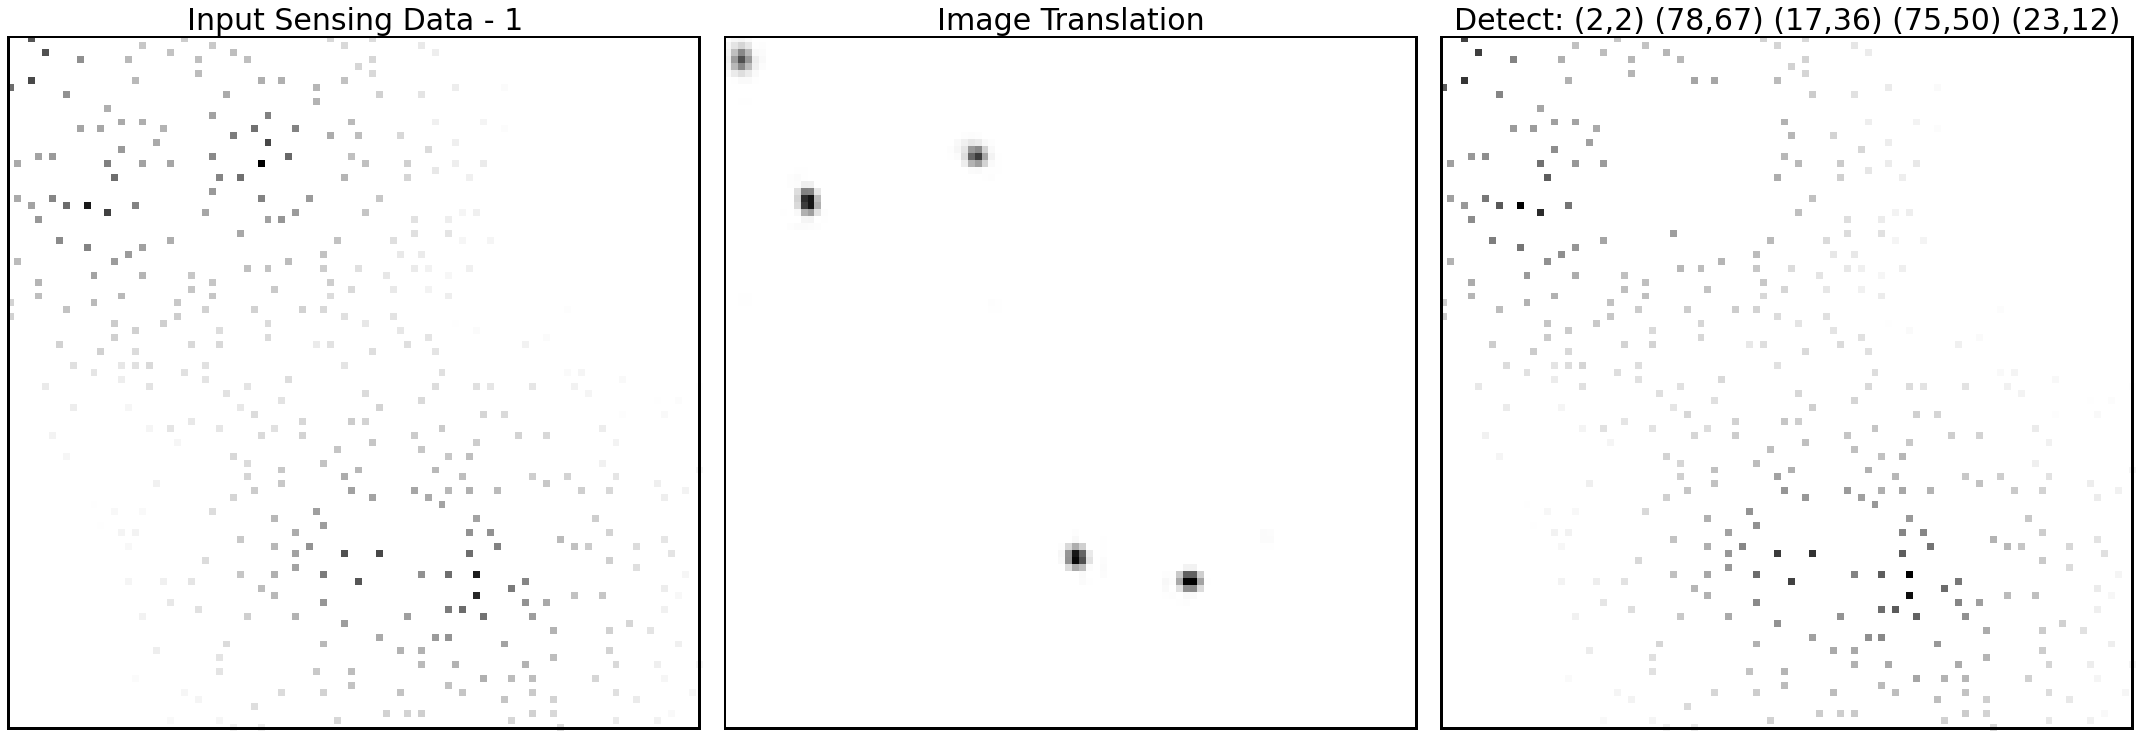

In [168]:
show(1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping i

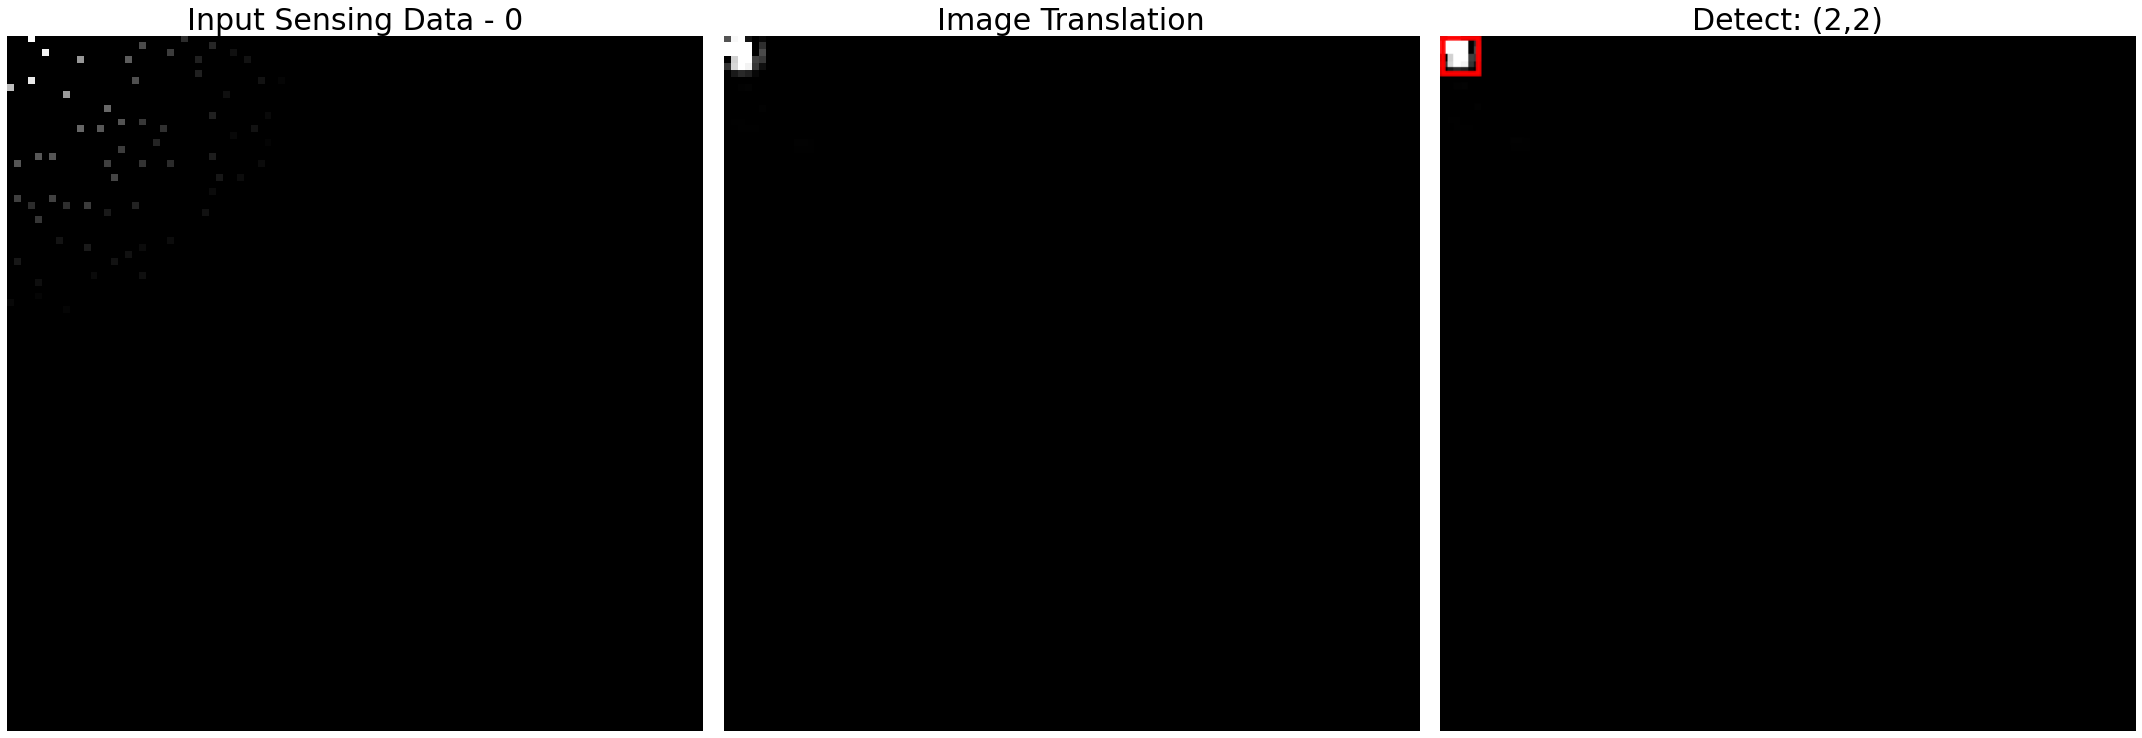

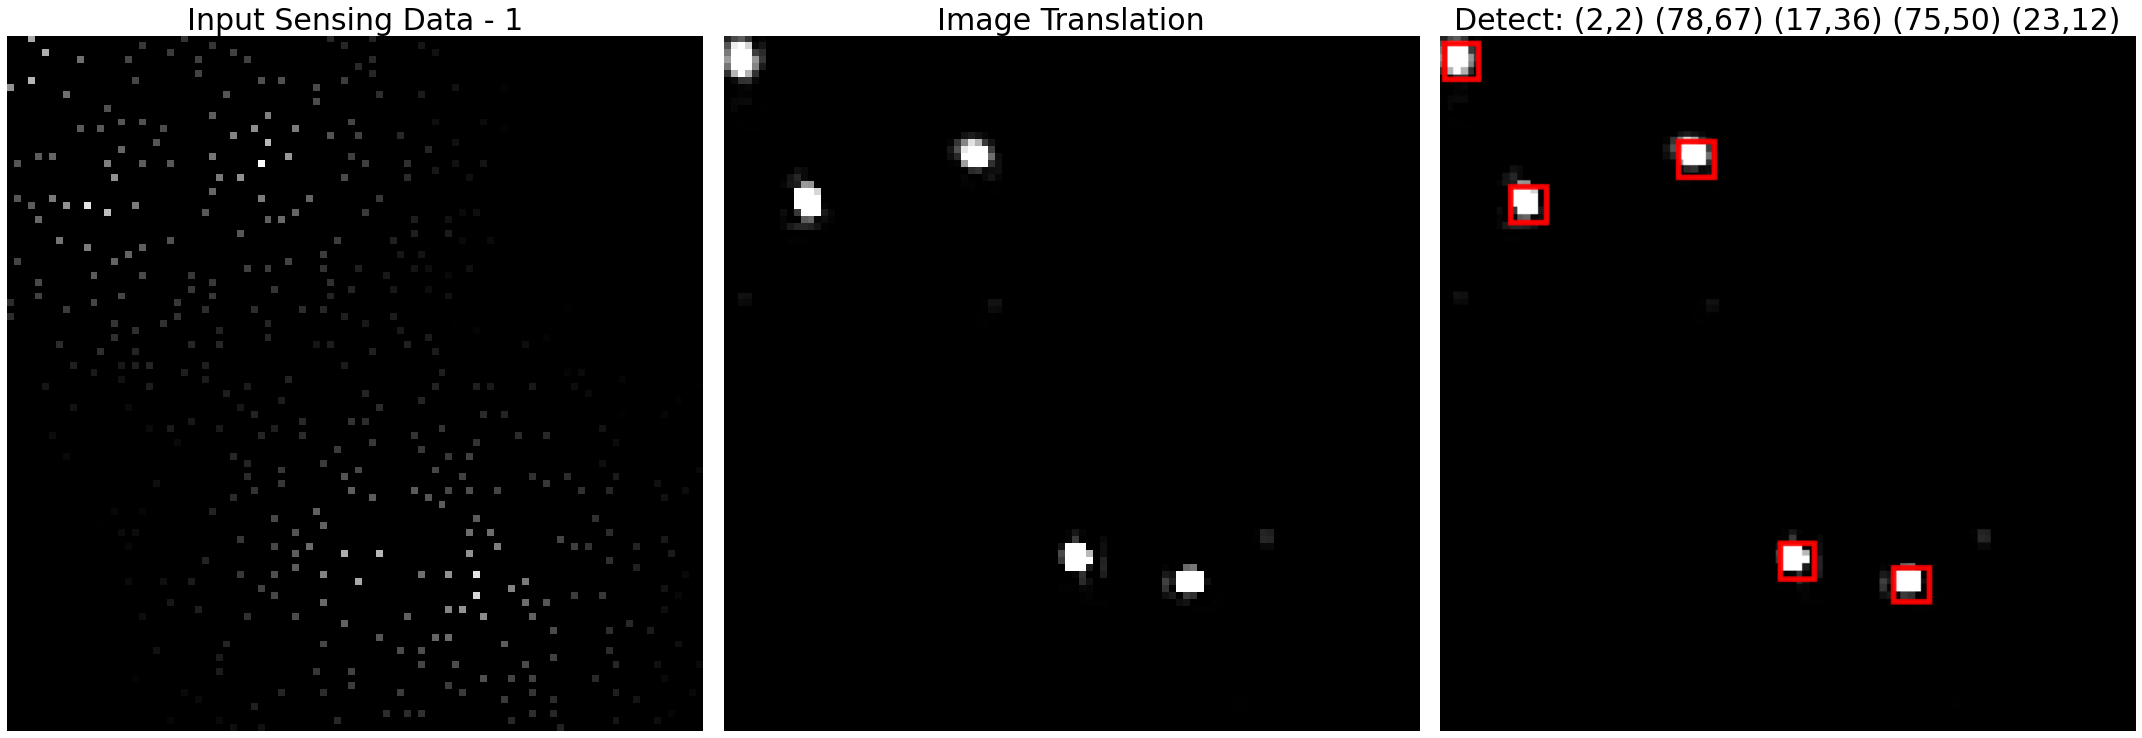

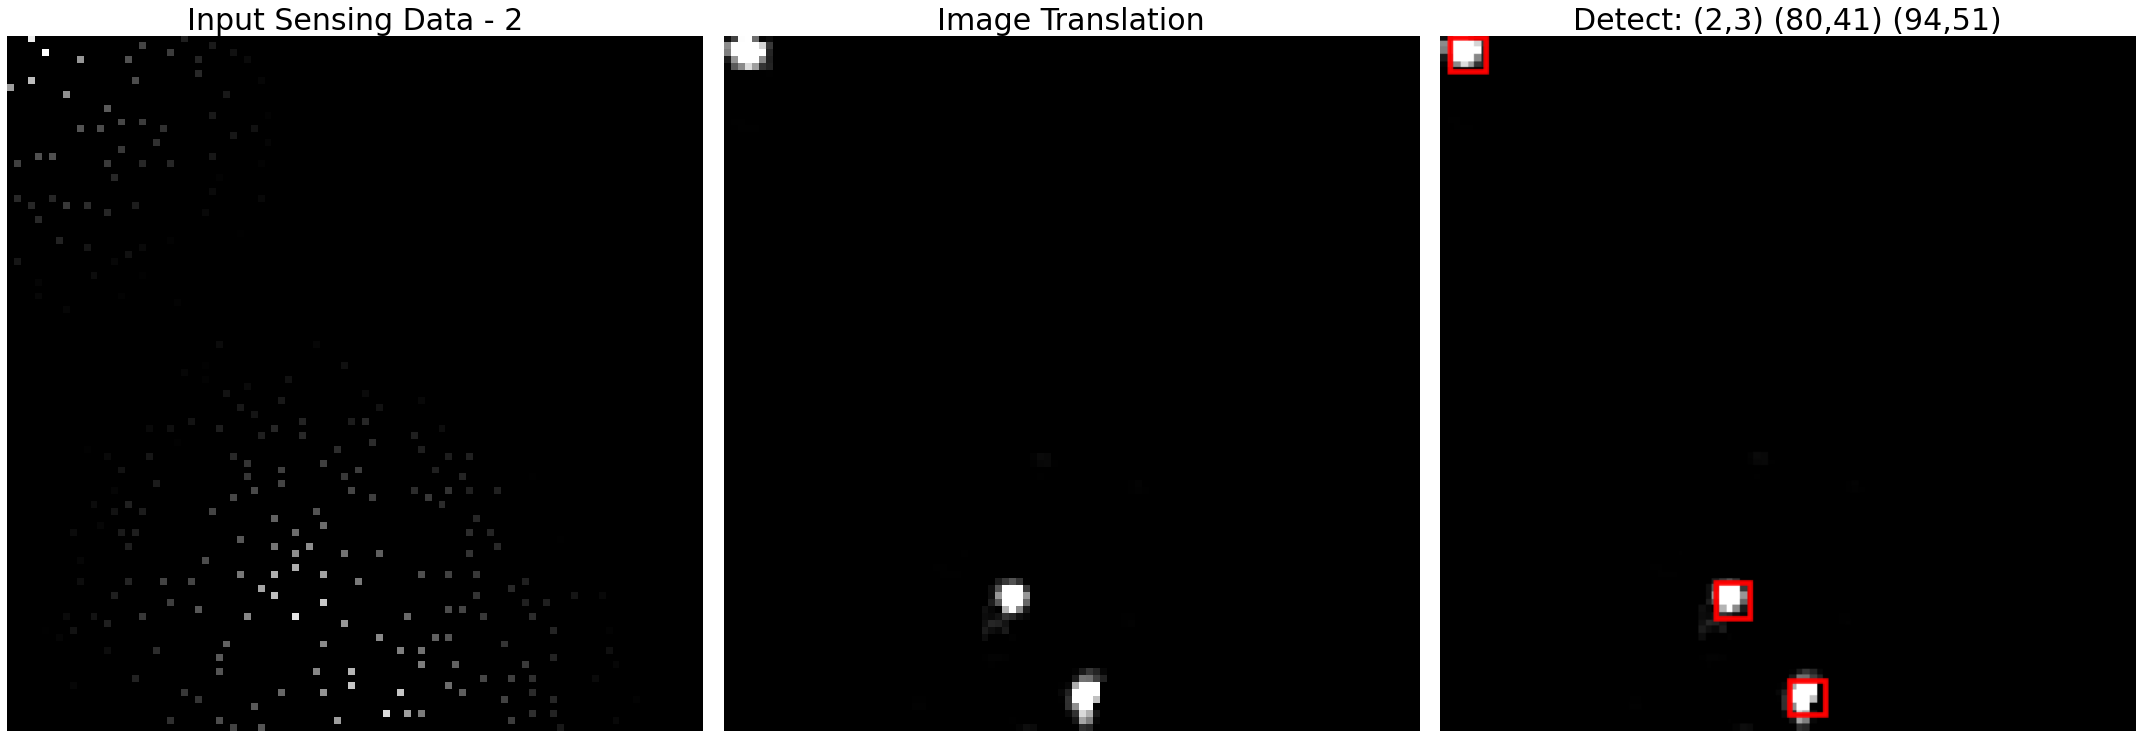

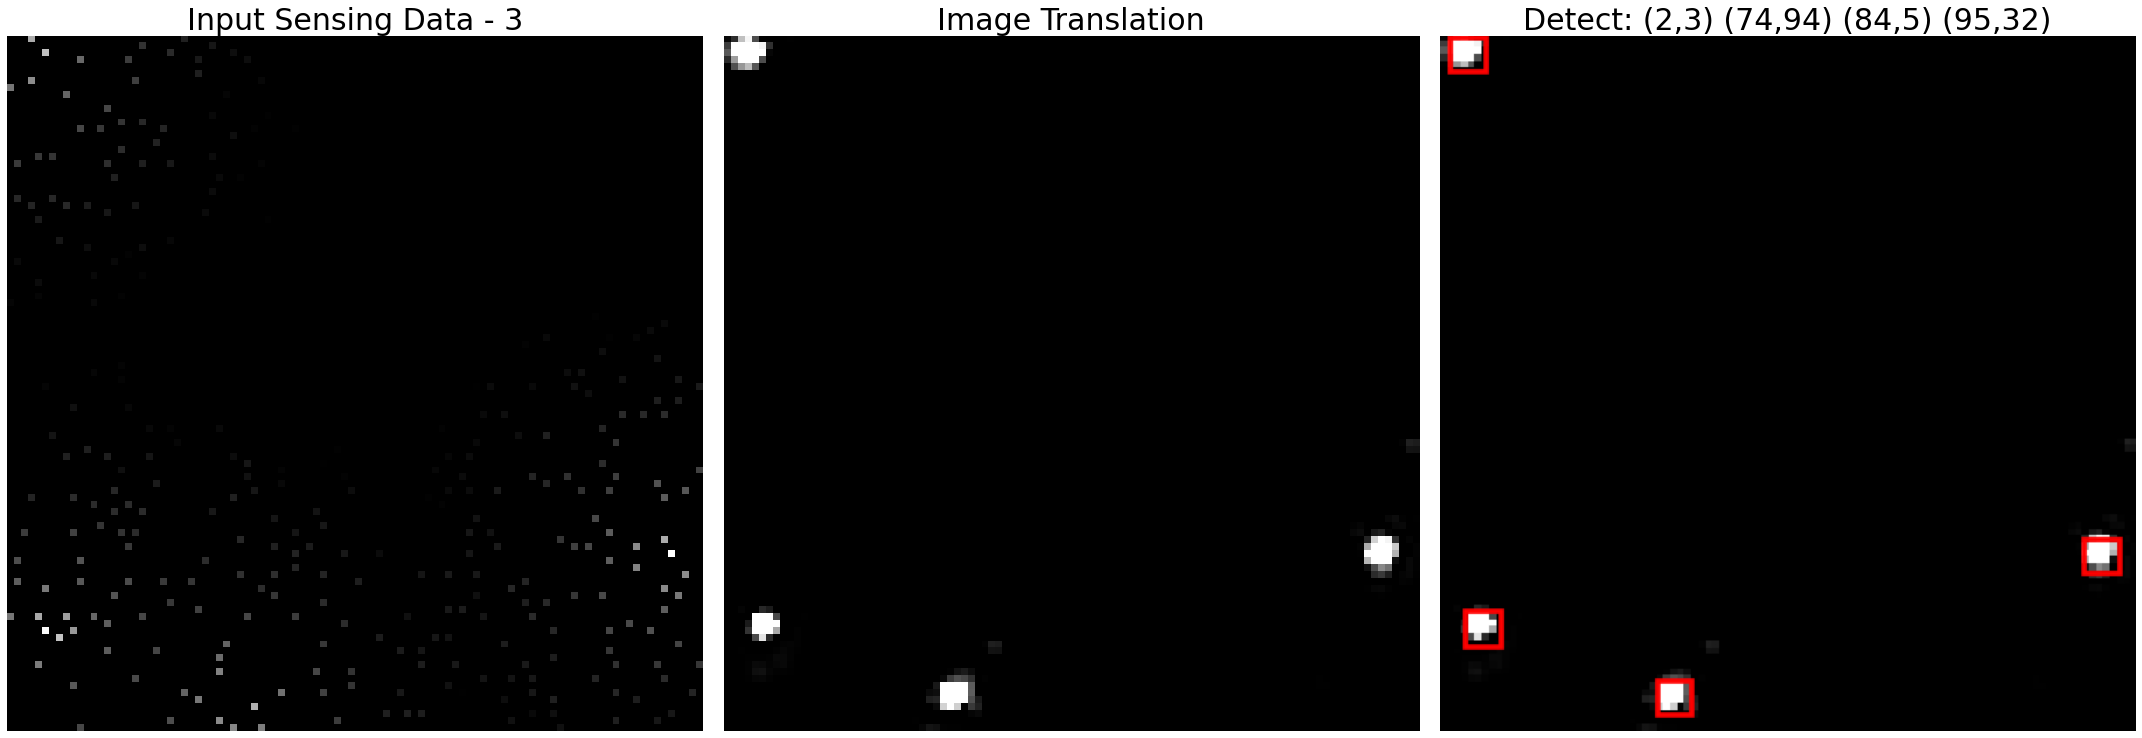

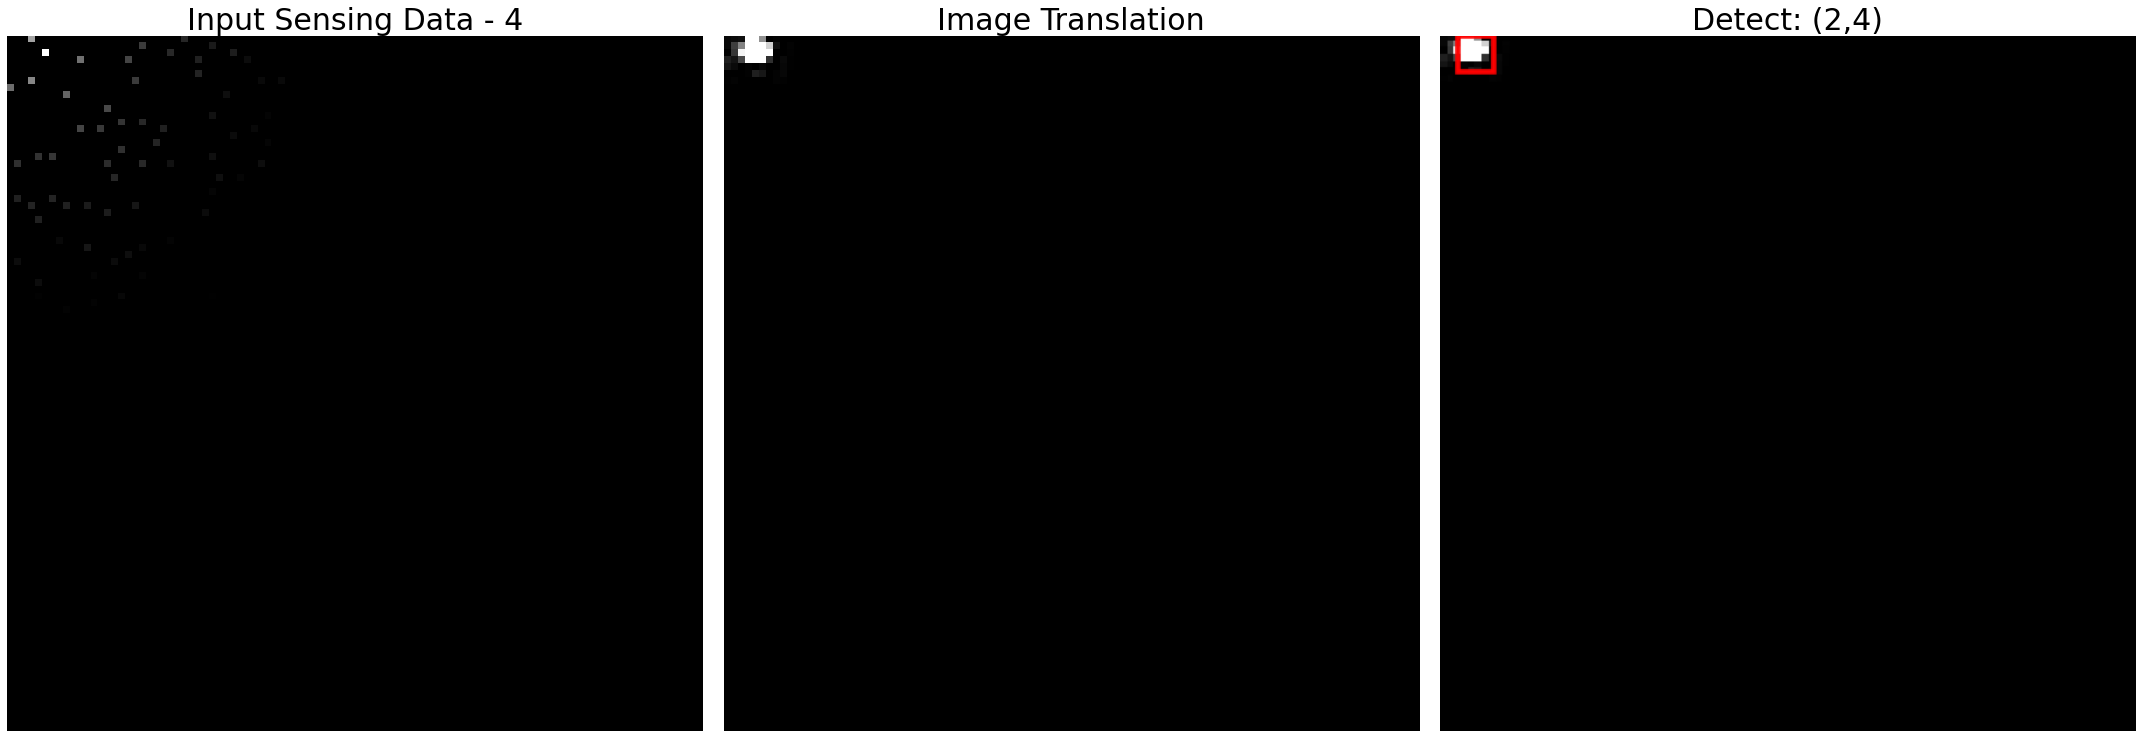

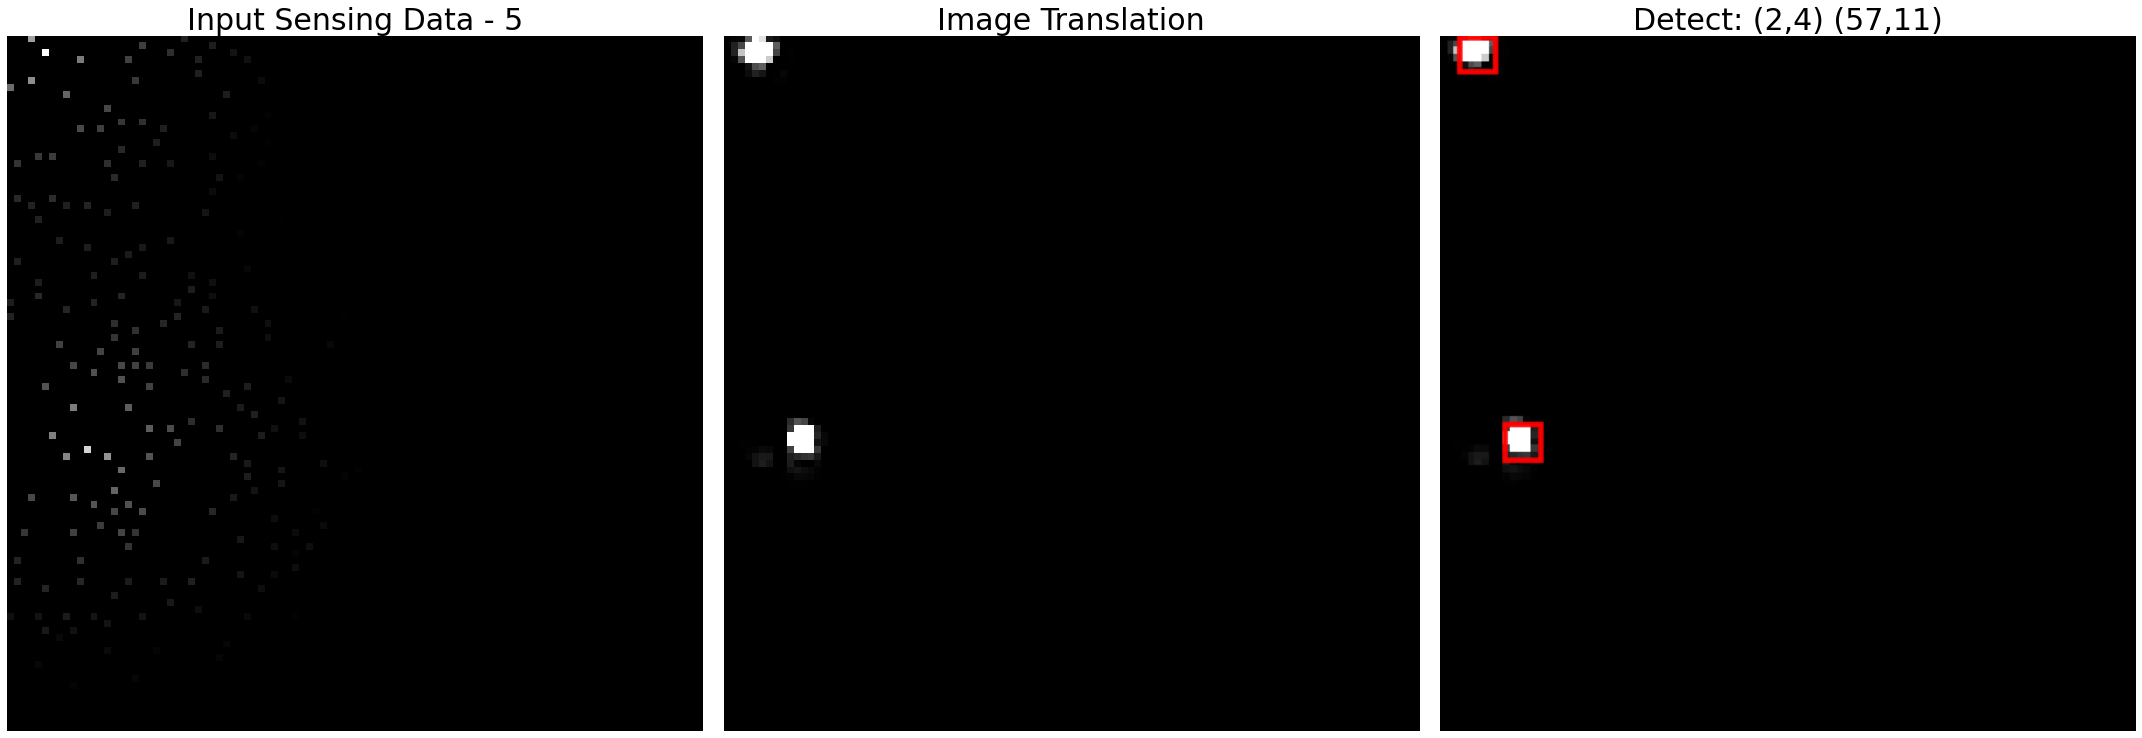

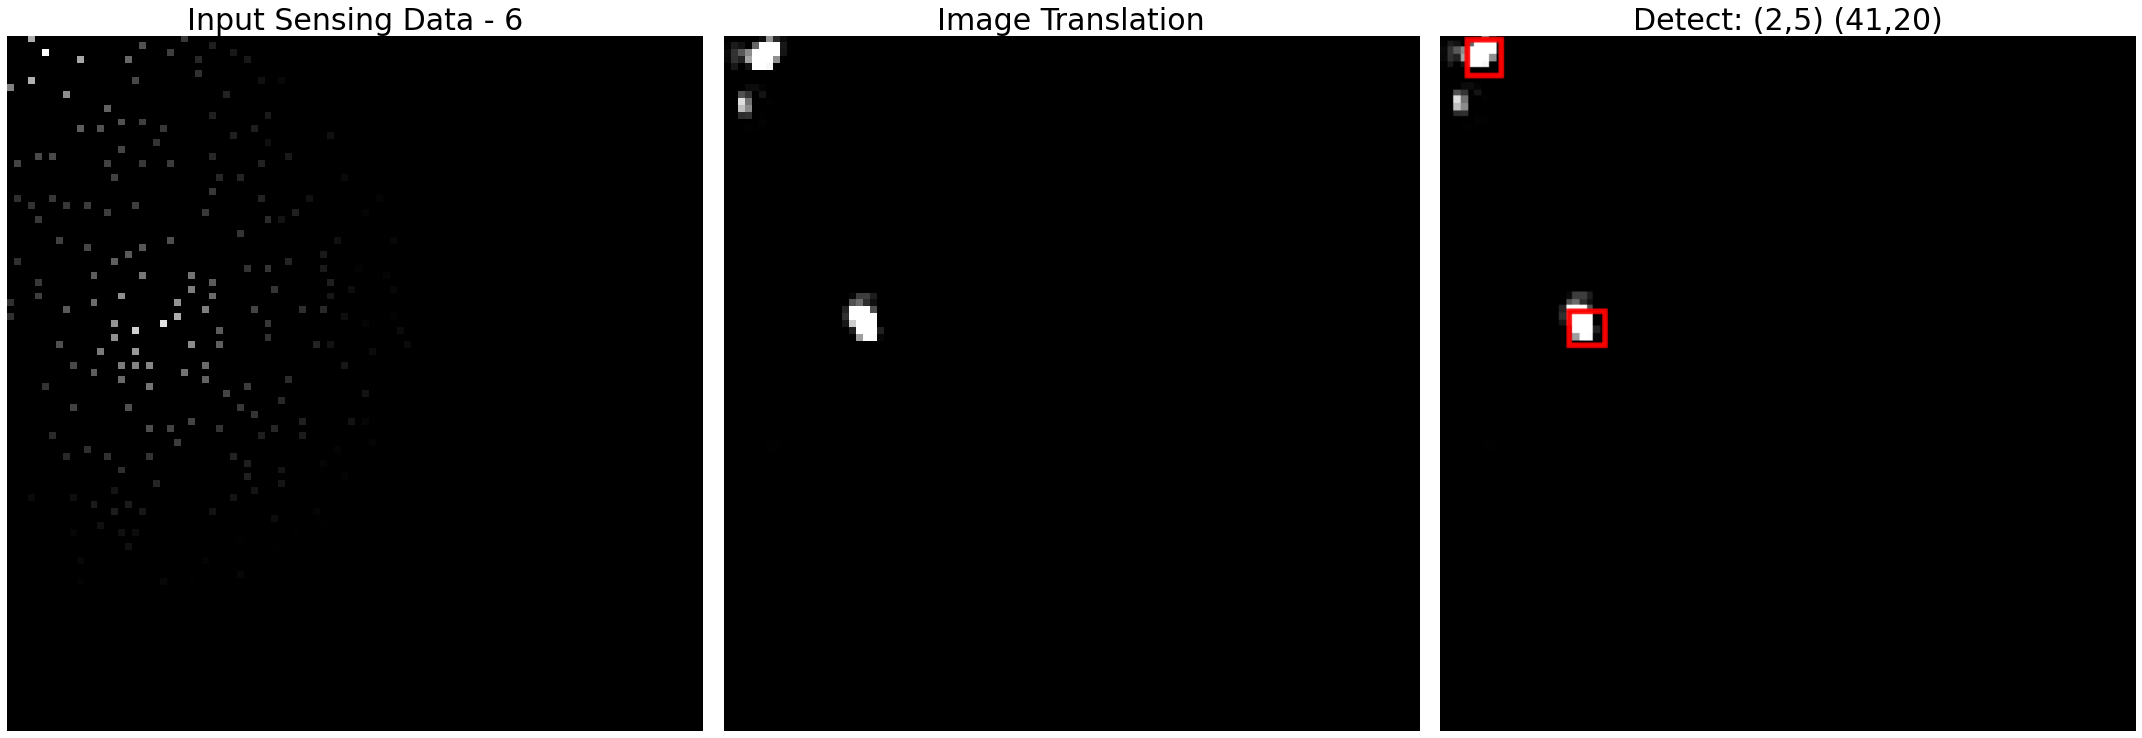

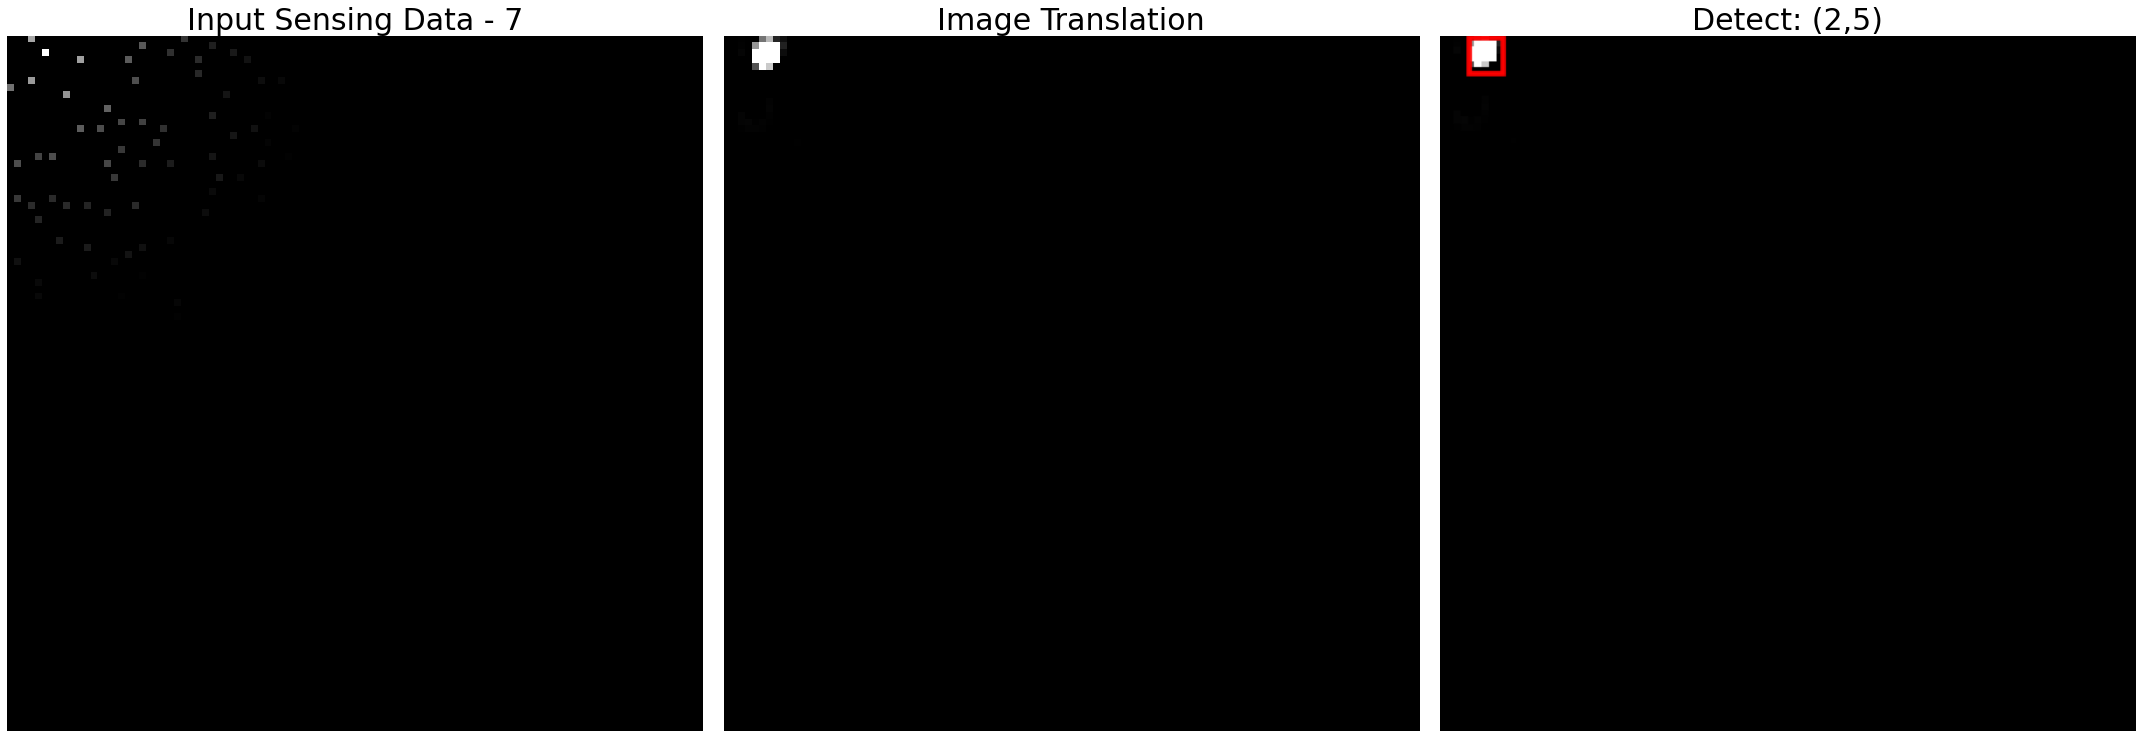

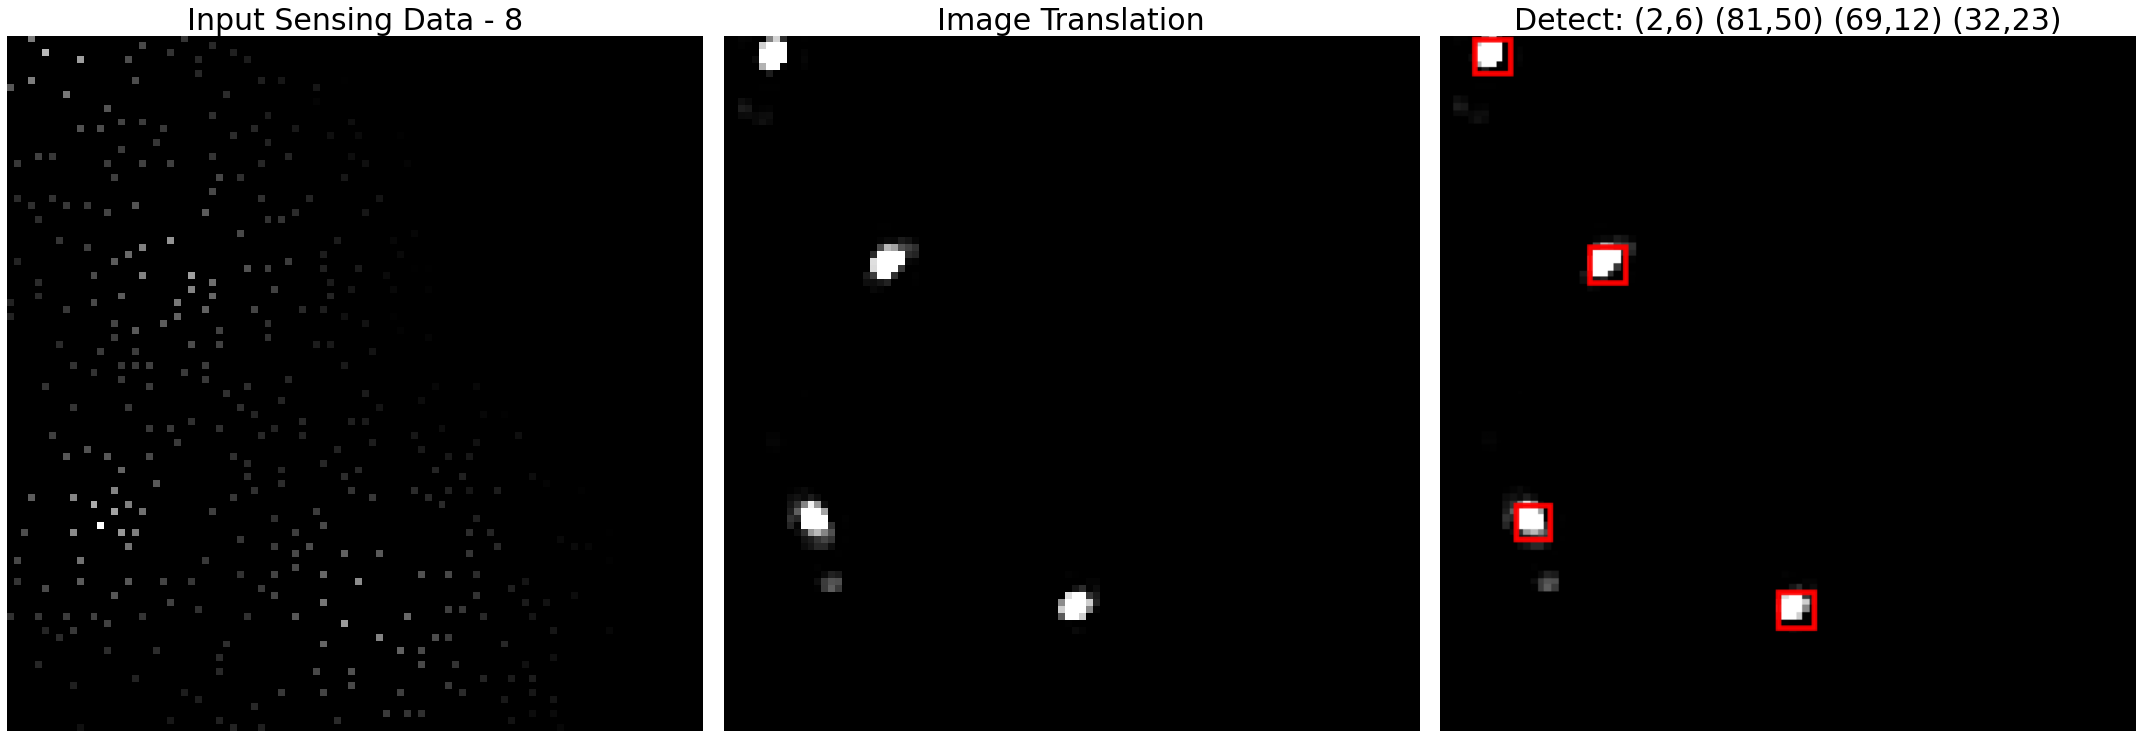

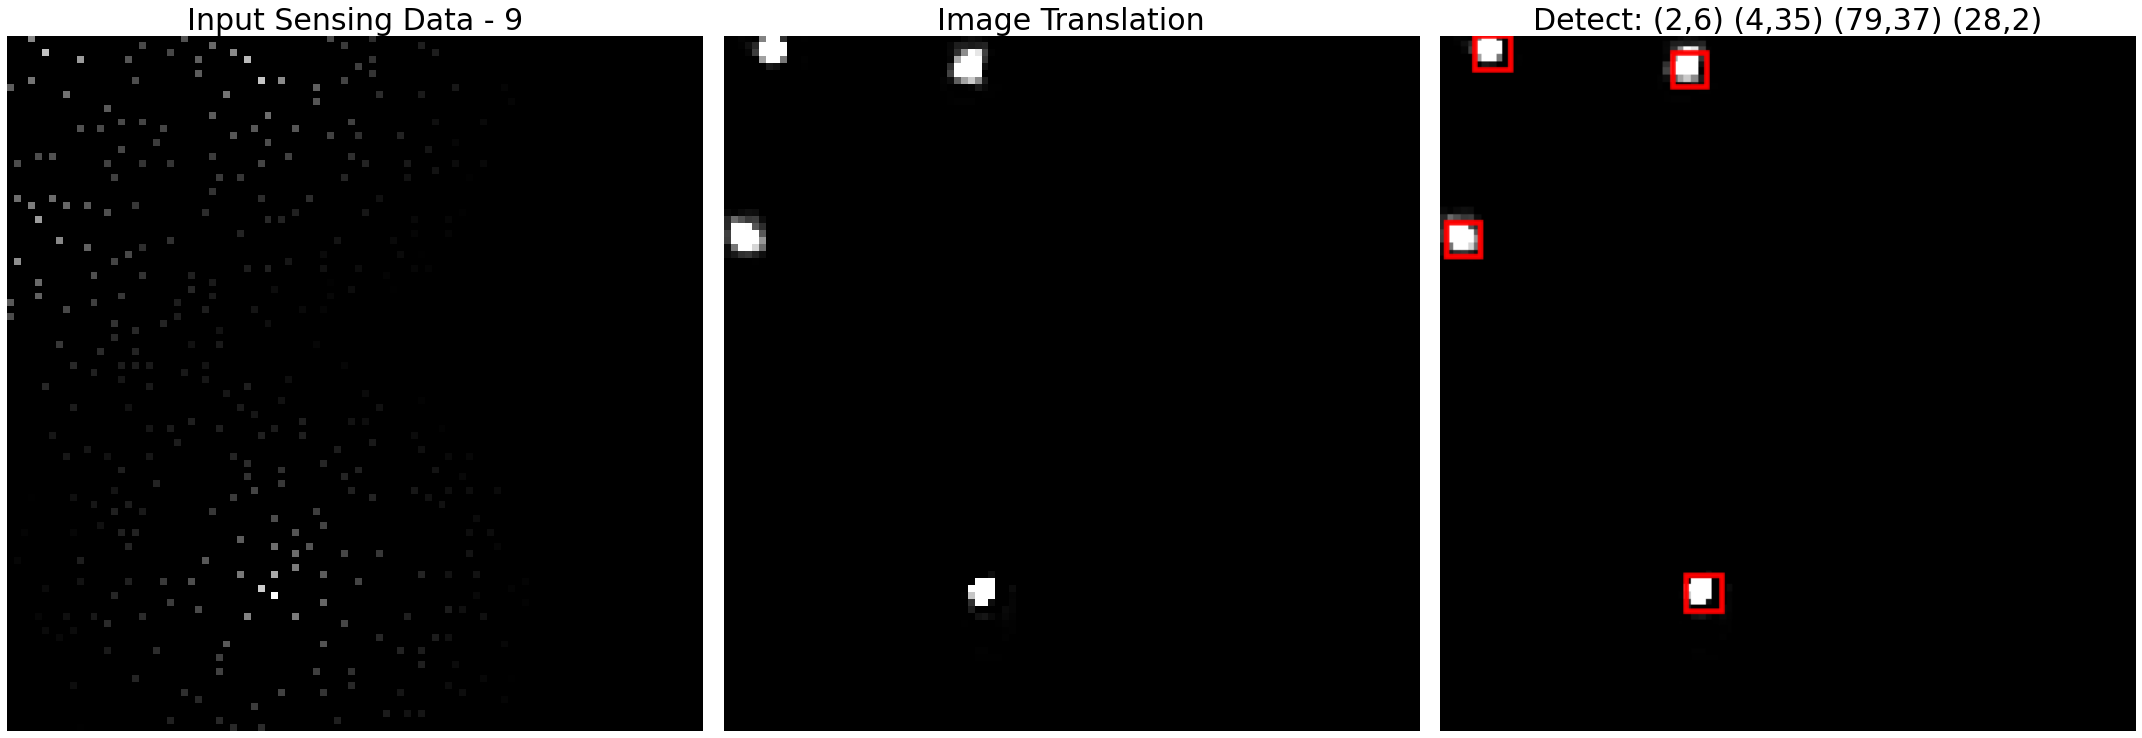

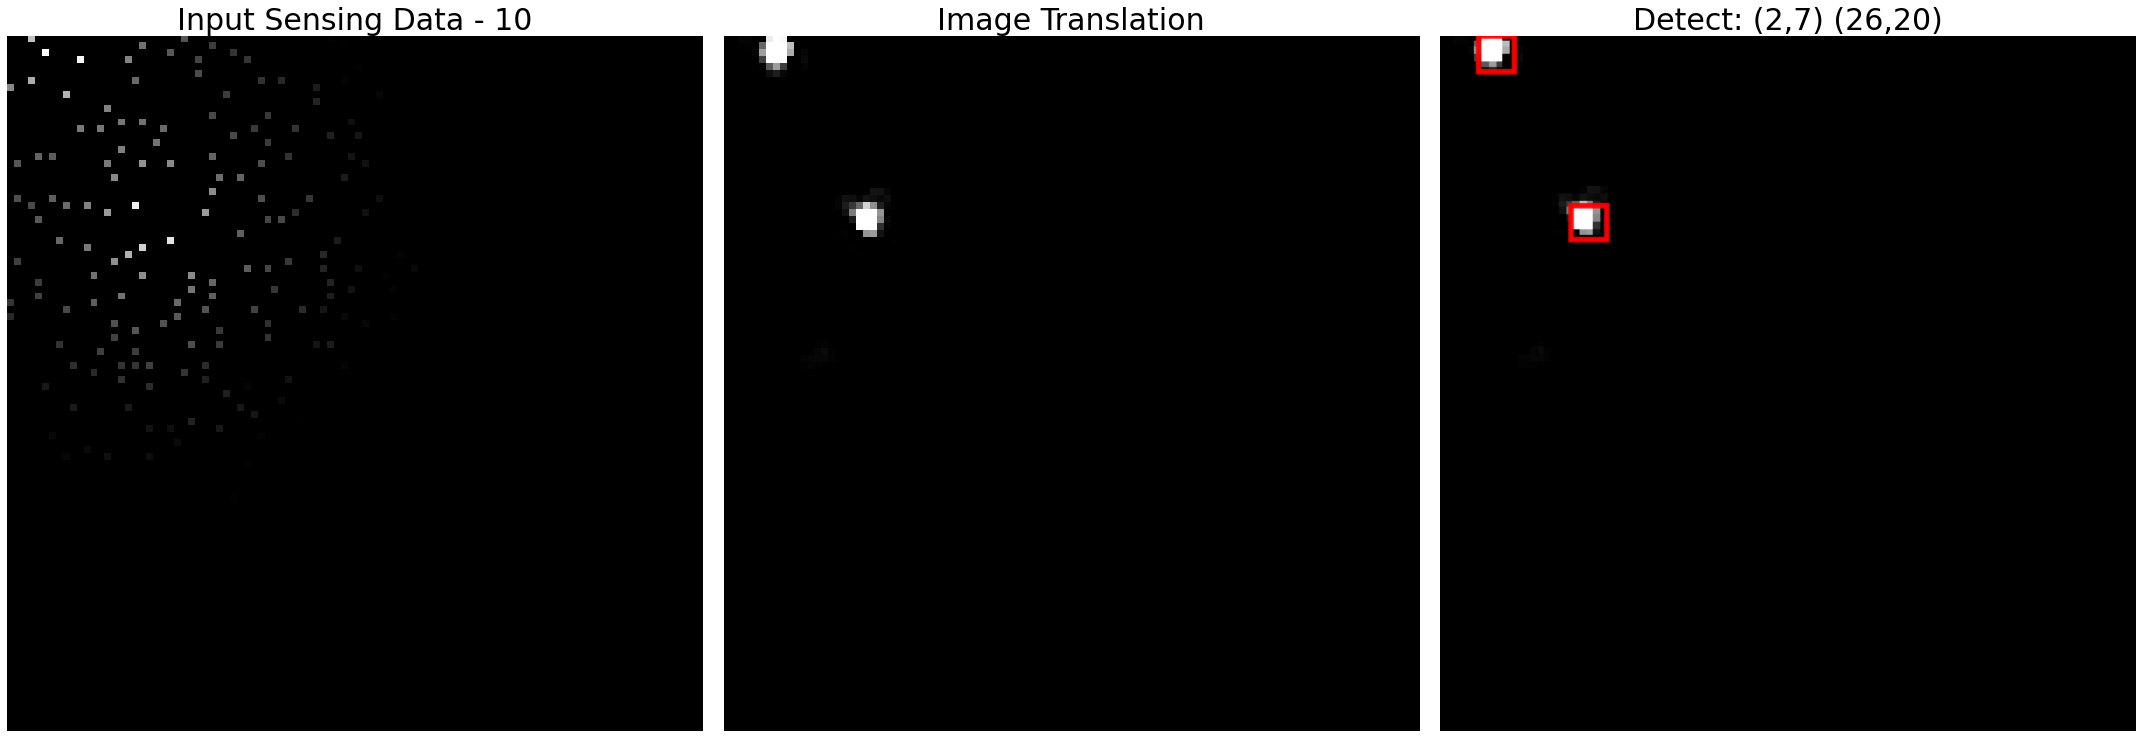

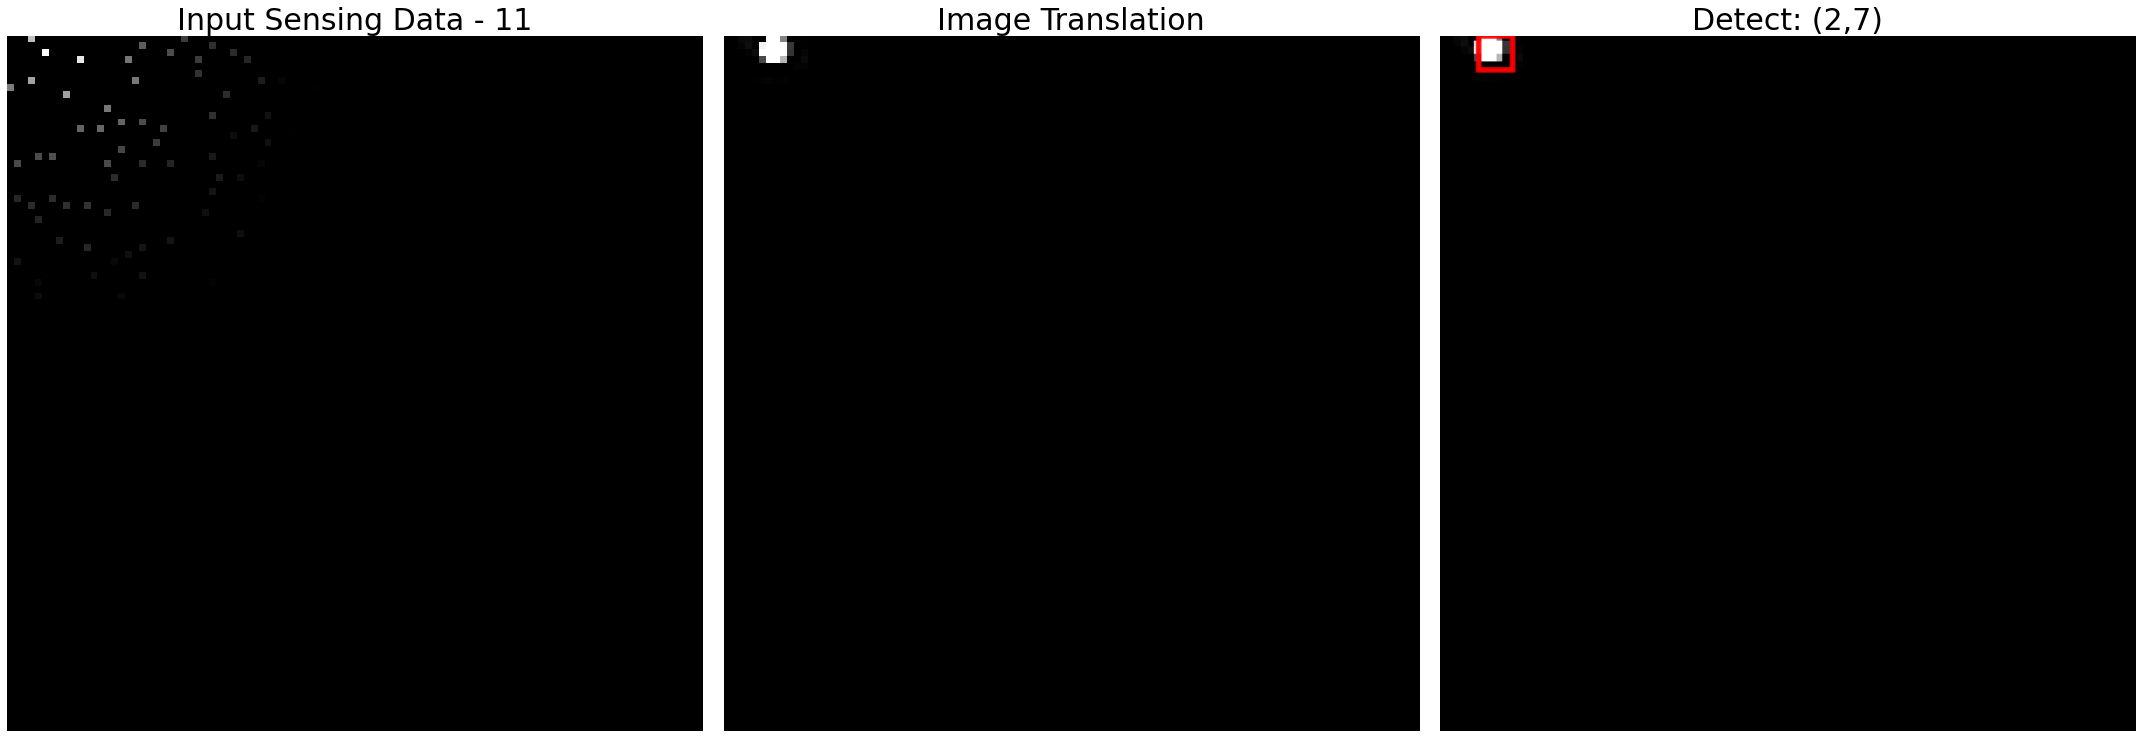

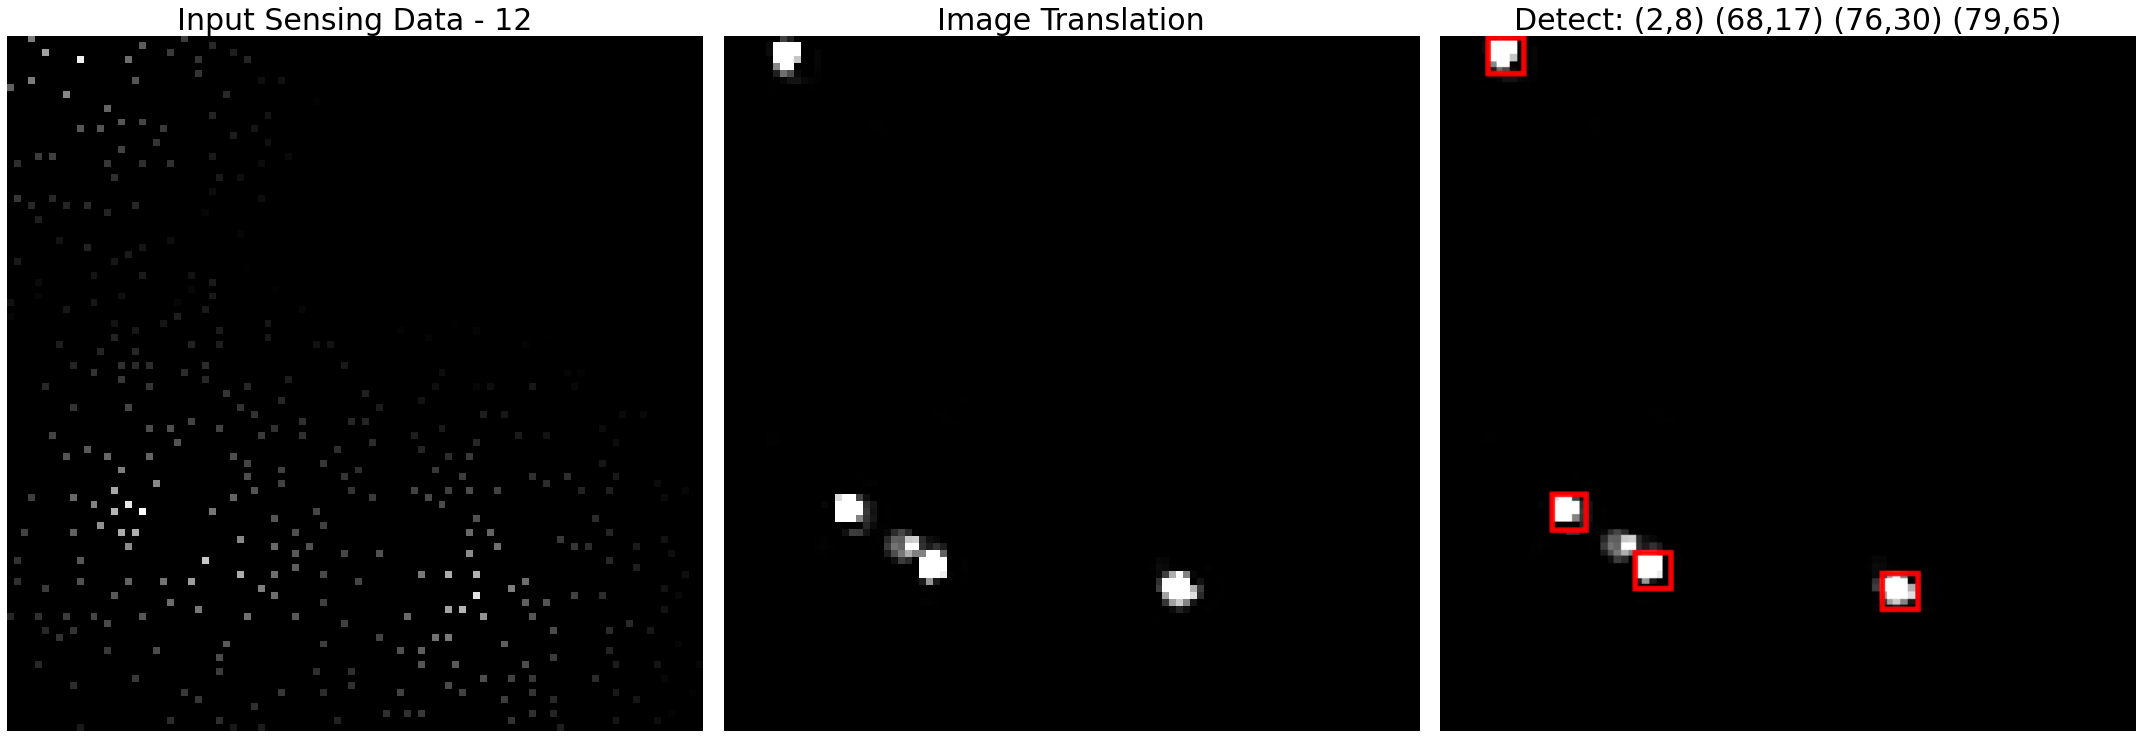

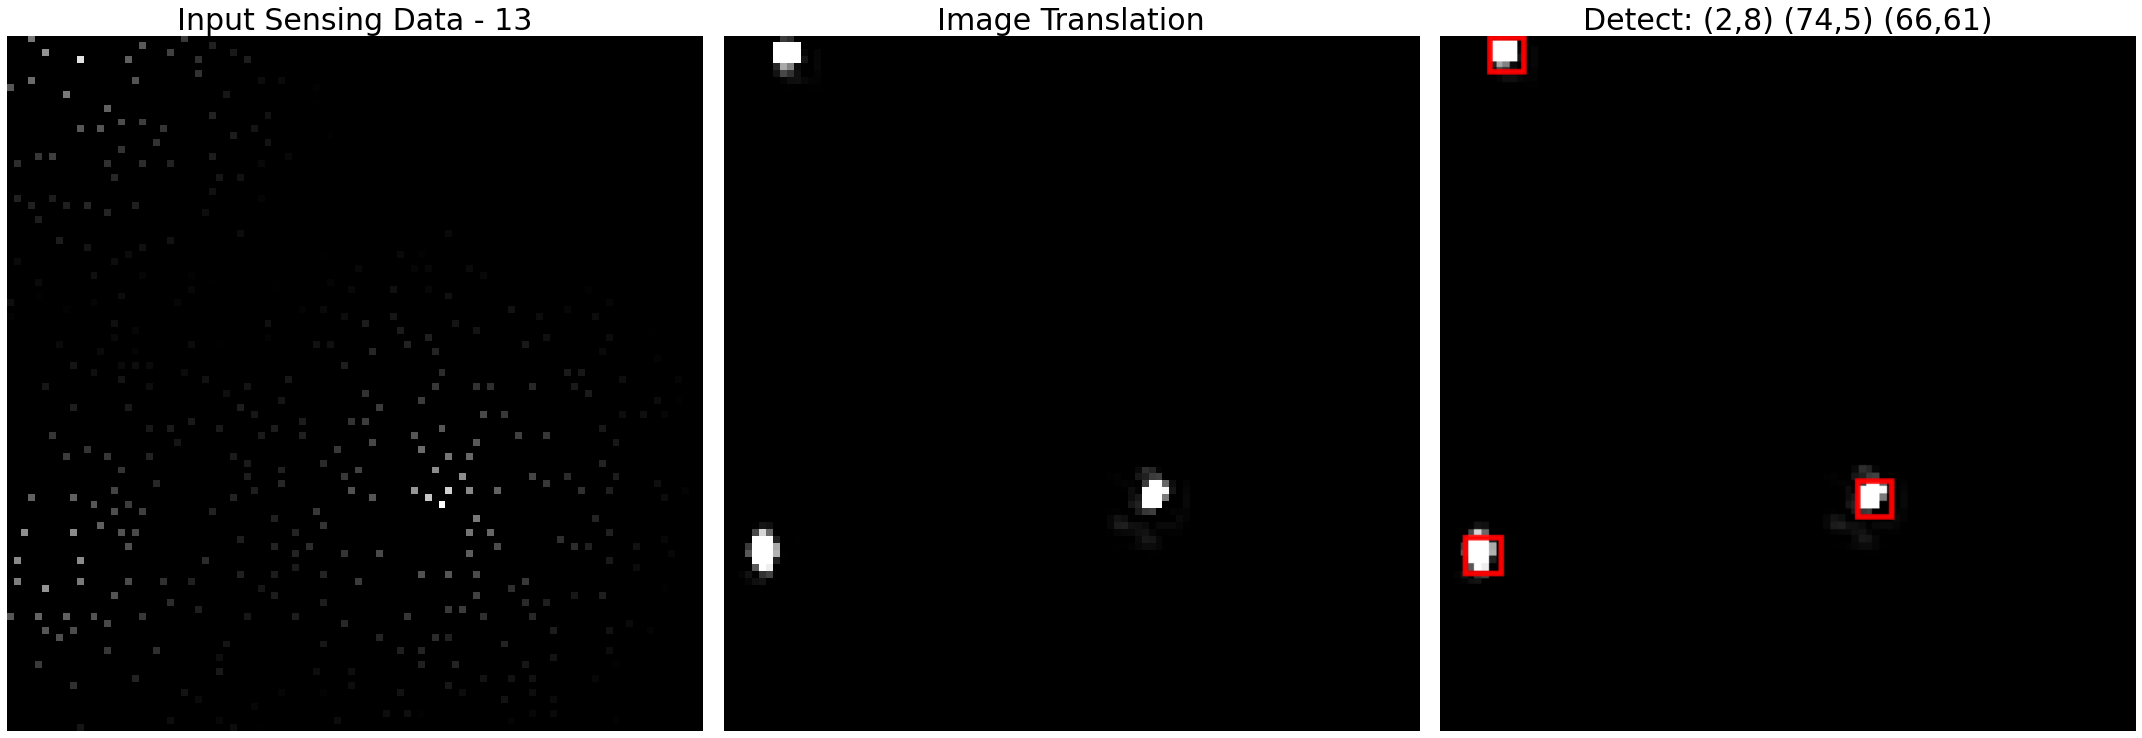

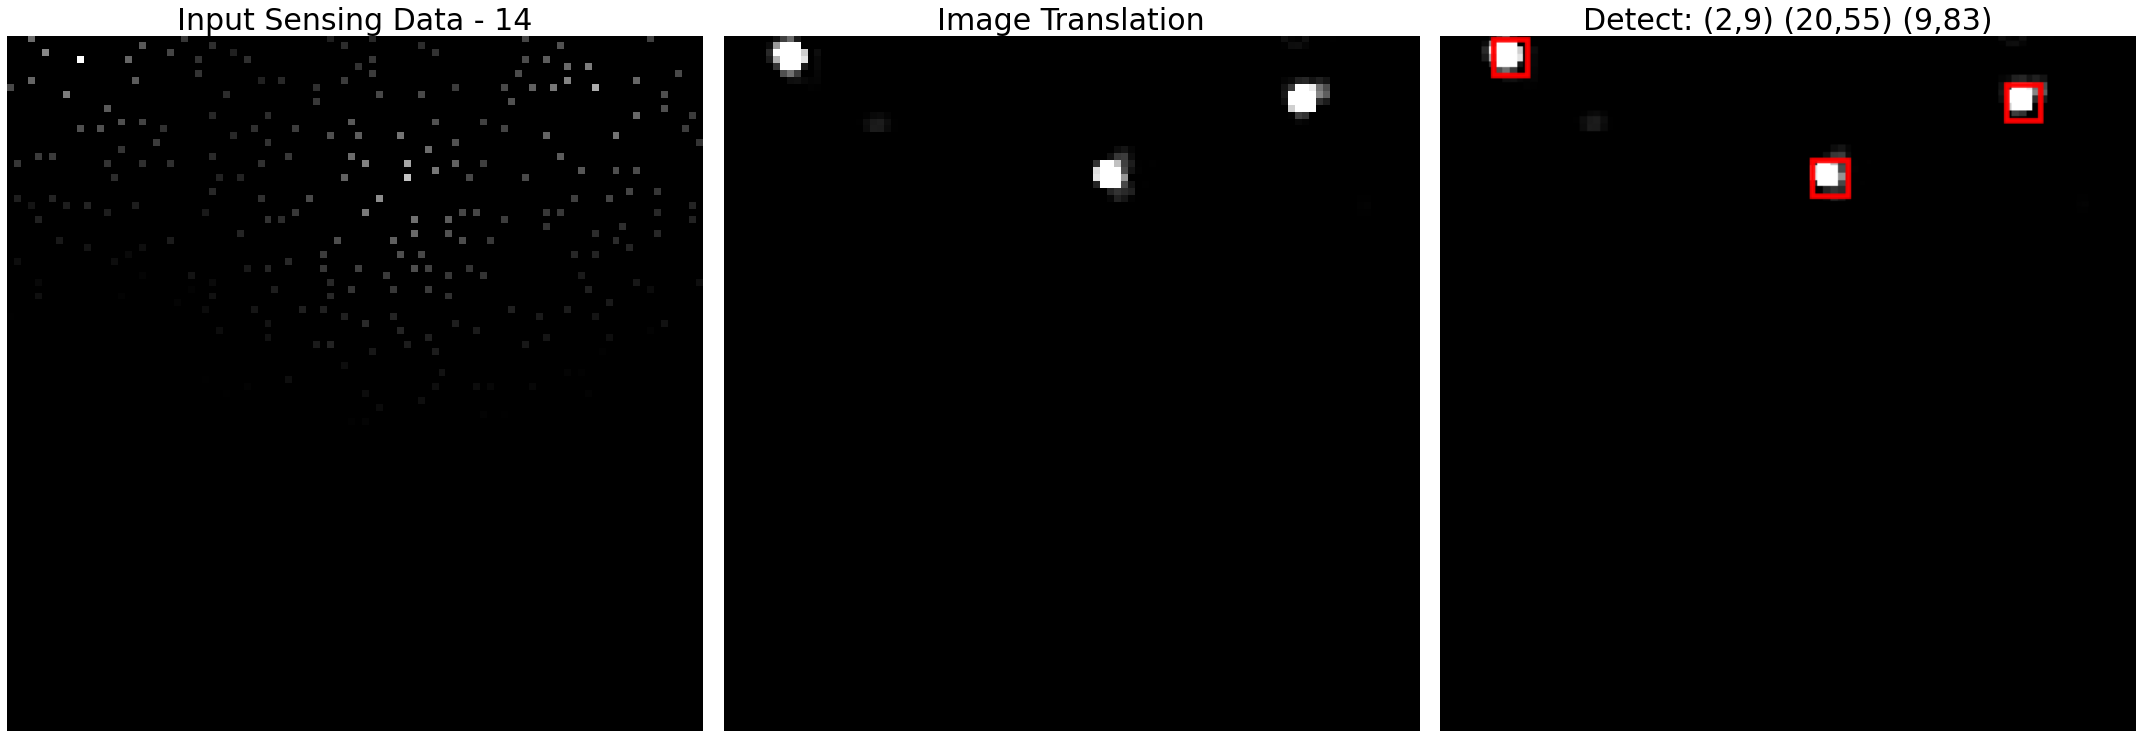

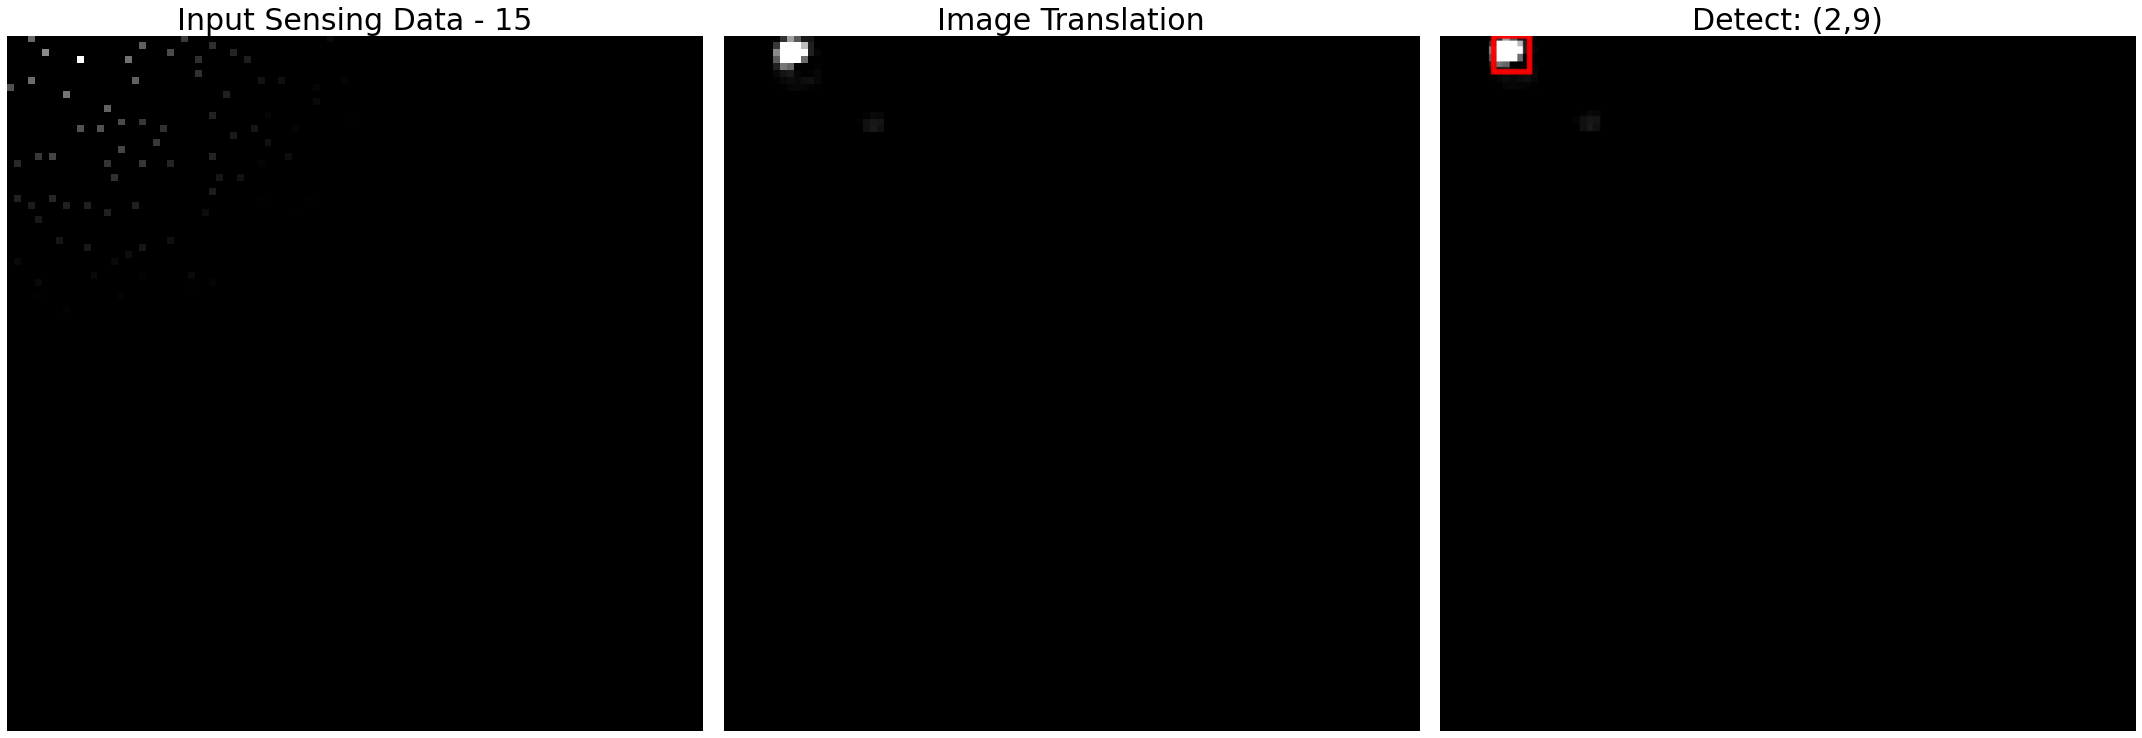

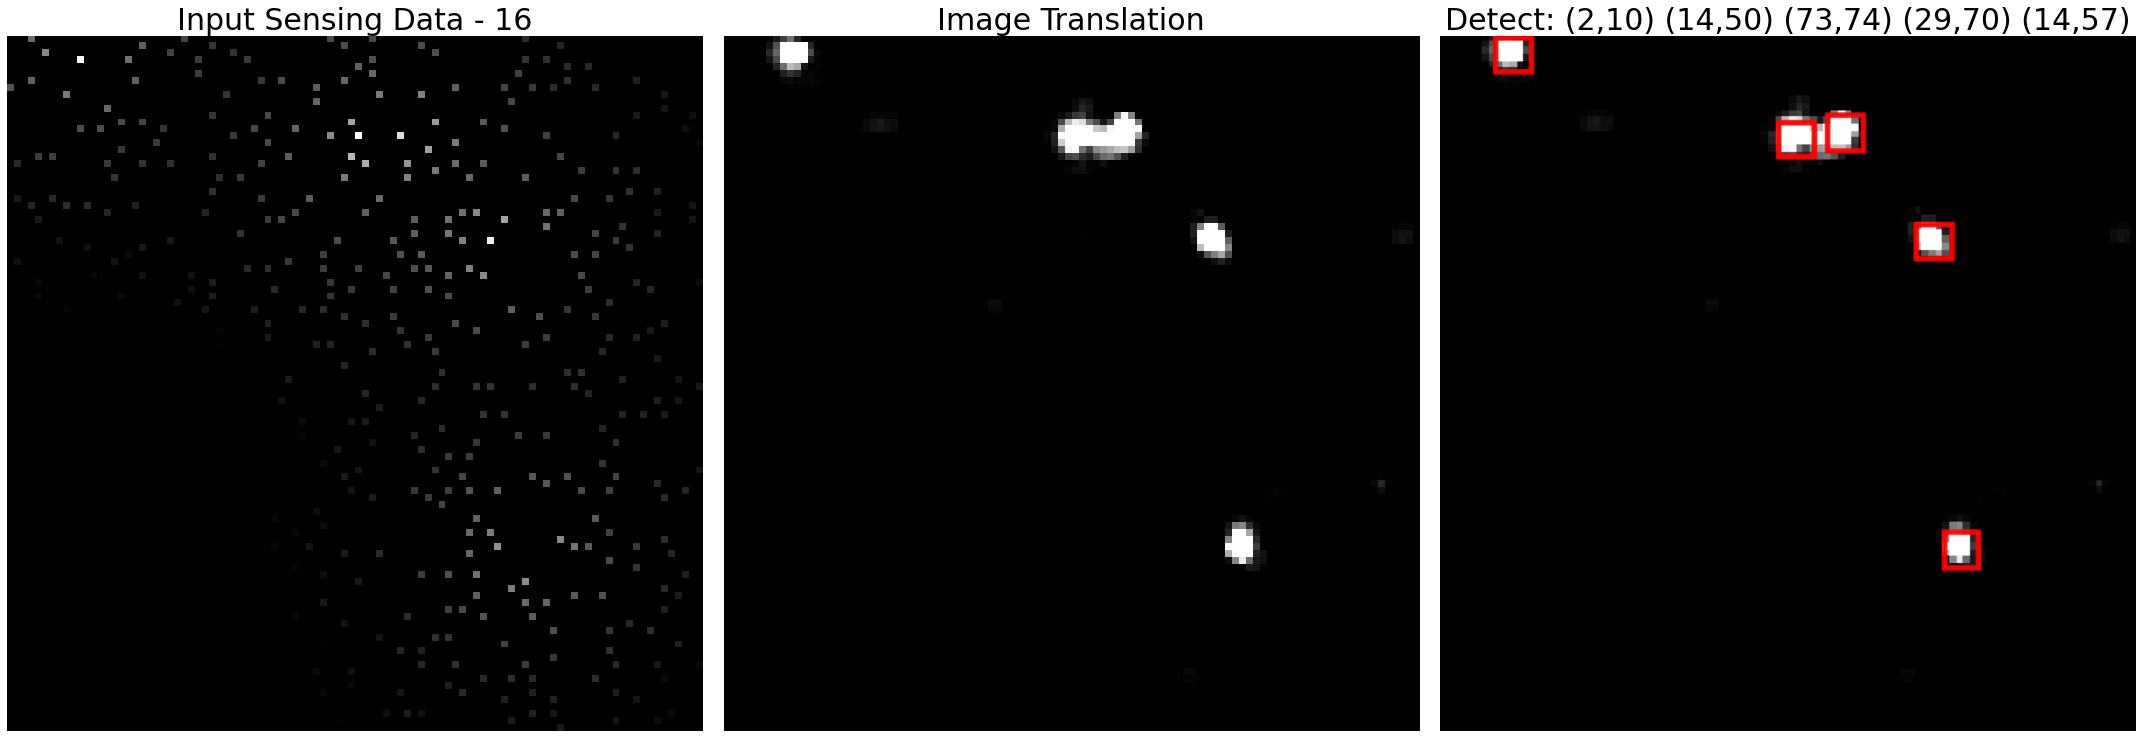

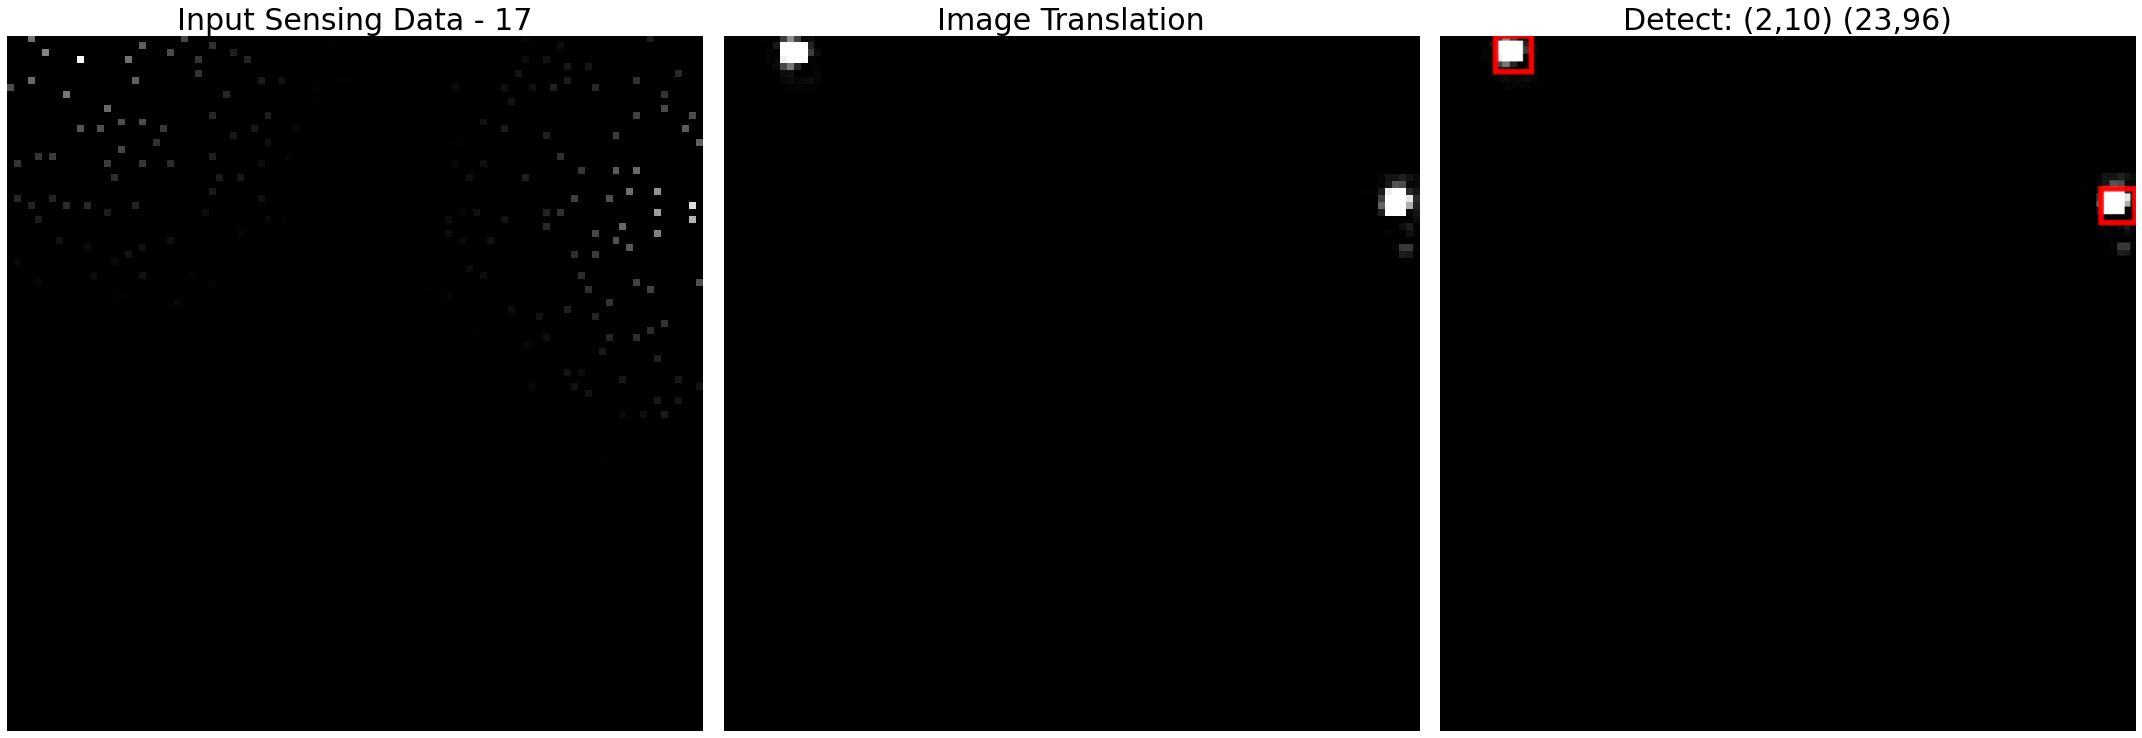

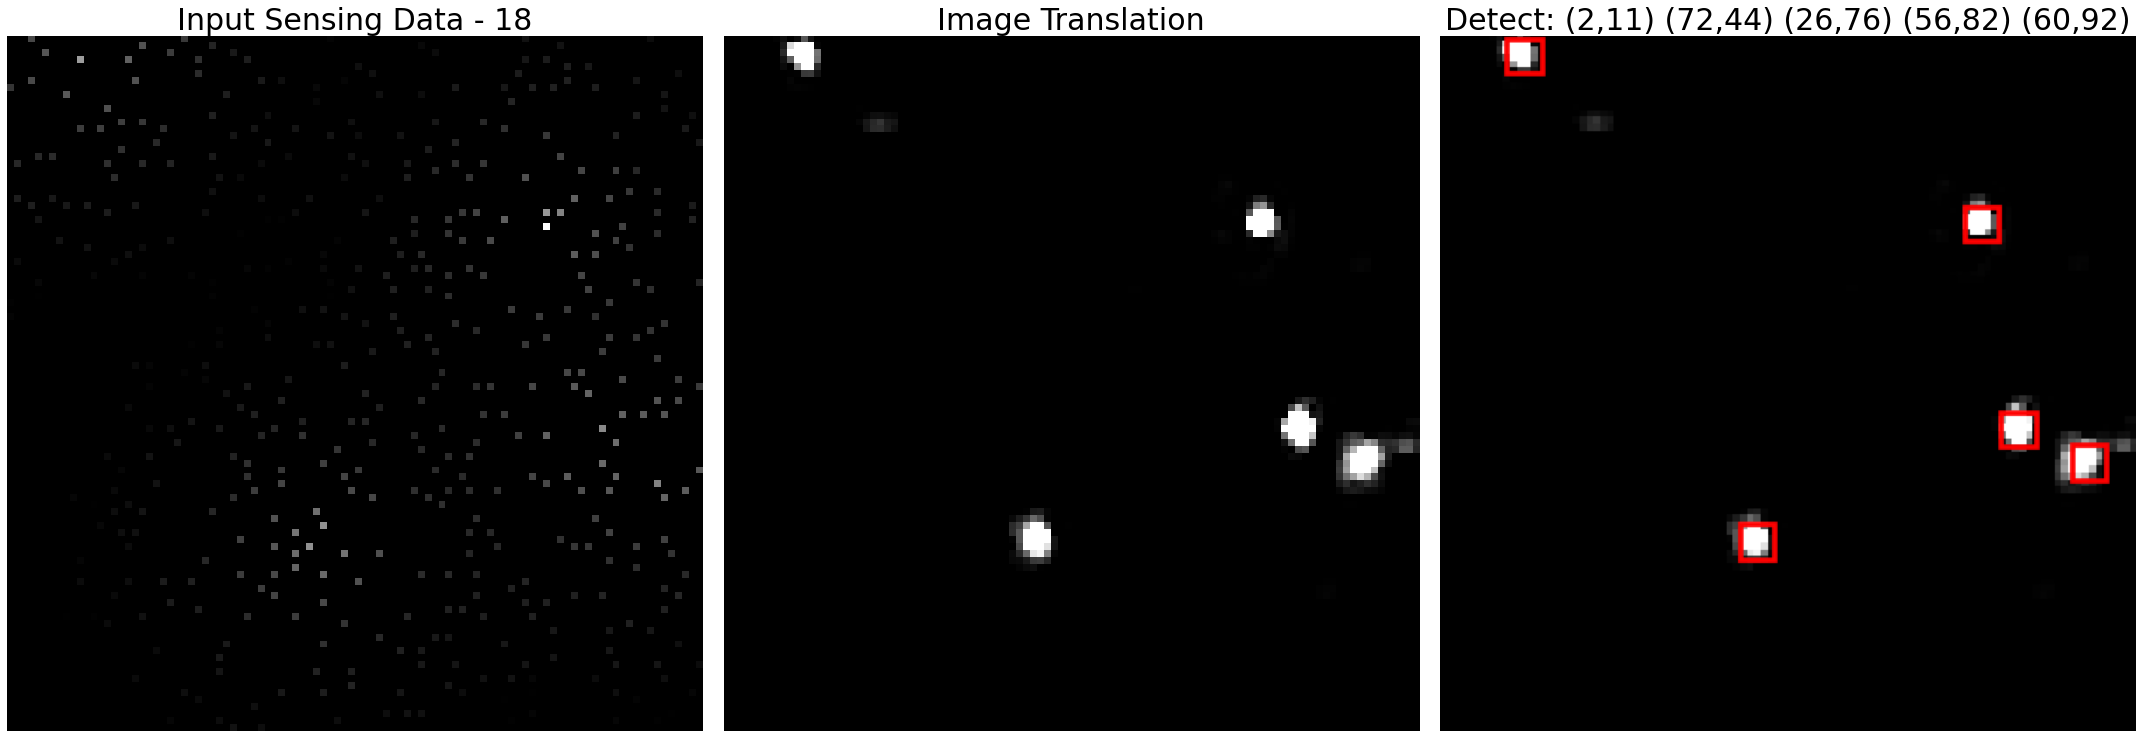

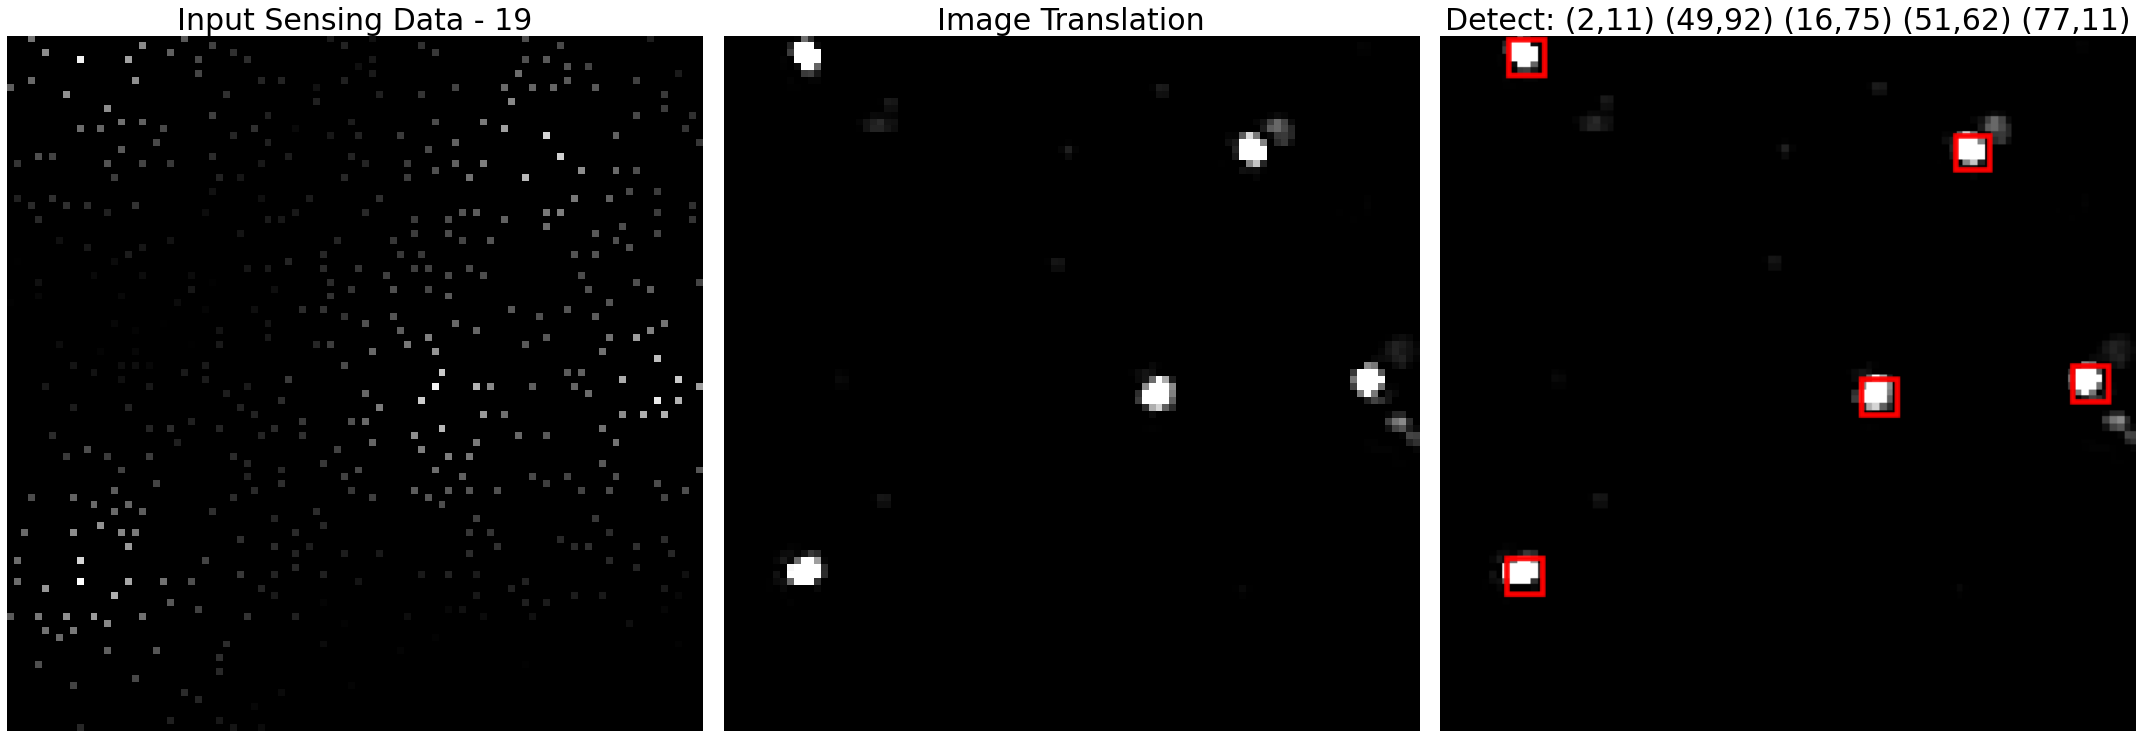

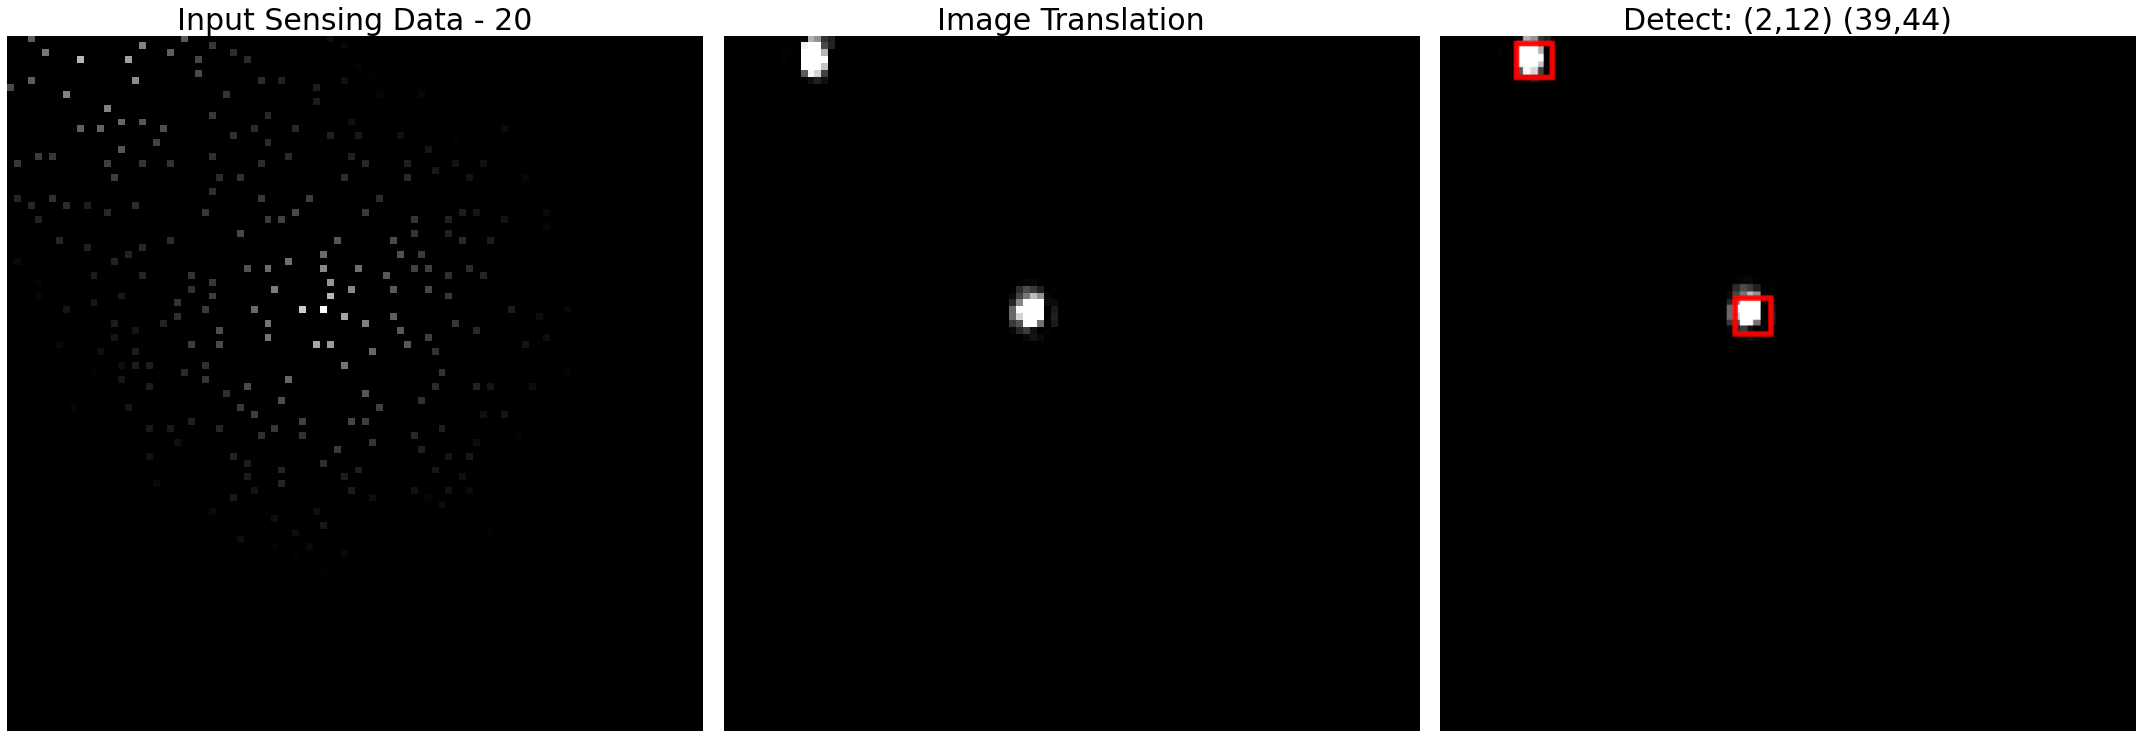

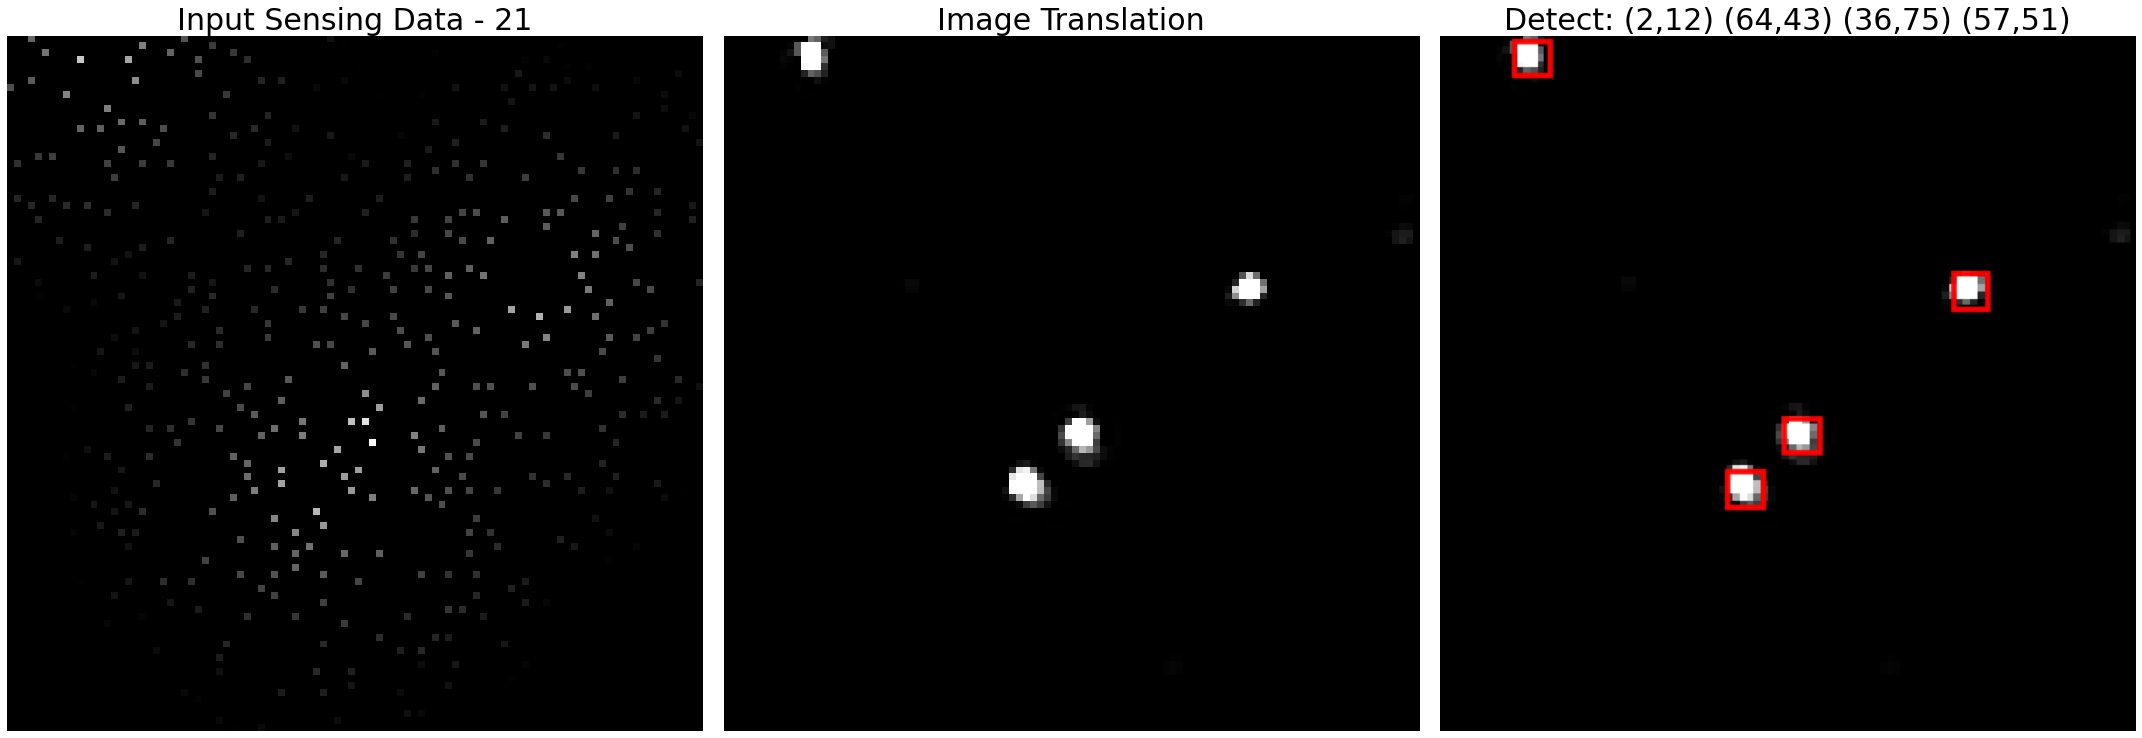

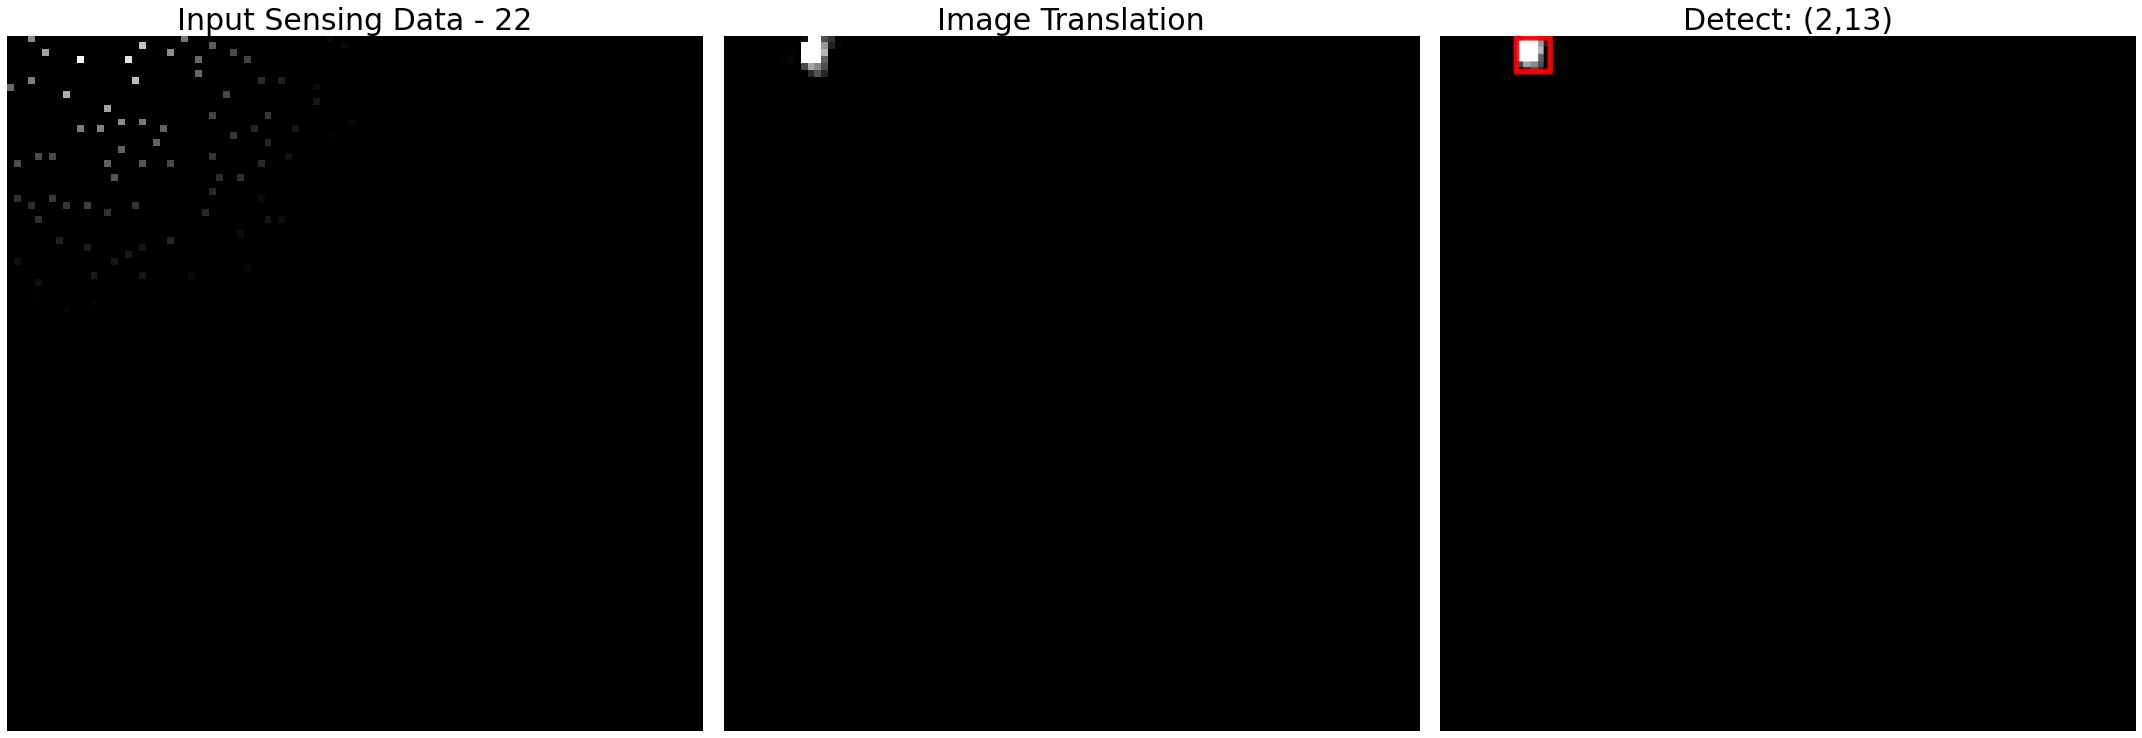

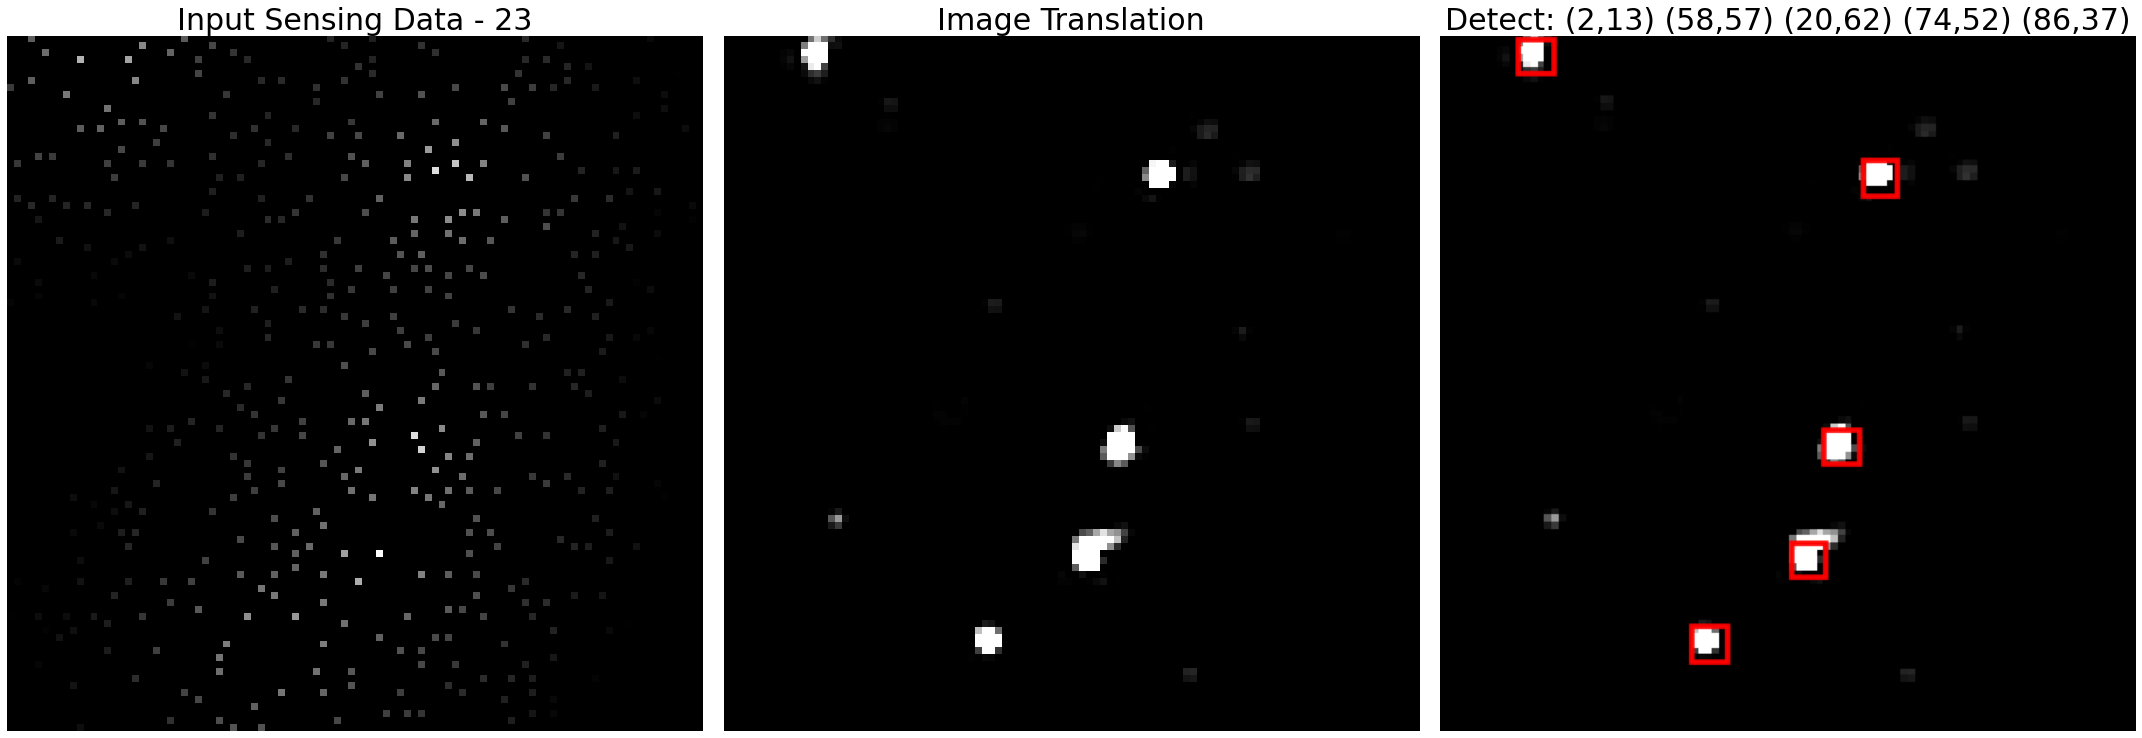

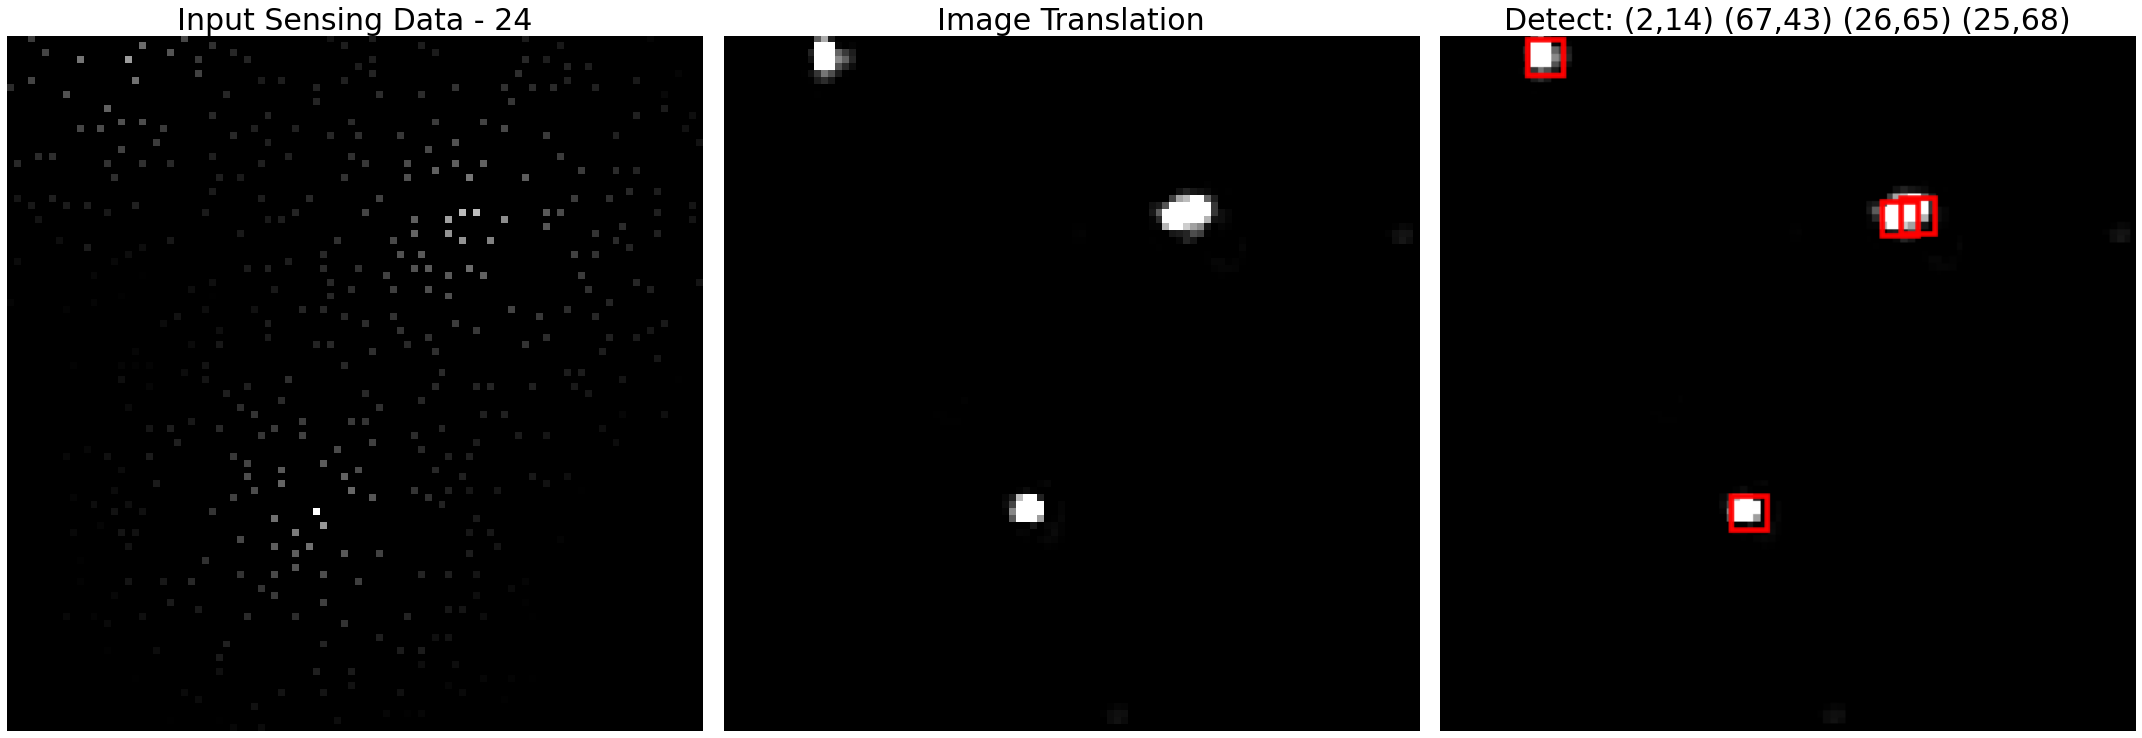

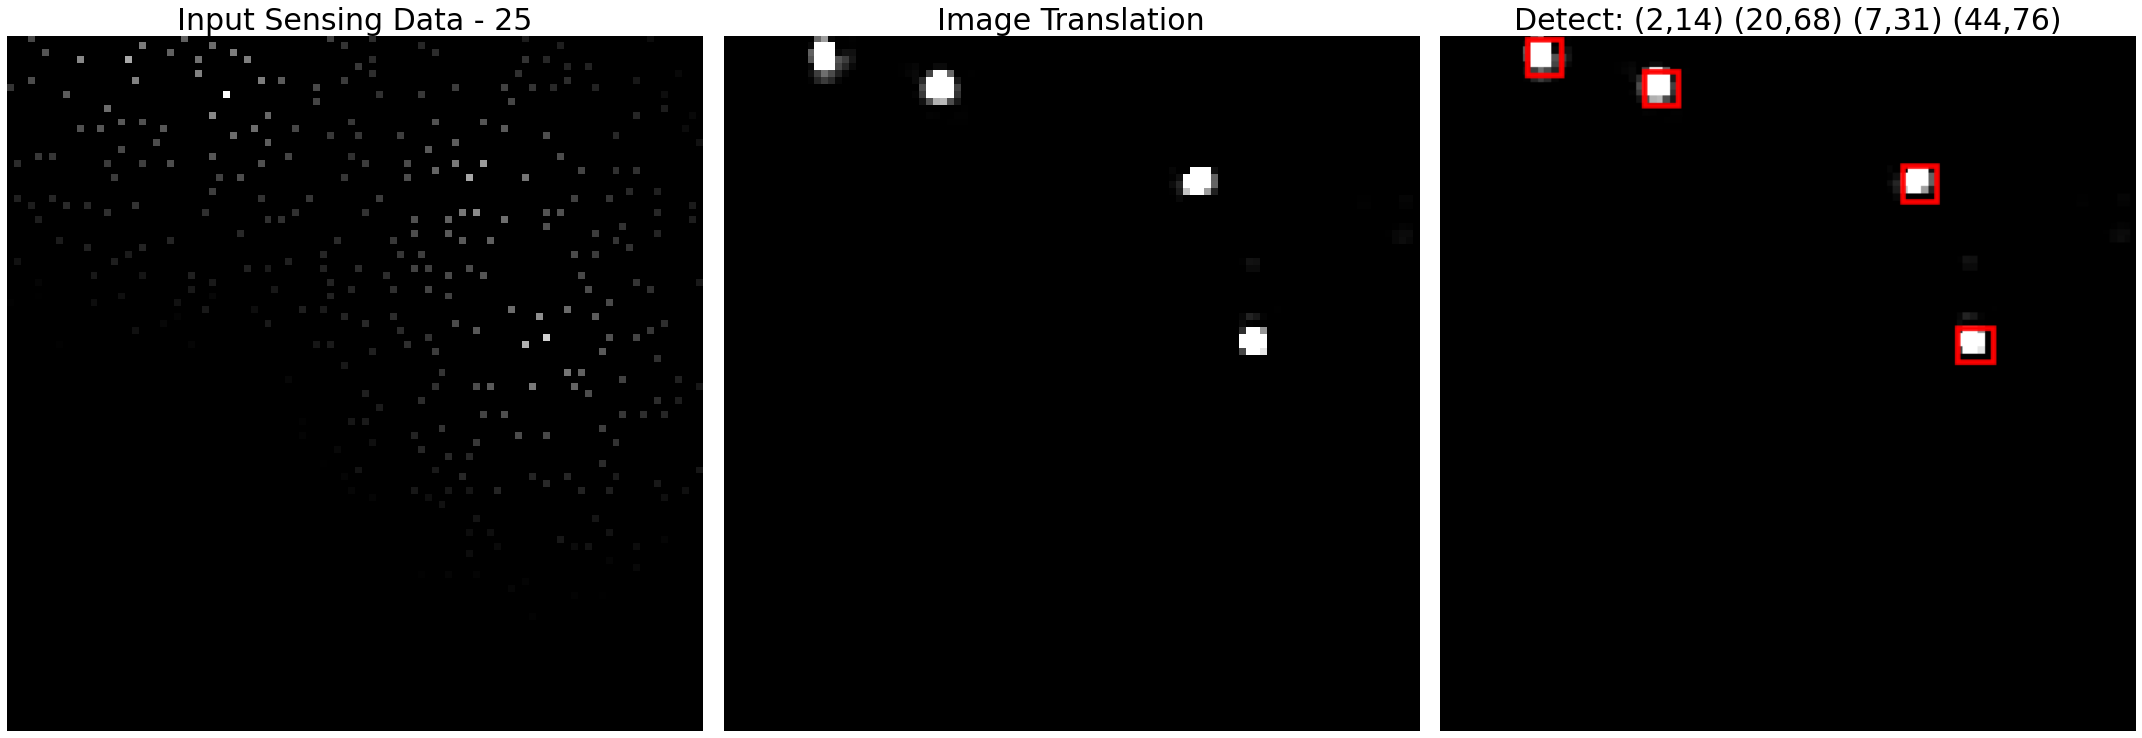

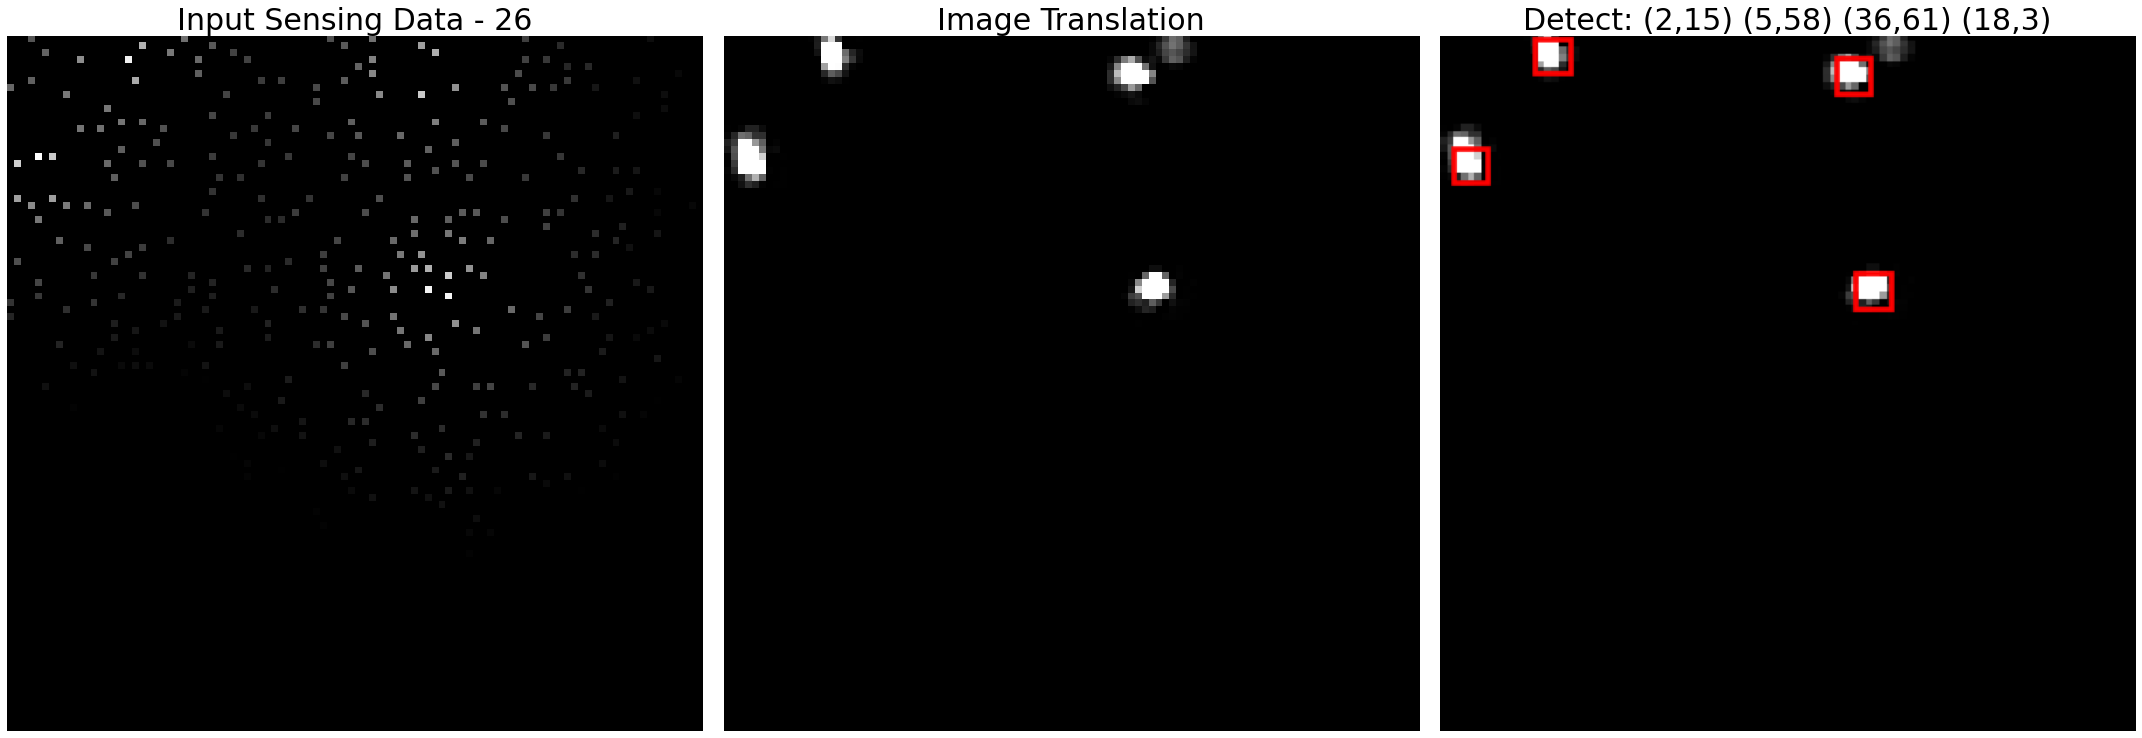

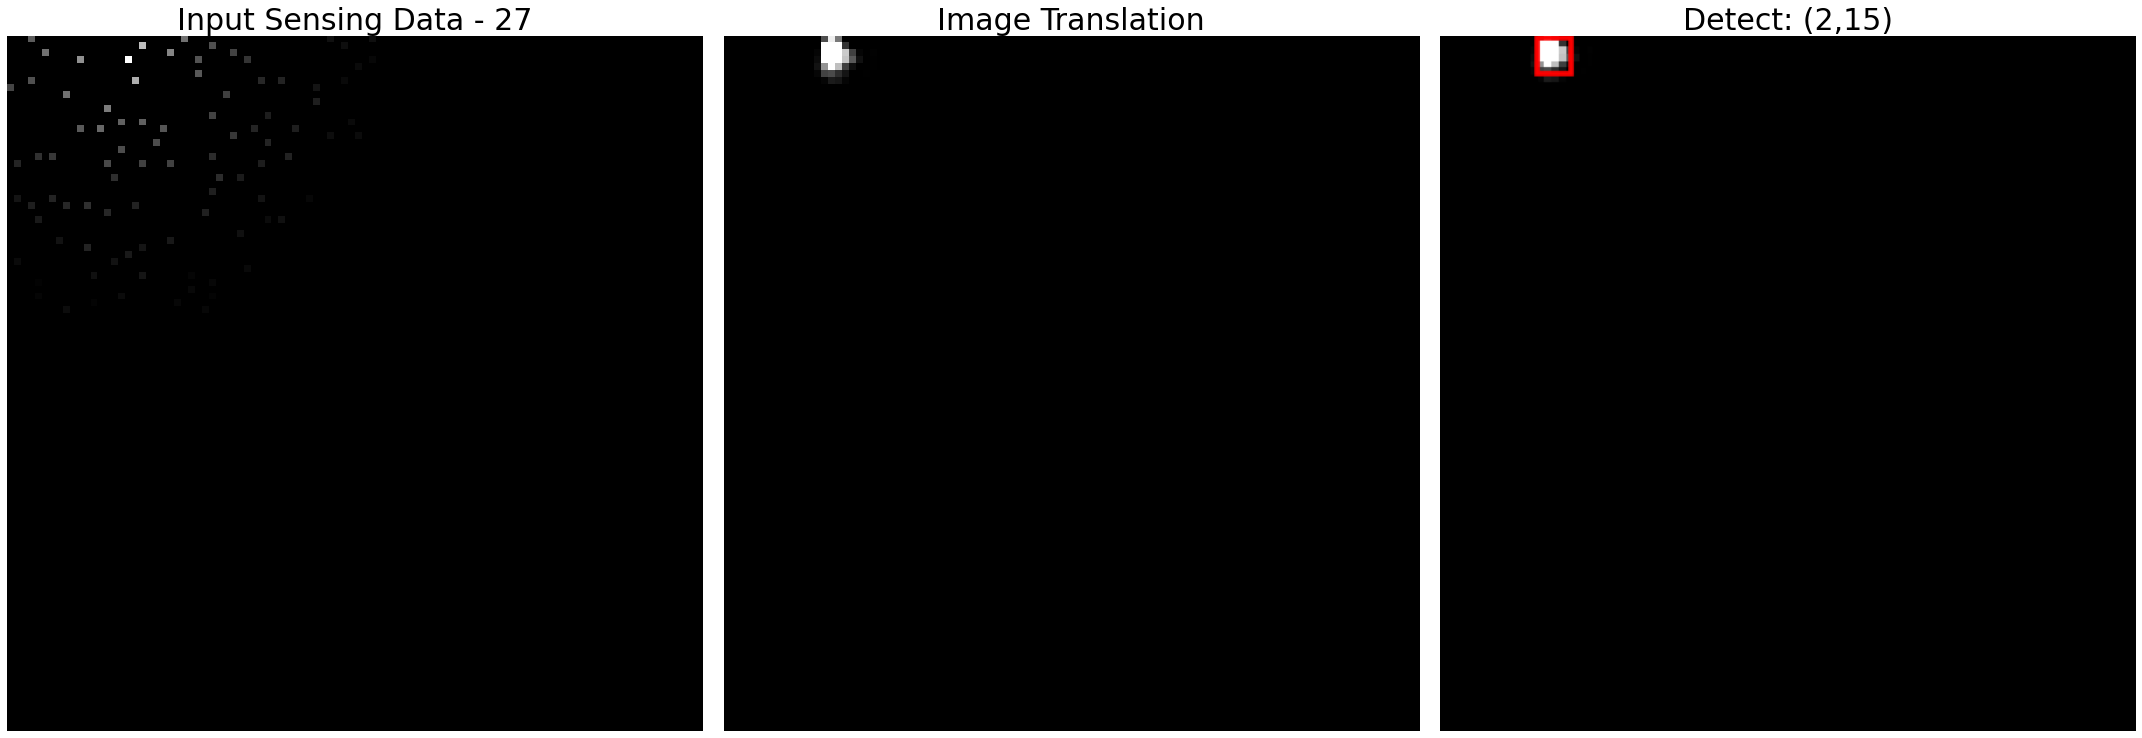

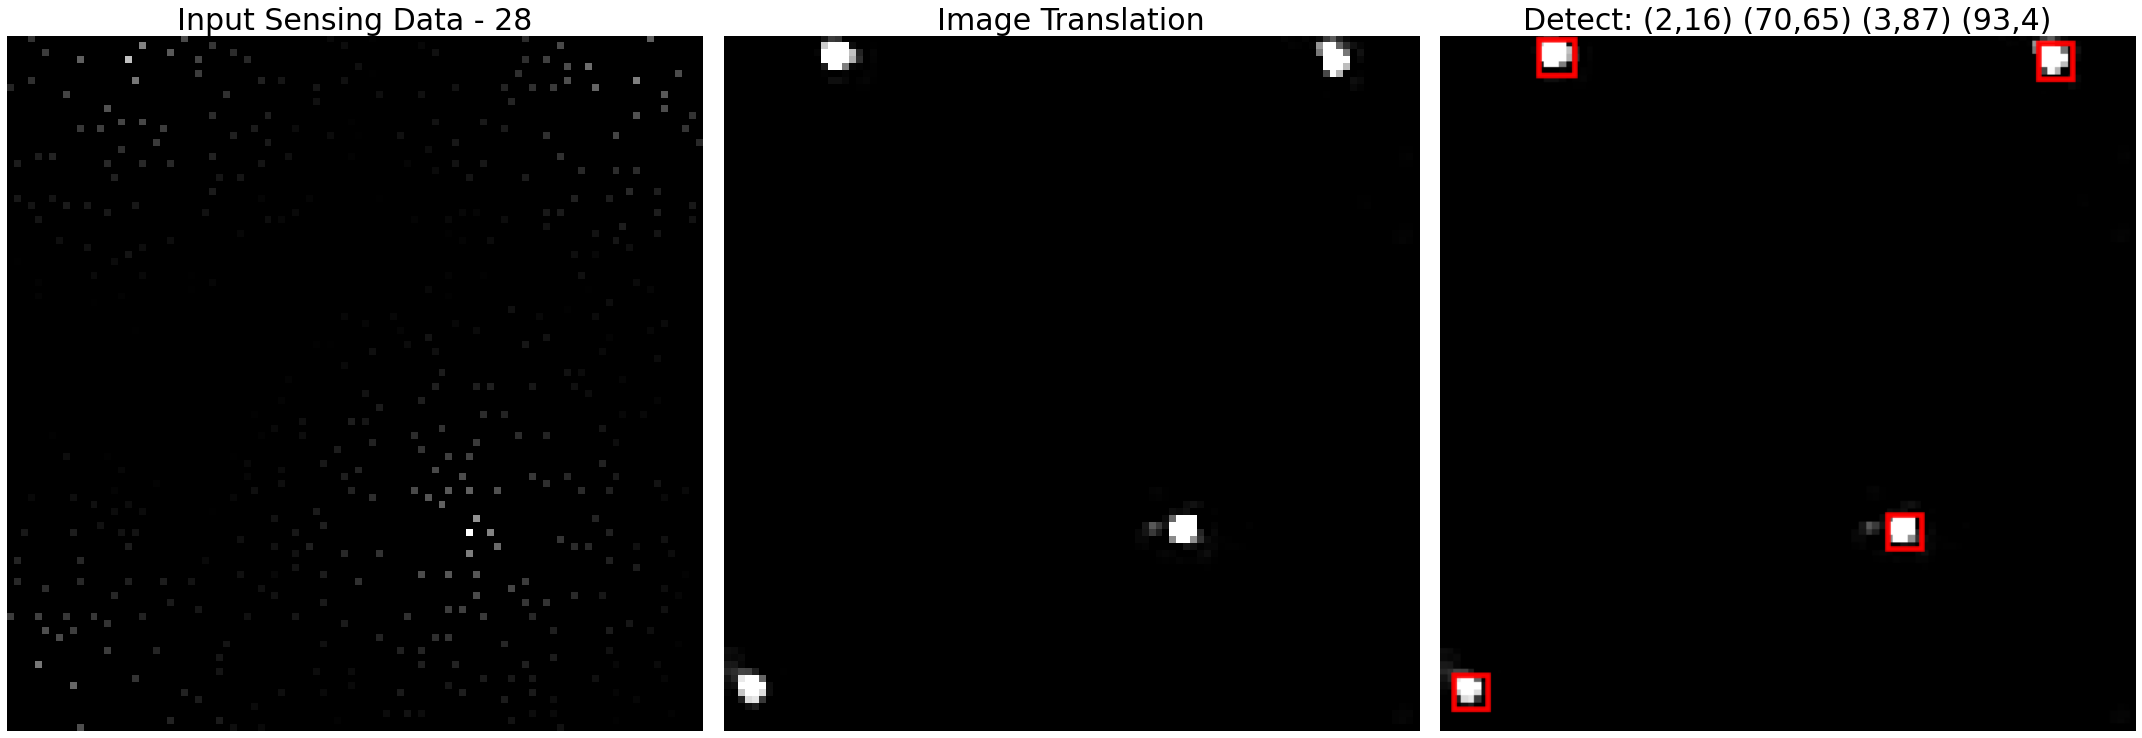

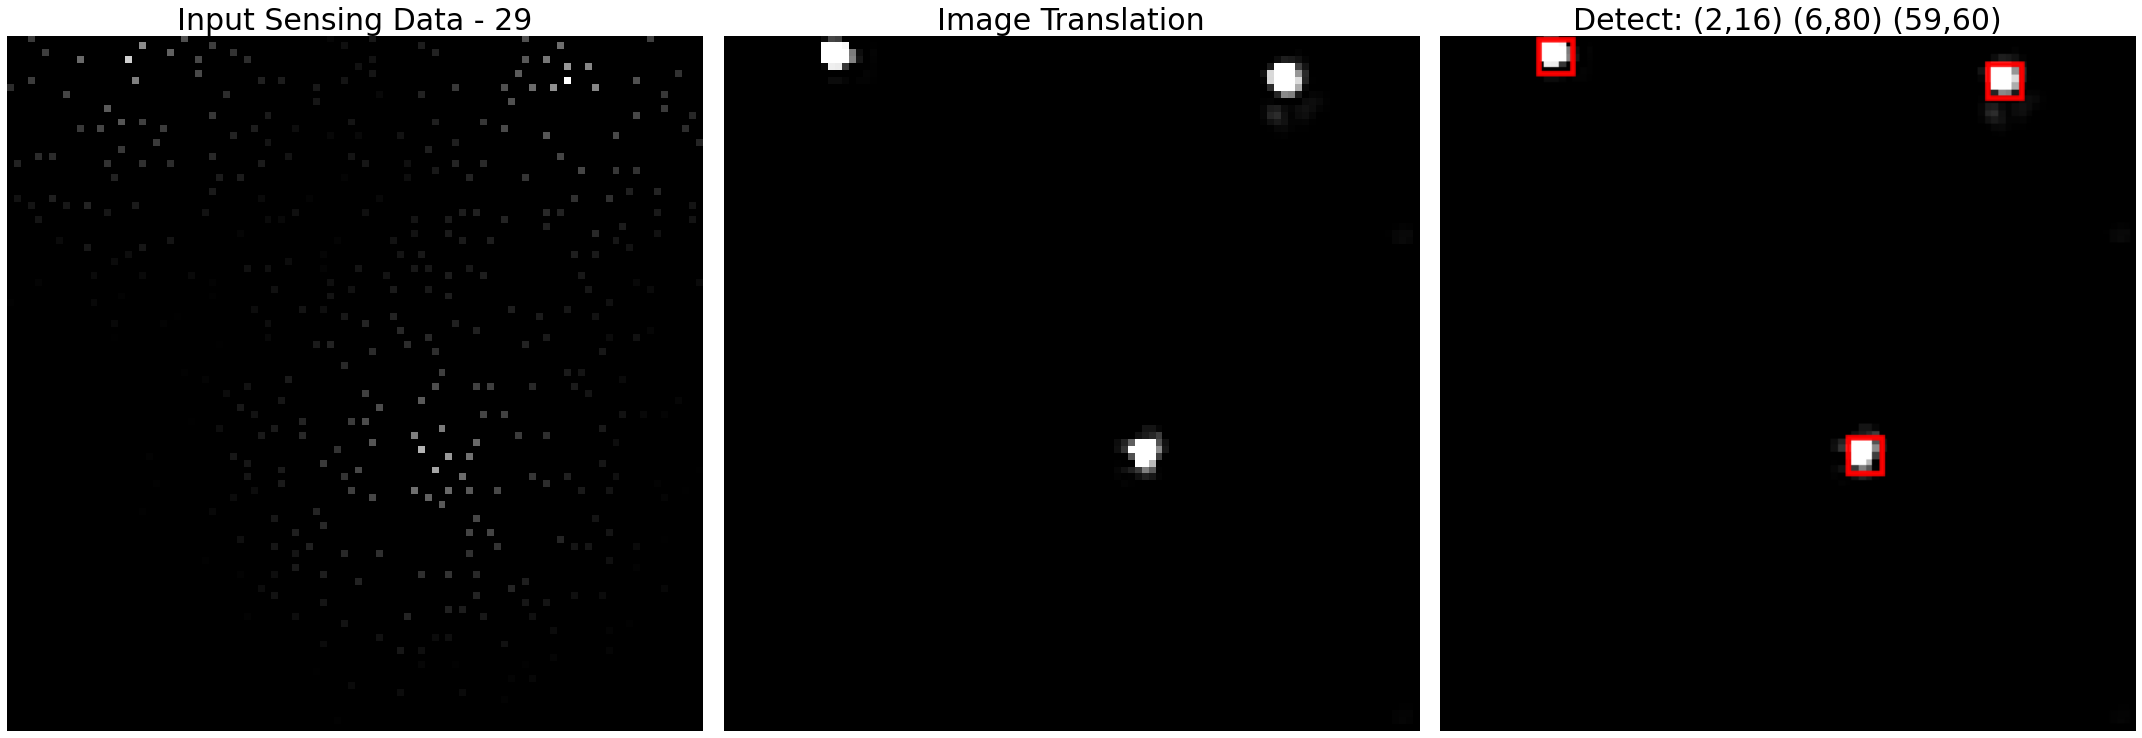

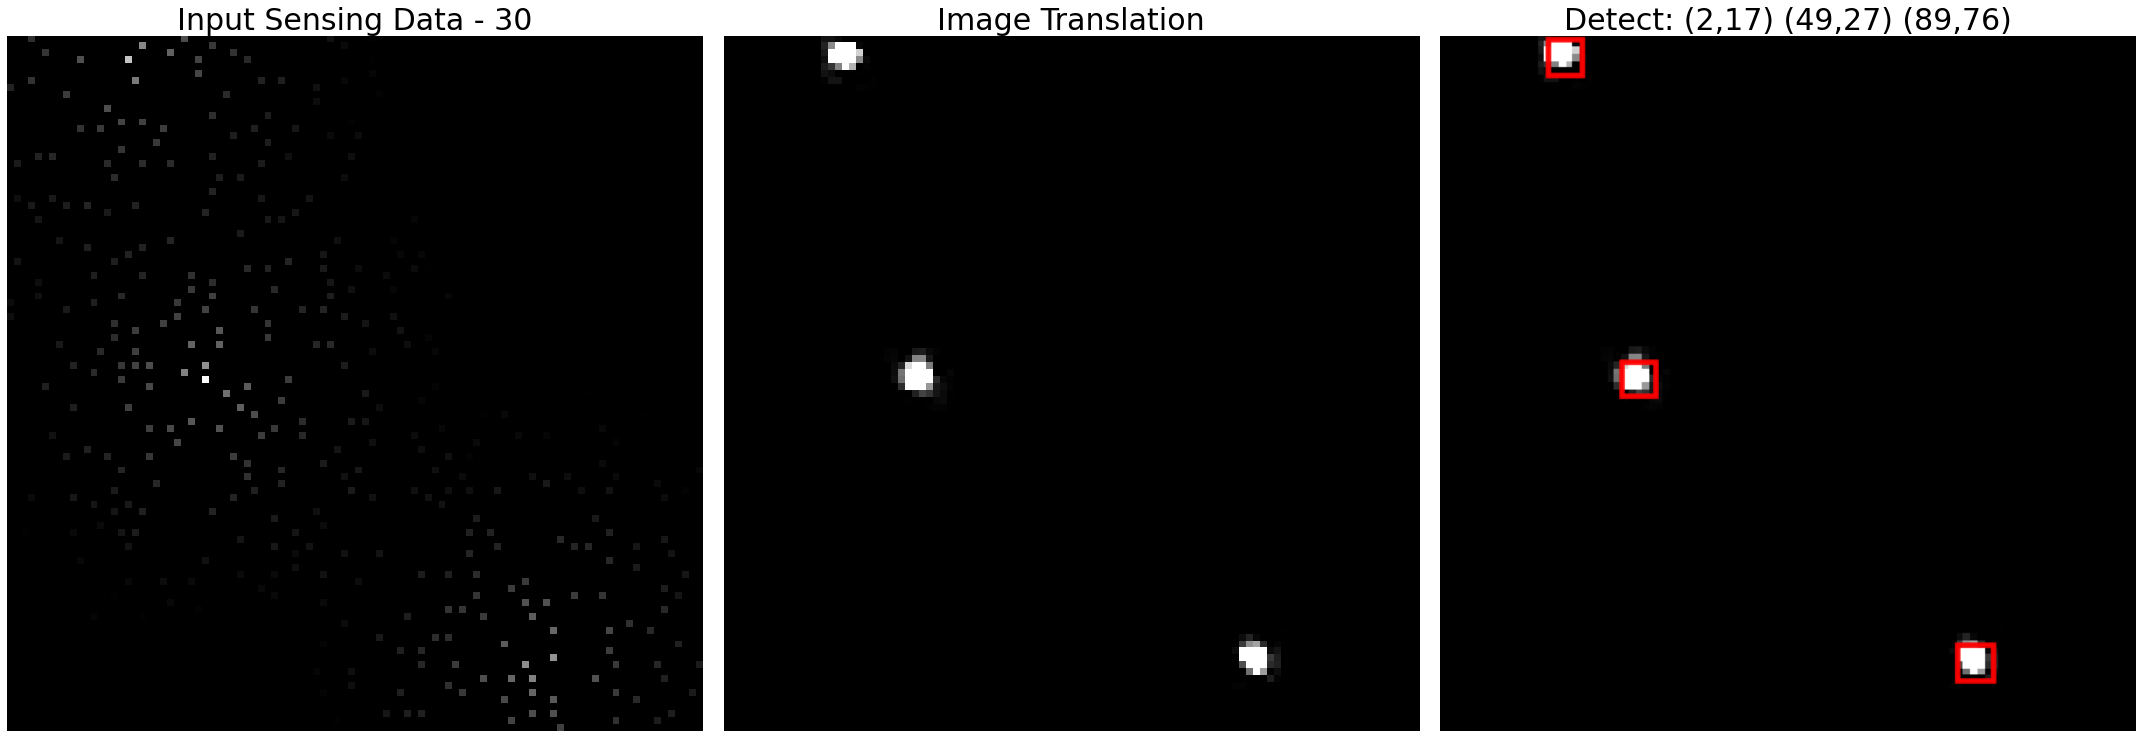

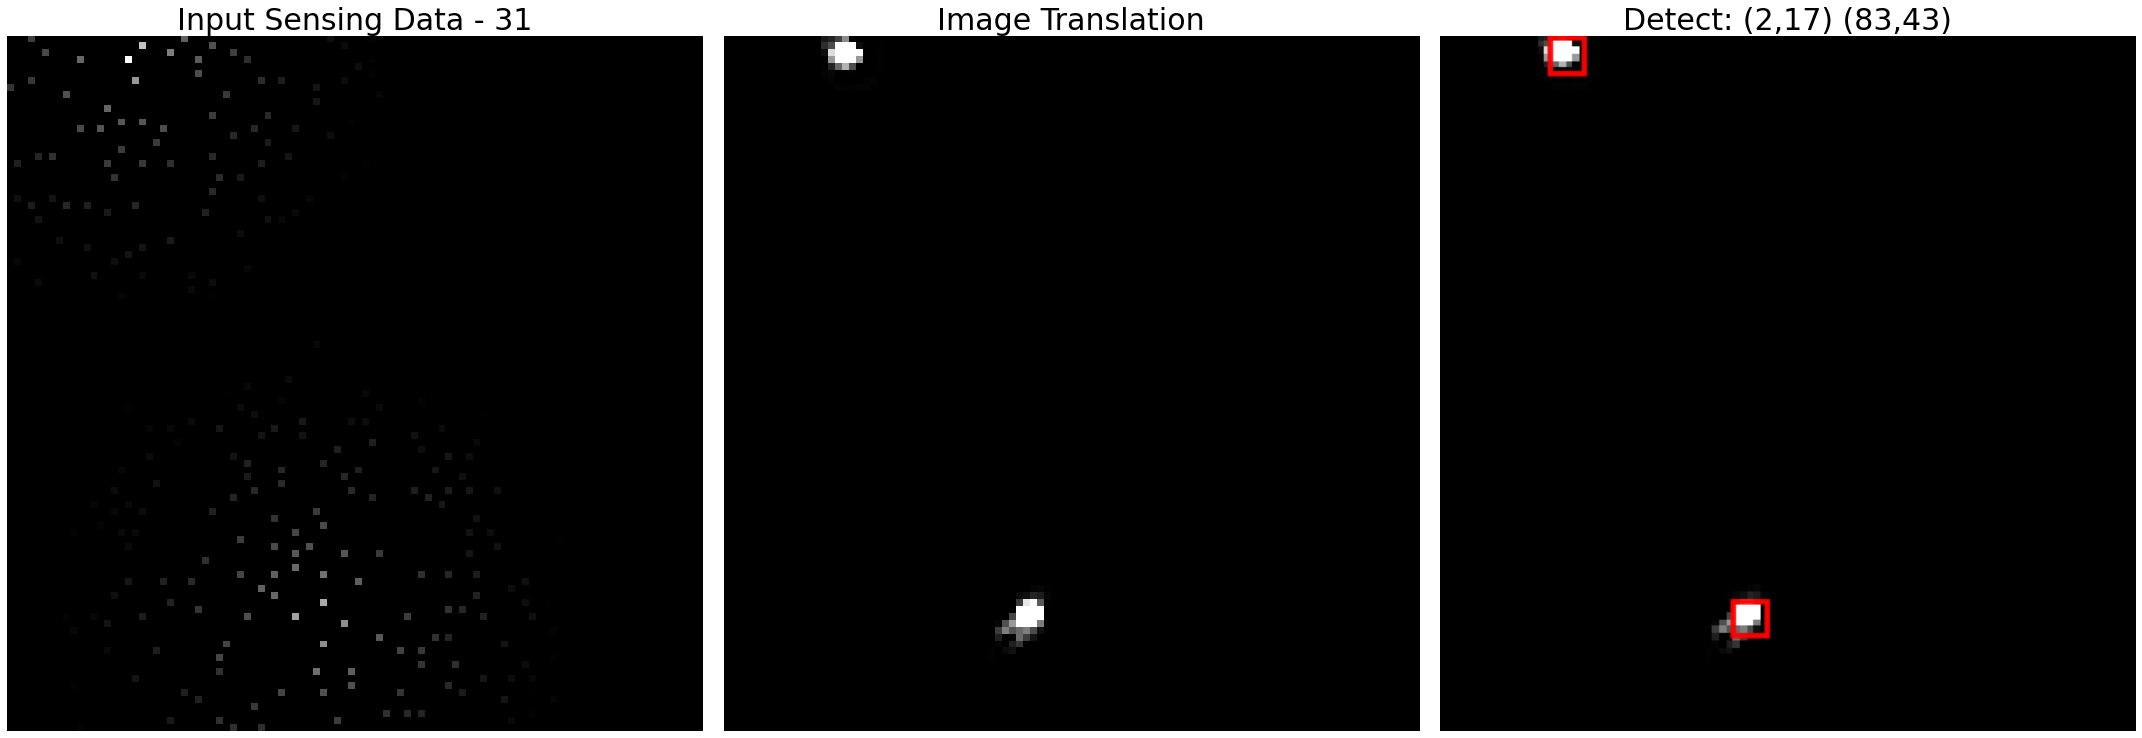

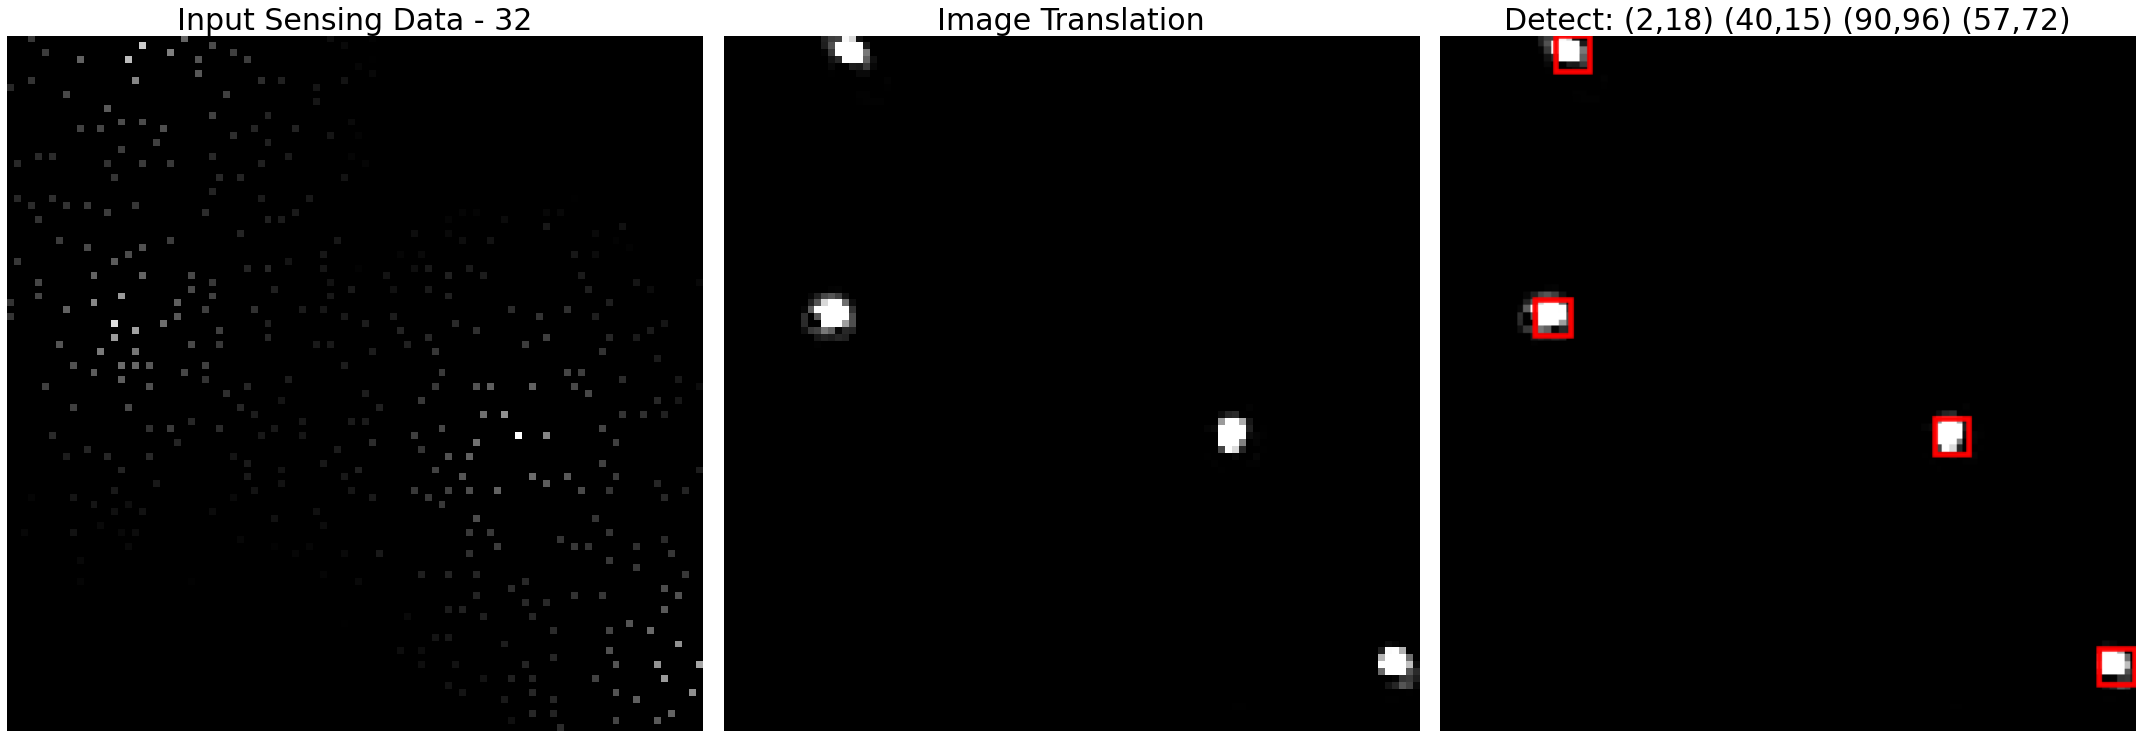

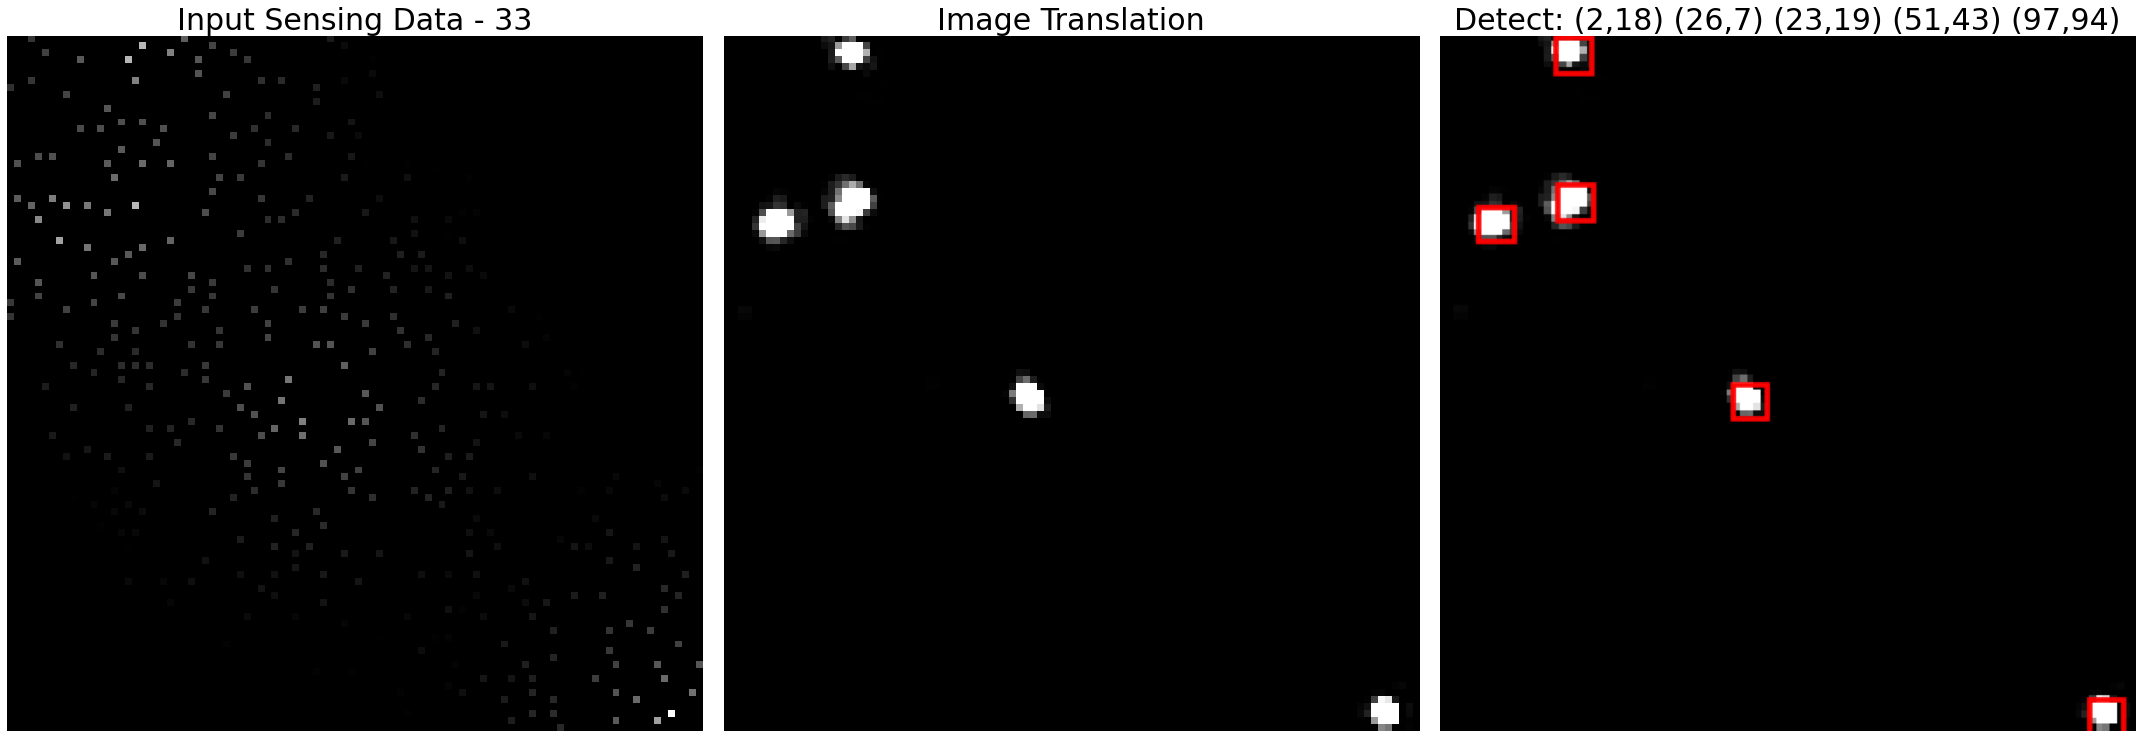

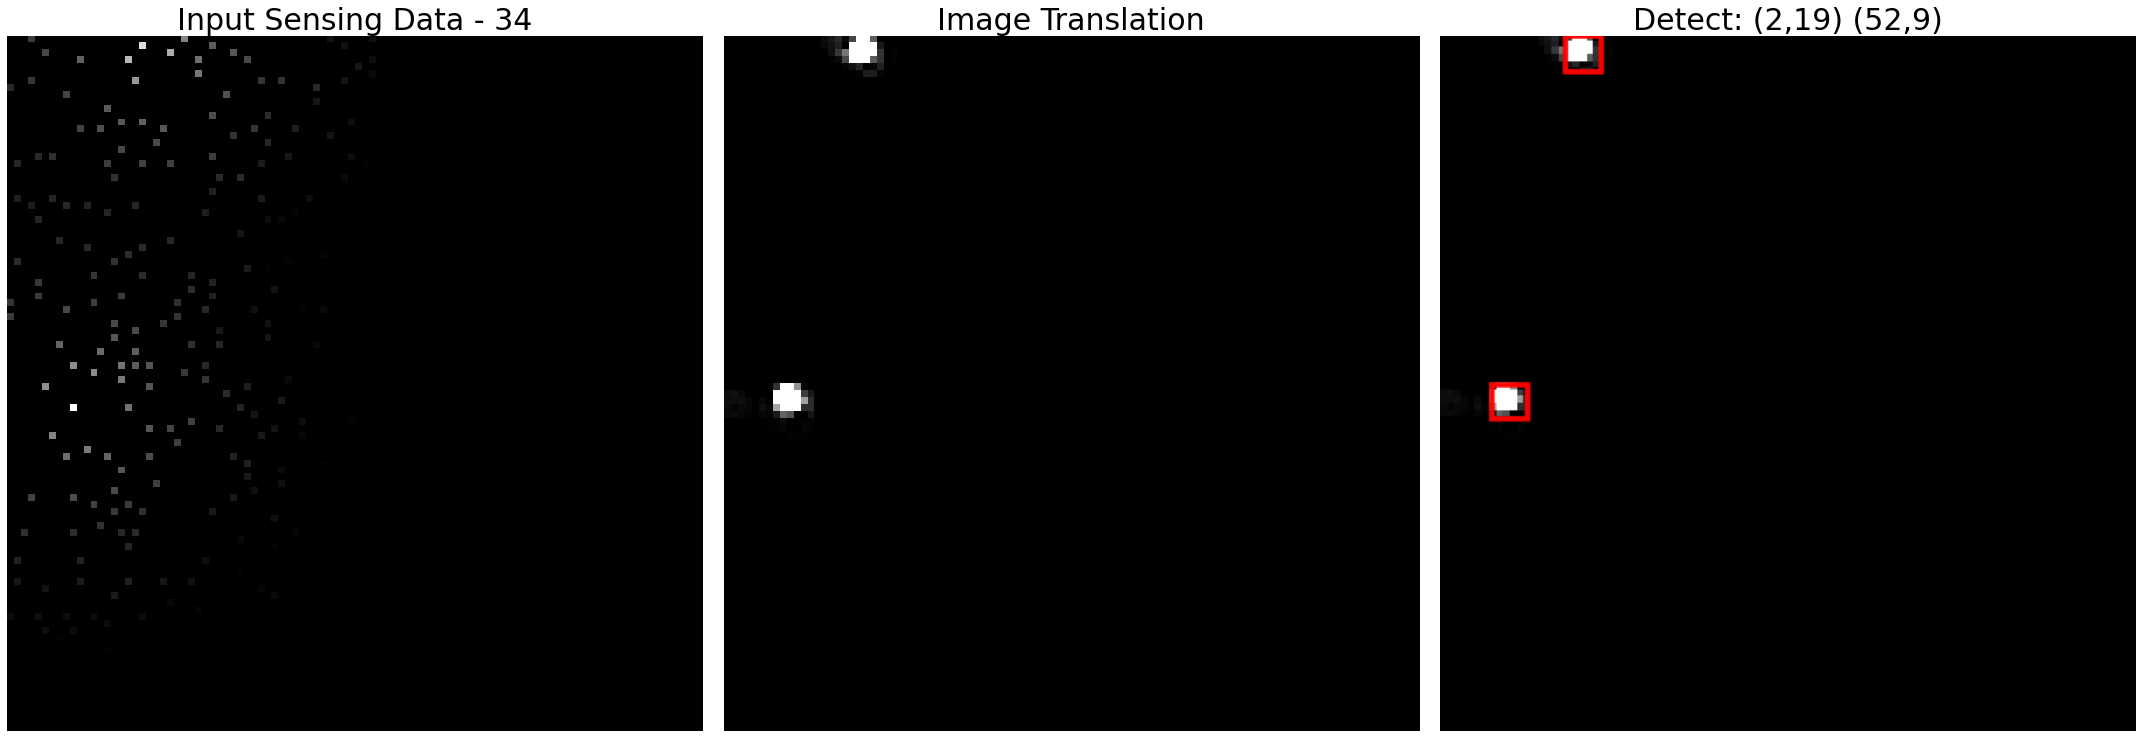

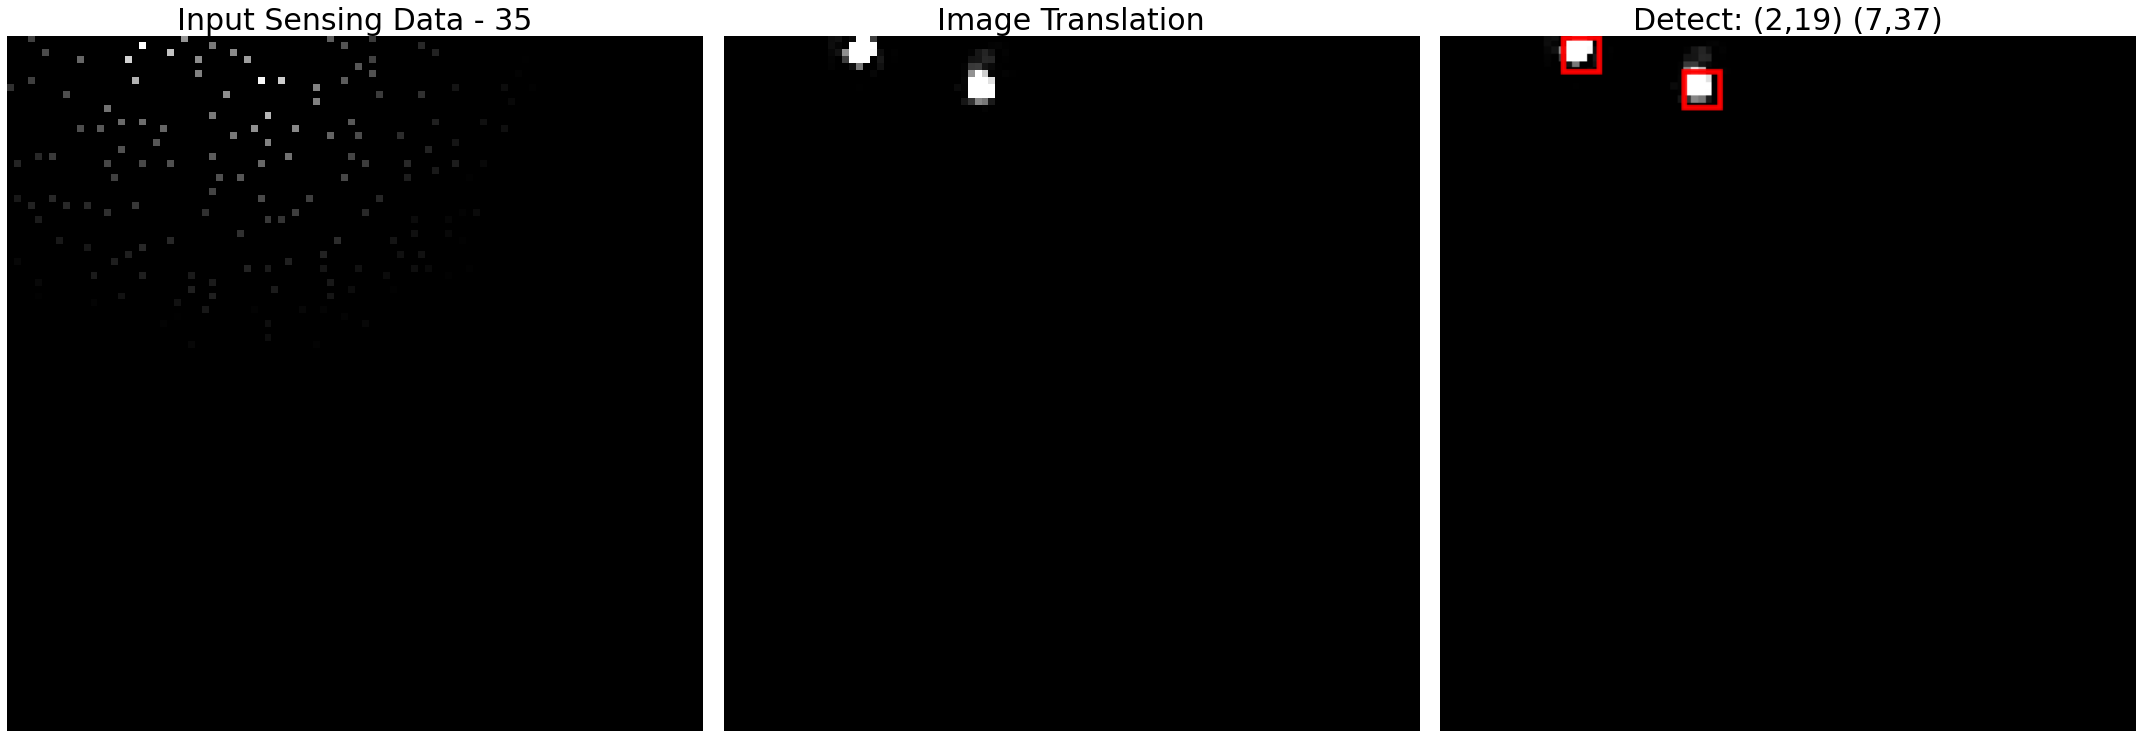

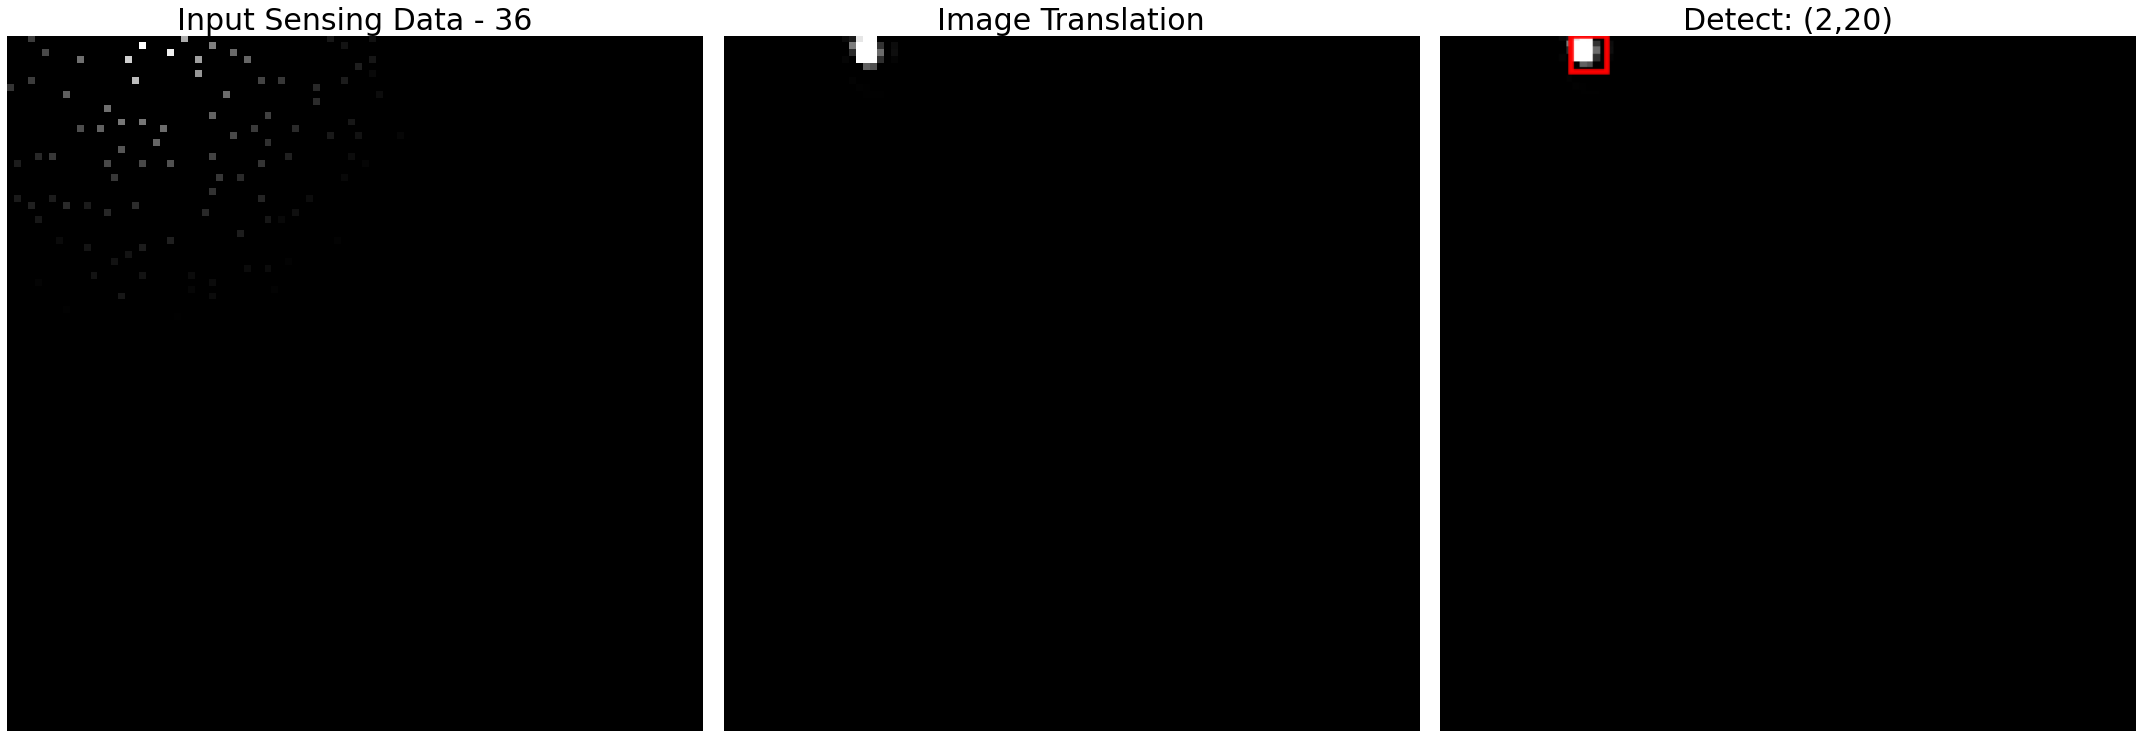

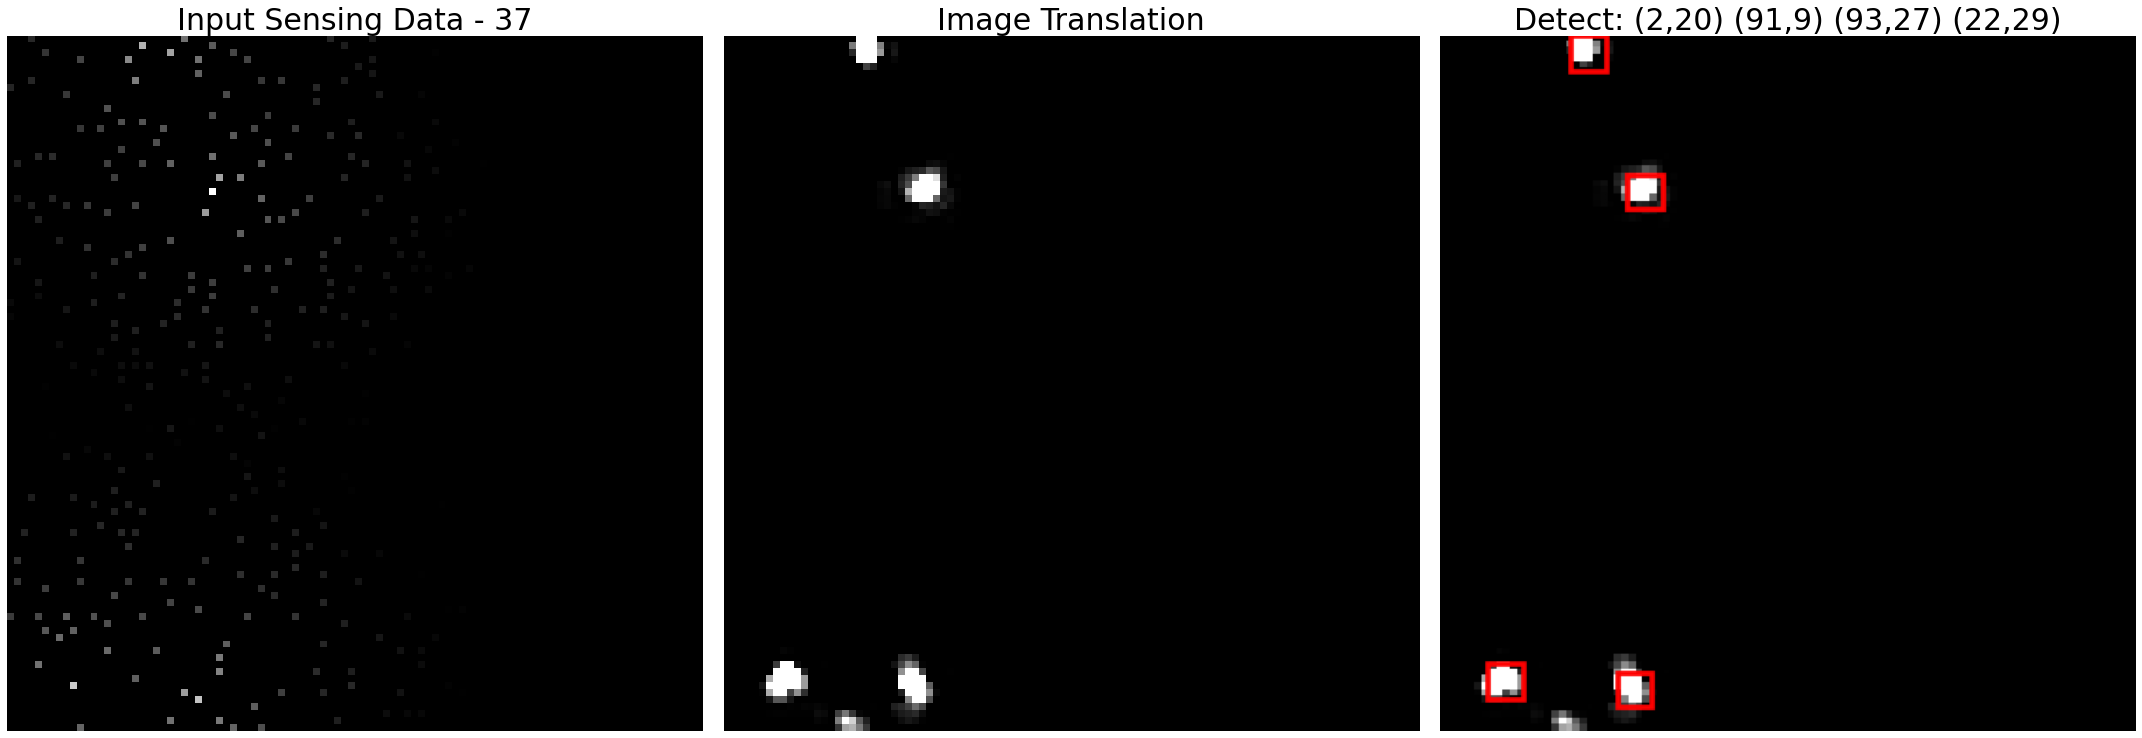

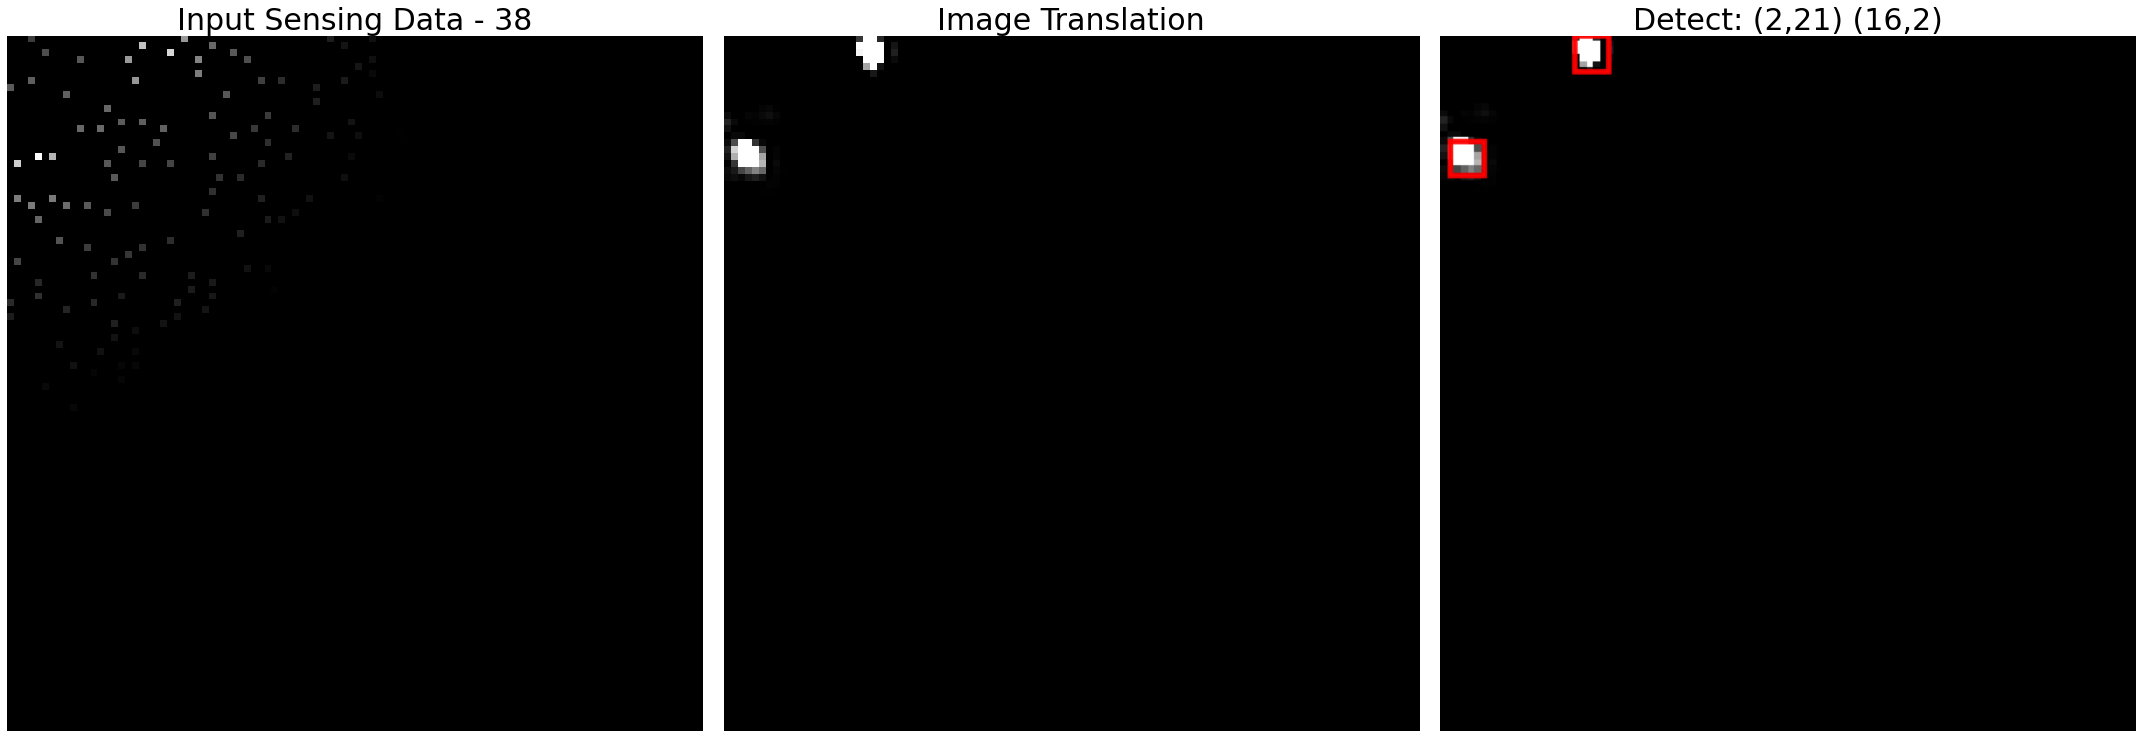

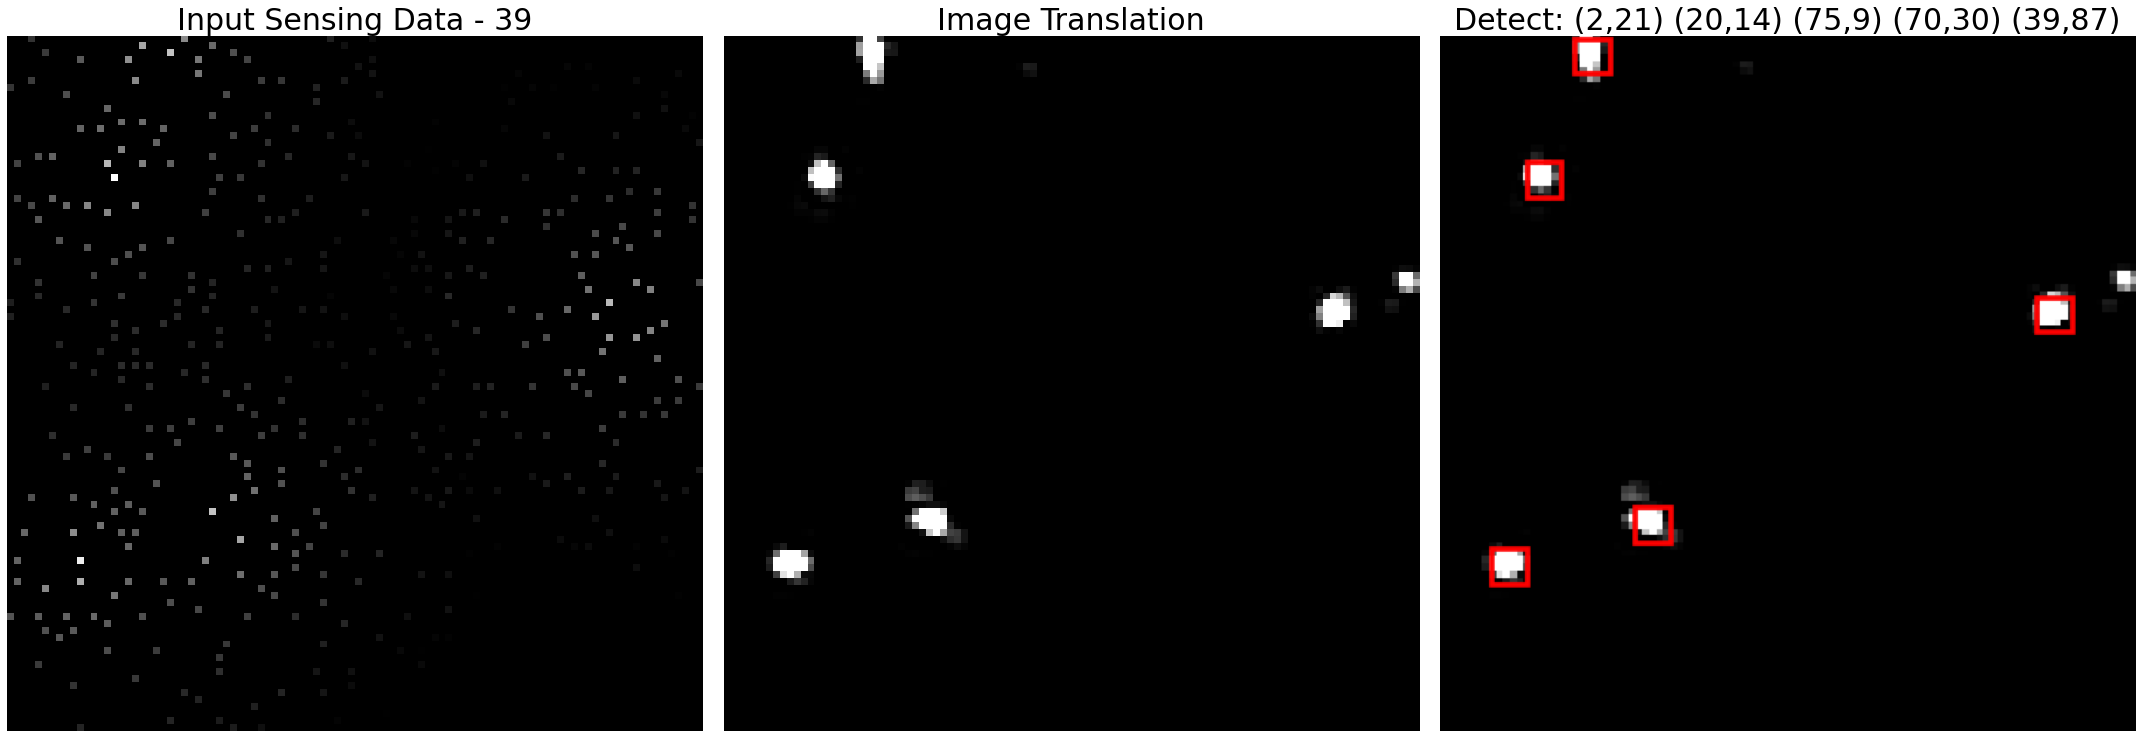

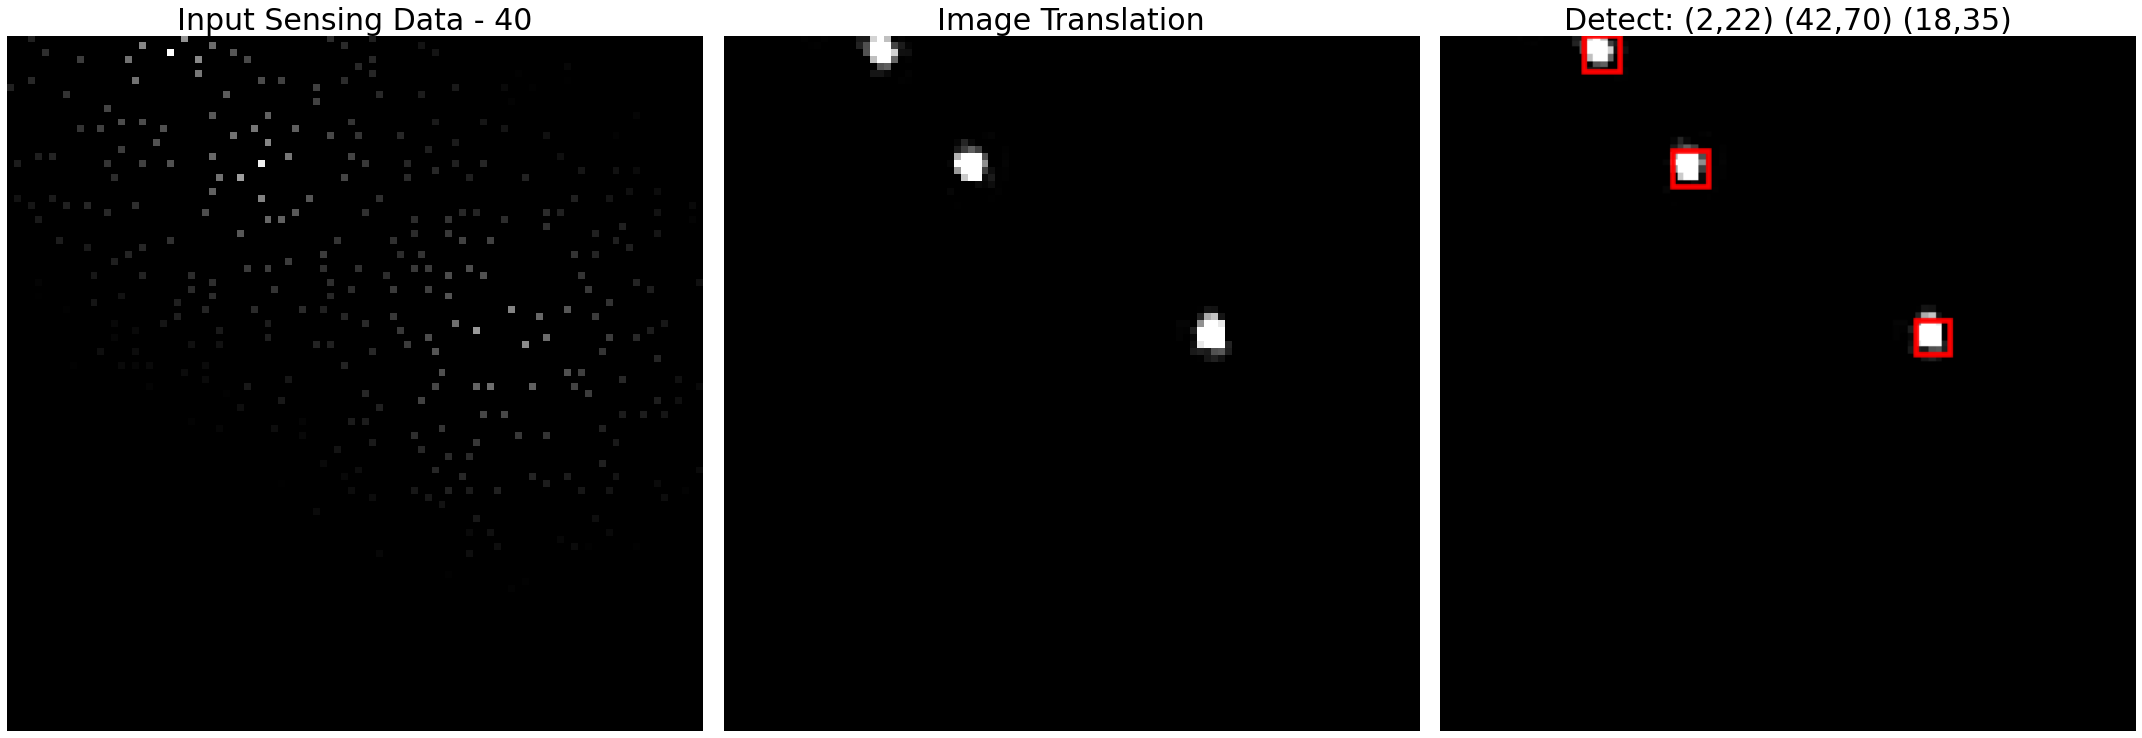

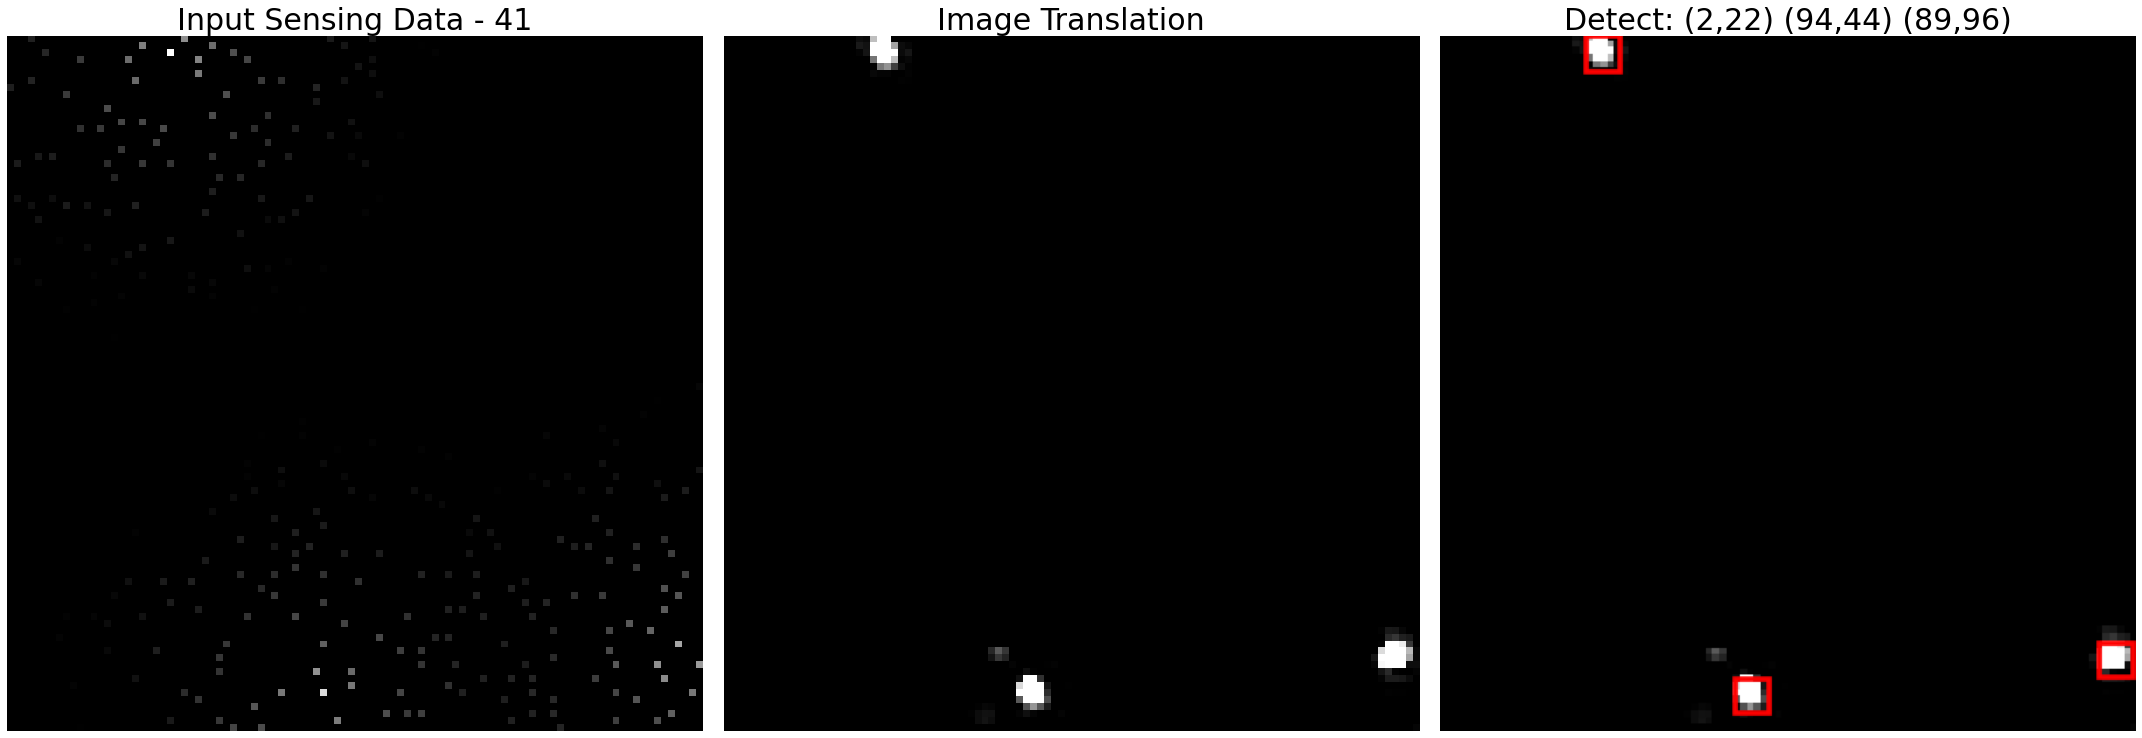

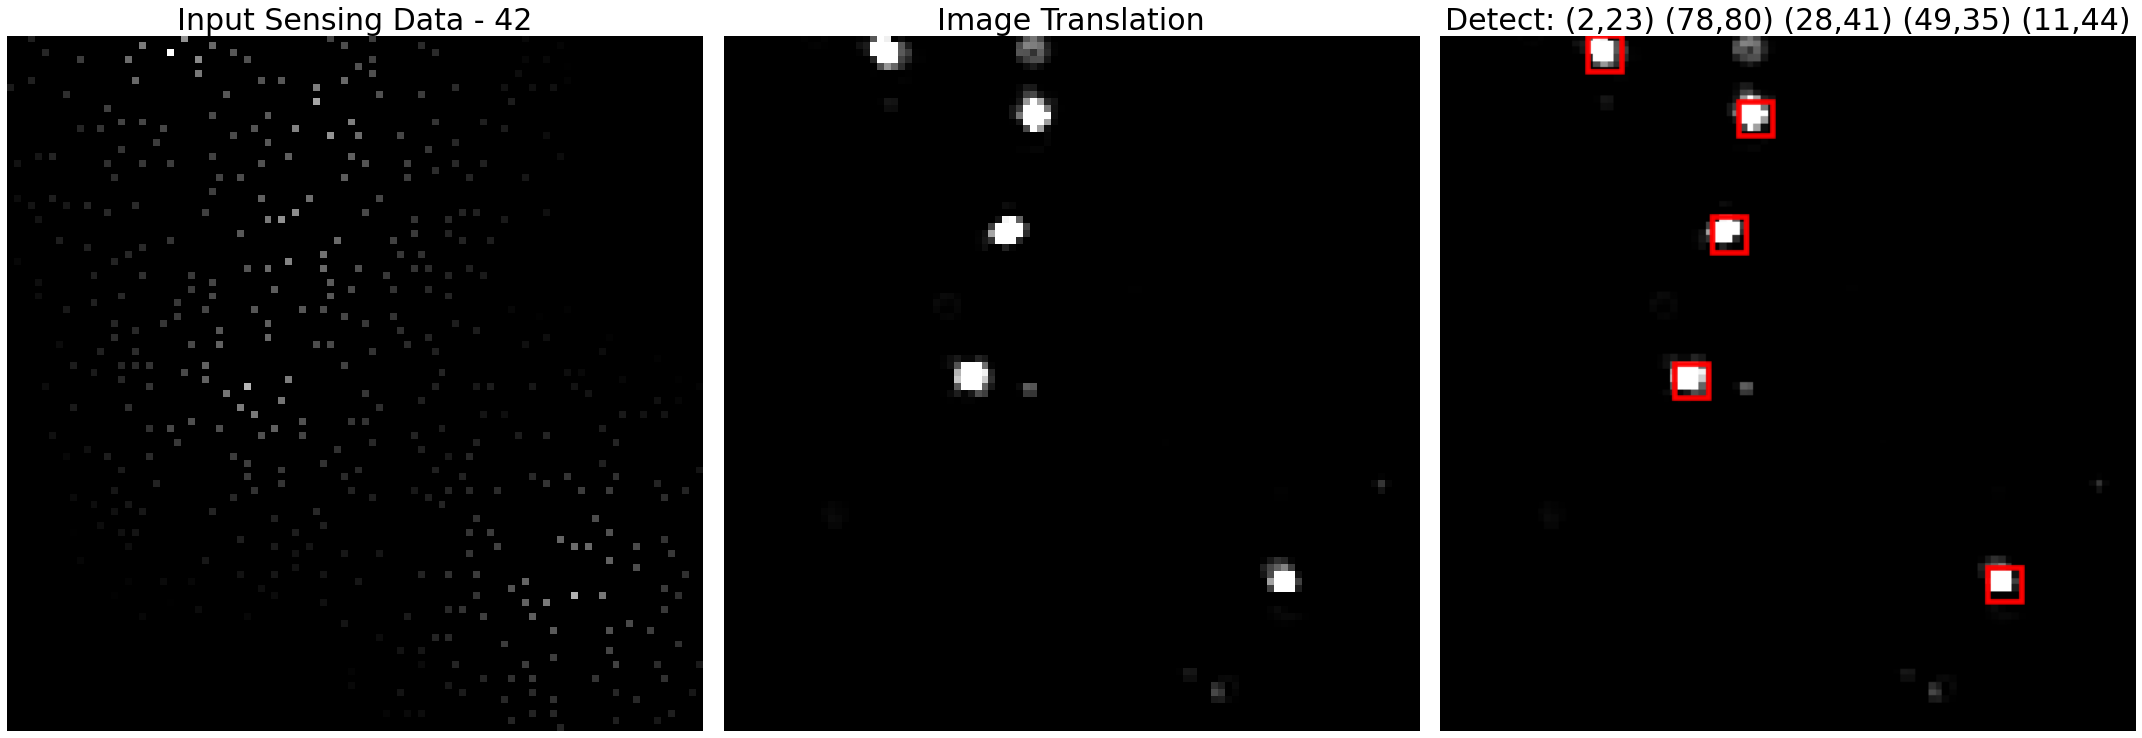

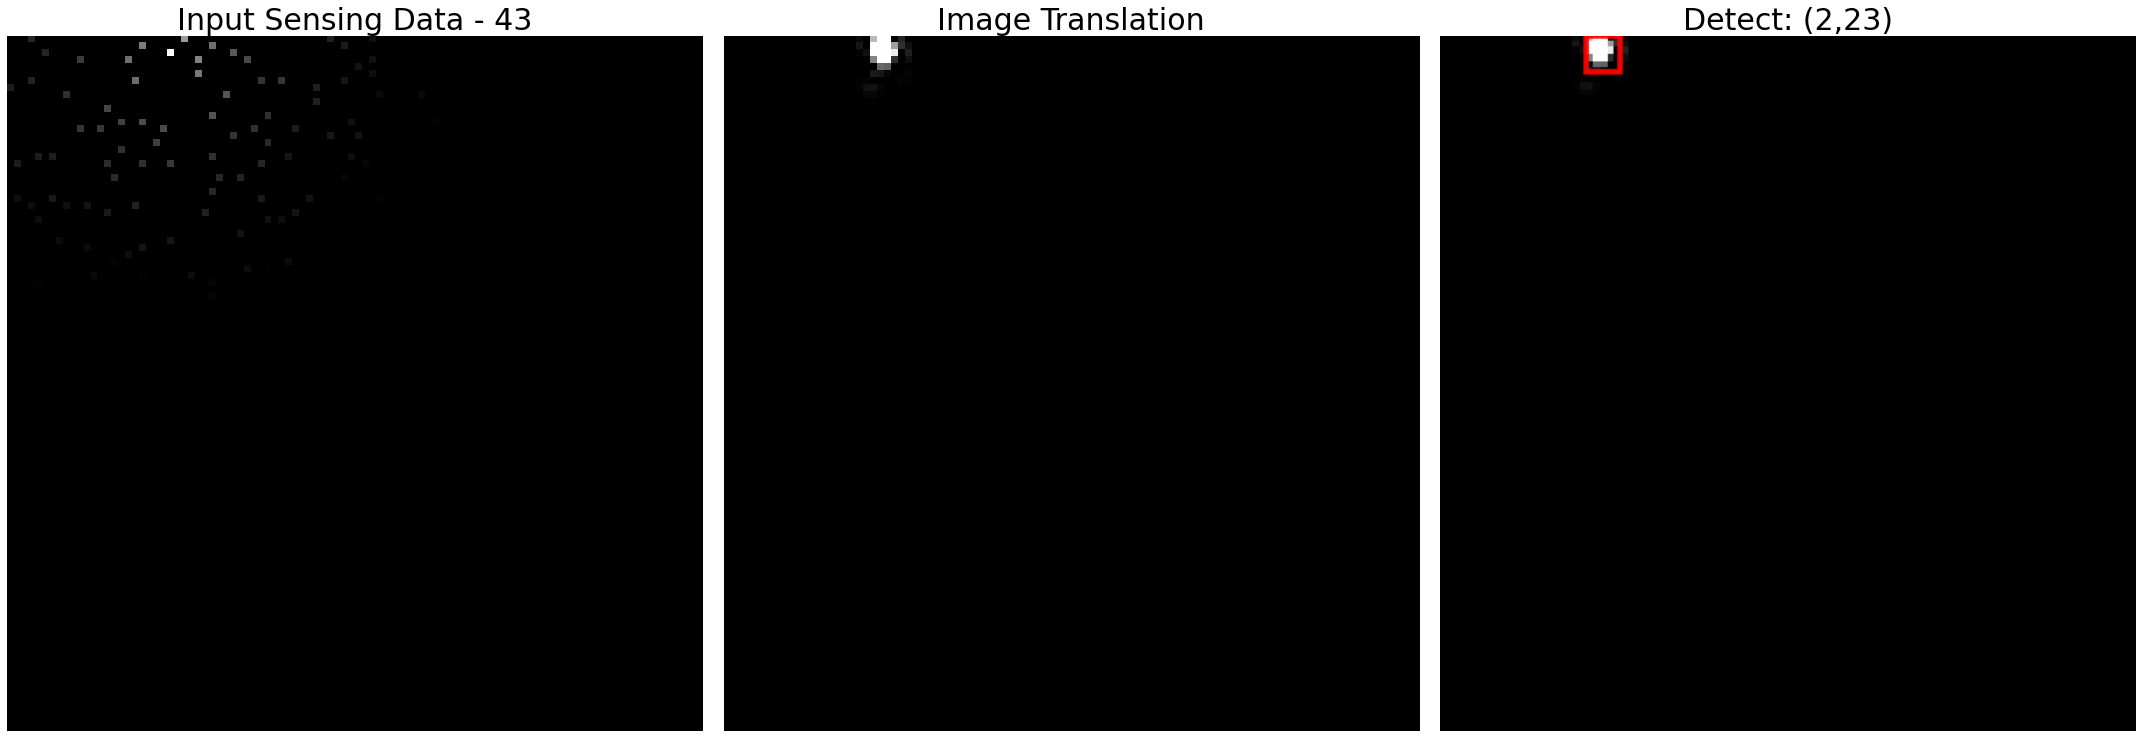

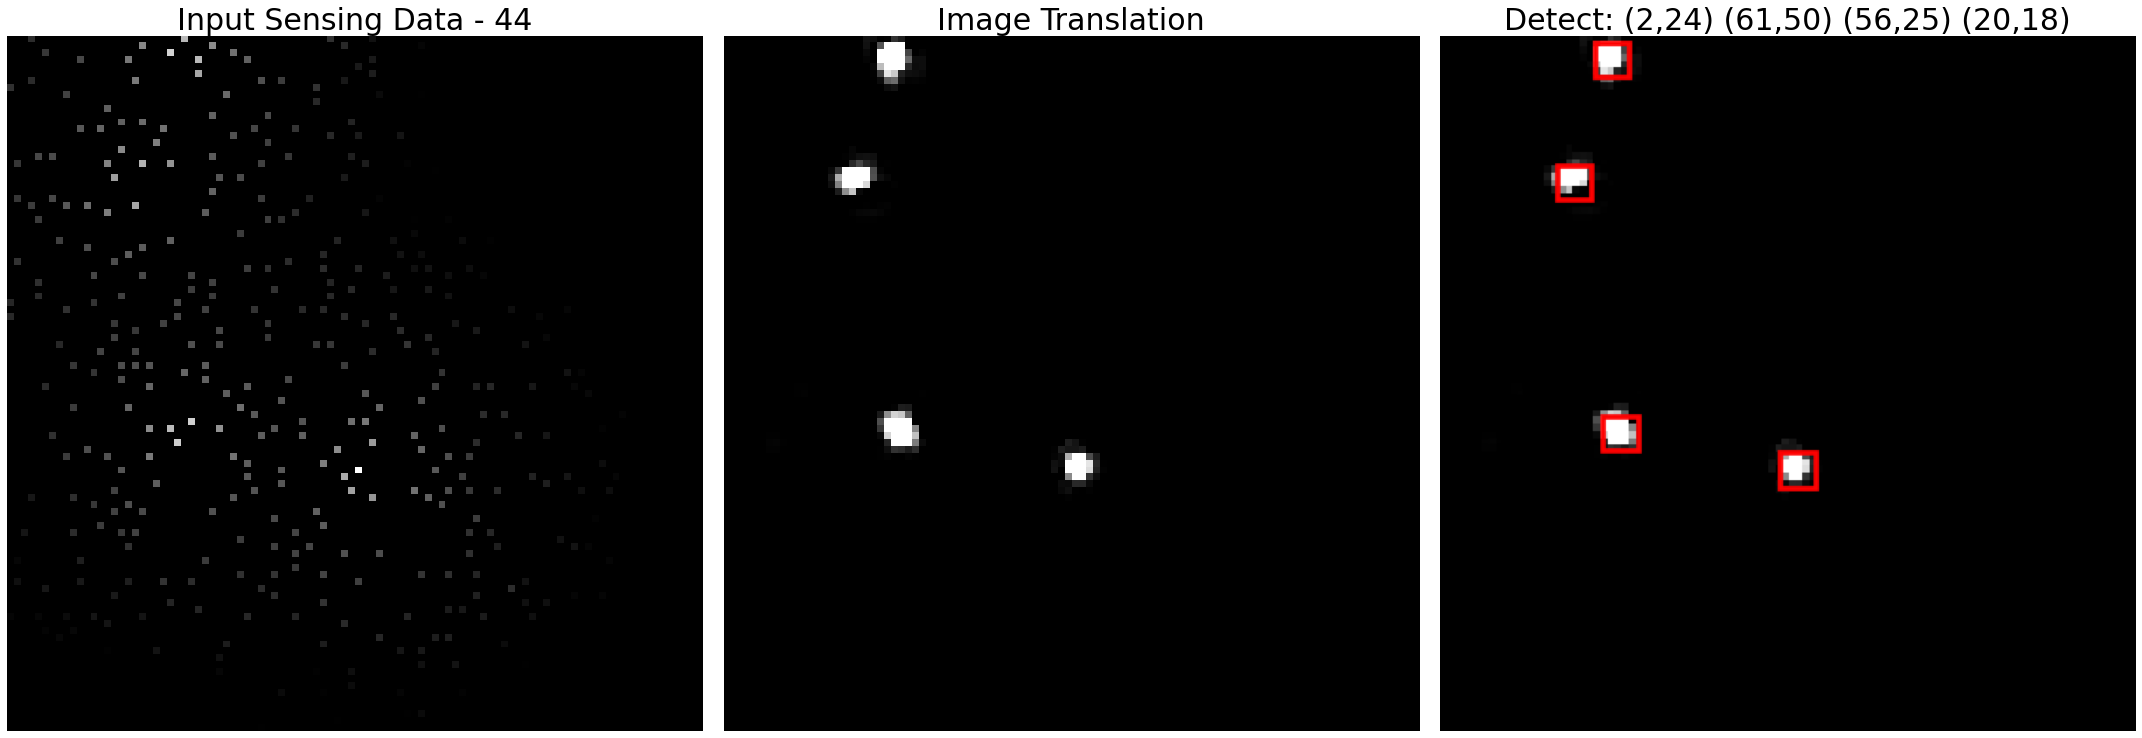

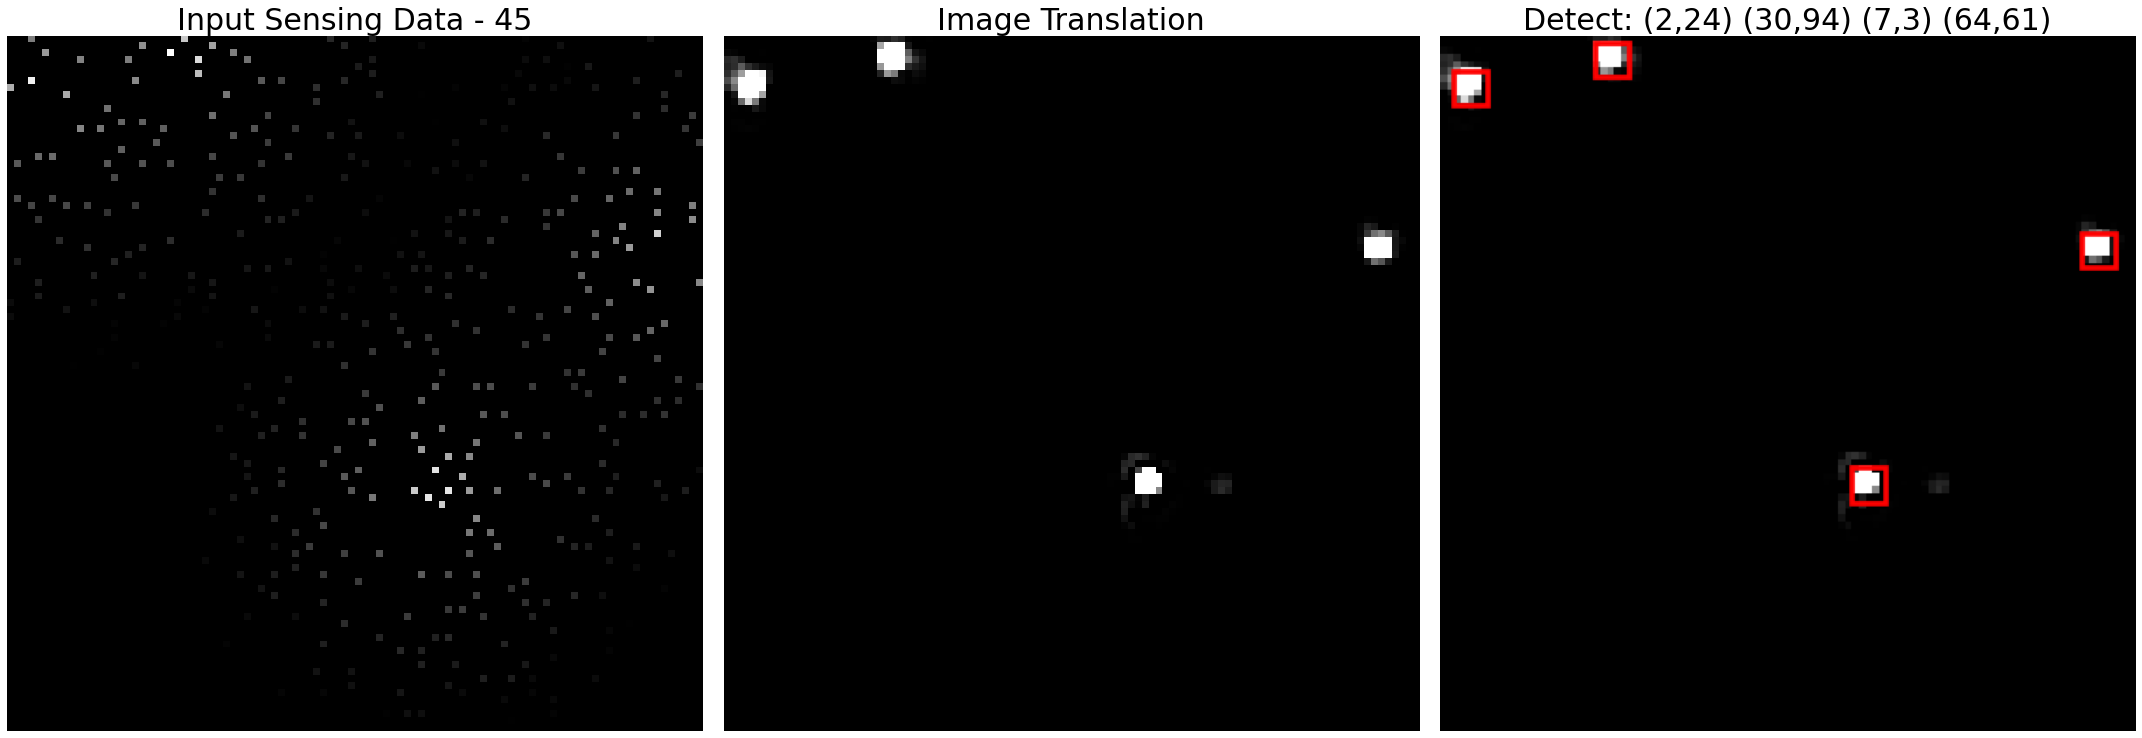

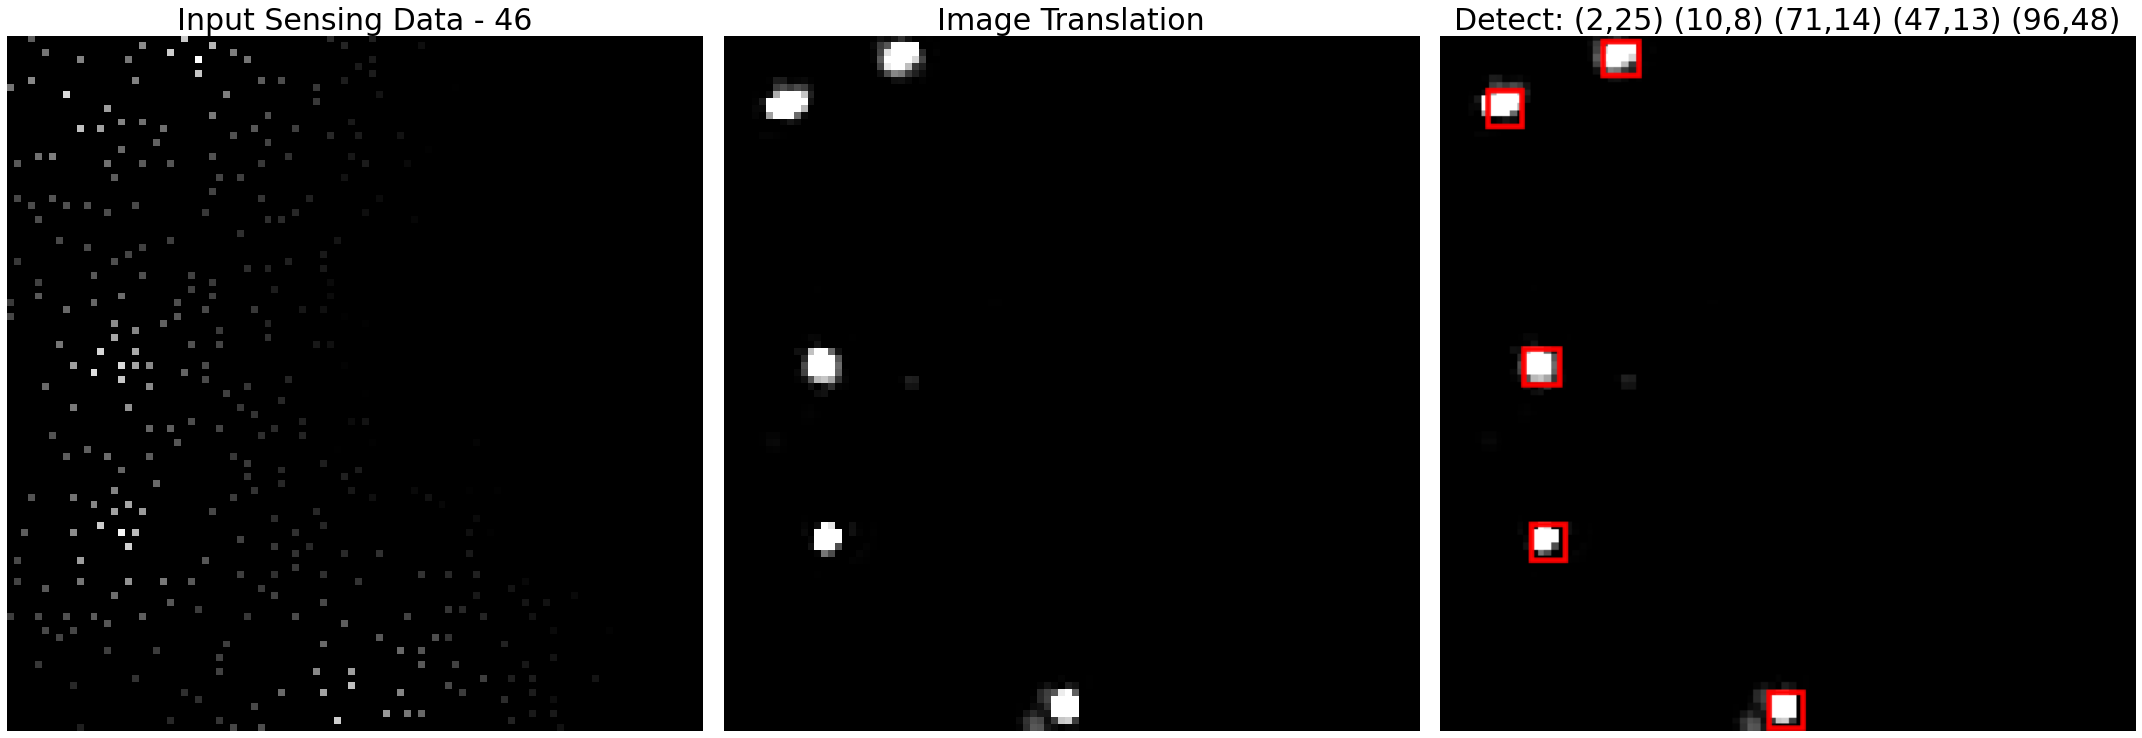

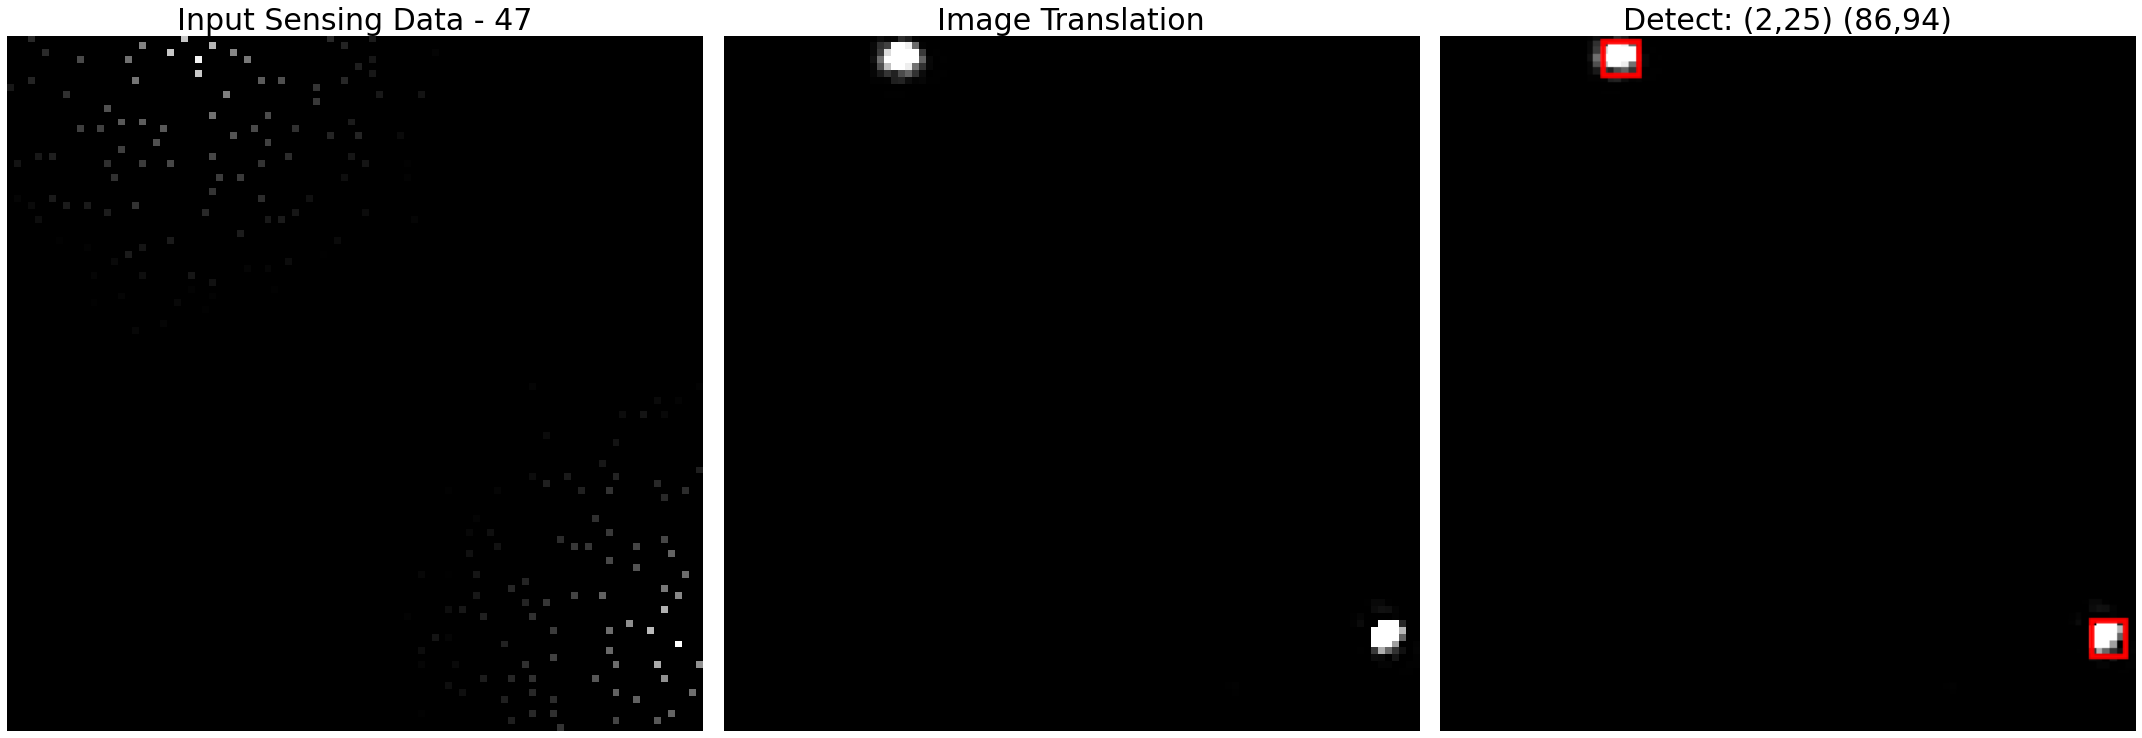

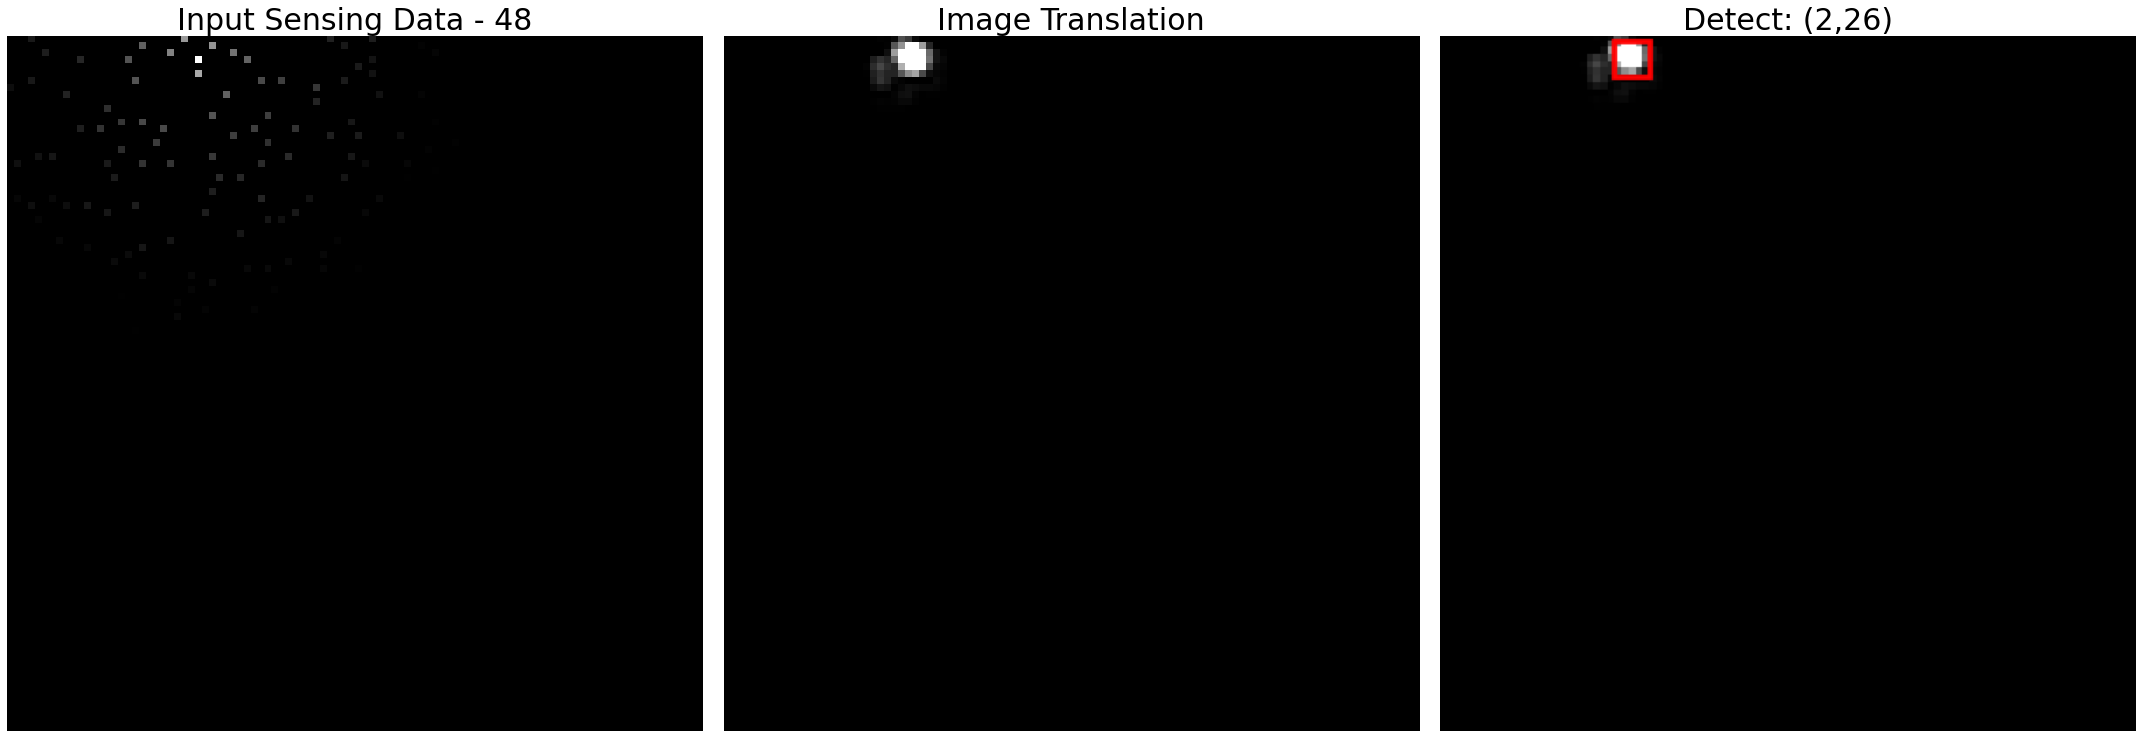

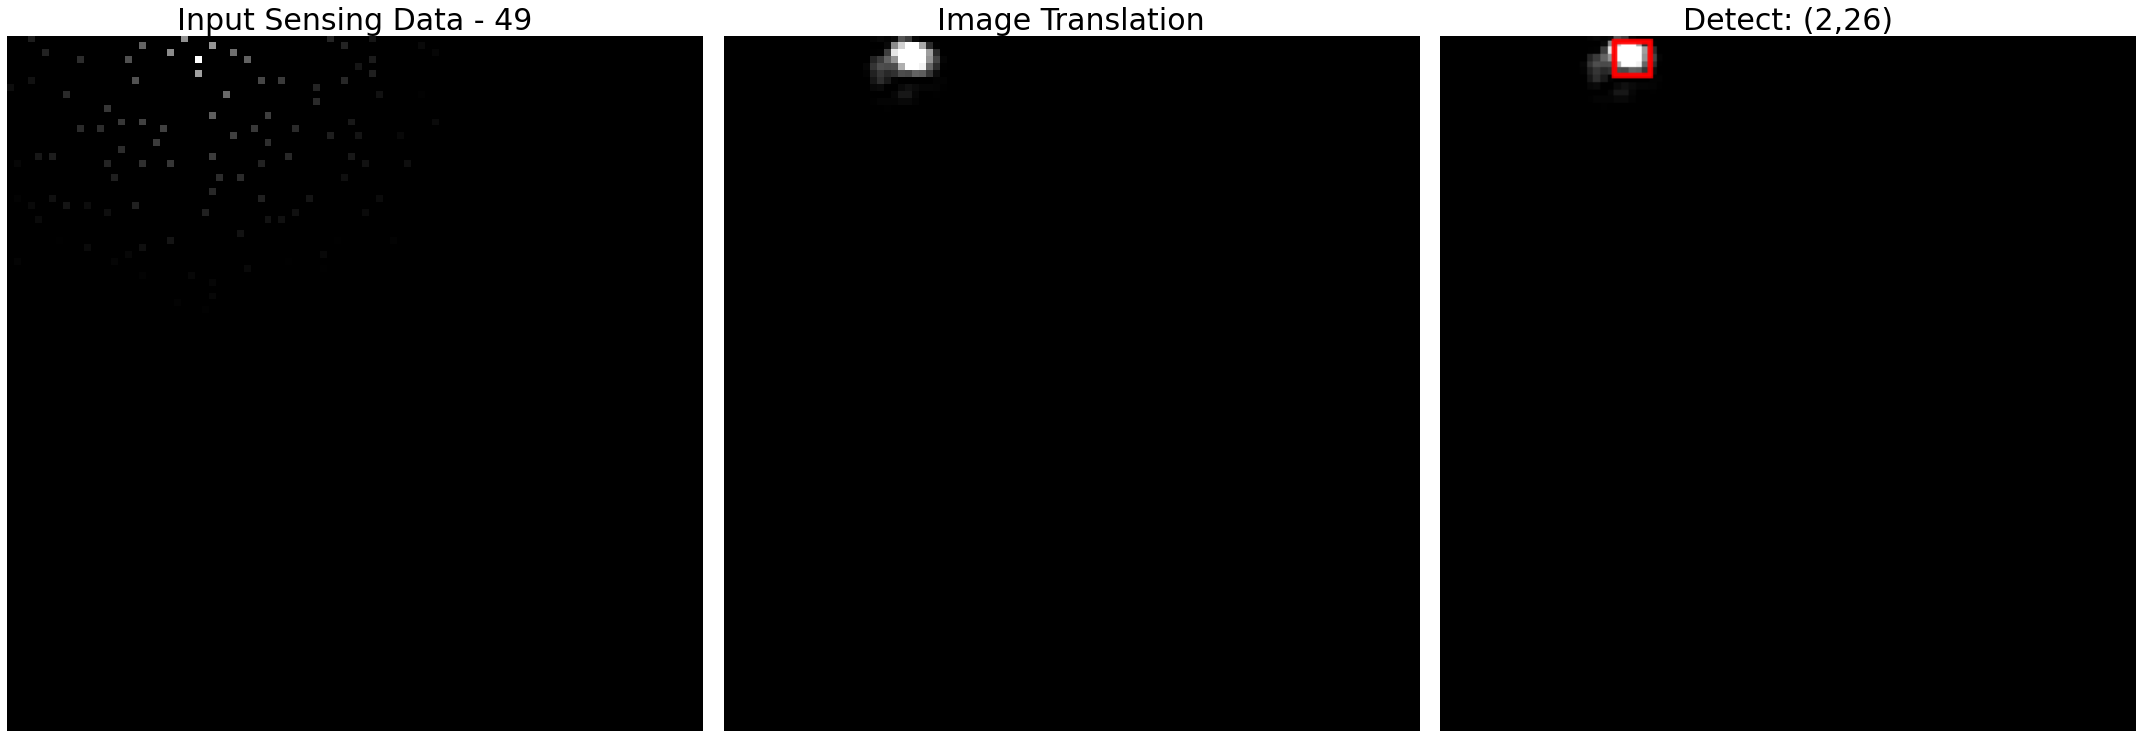

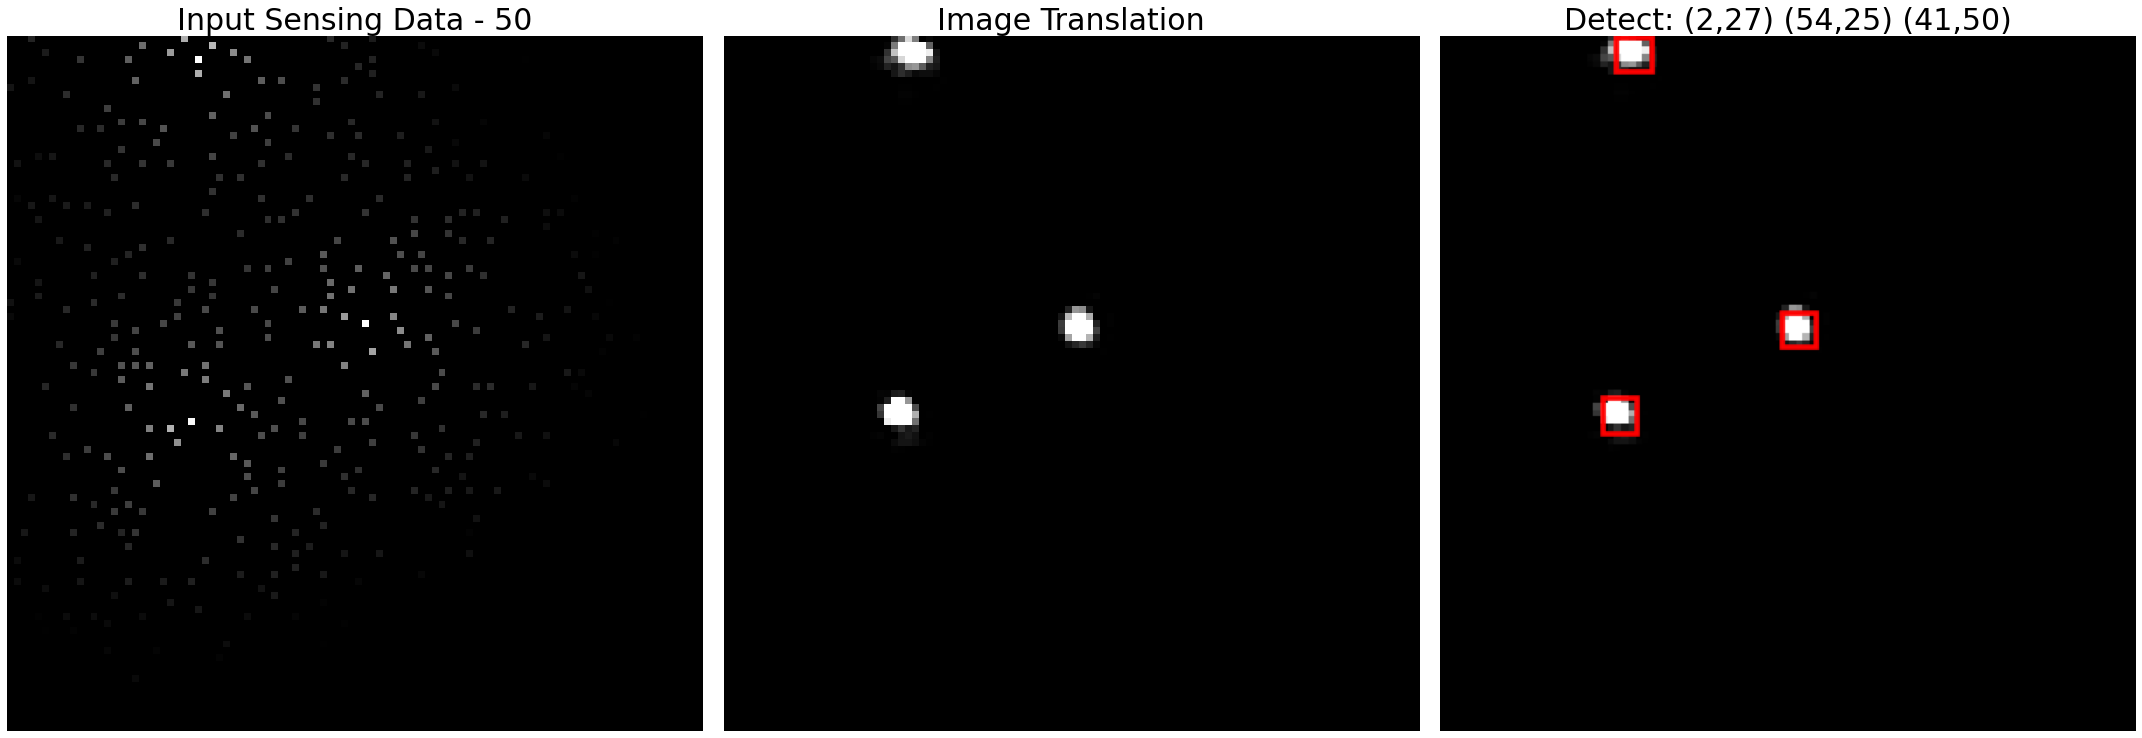

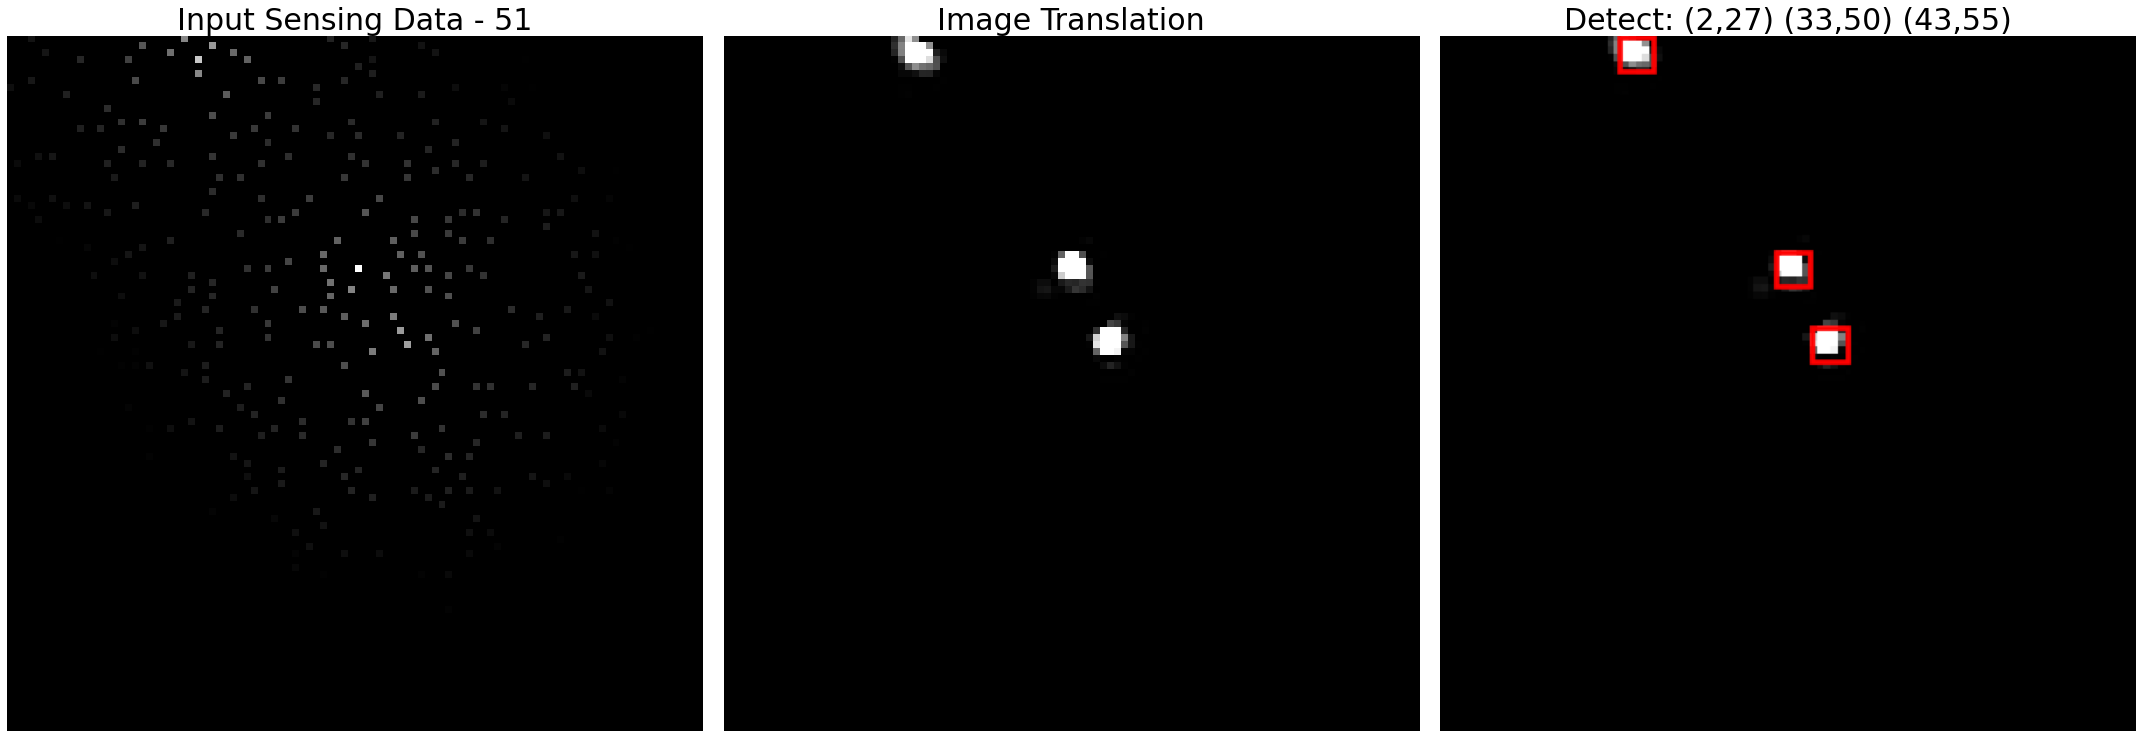

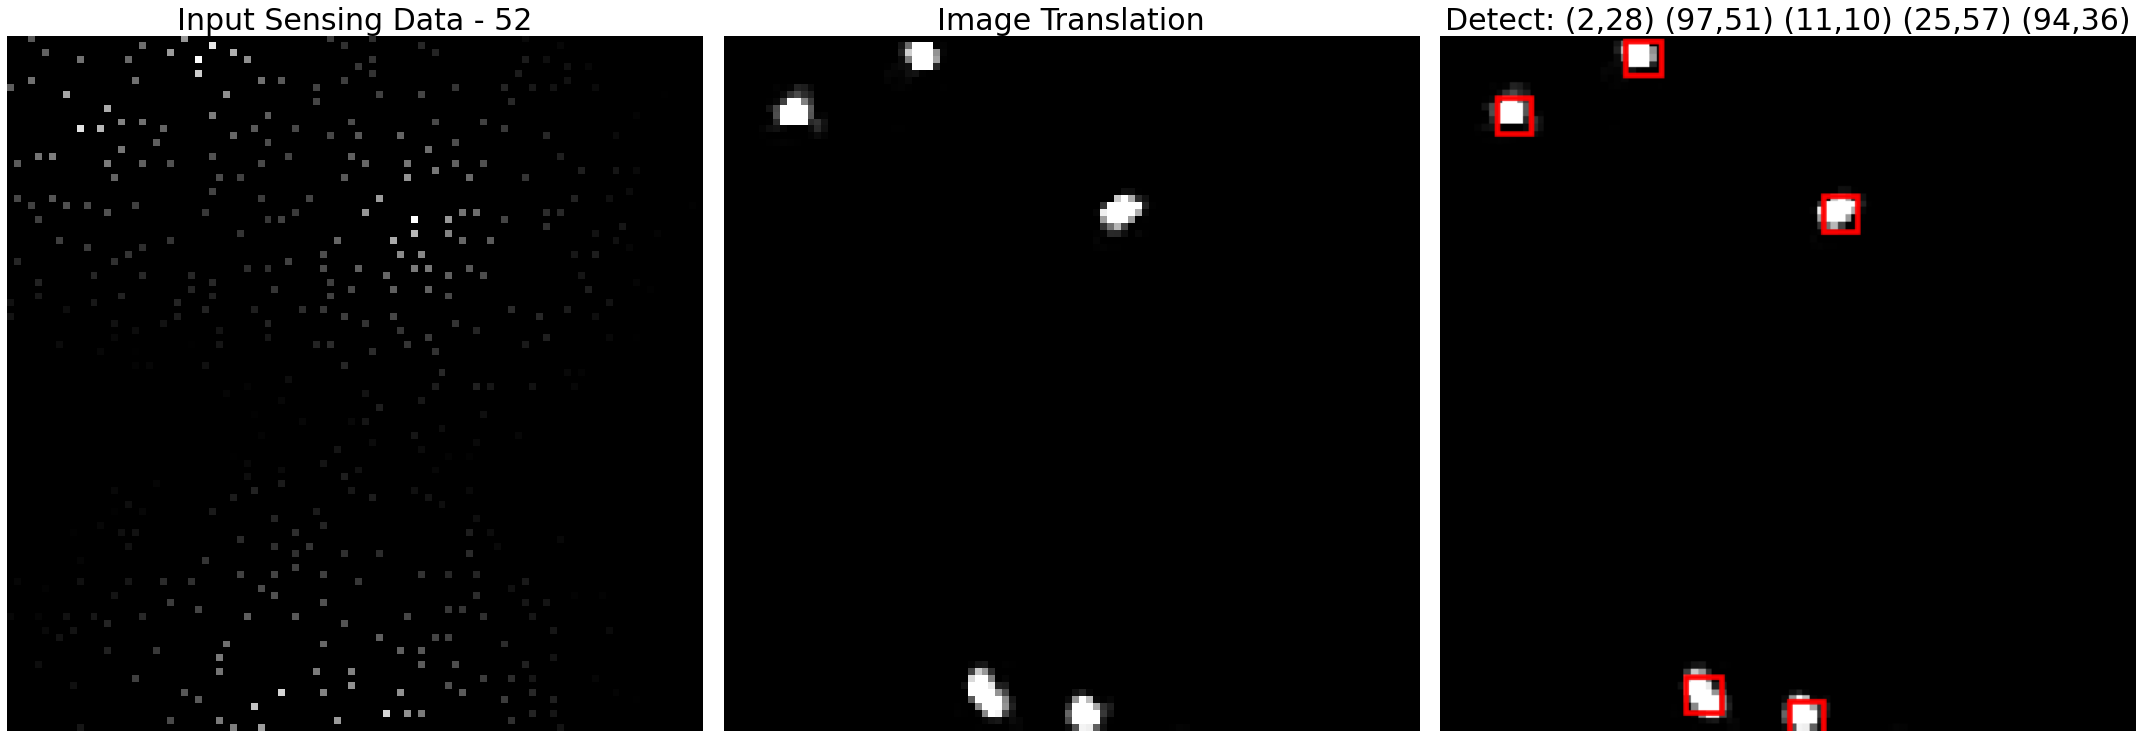

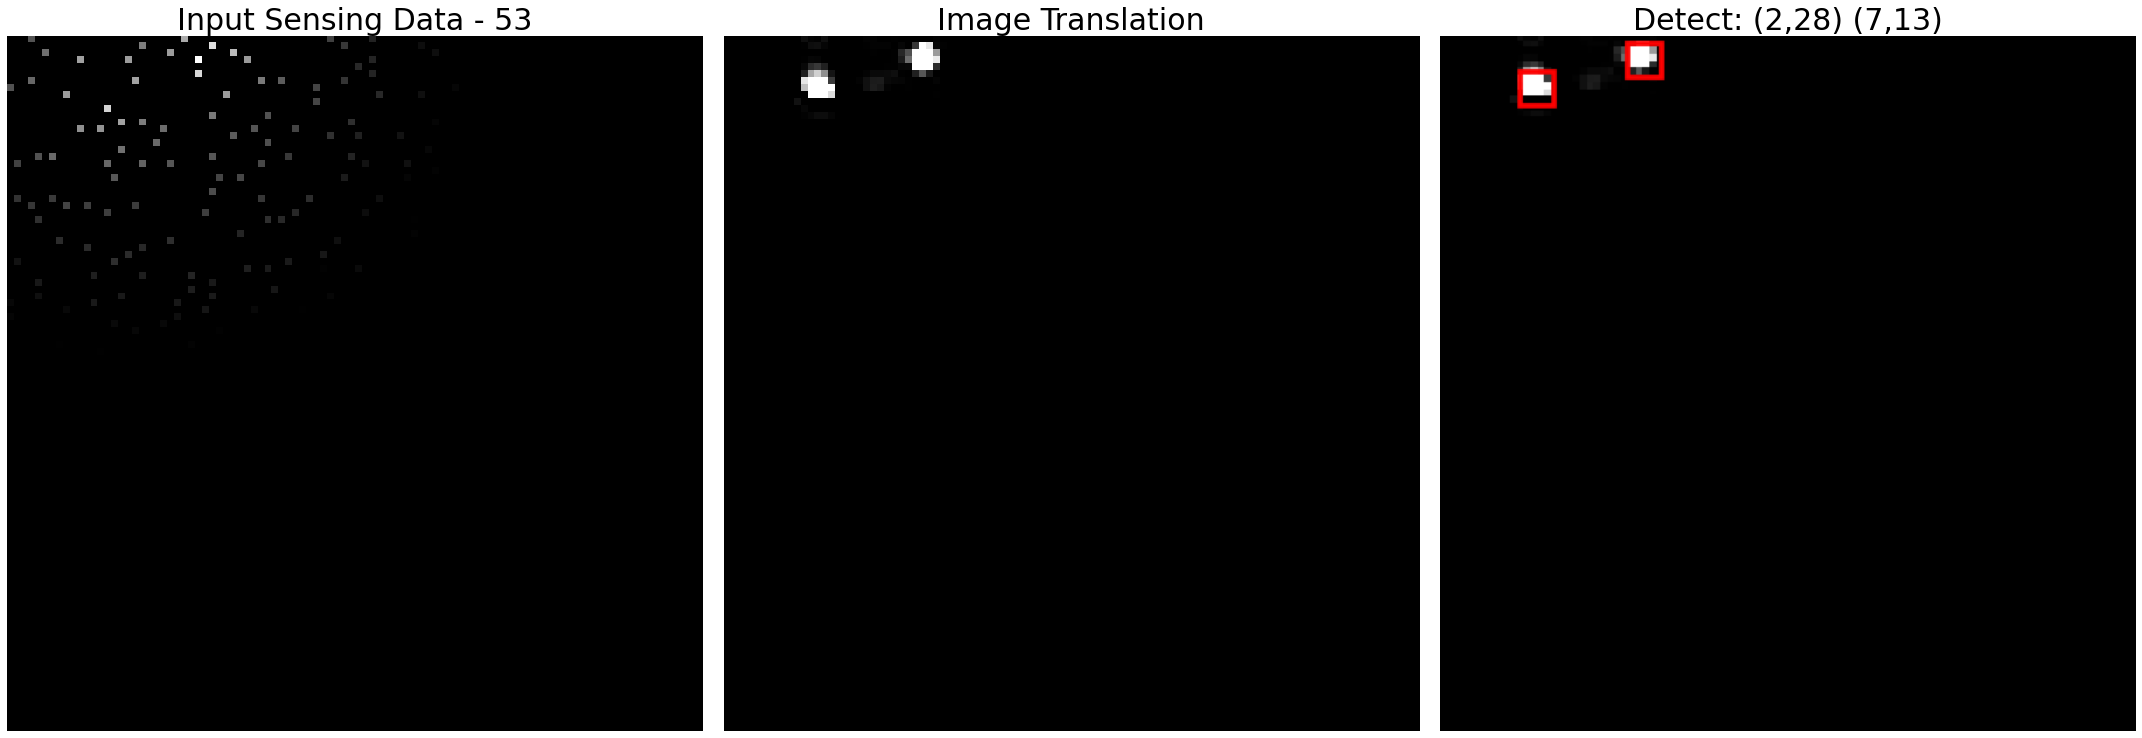

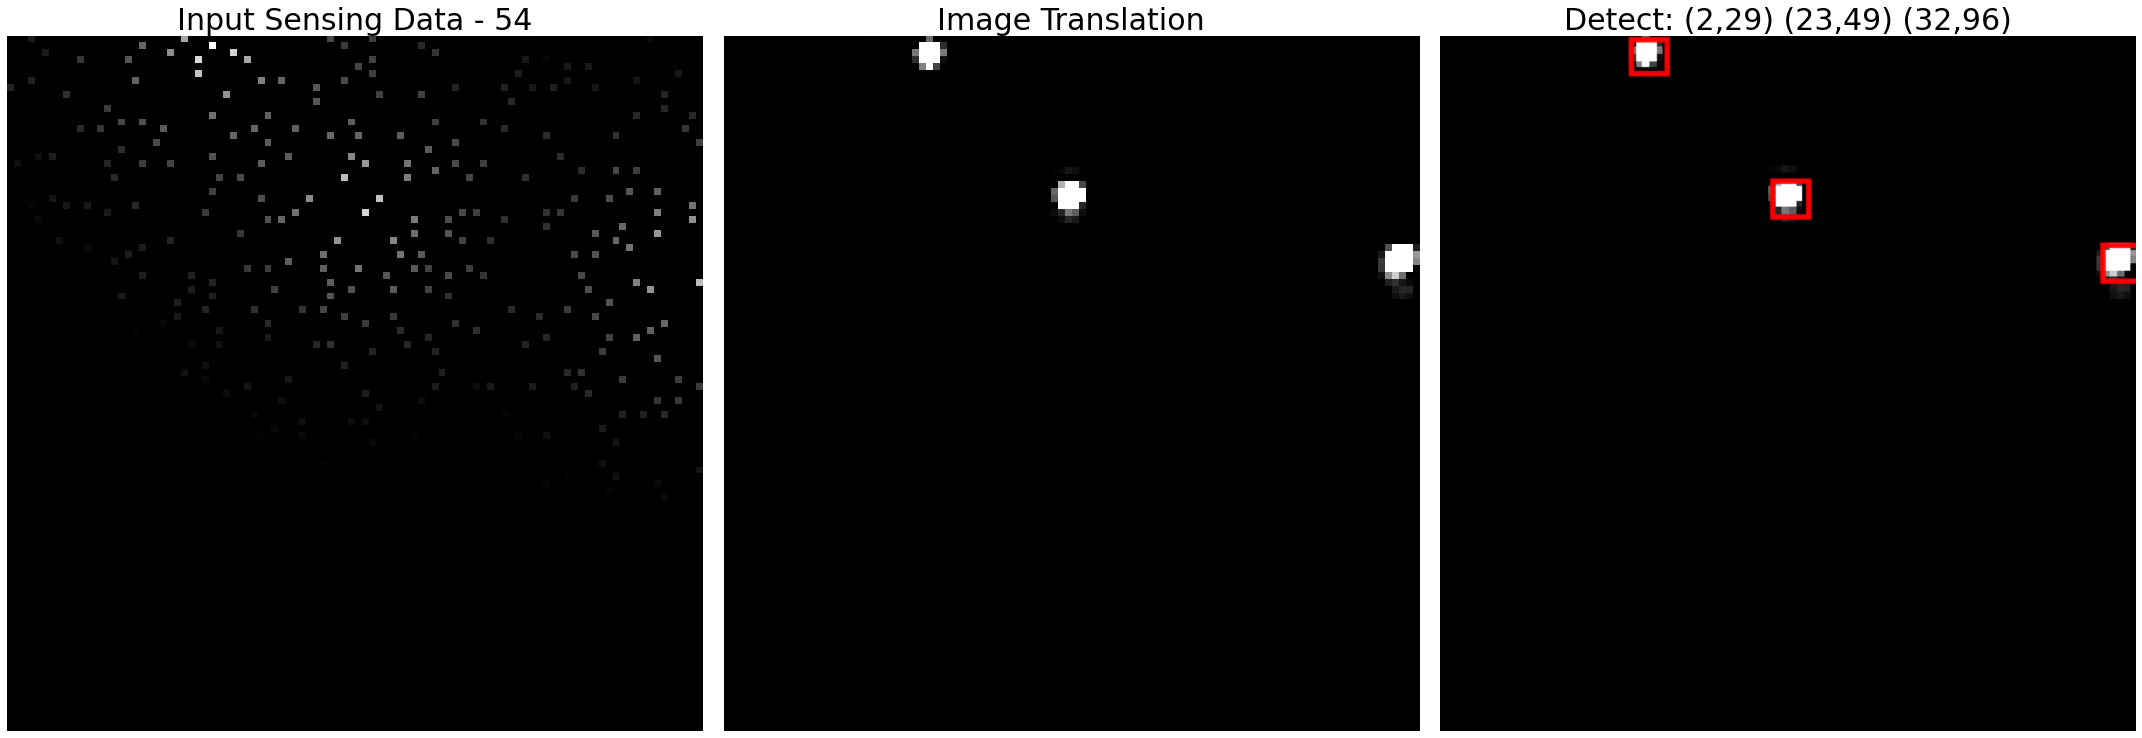

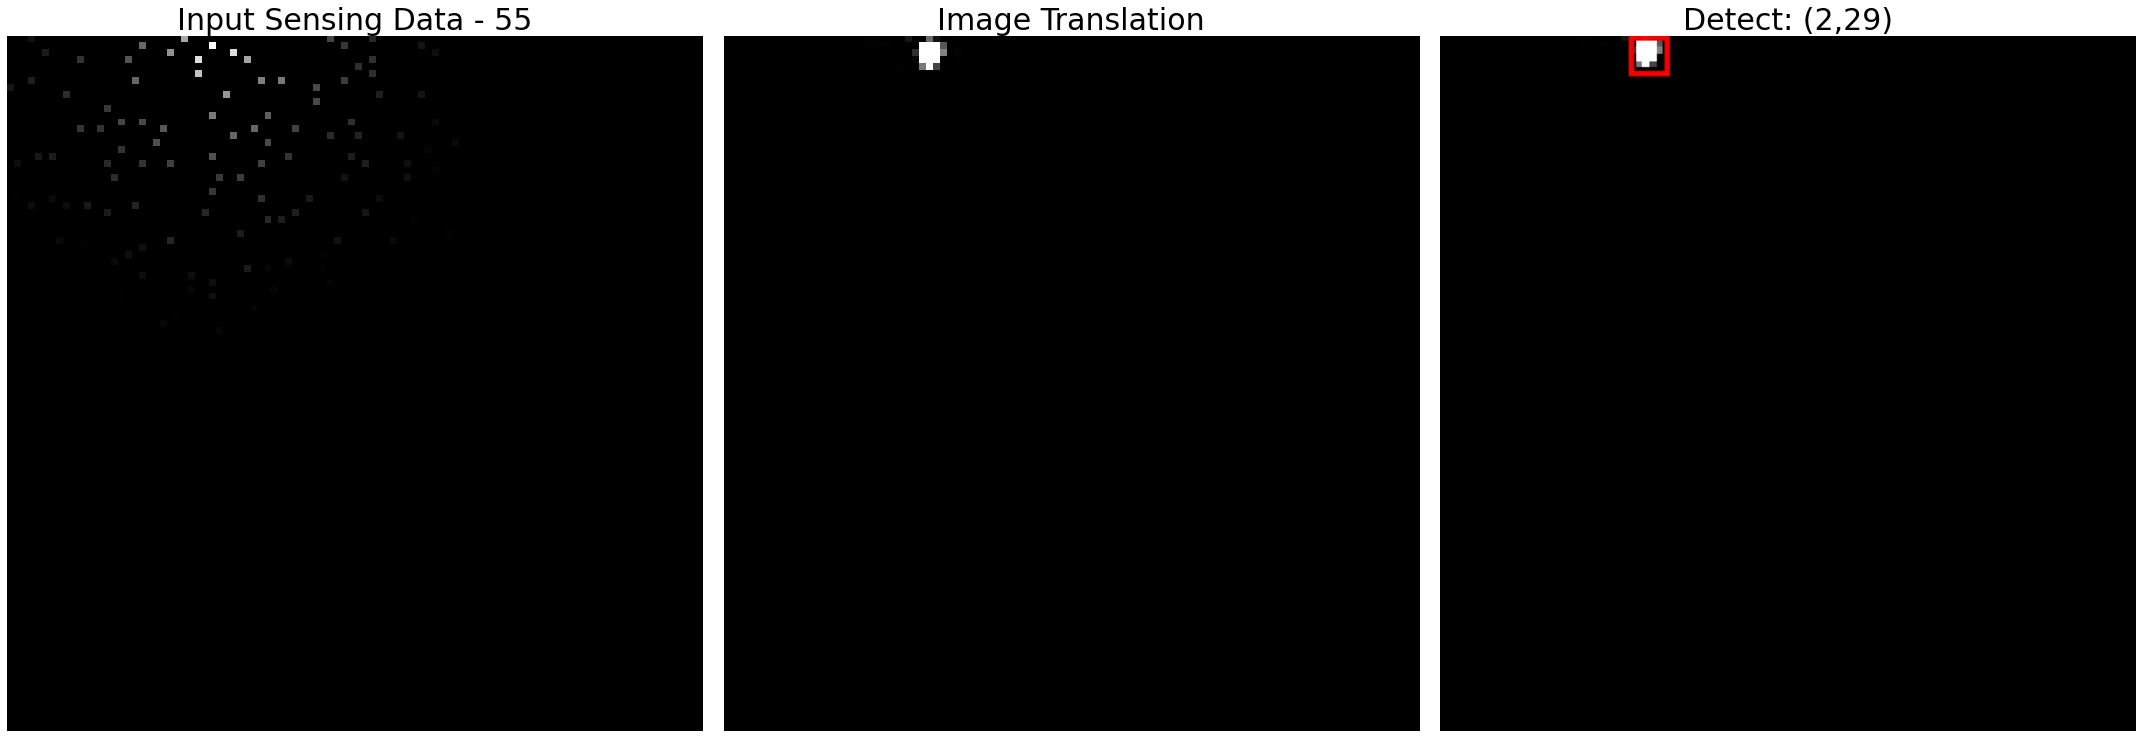

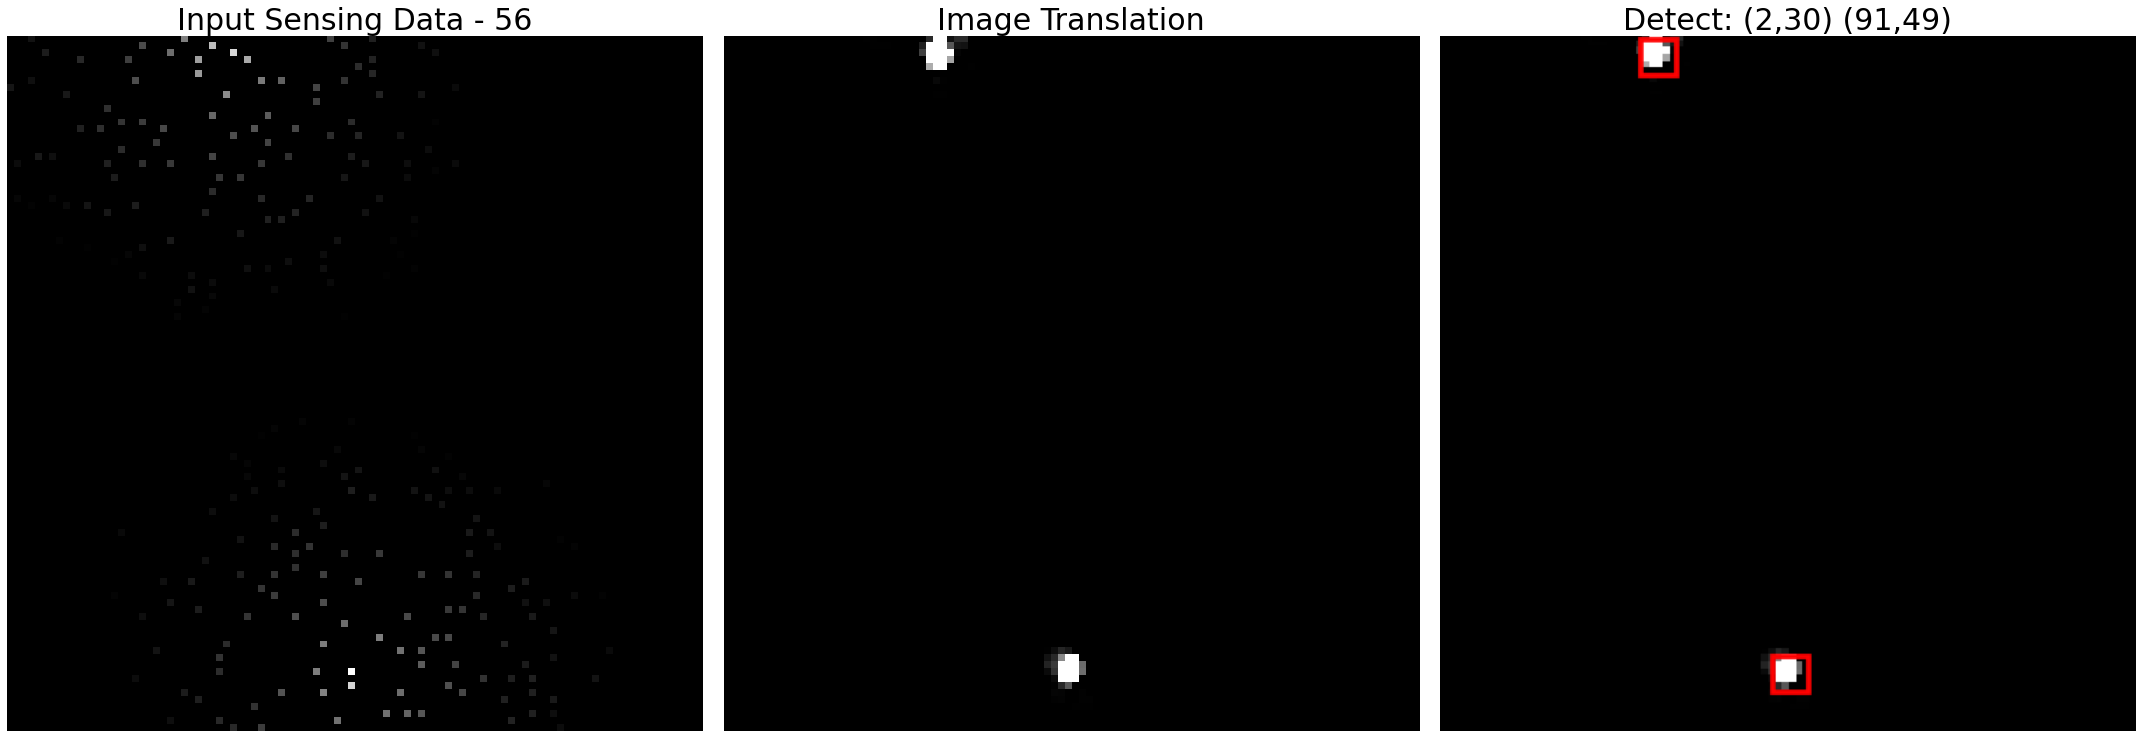

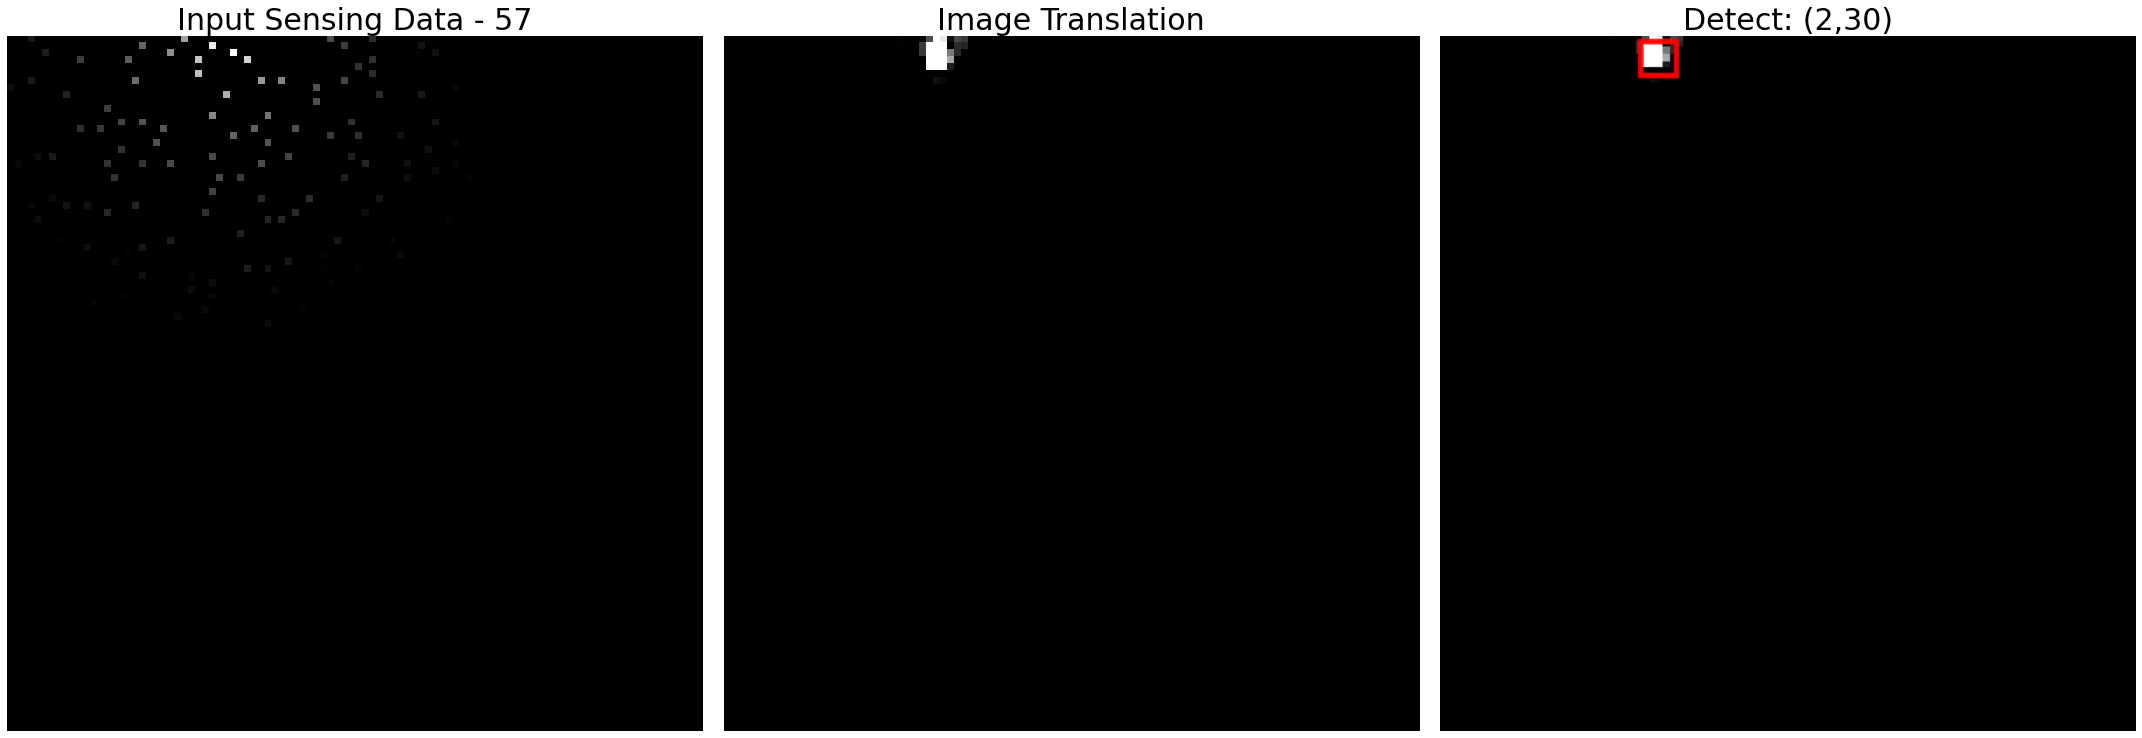

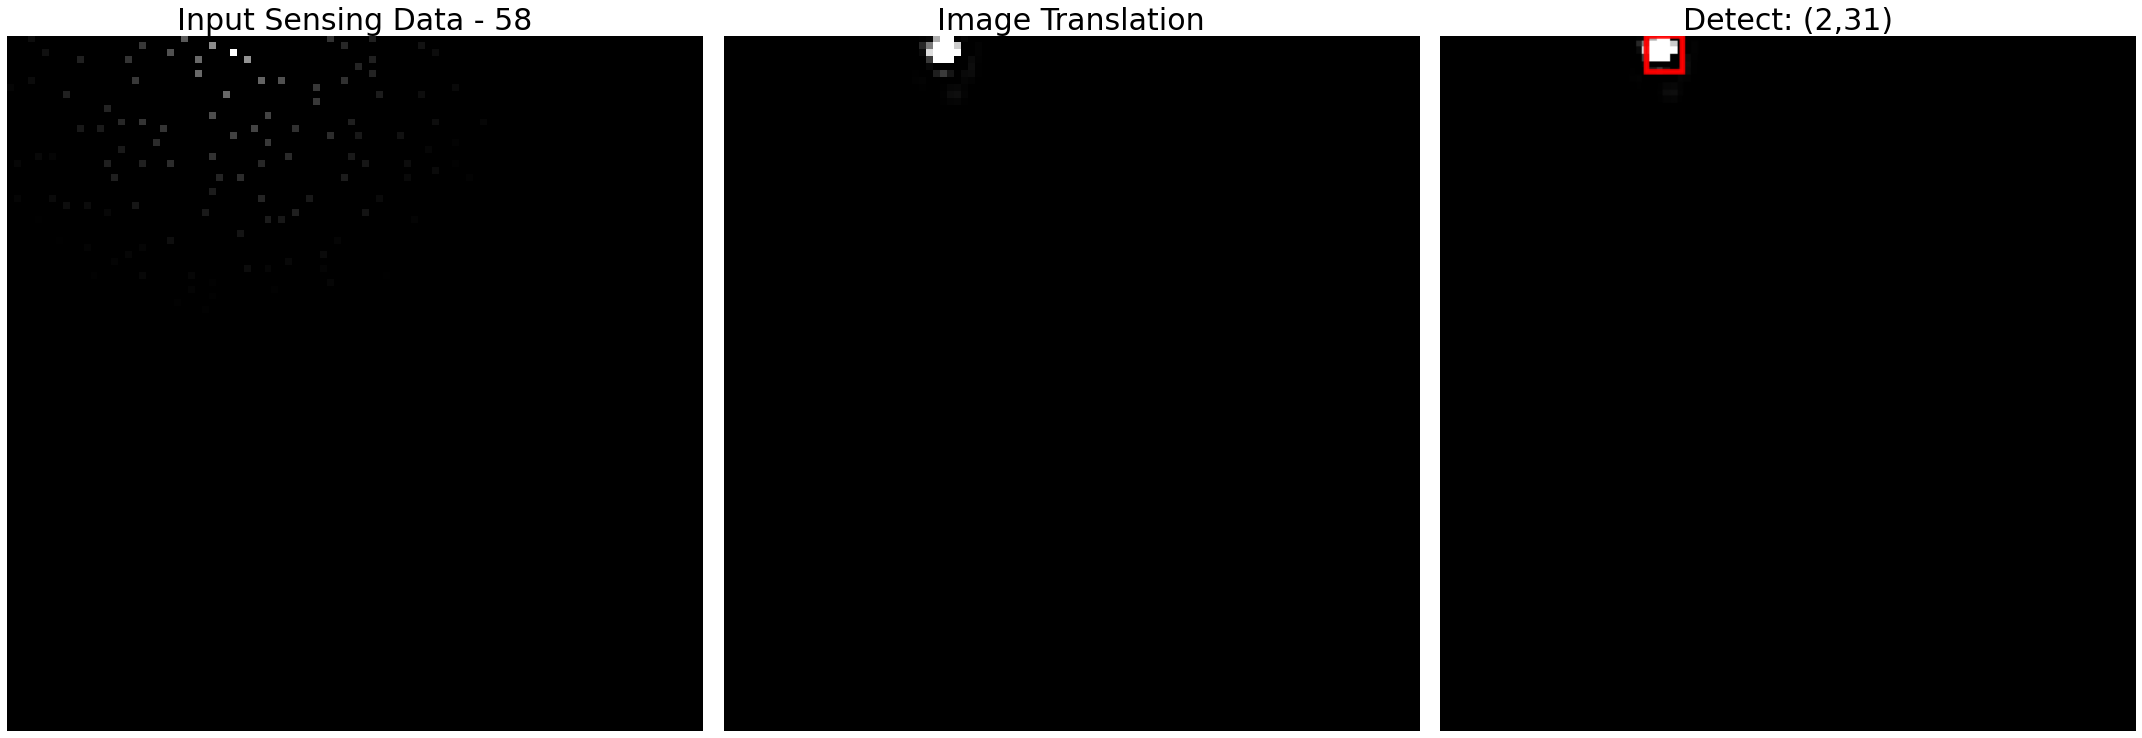

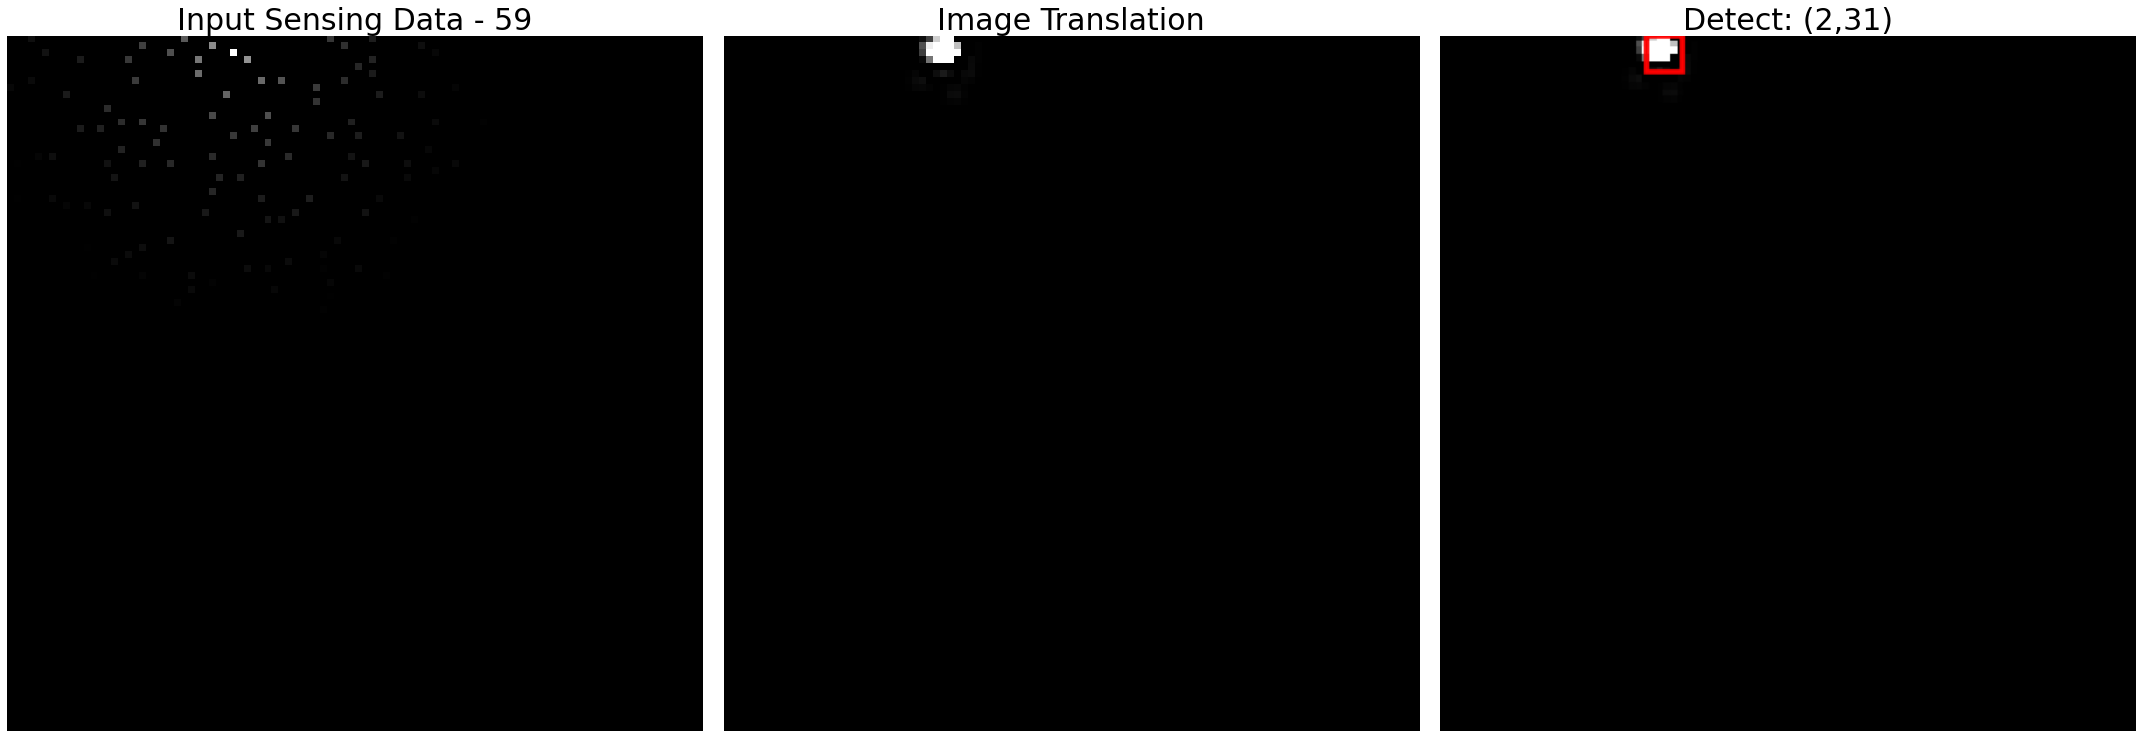

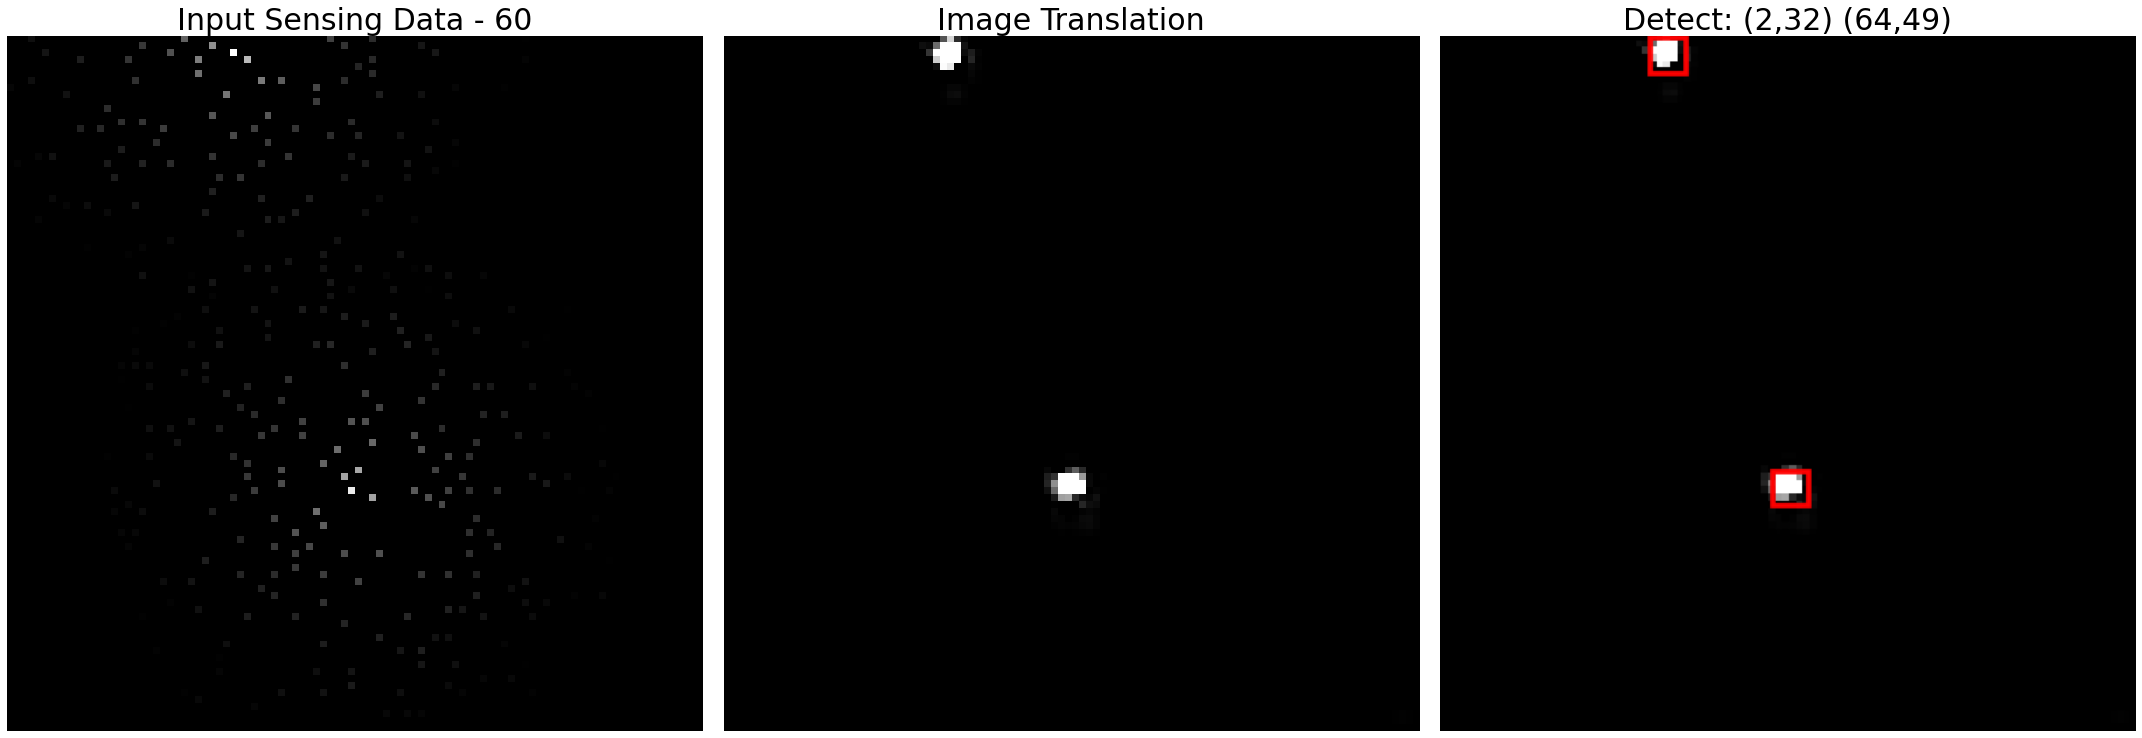

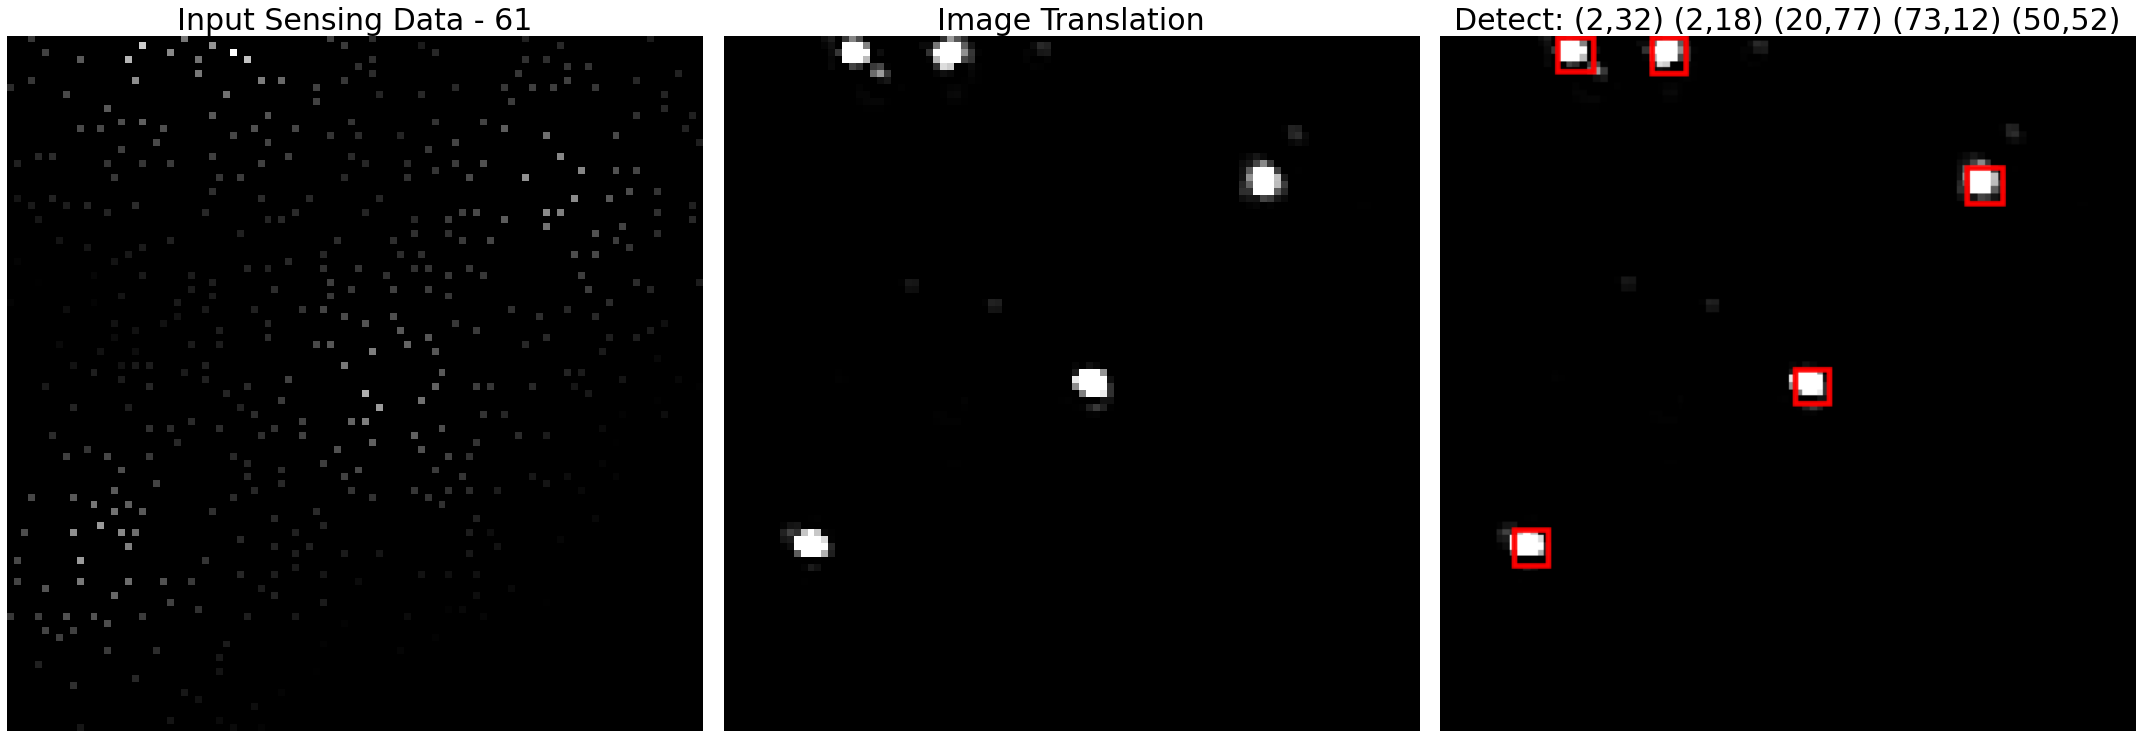

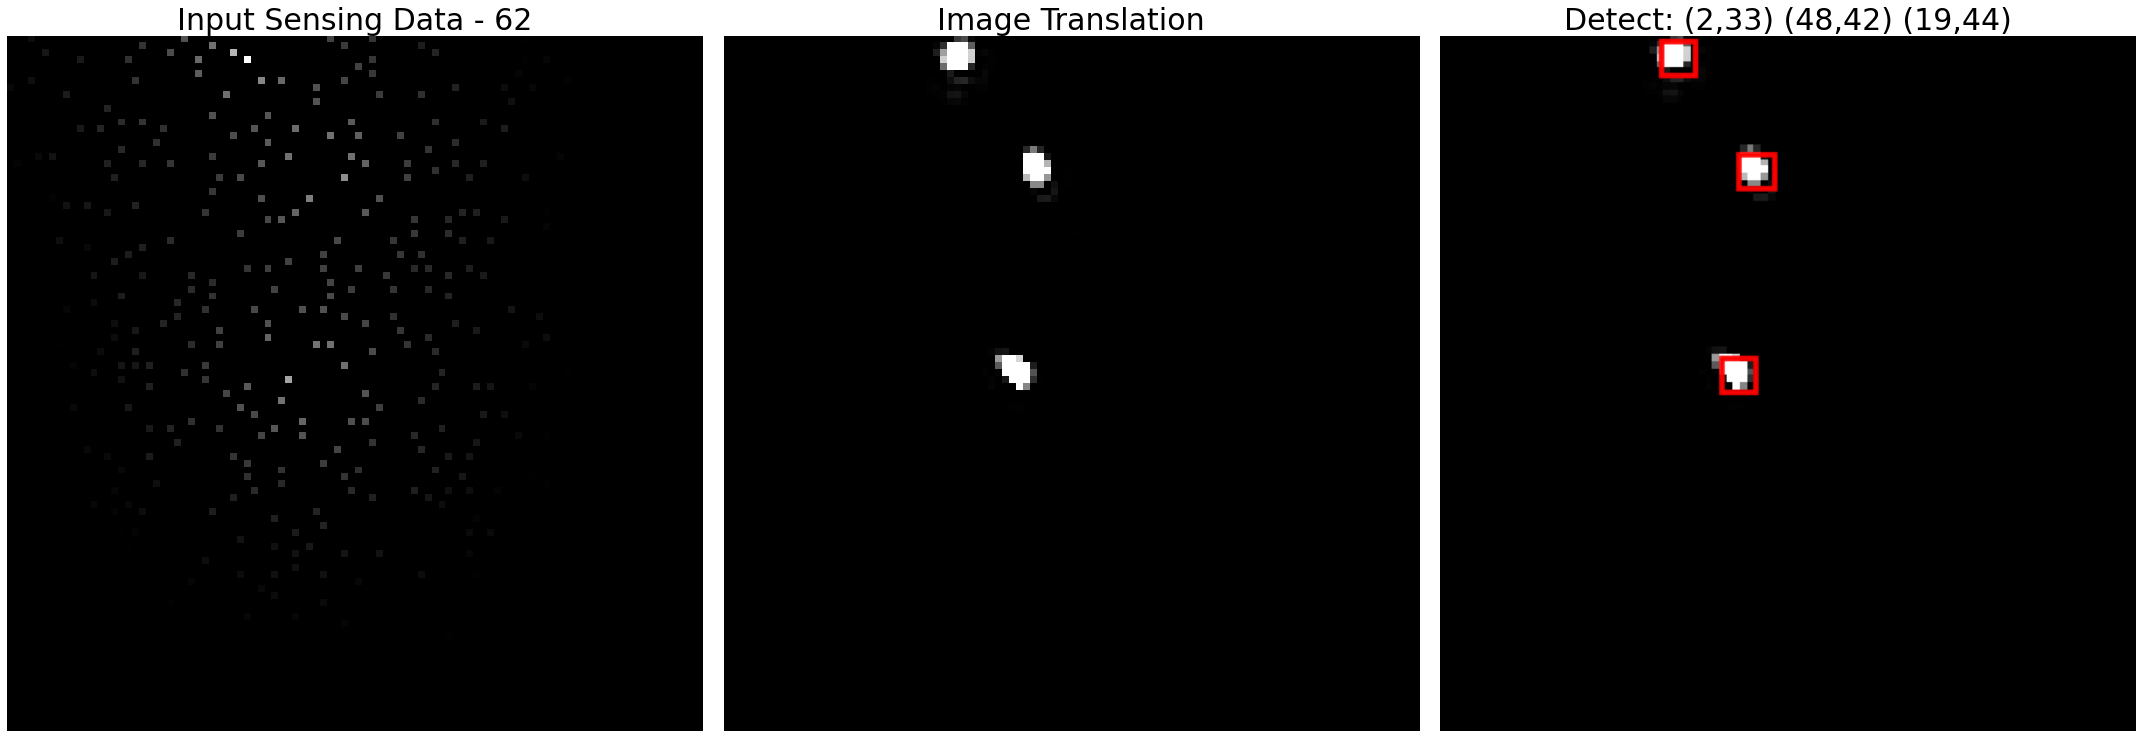

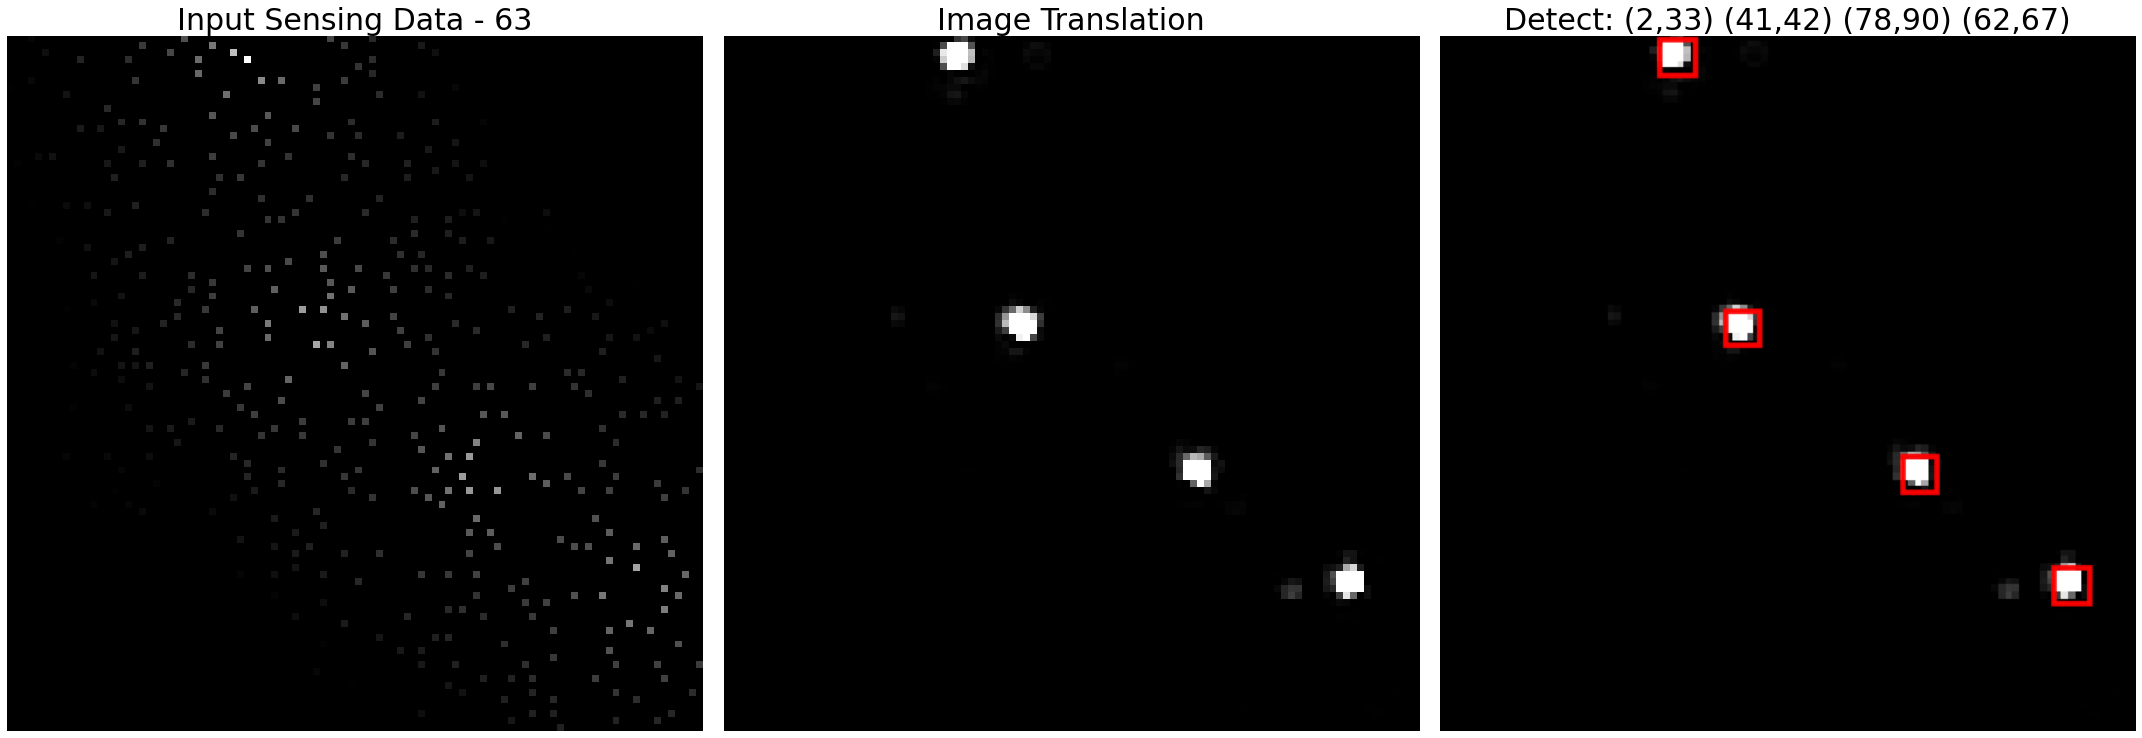

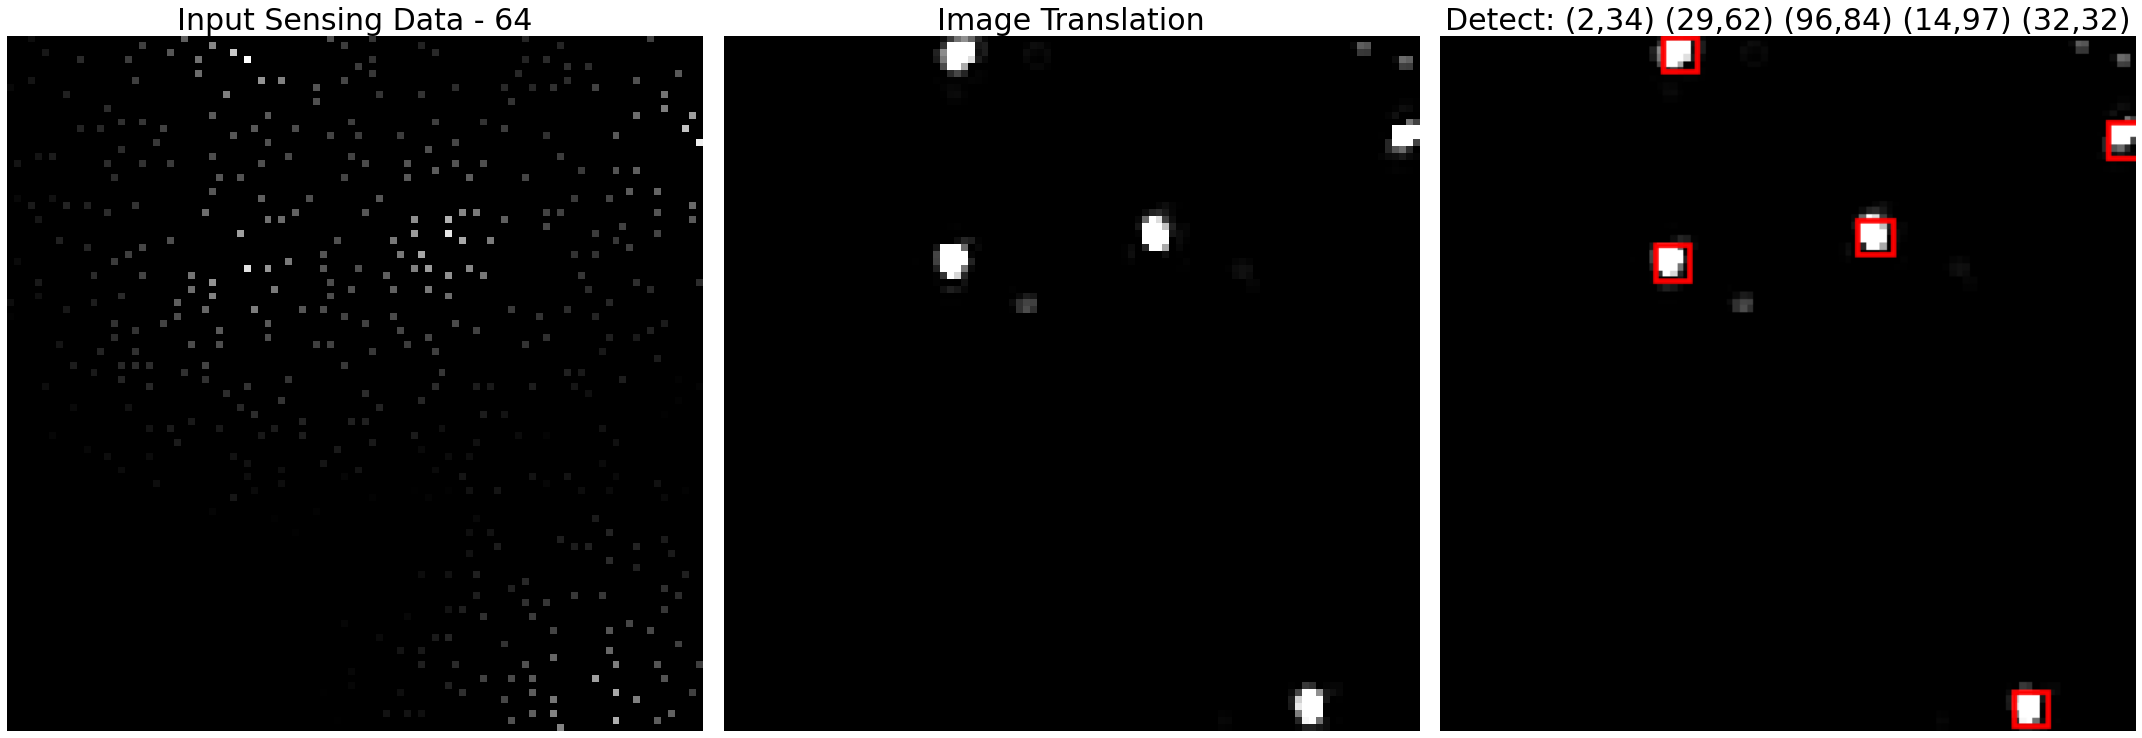

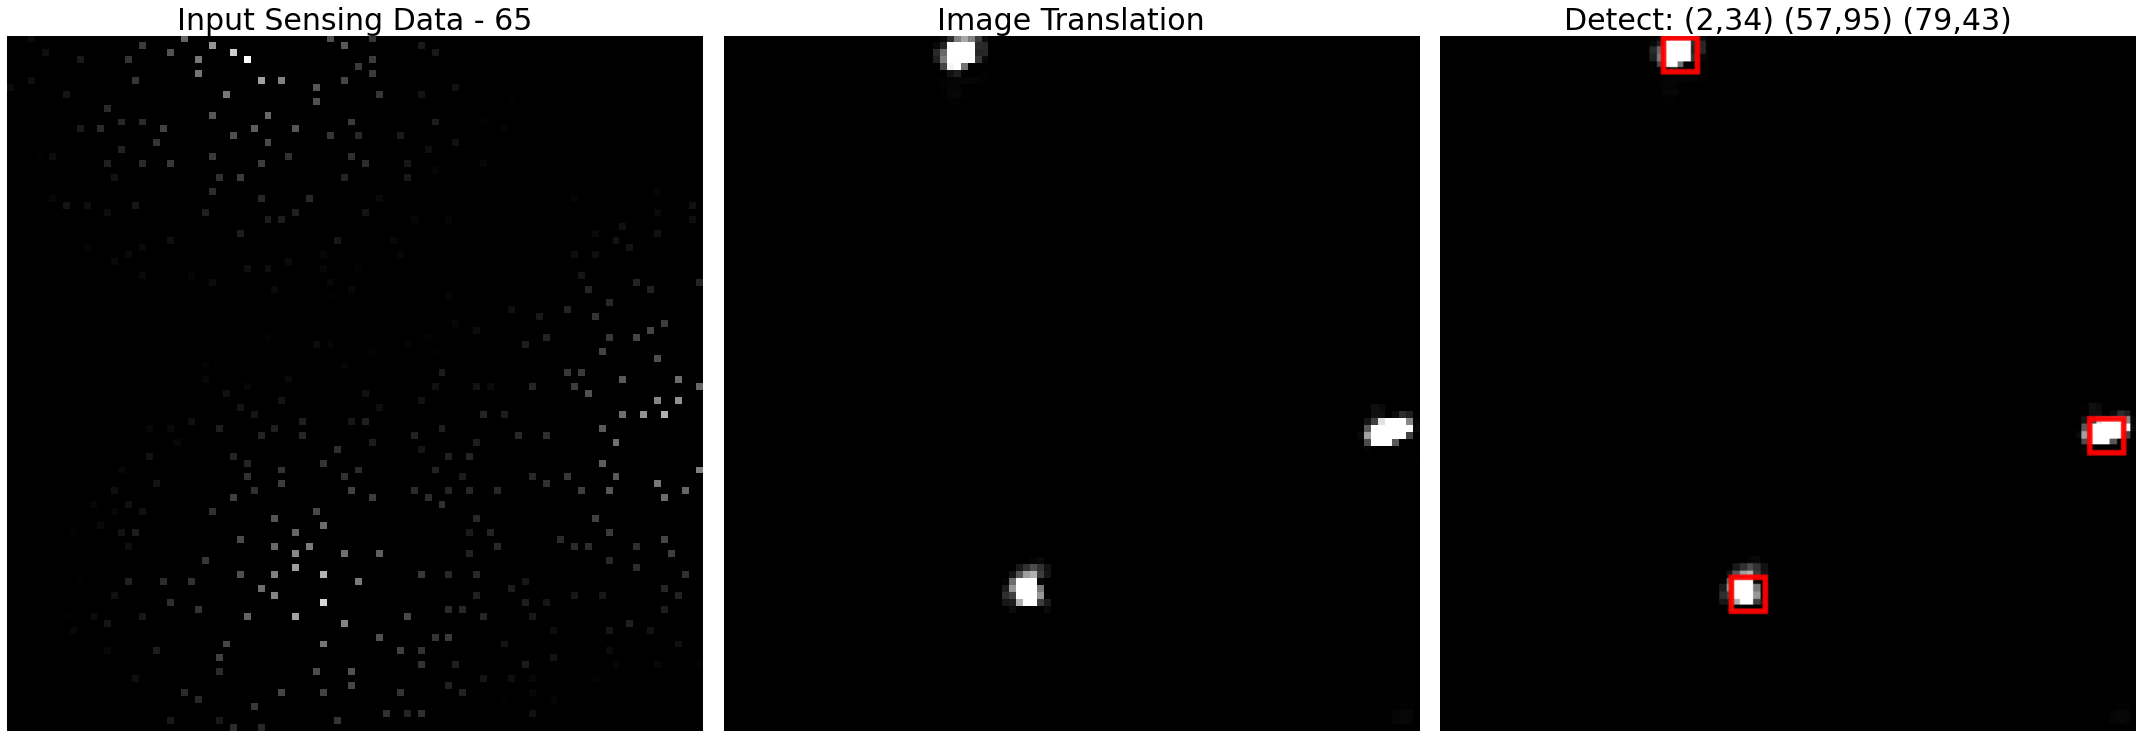

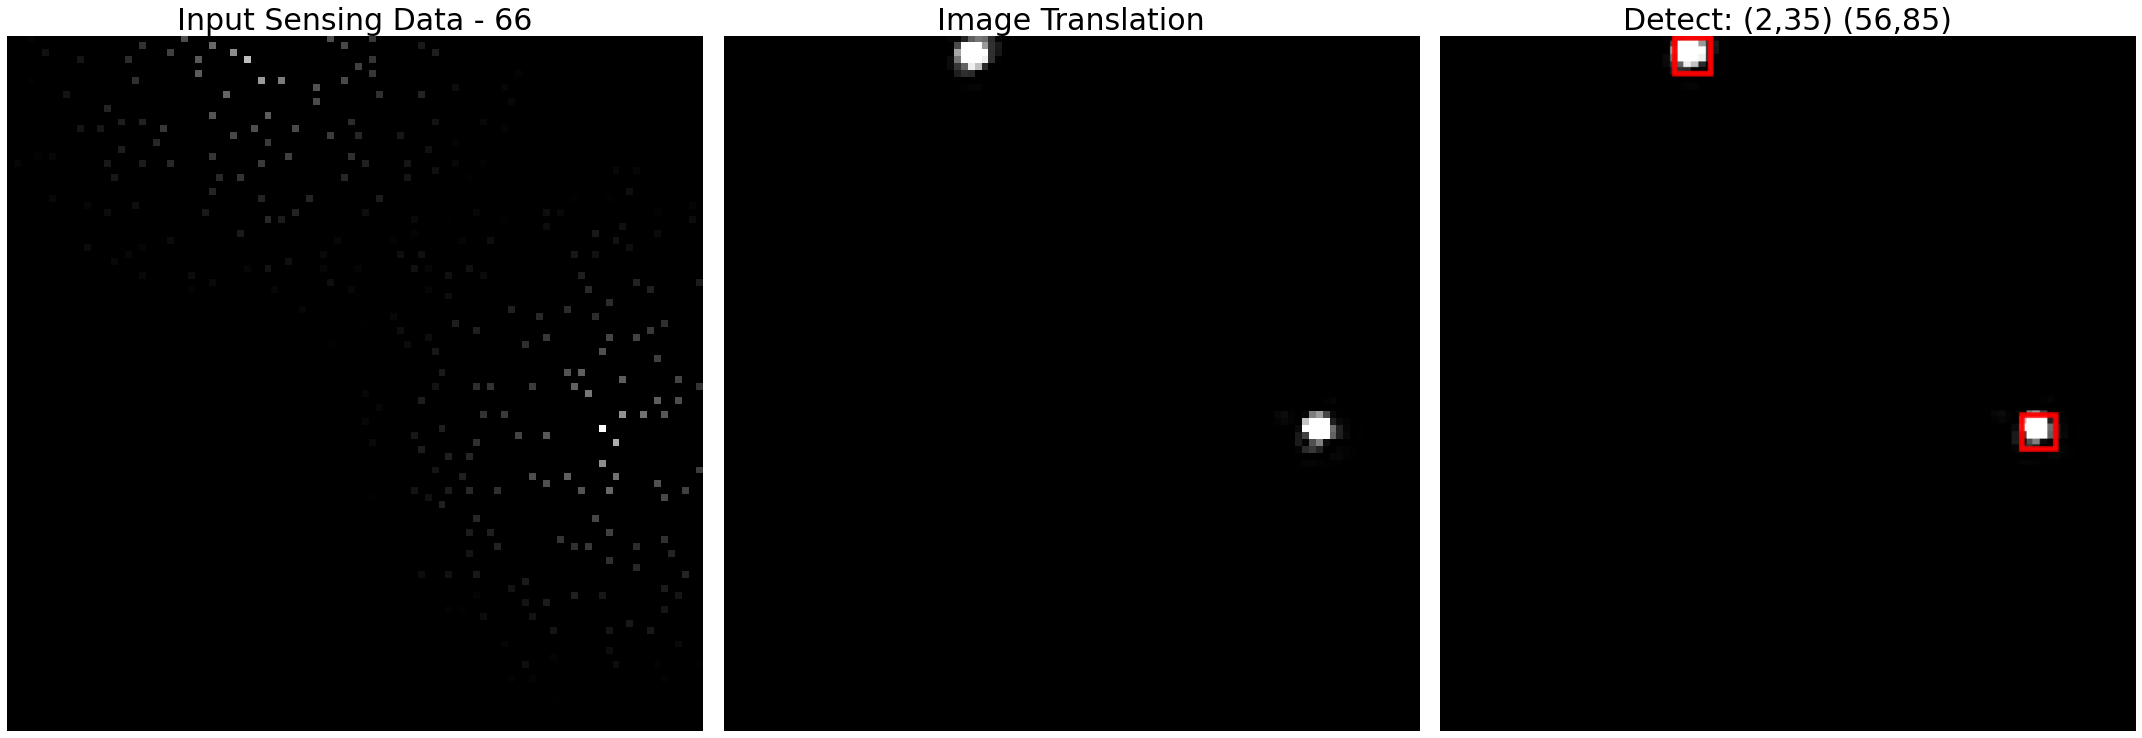

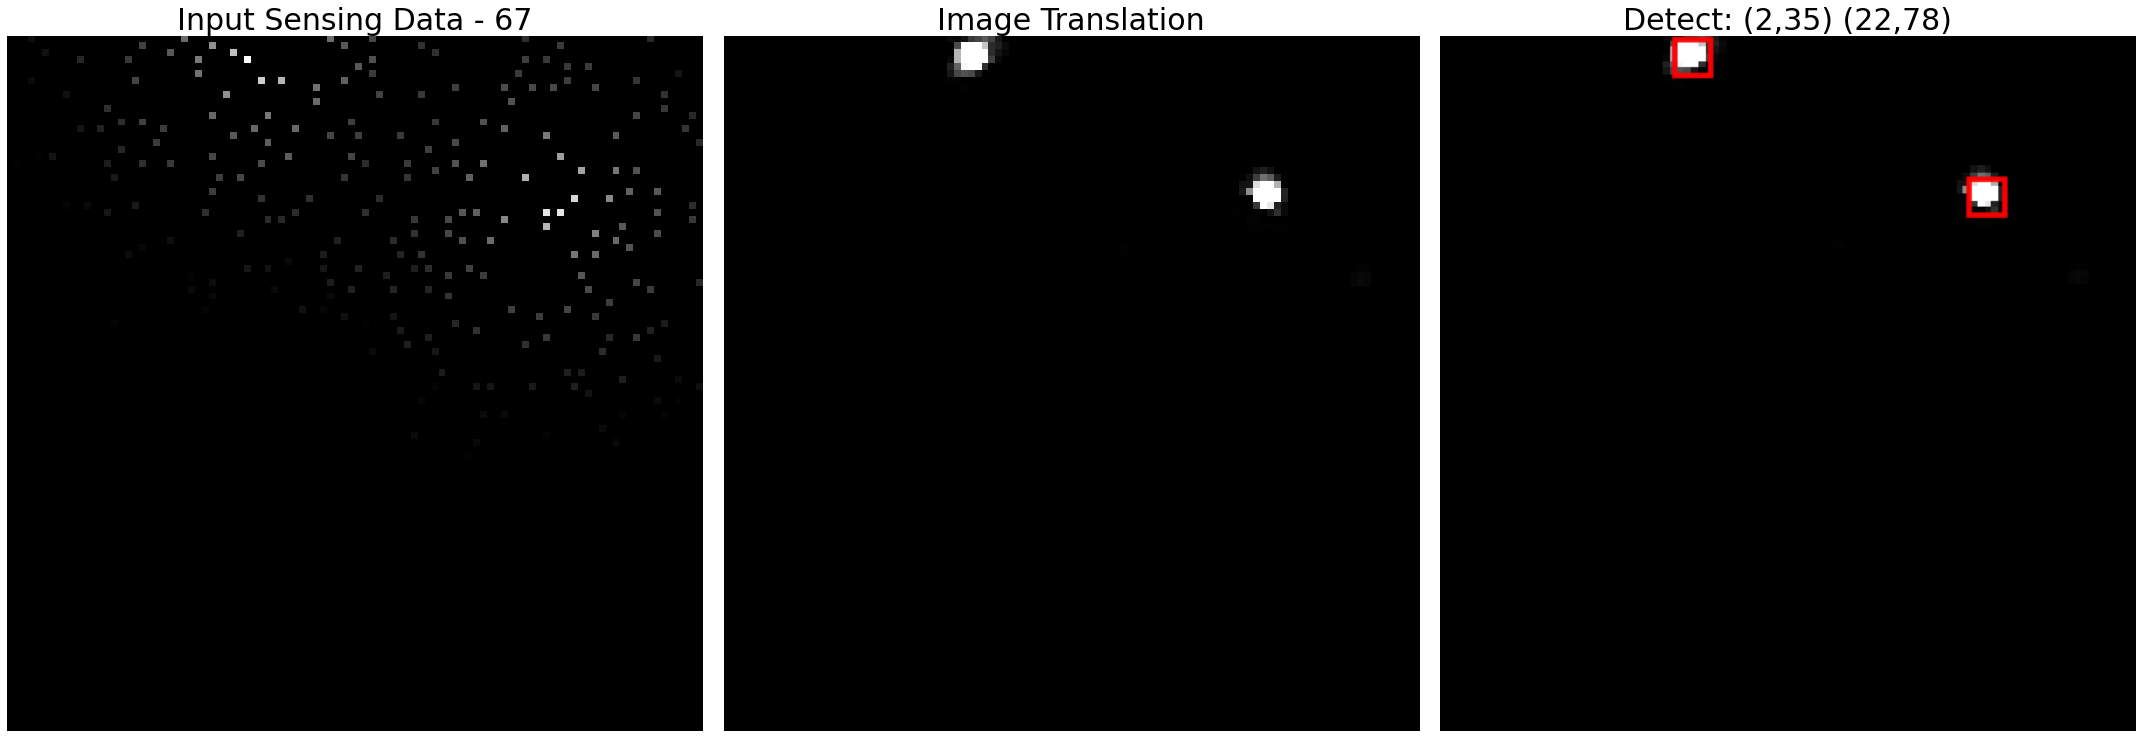

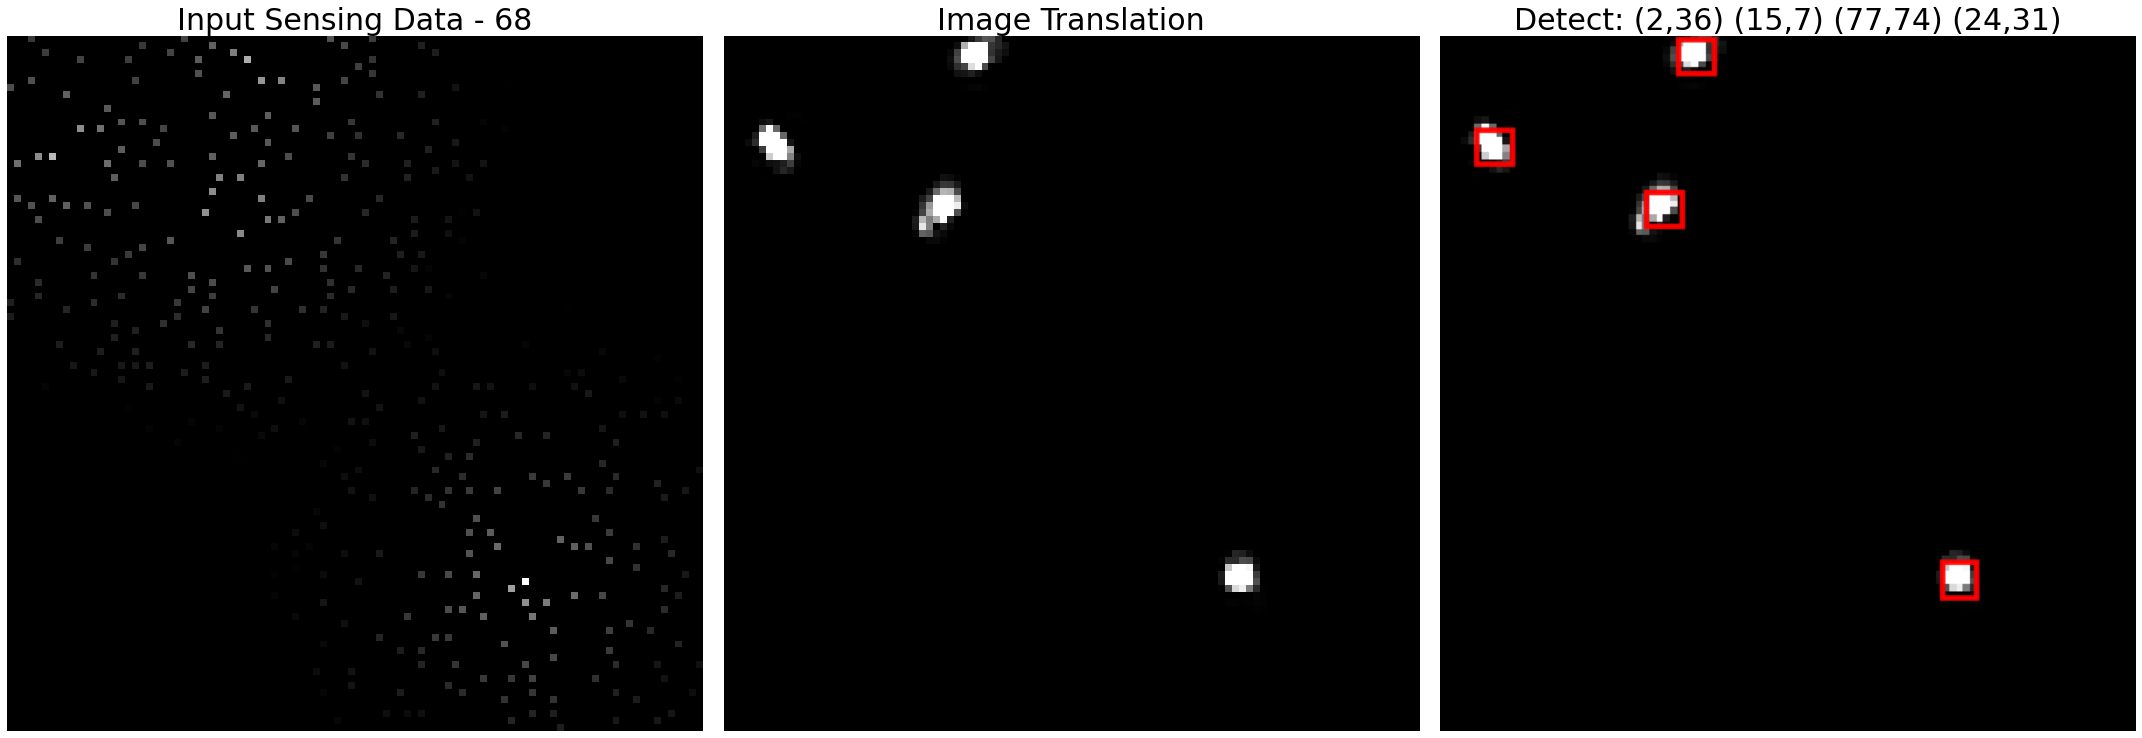

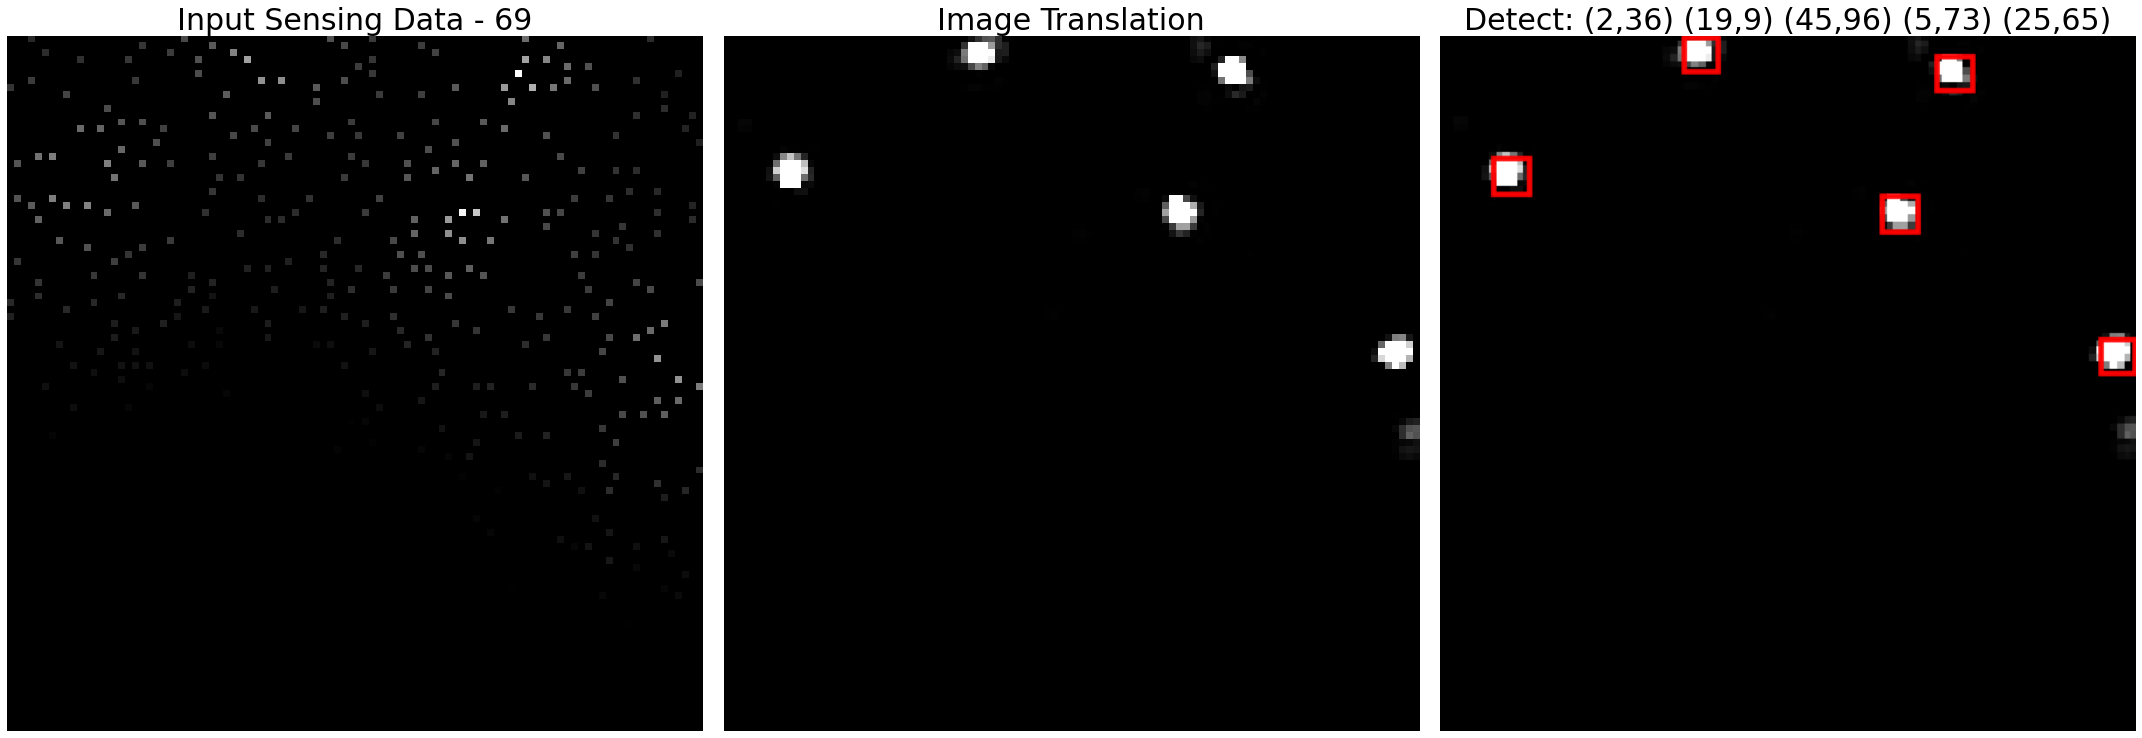

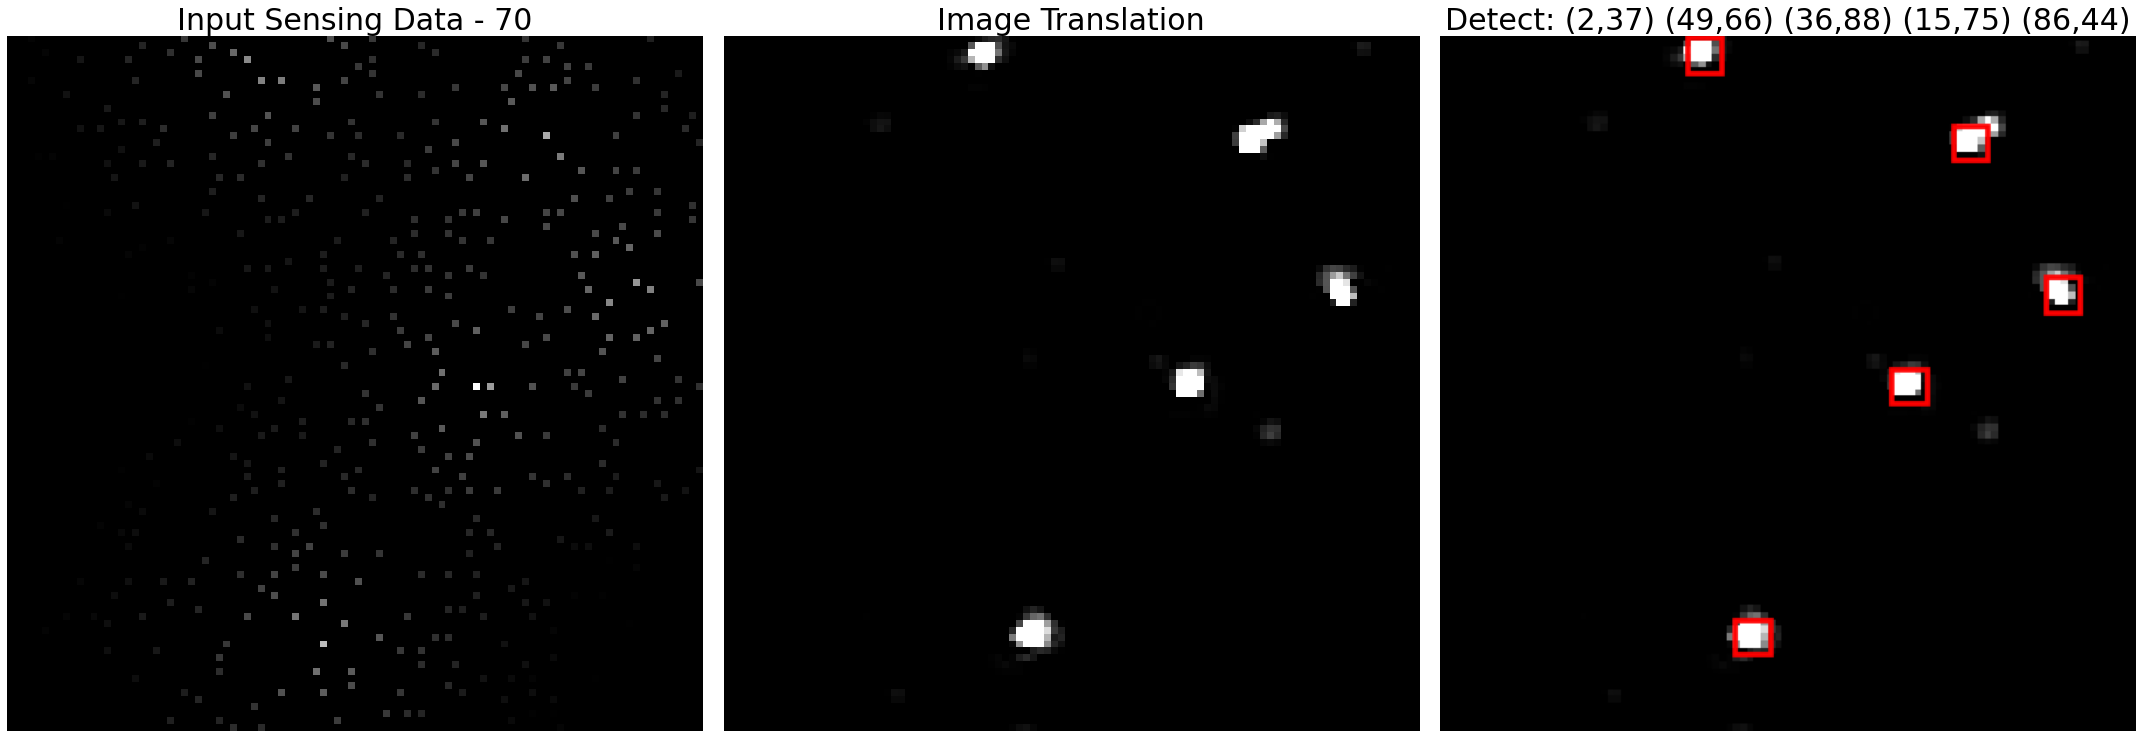

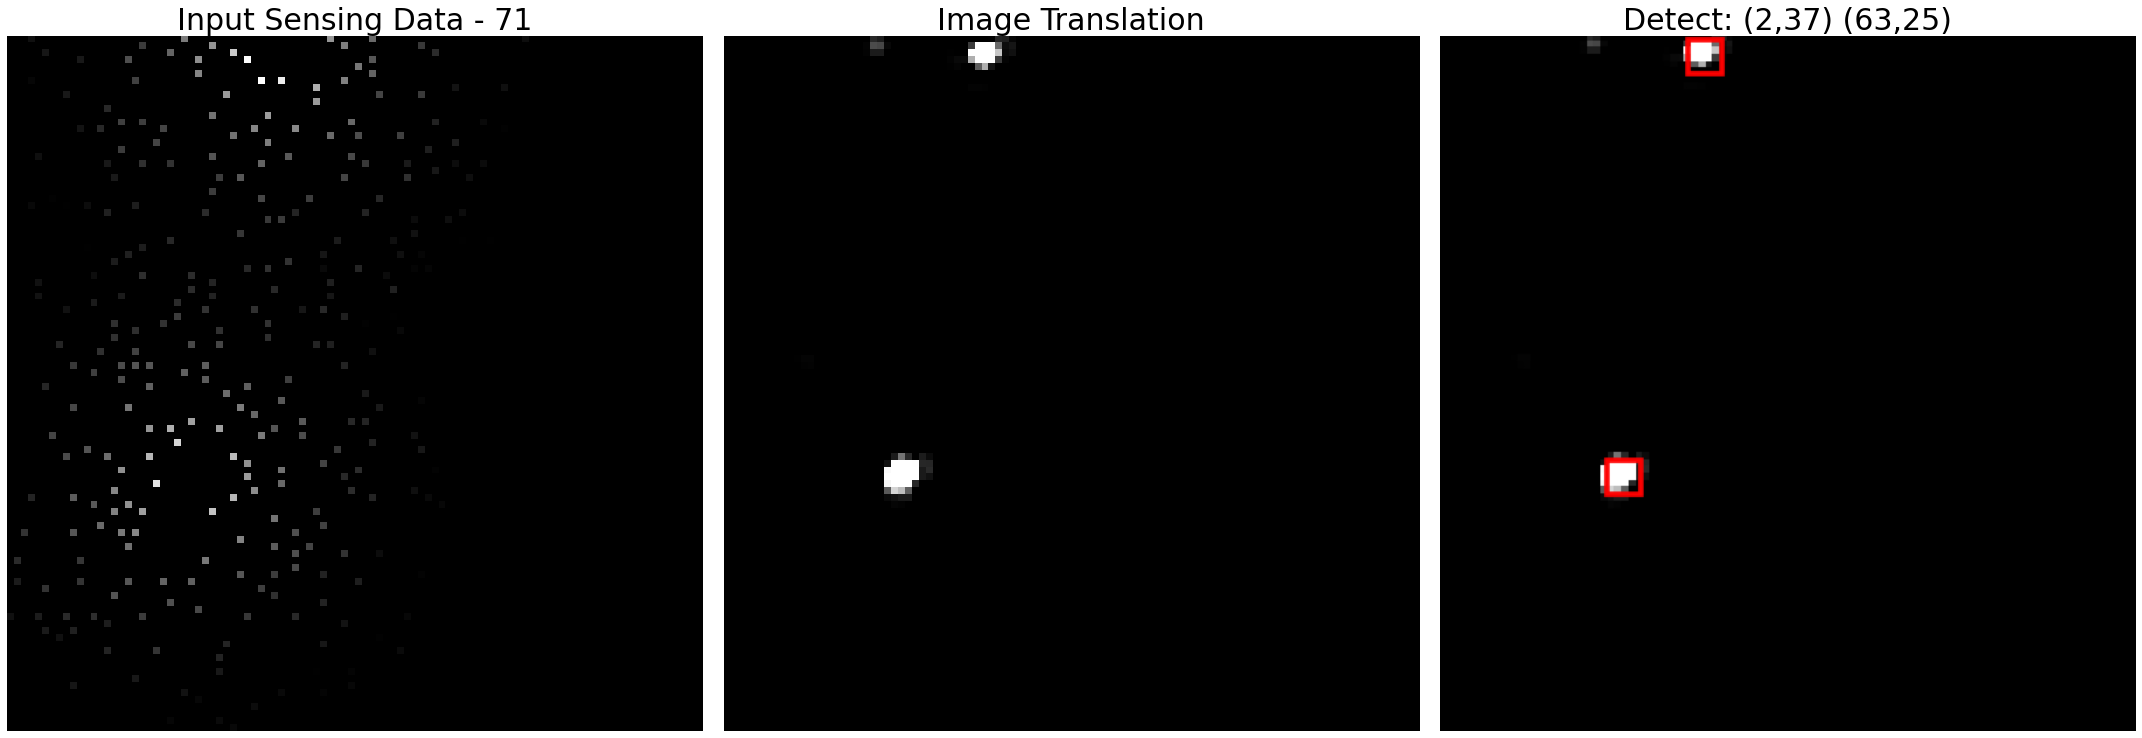

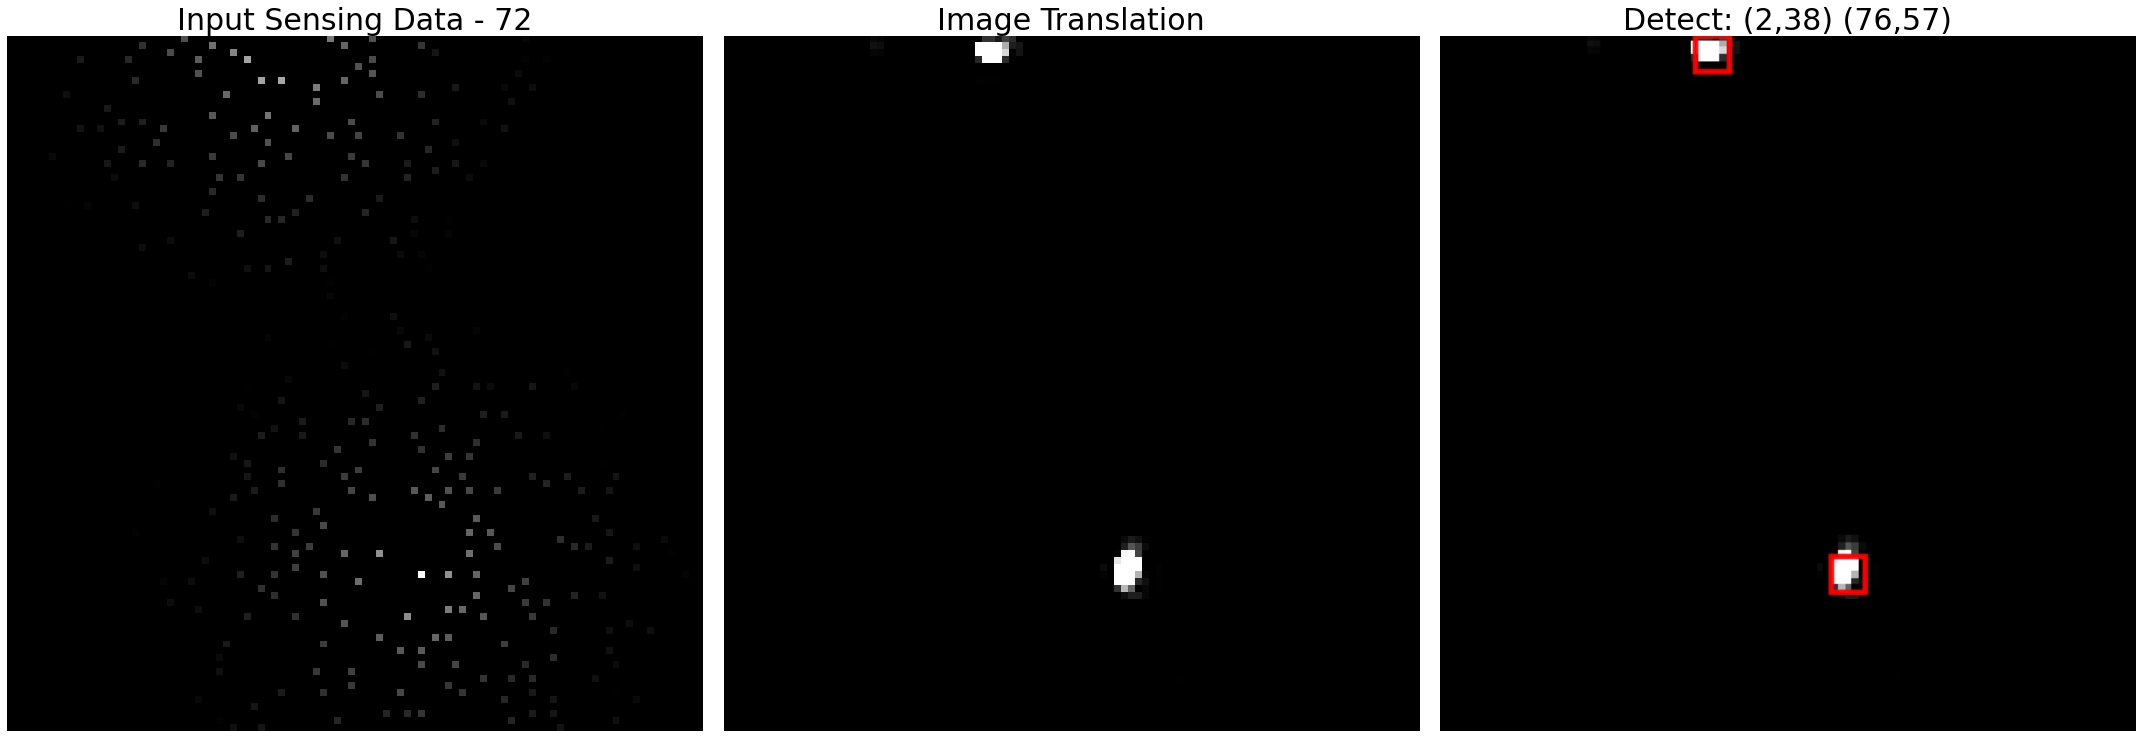

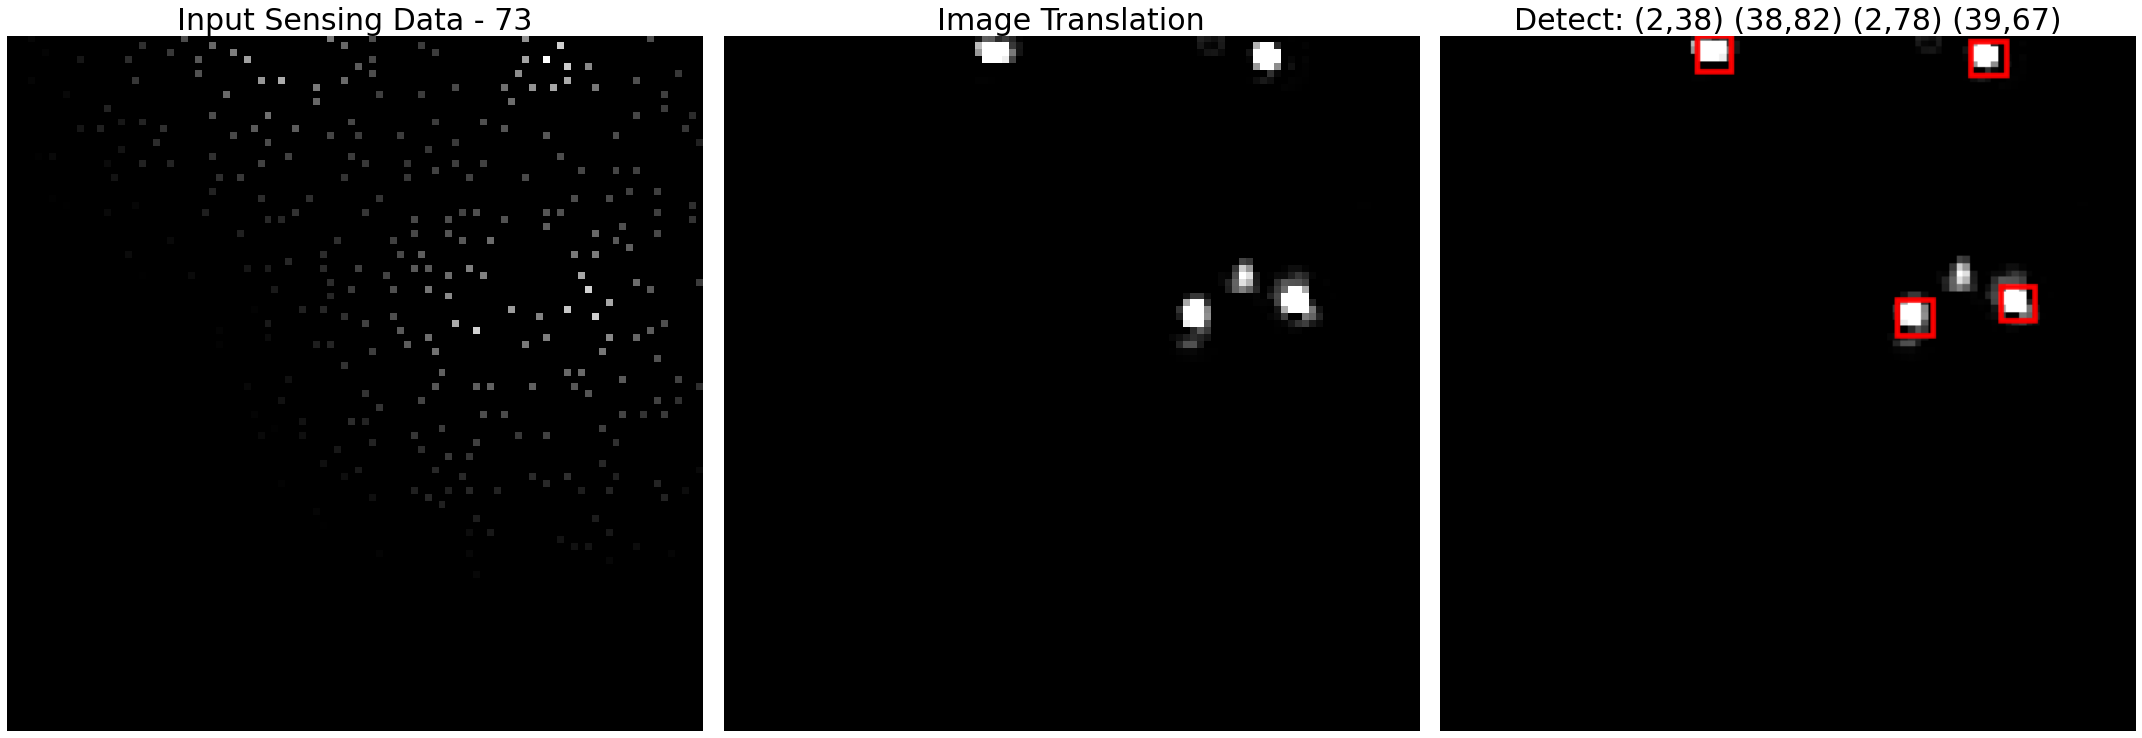

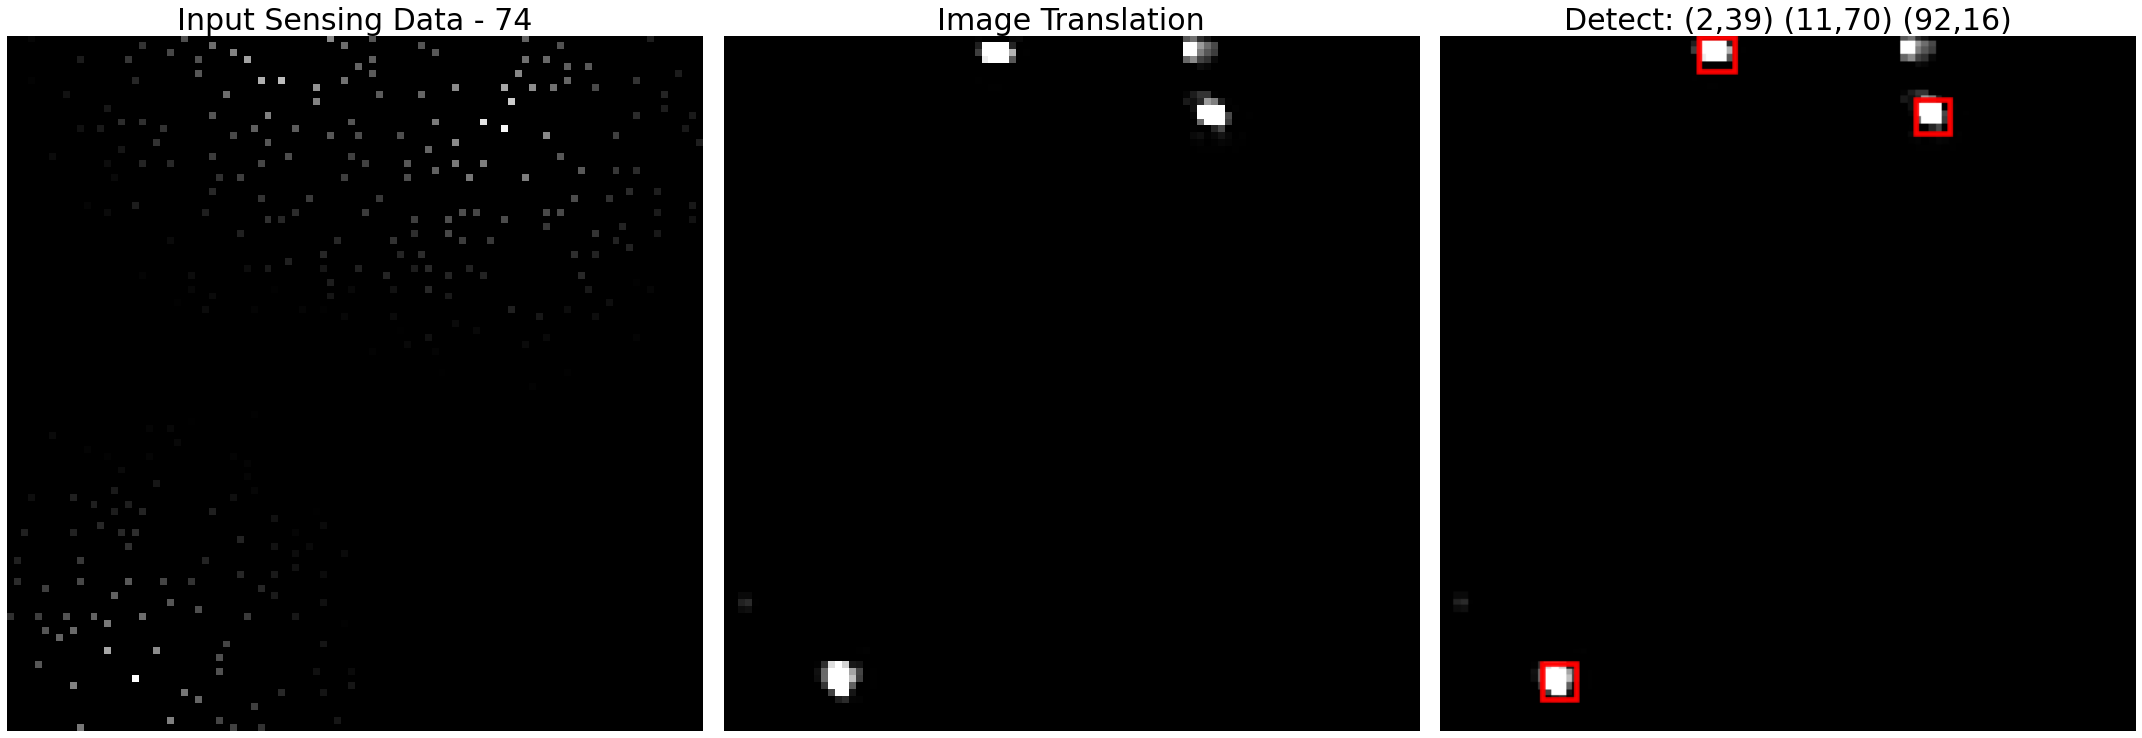

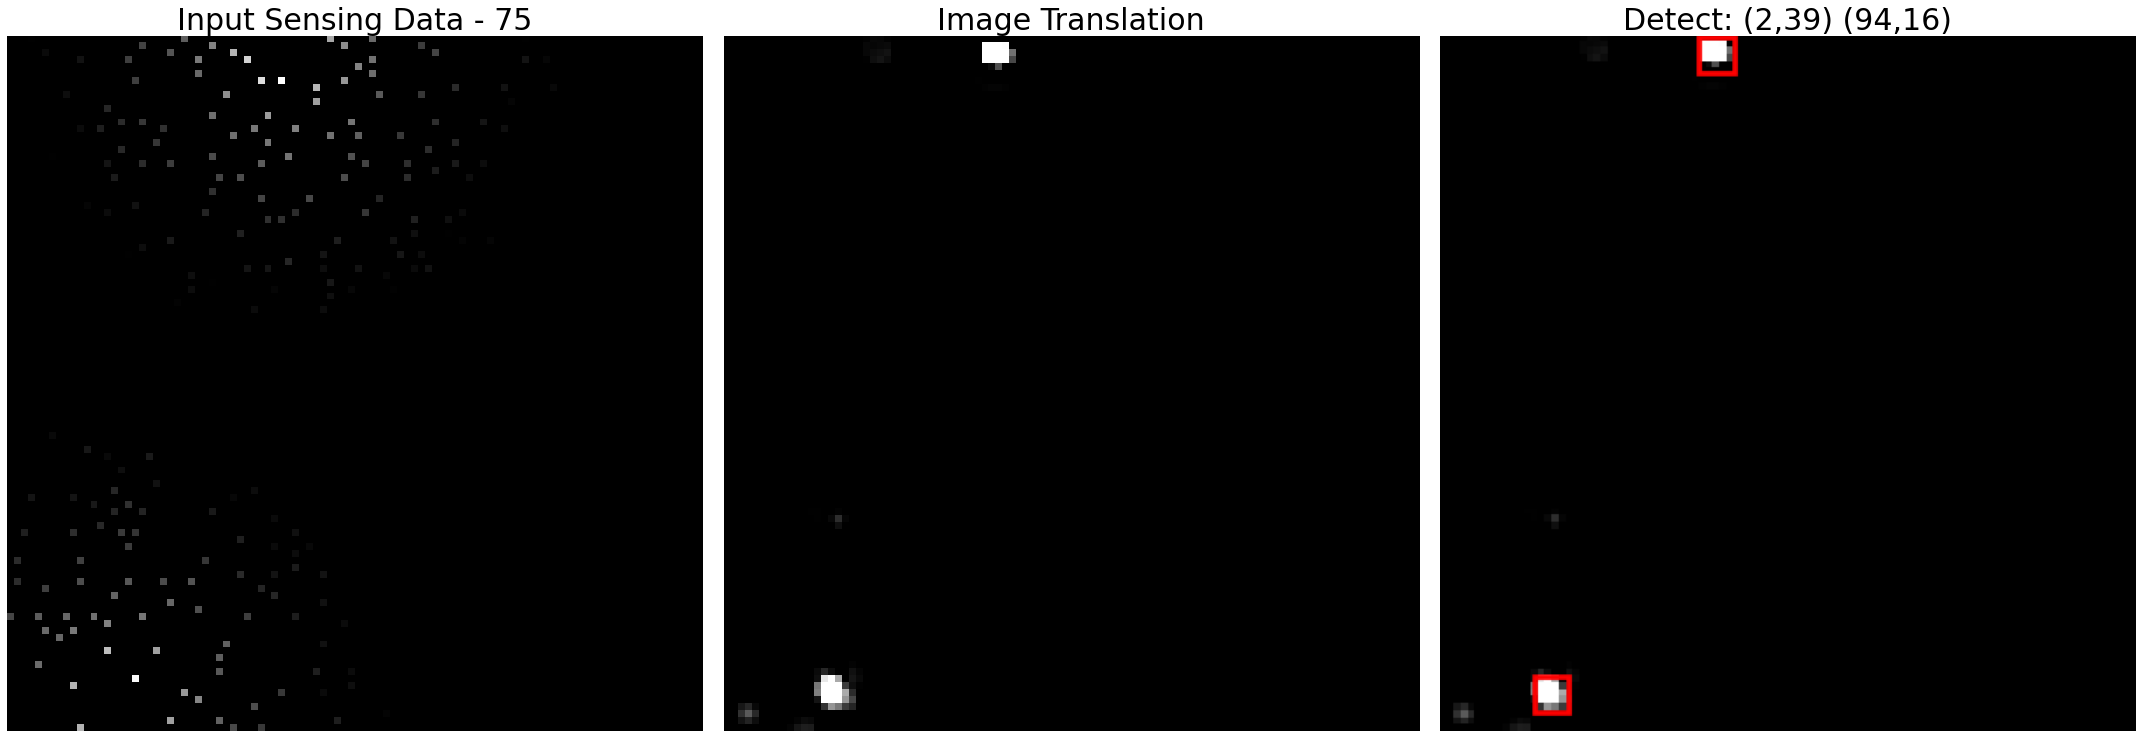

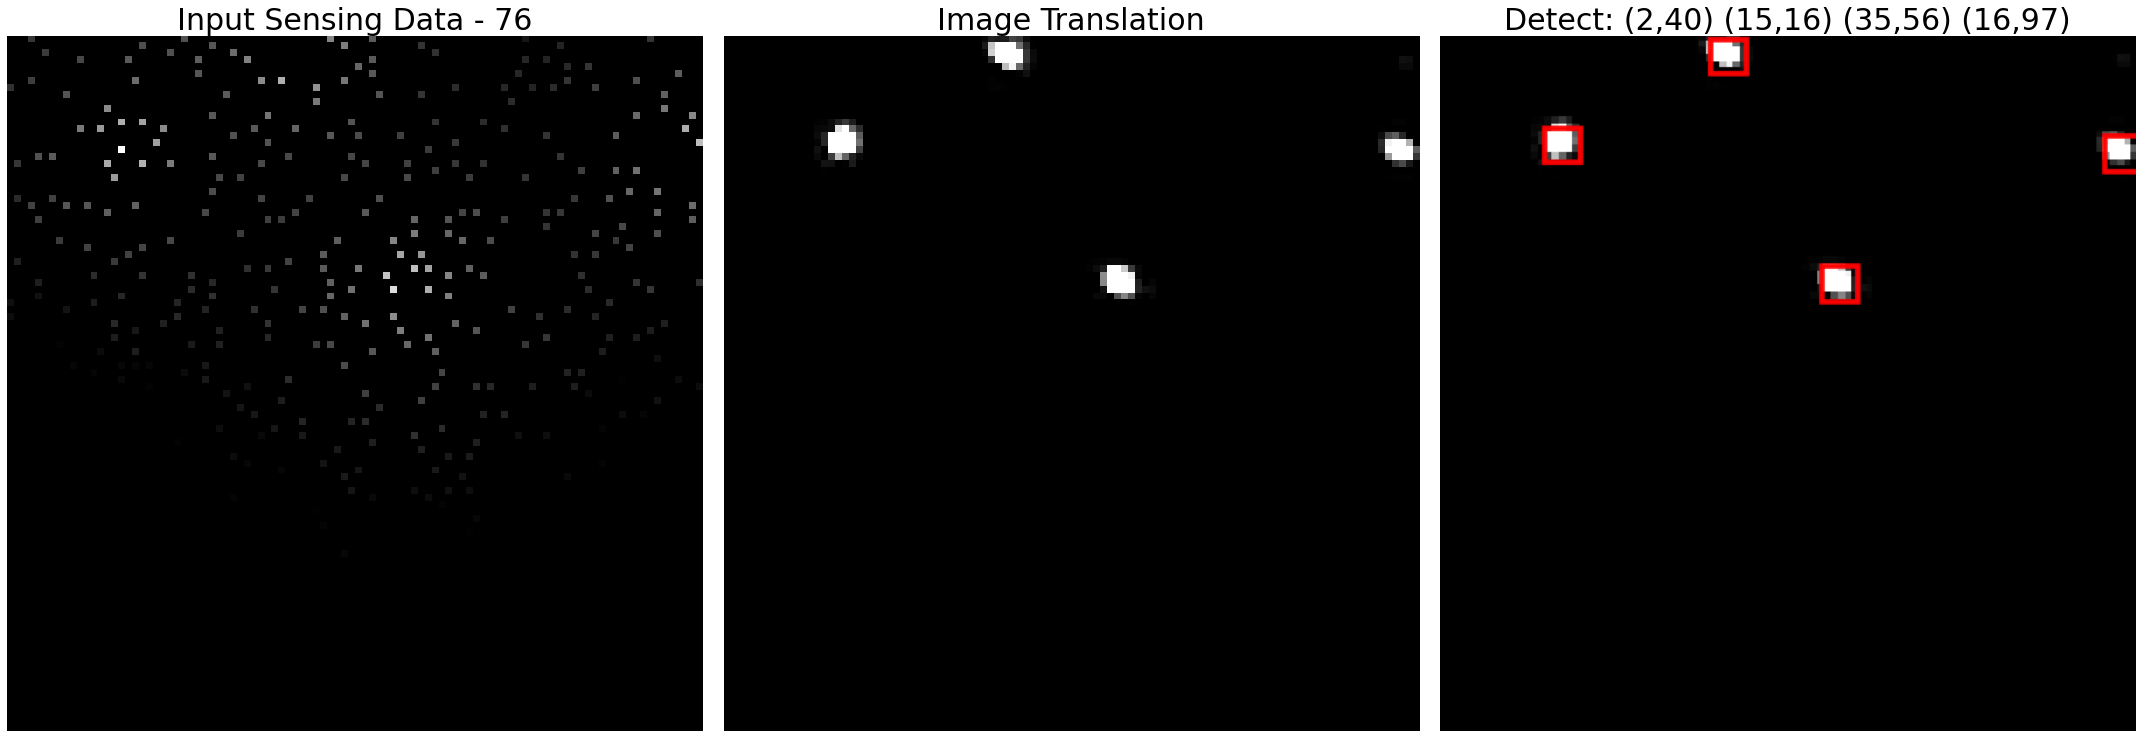

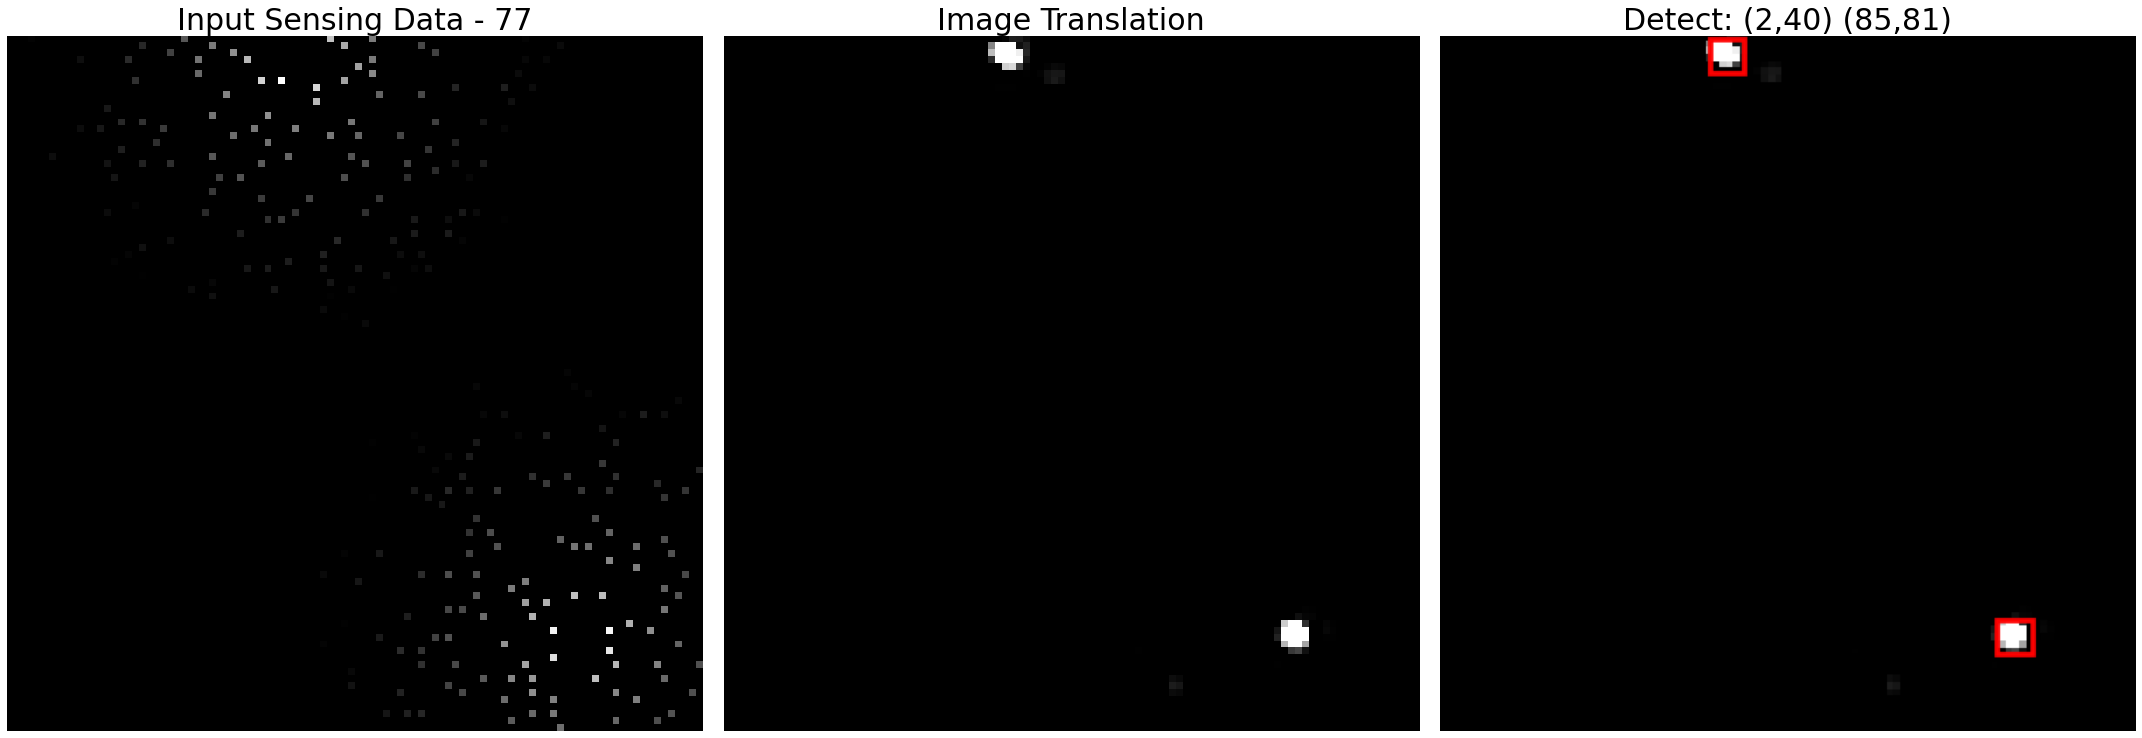

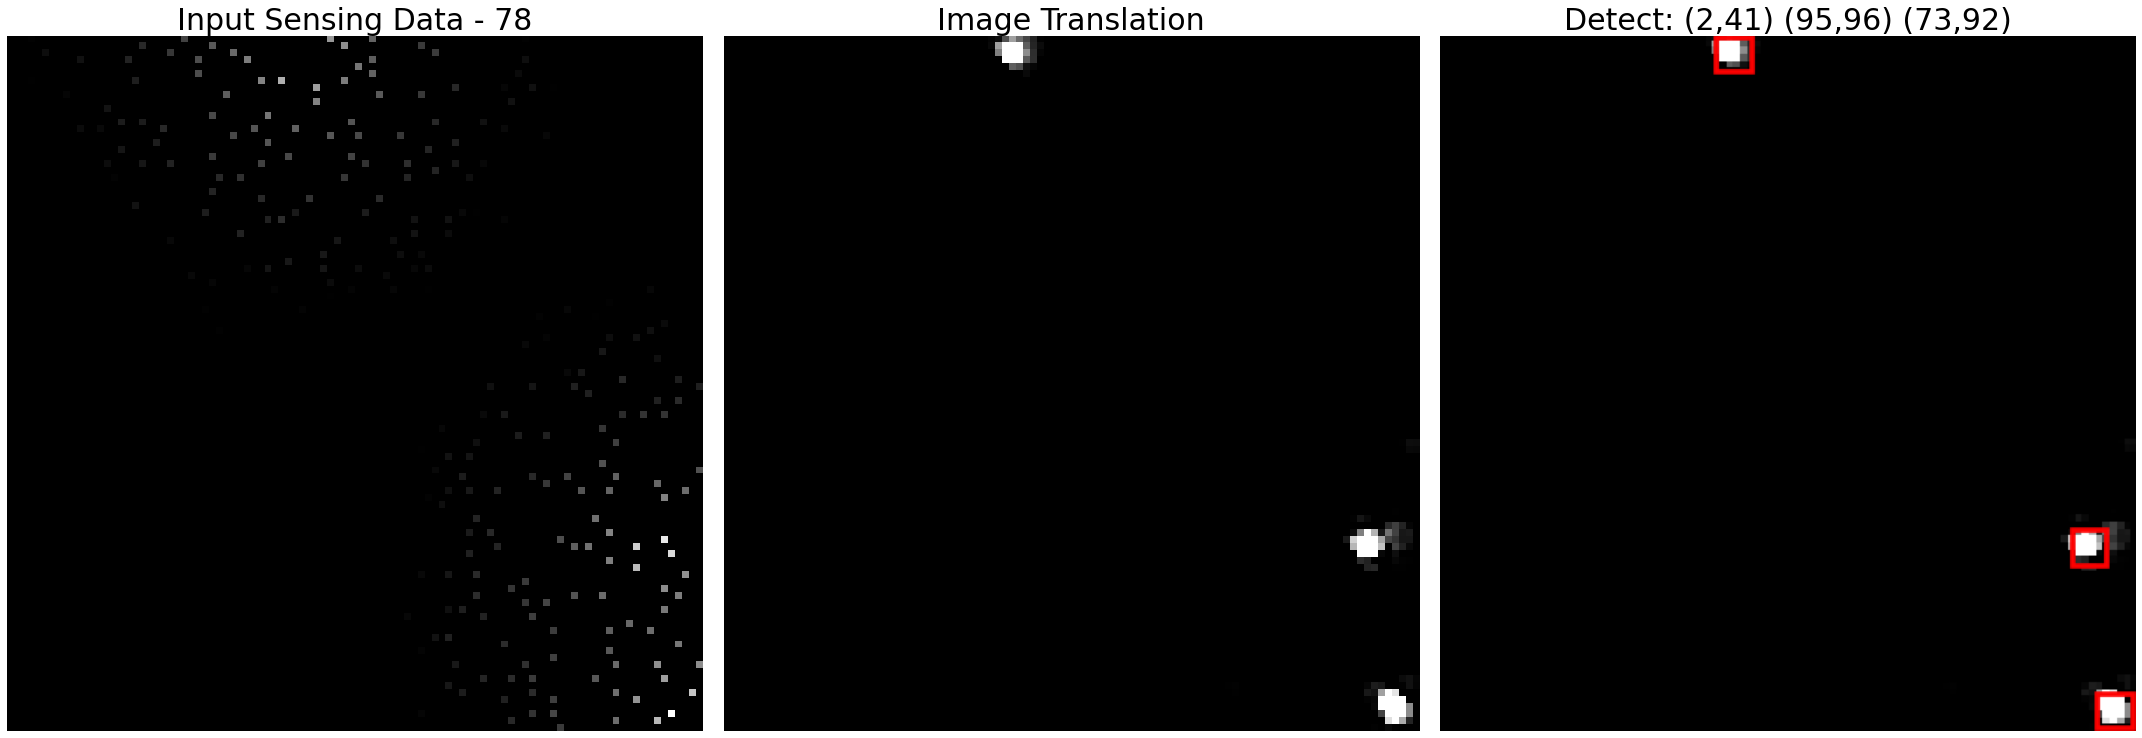

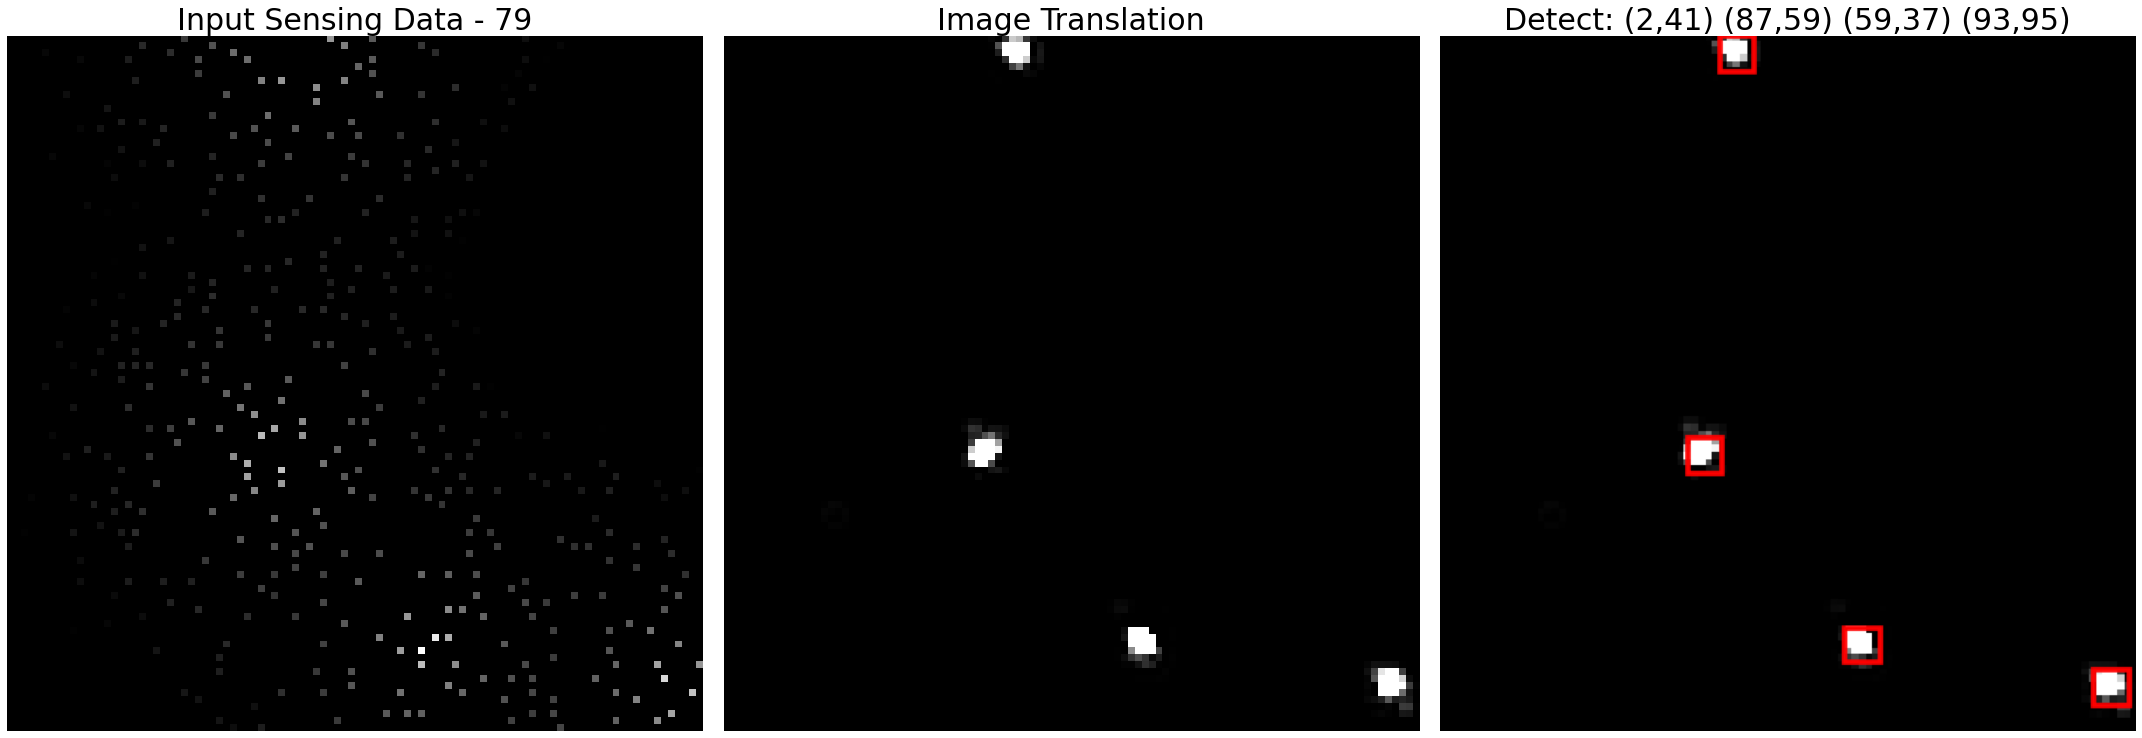

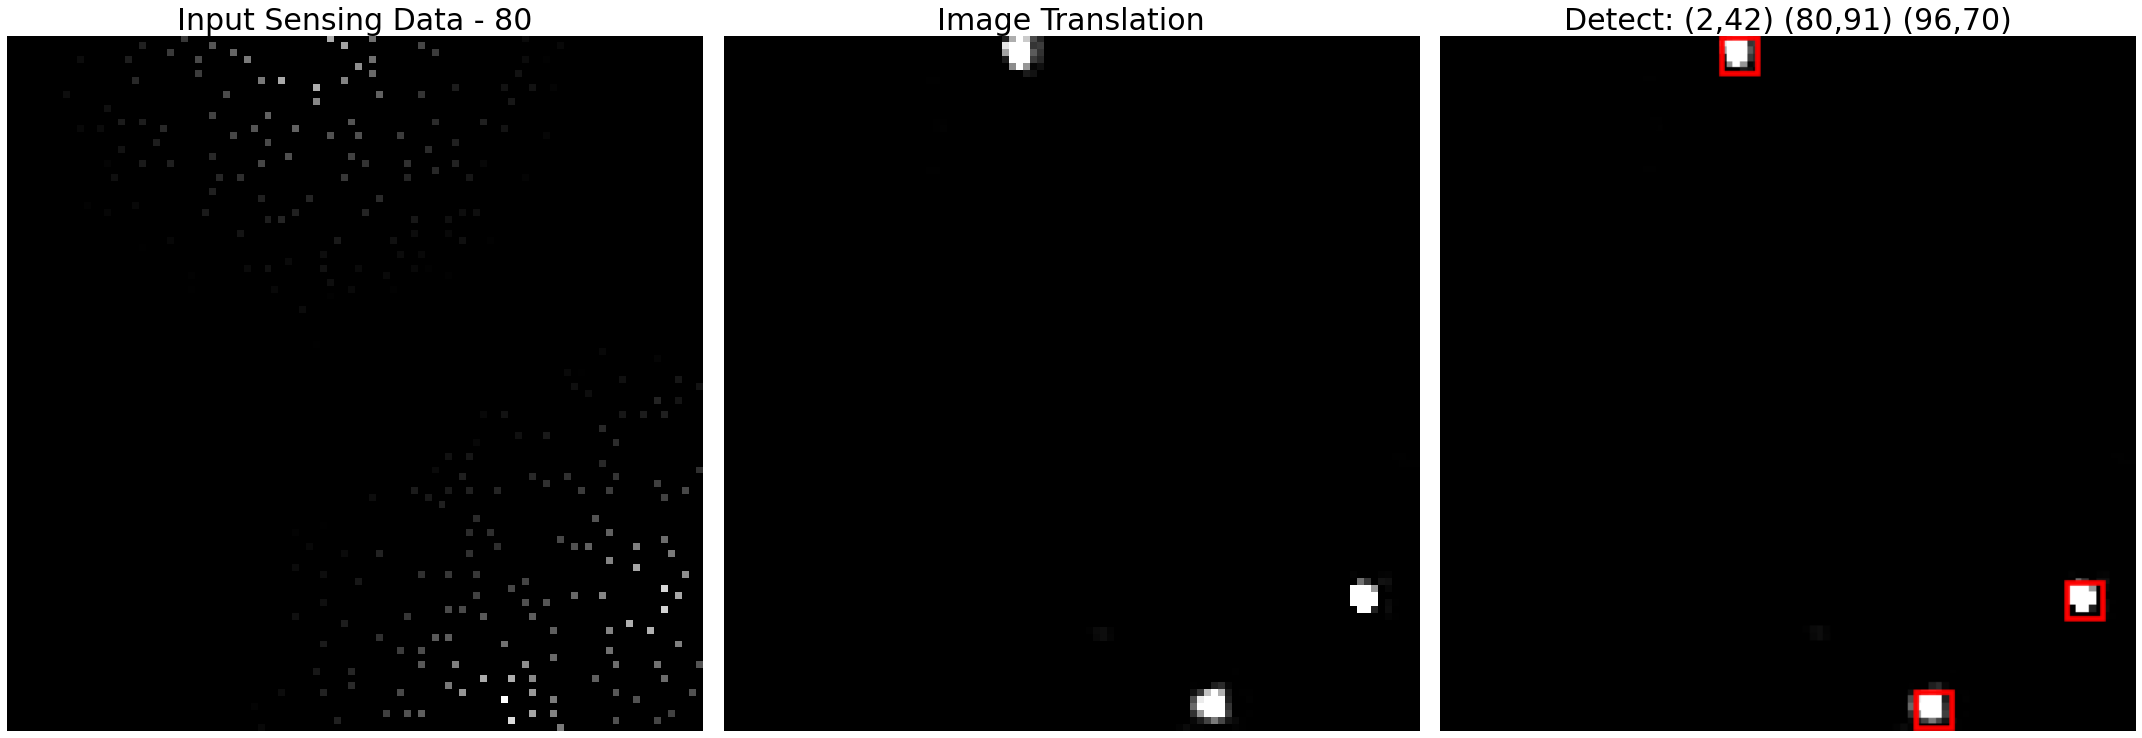

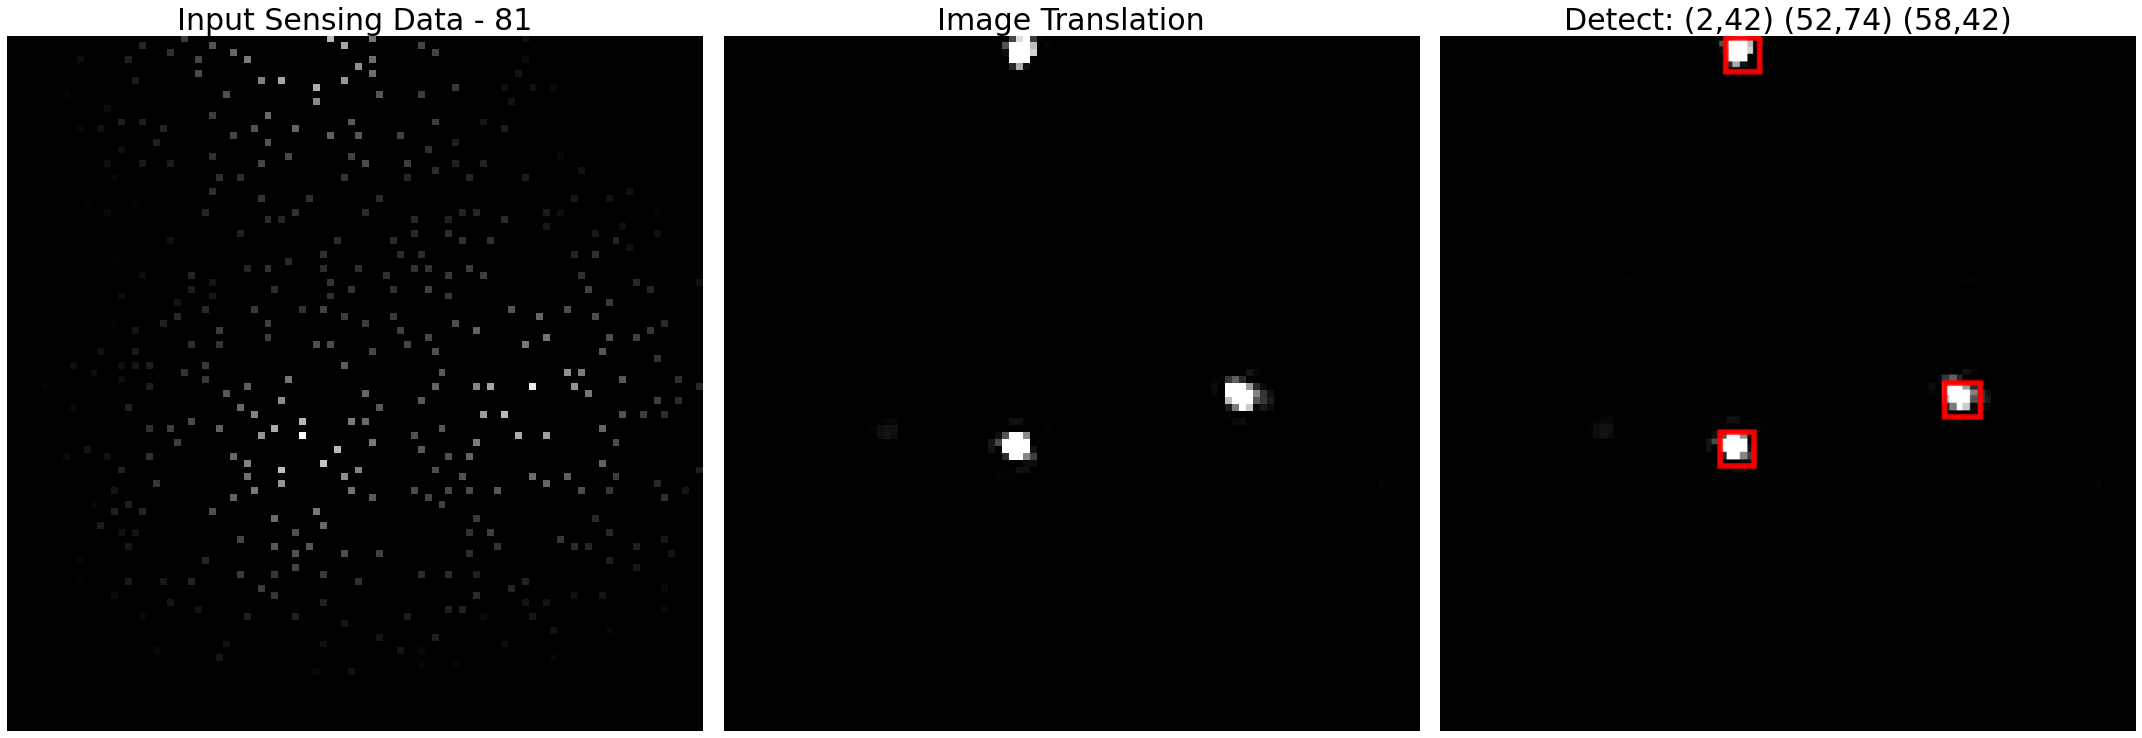

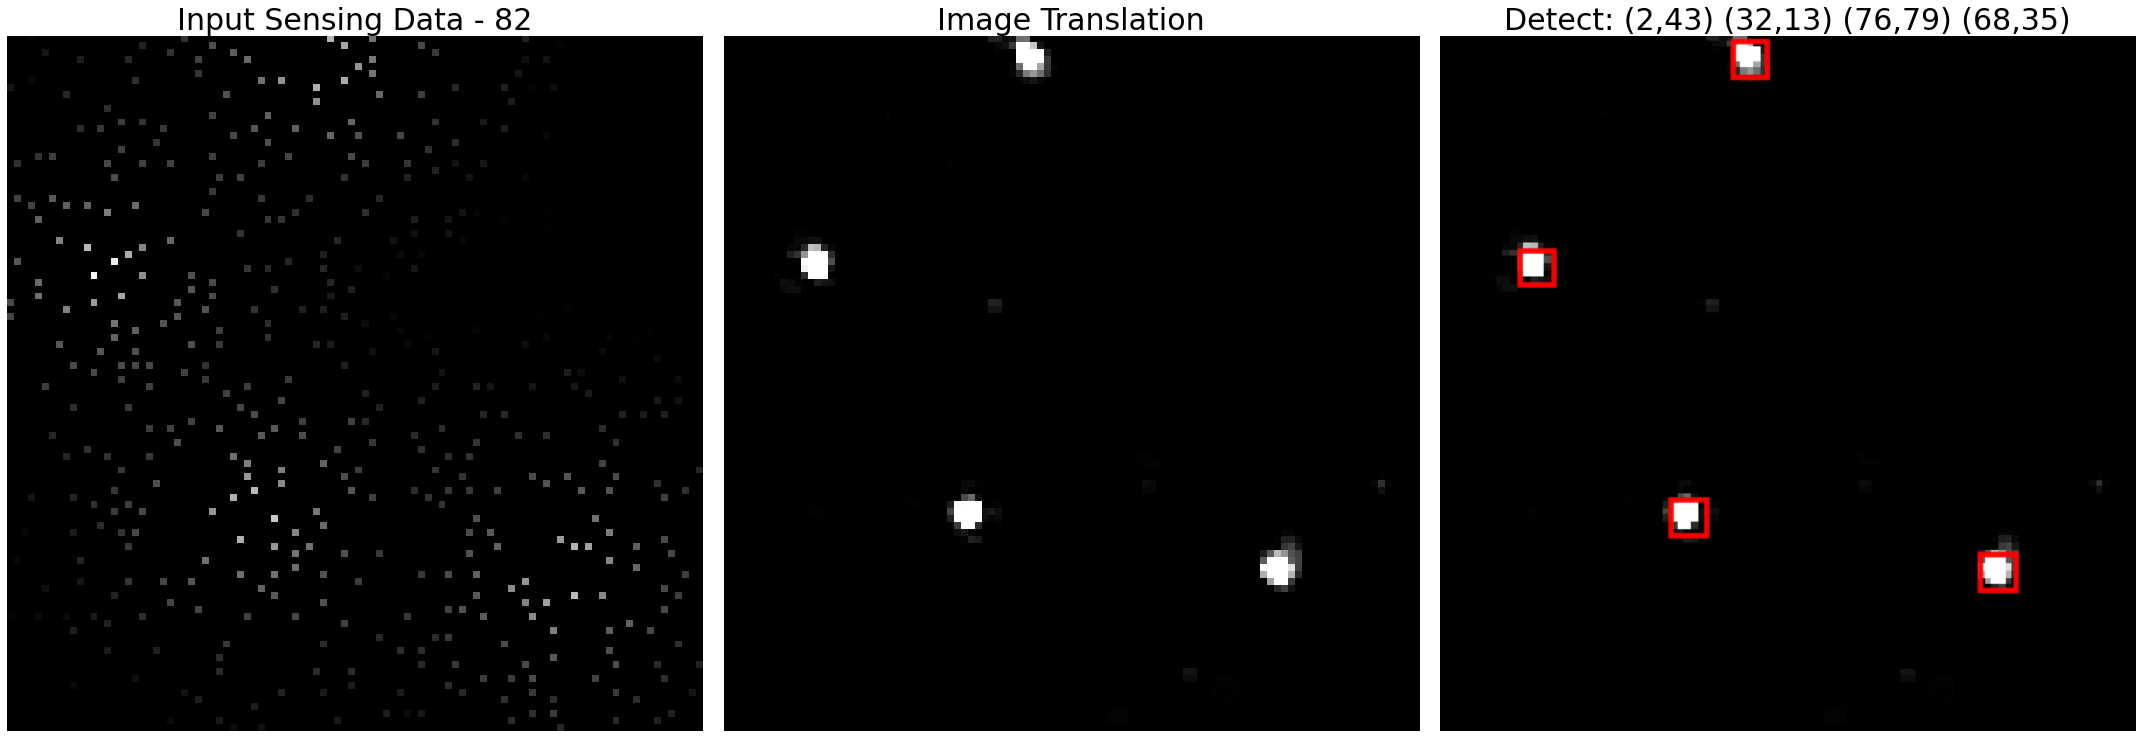

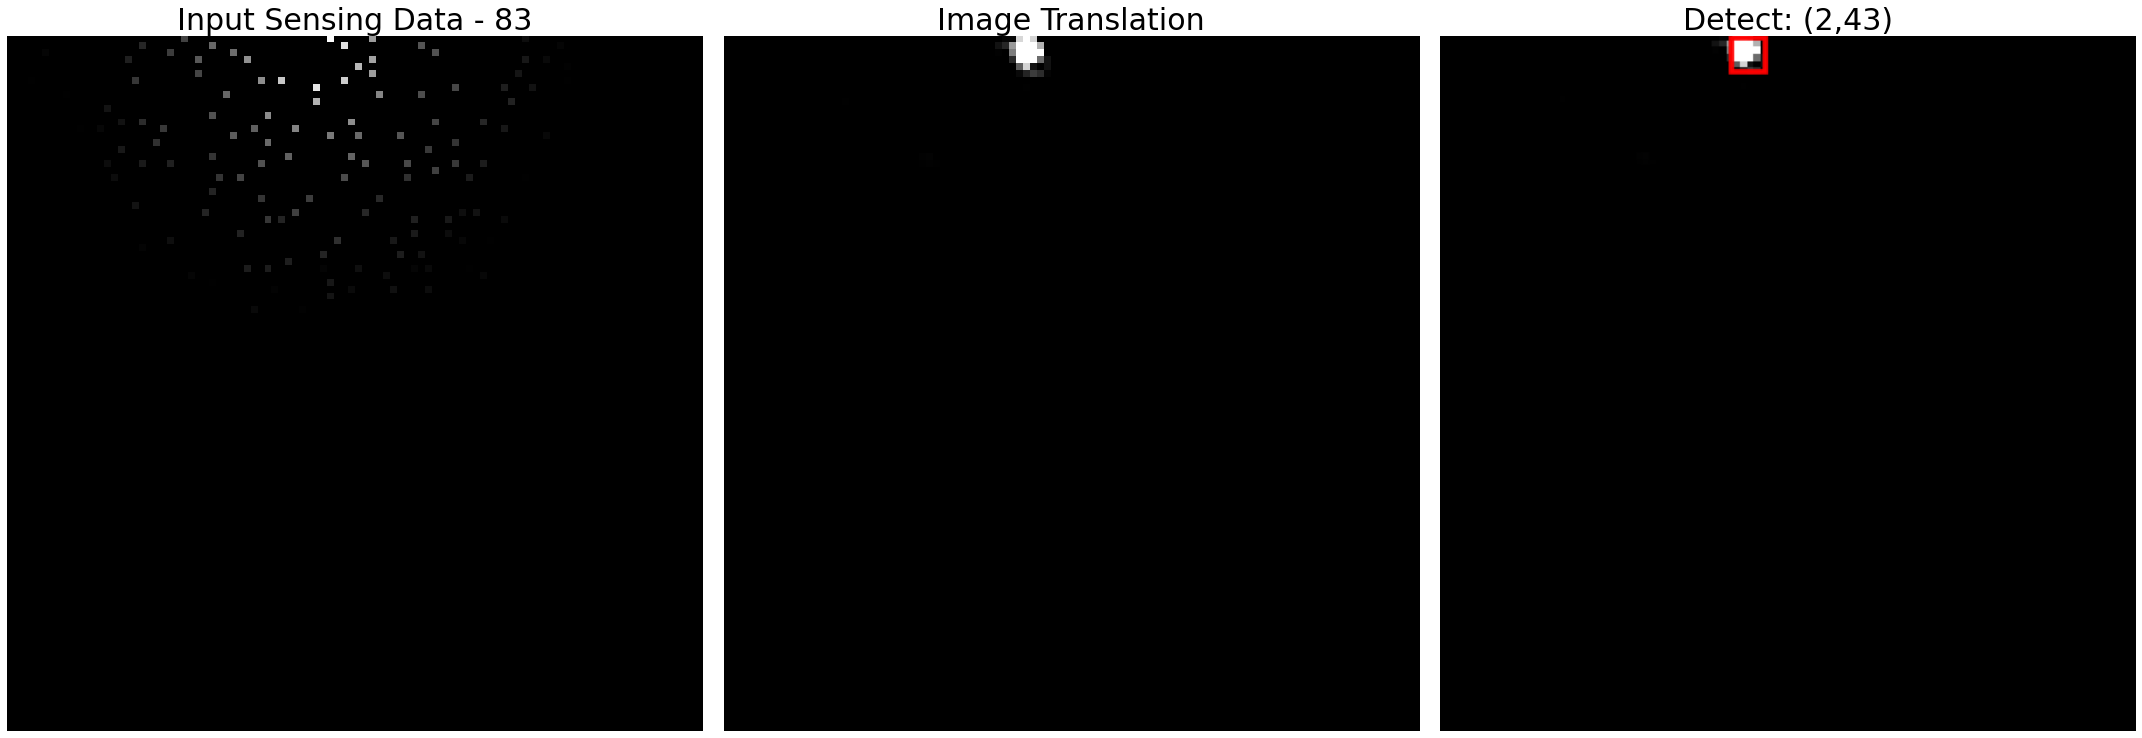

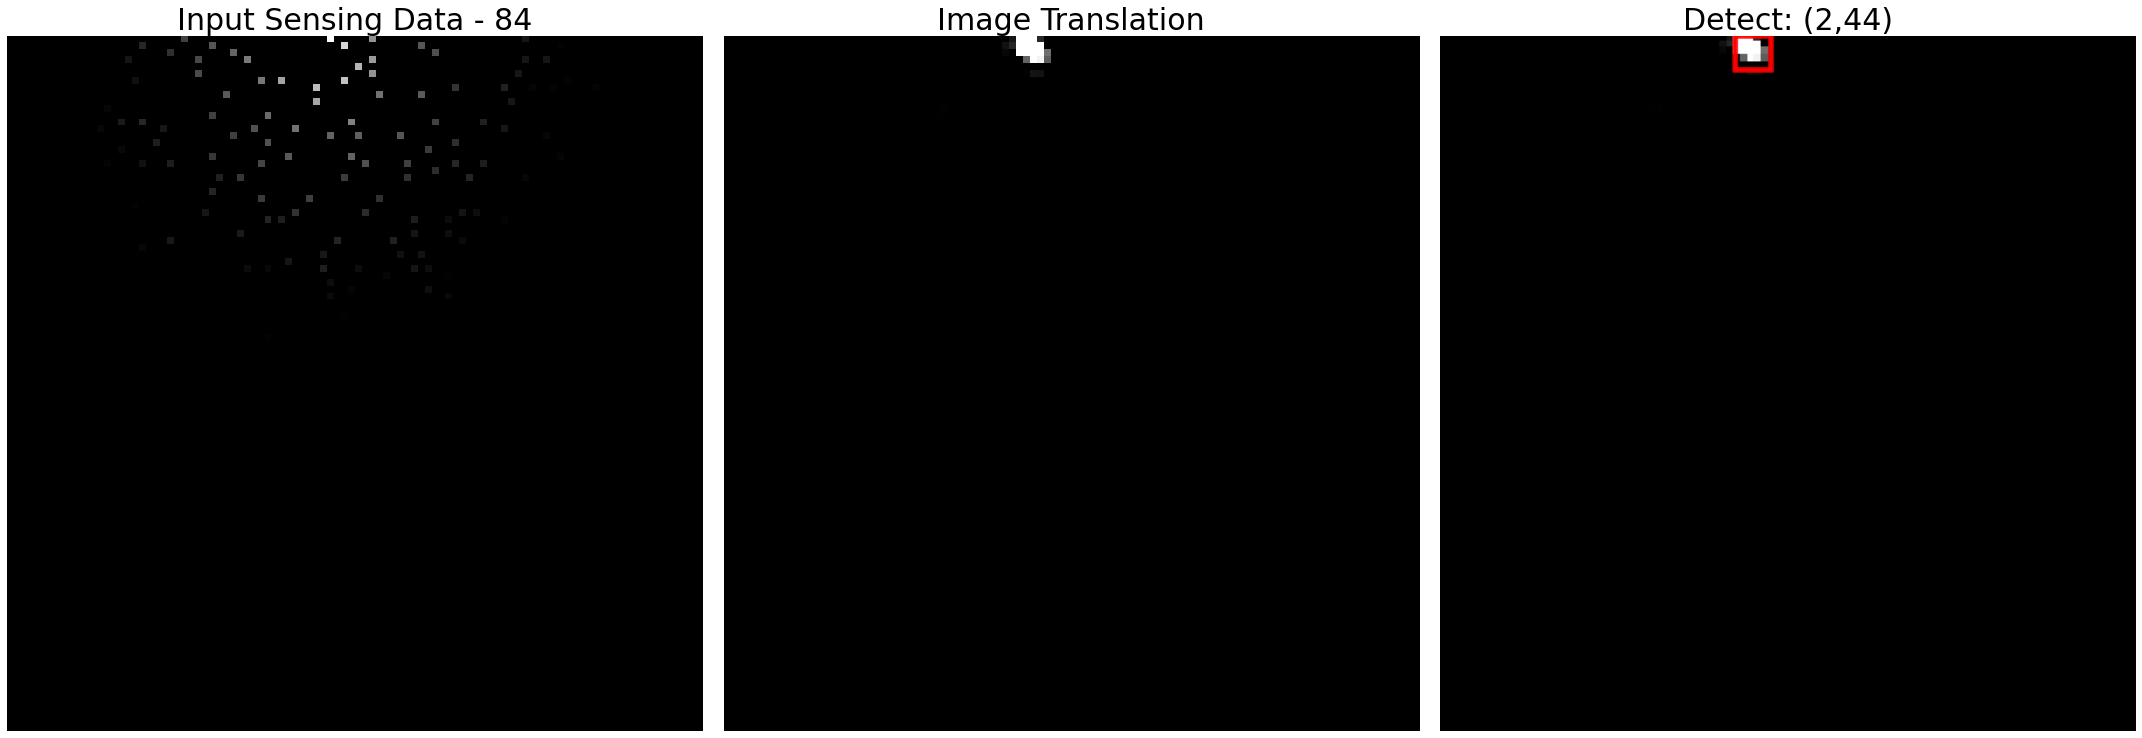

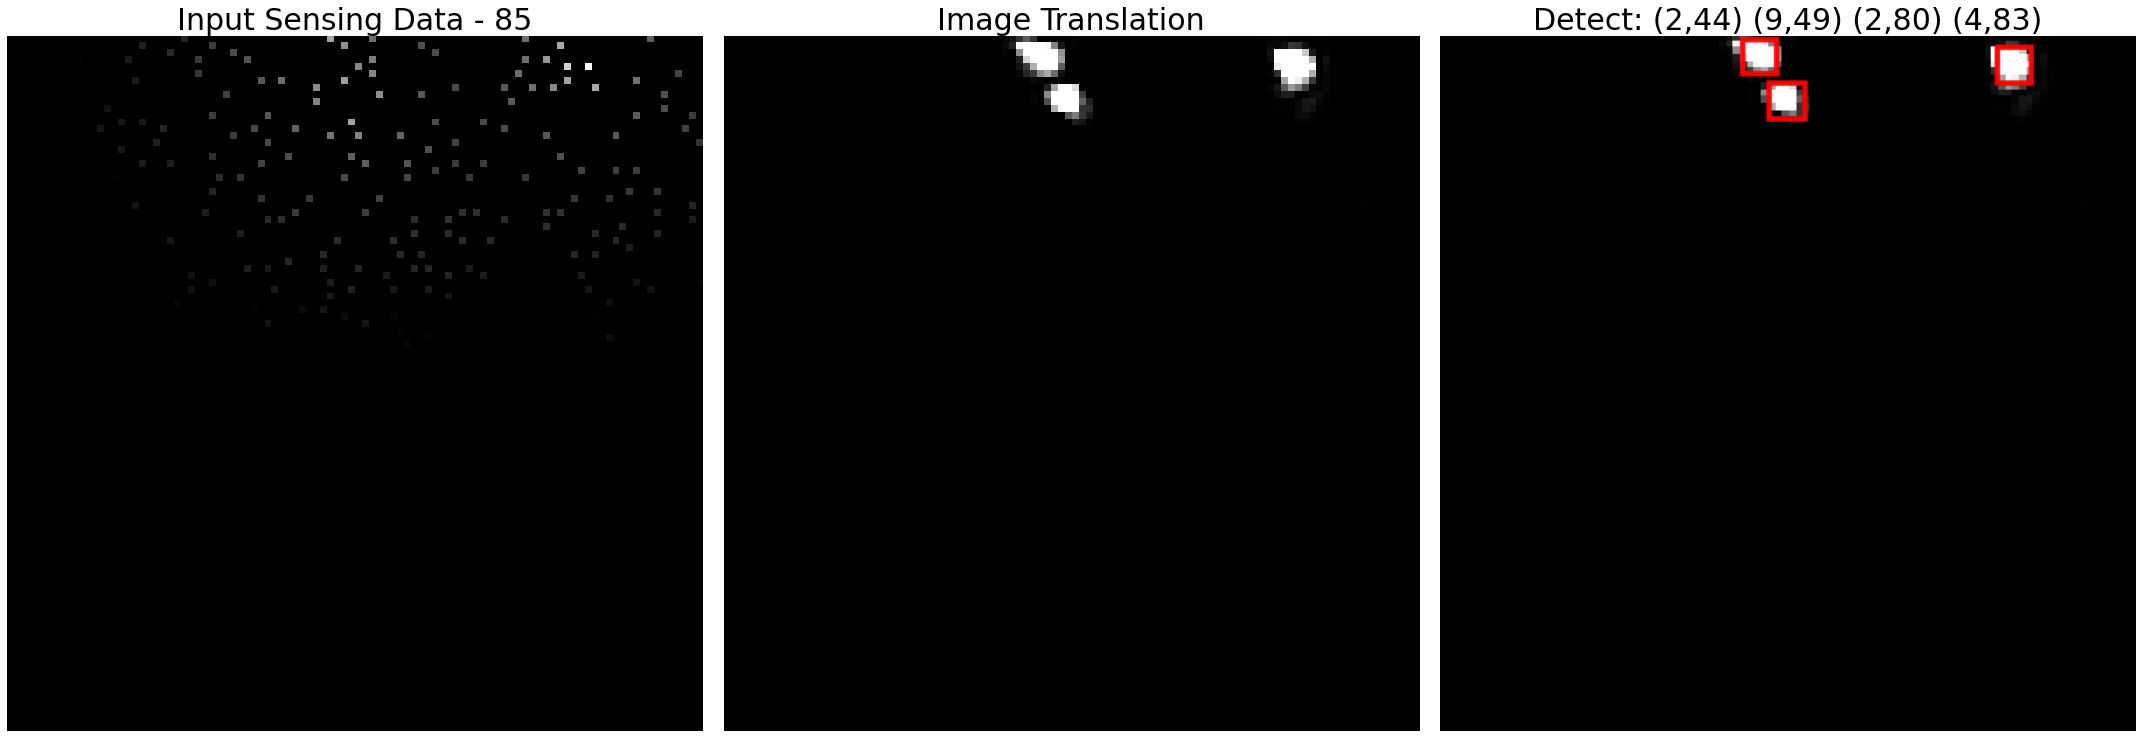

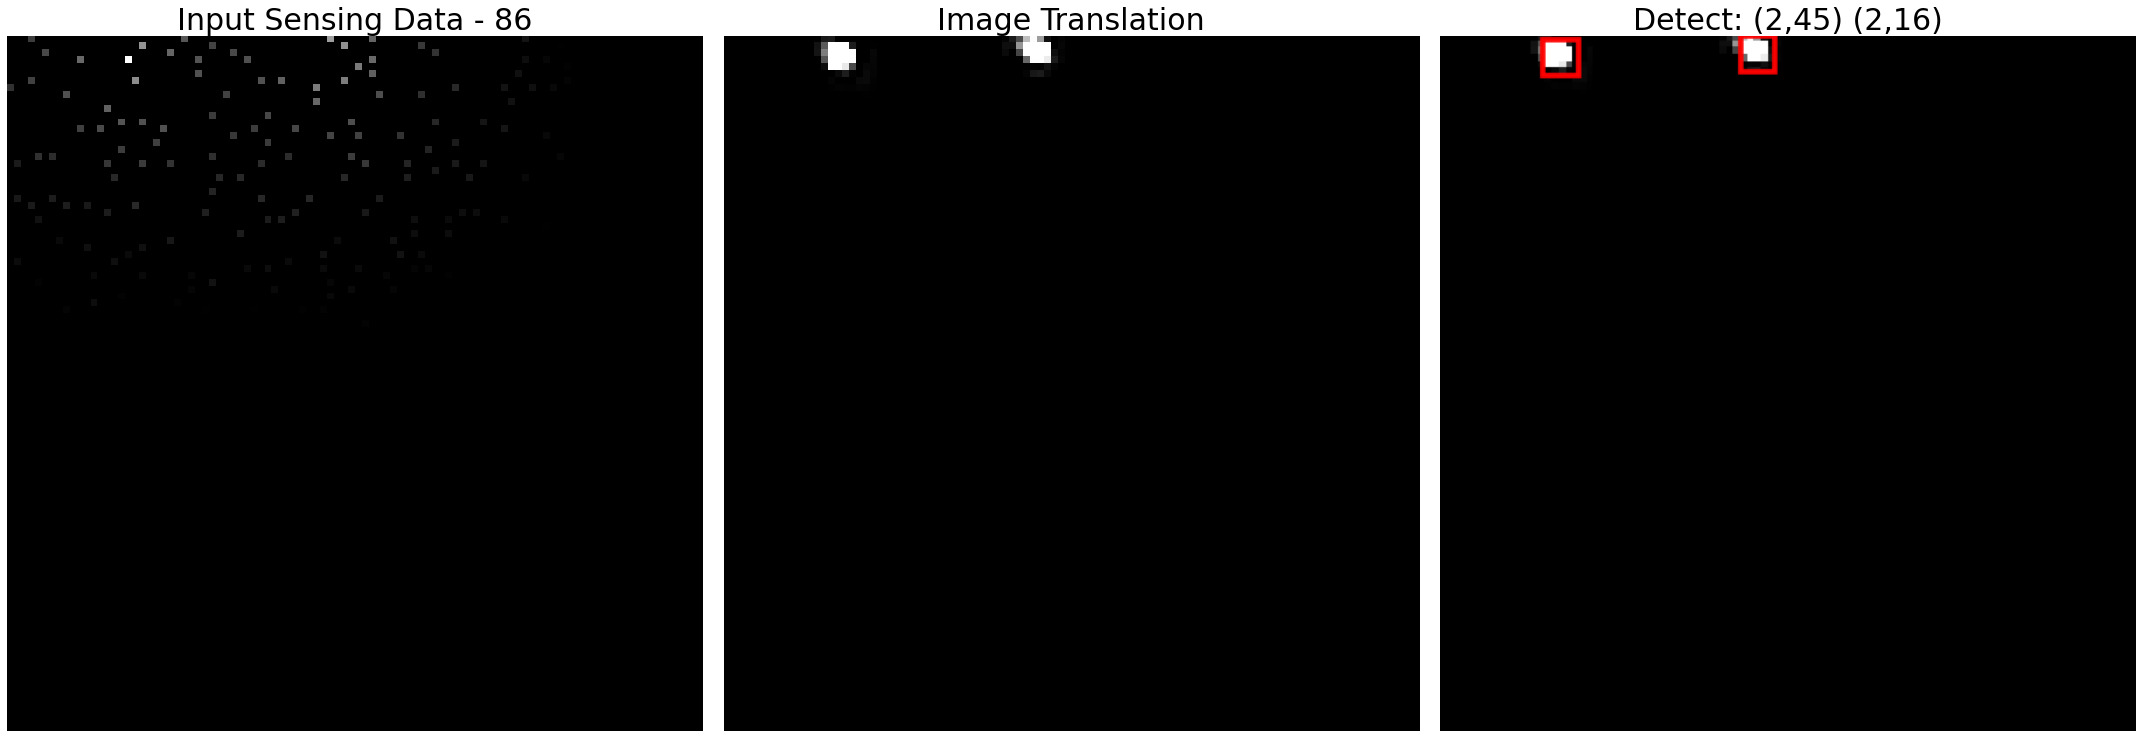

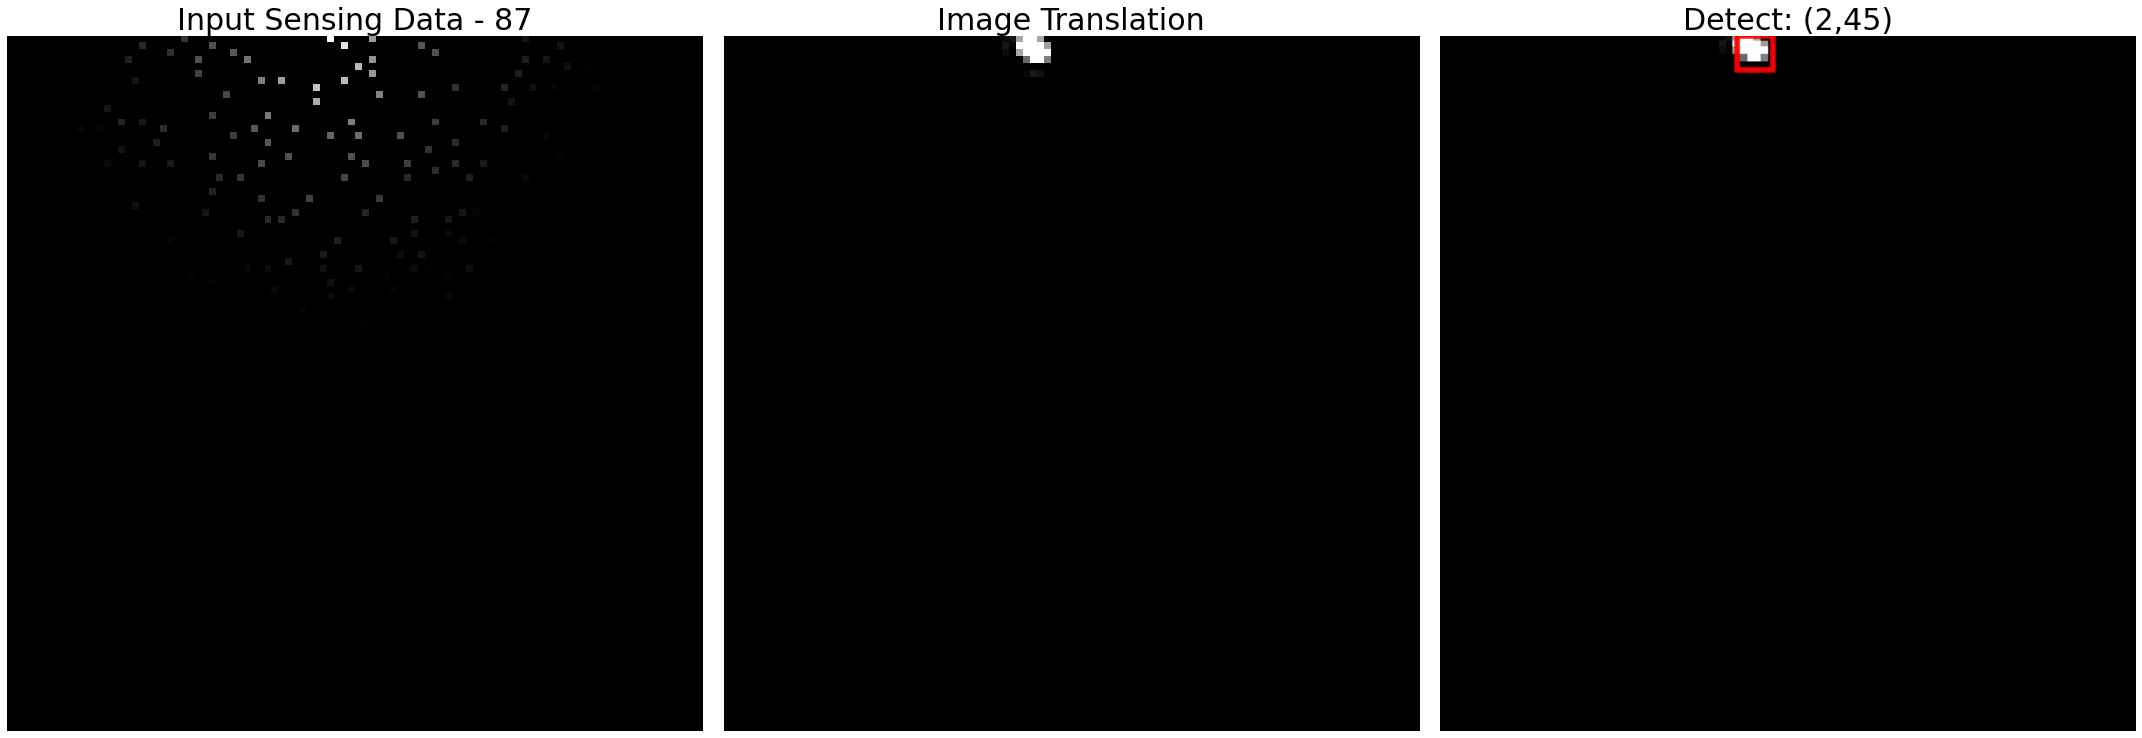

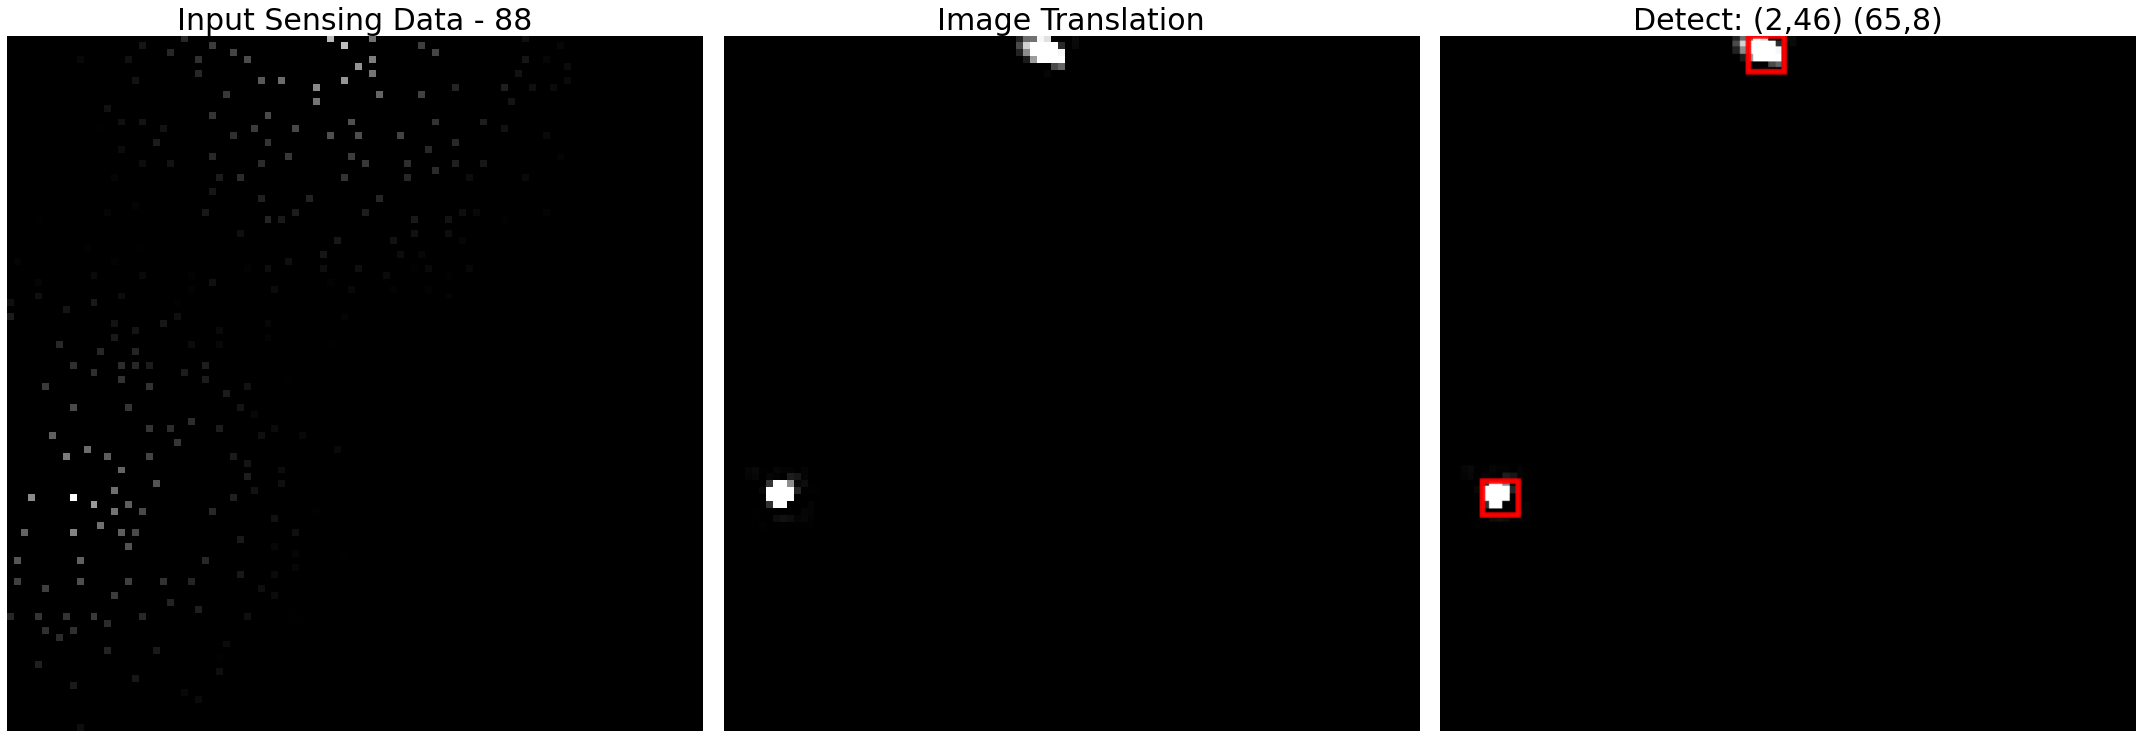

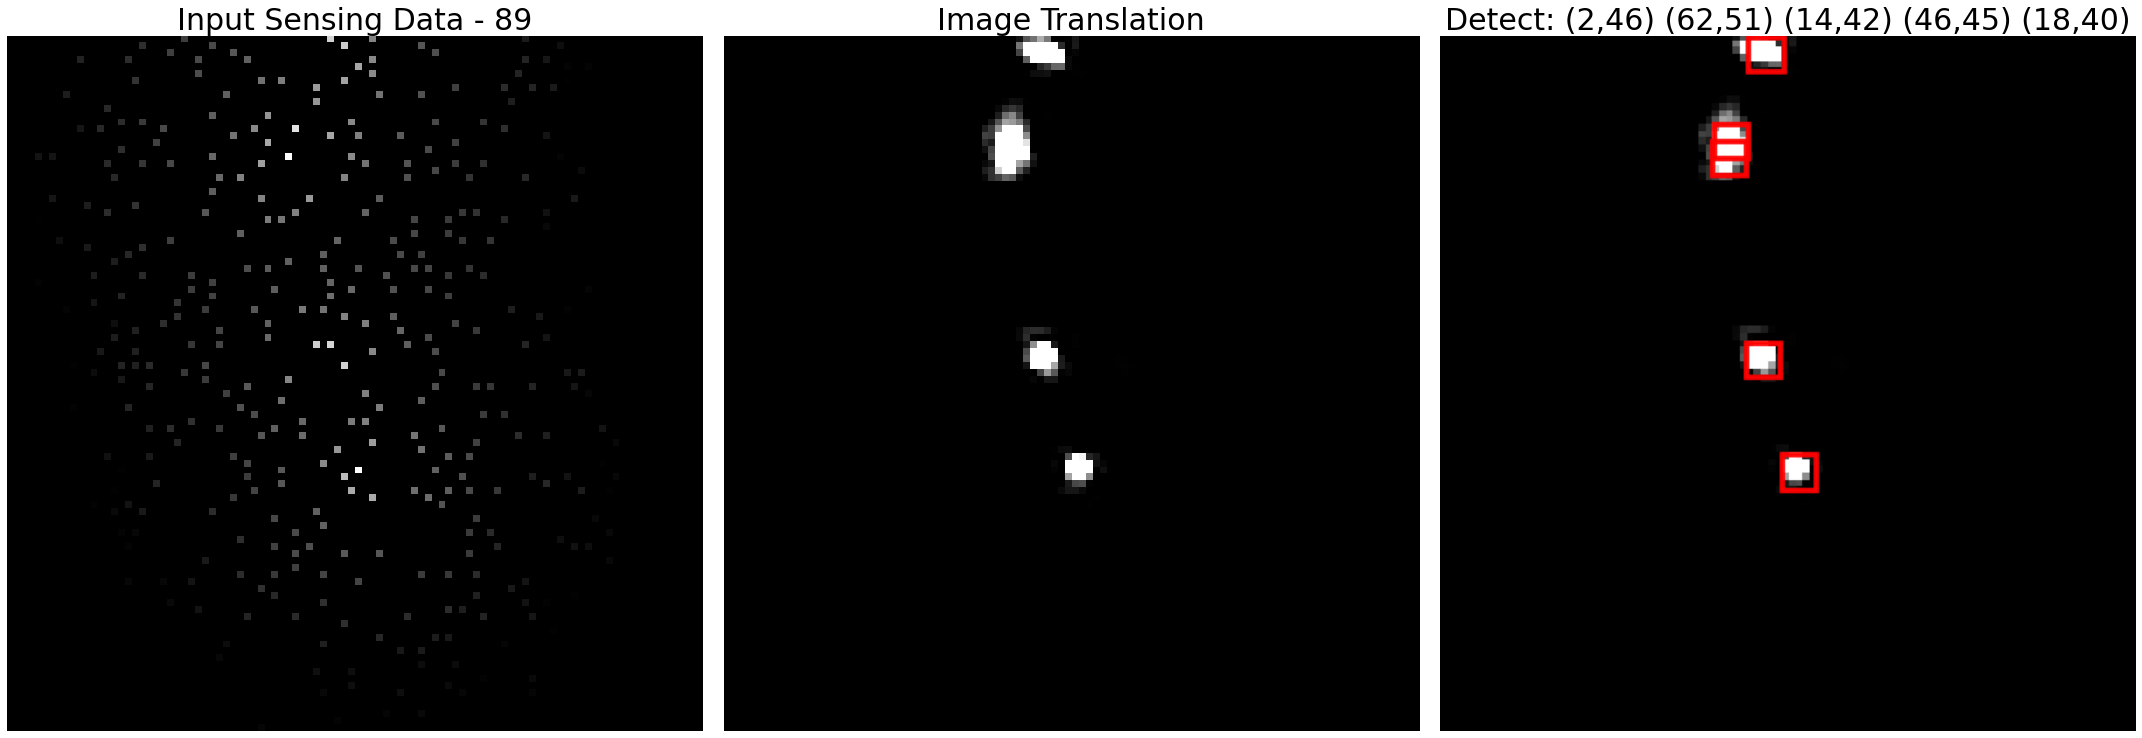

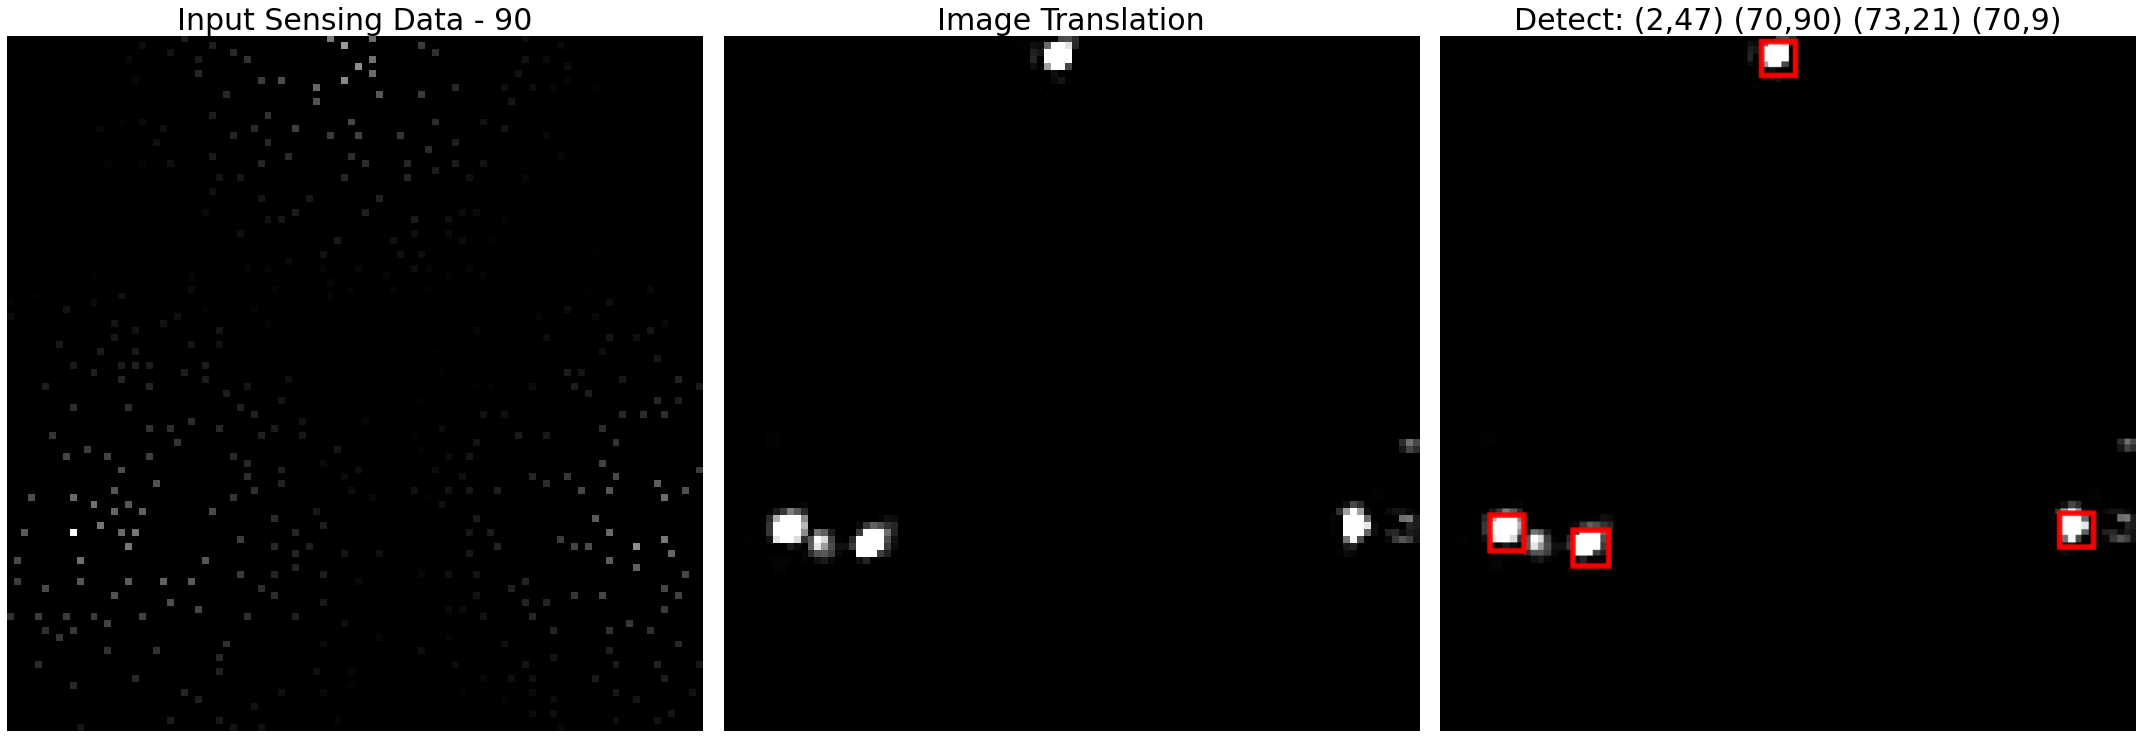

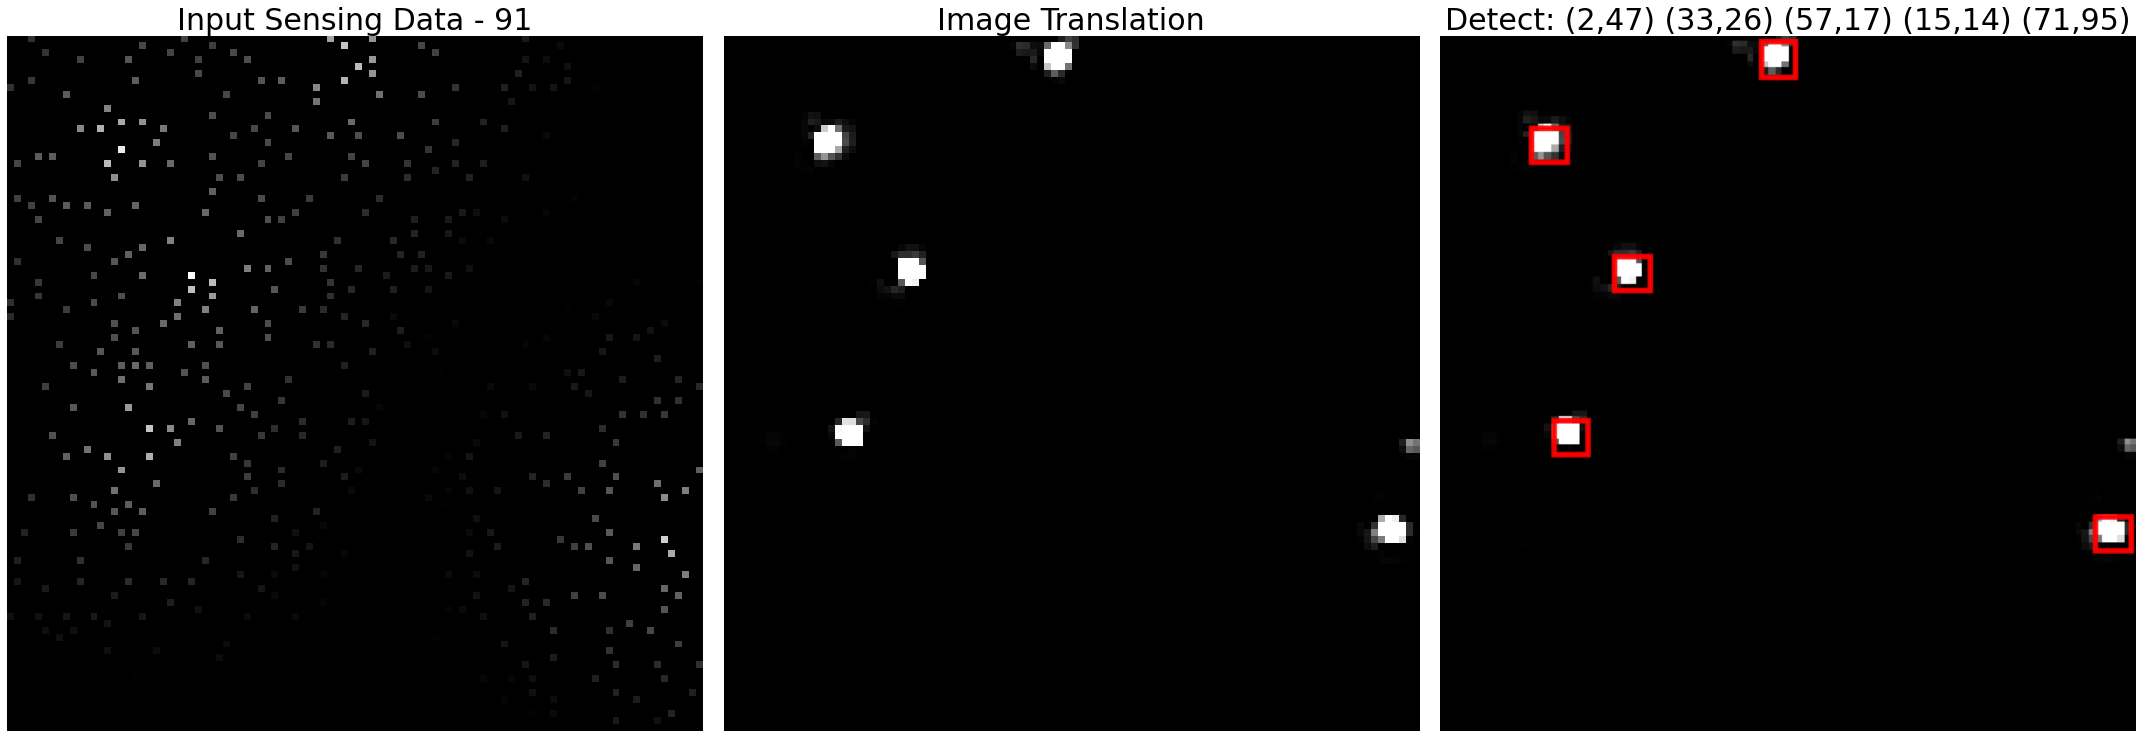

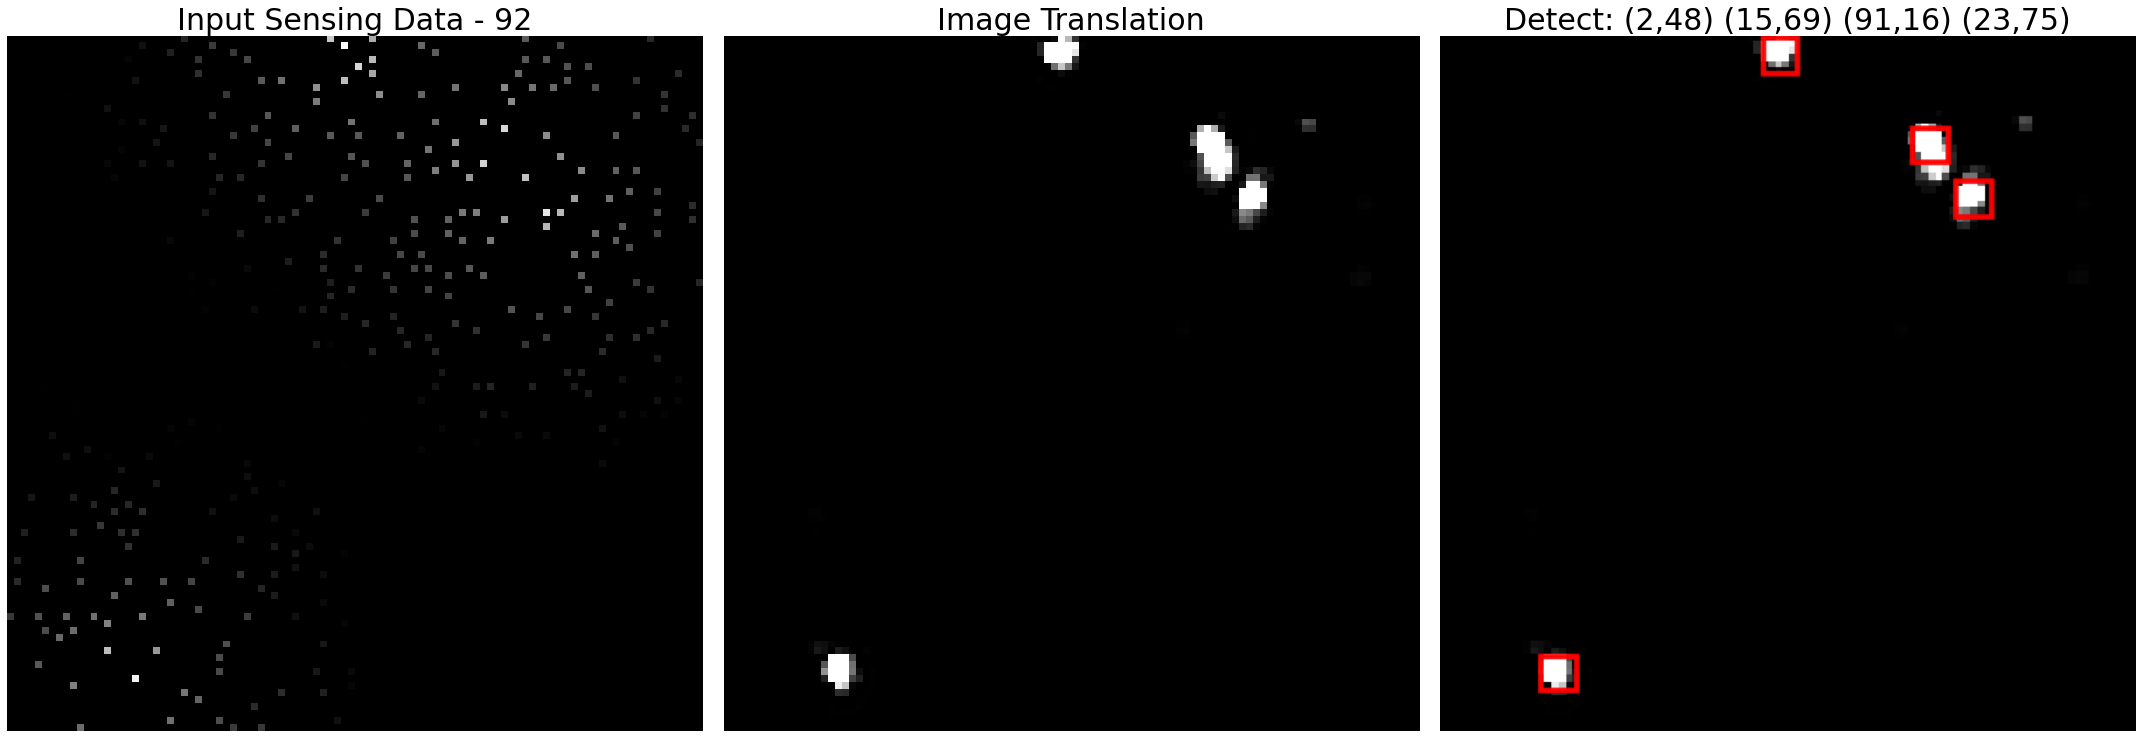

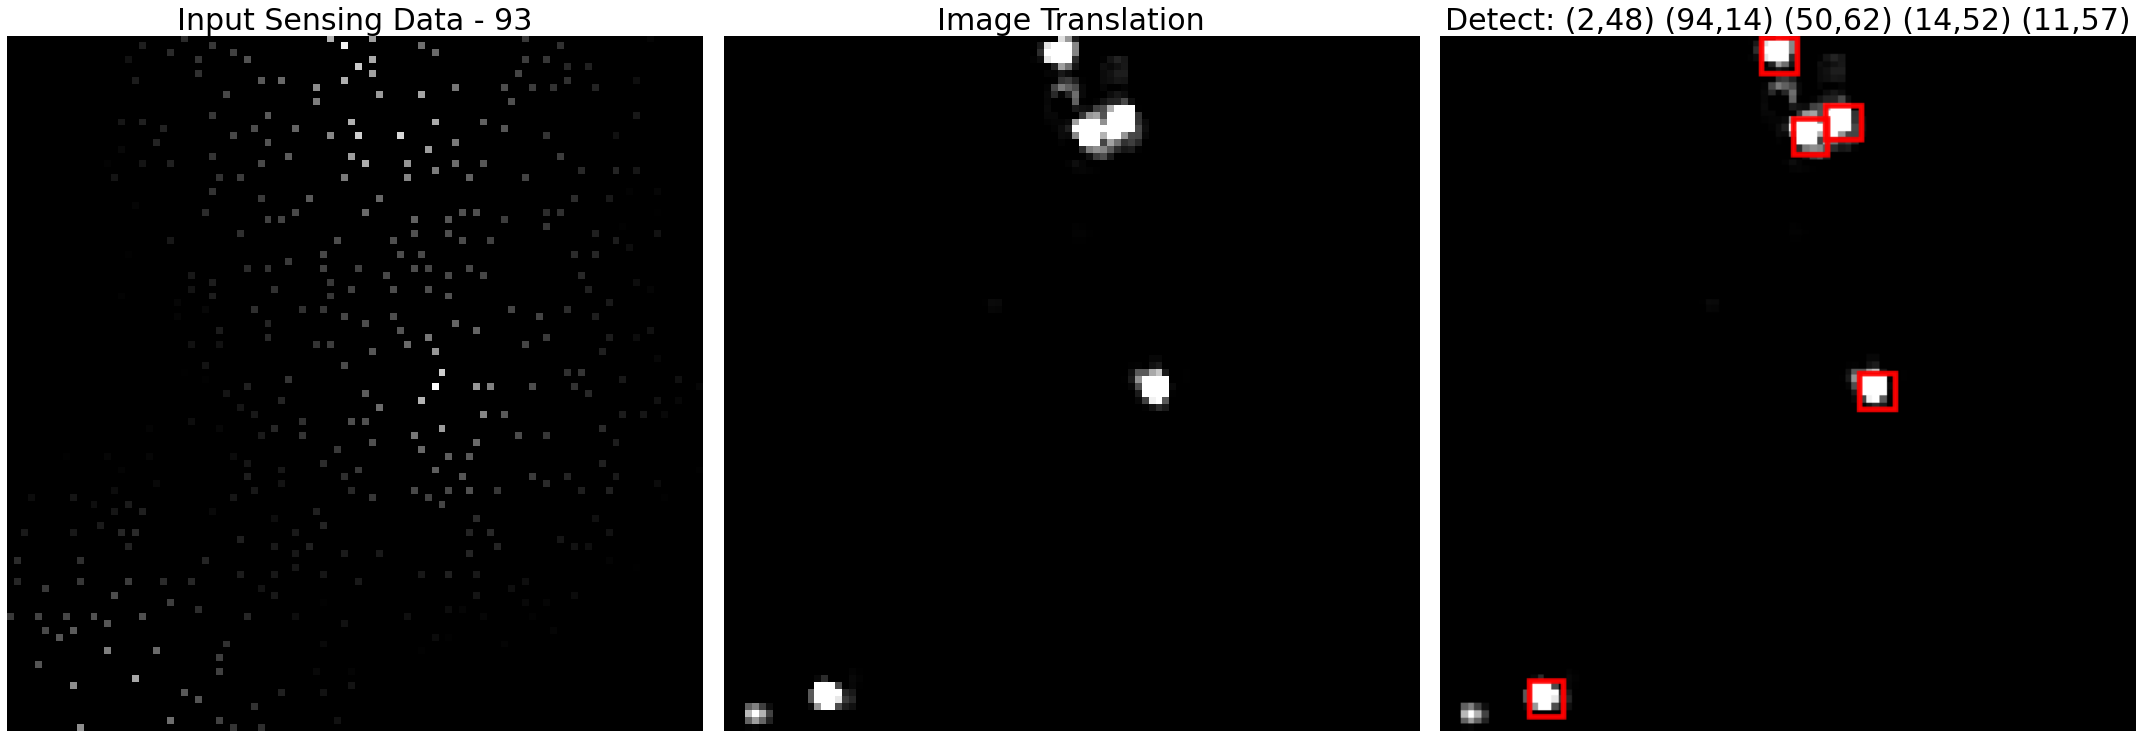

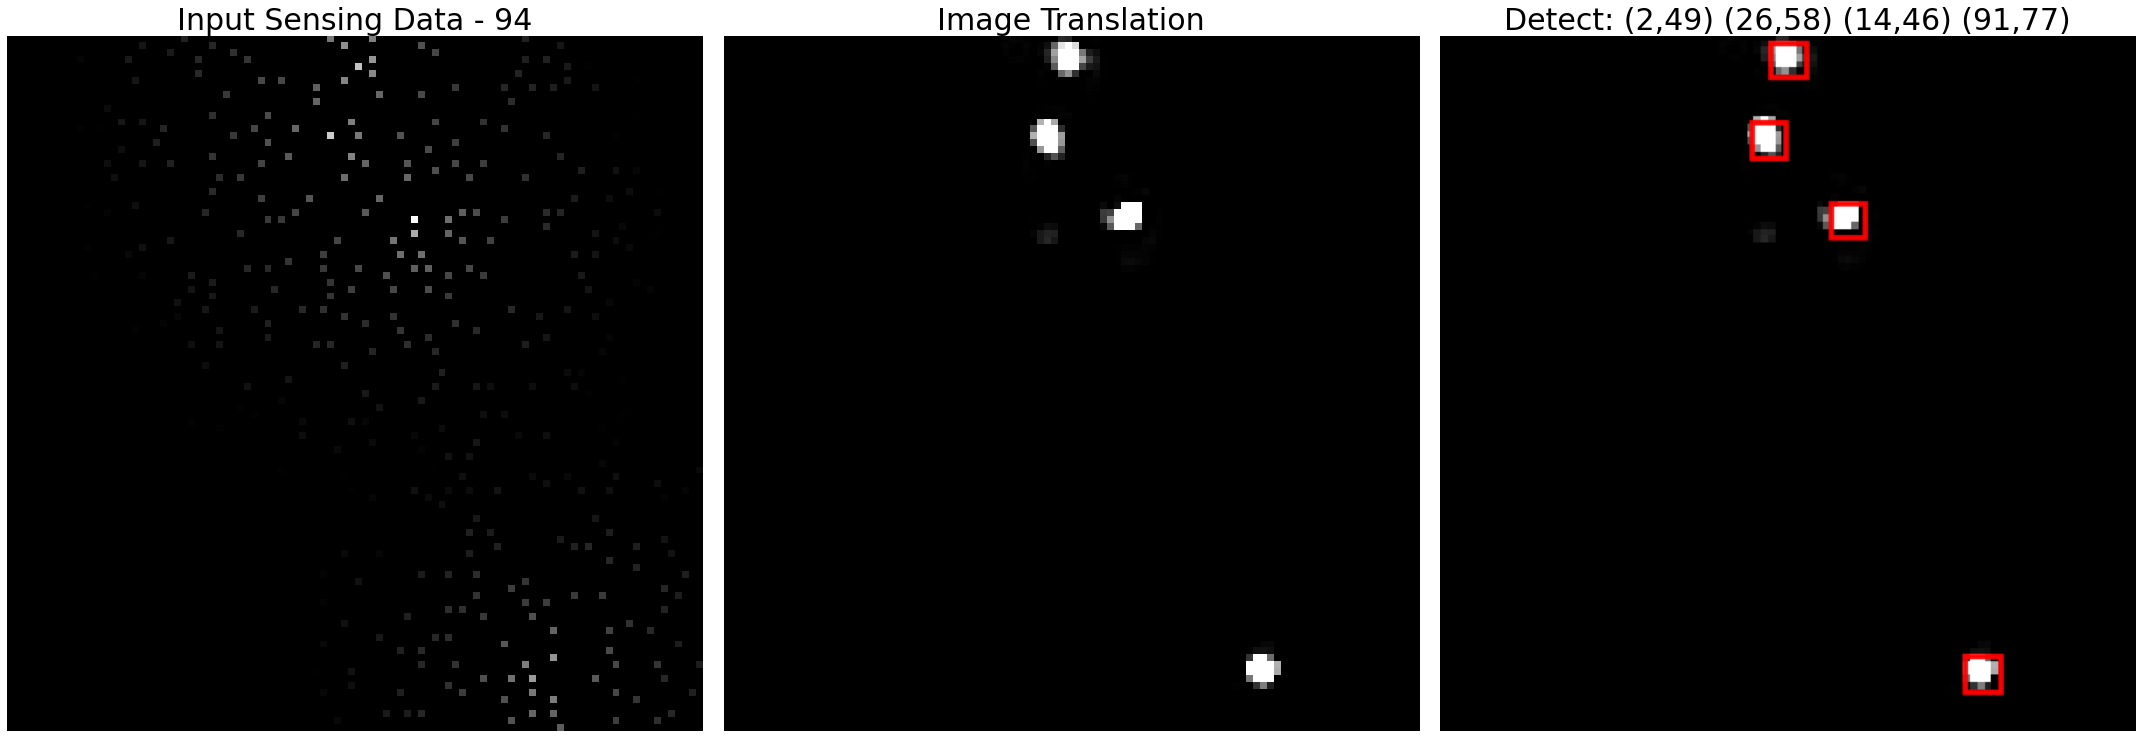

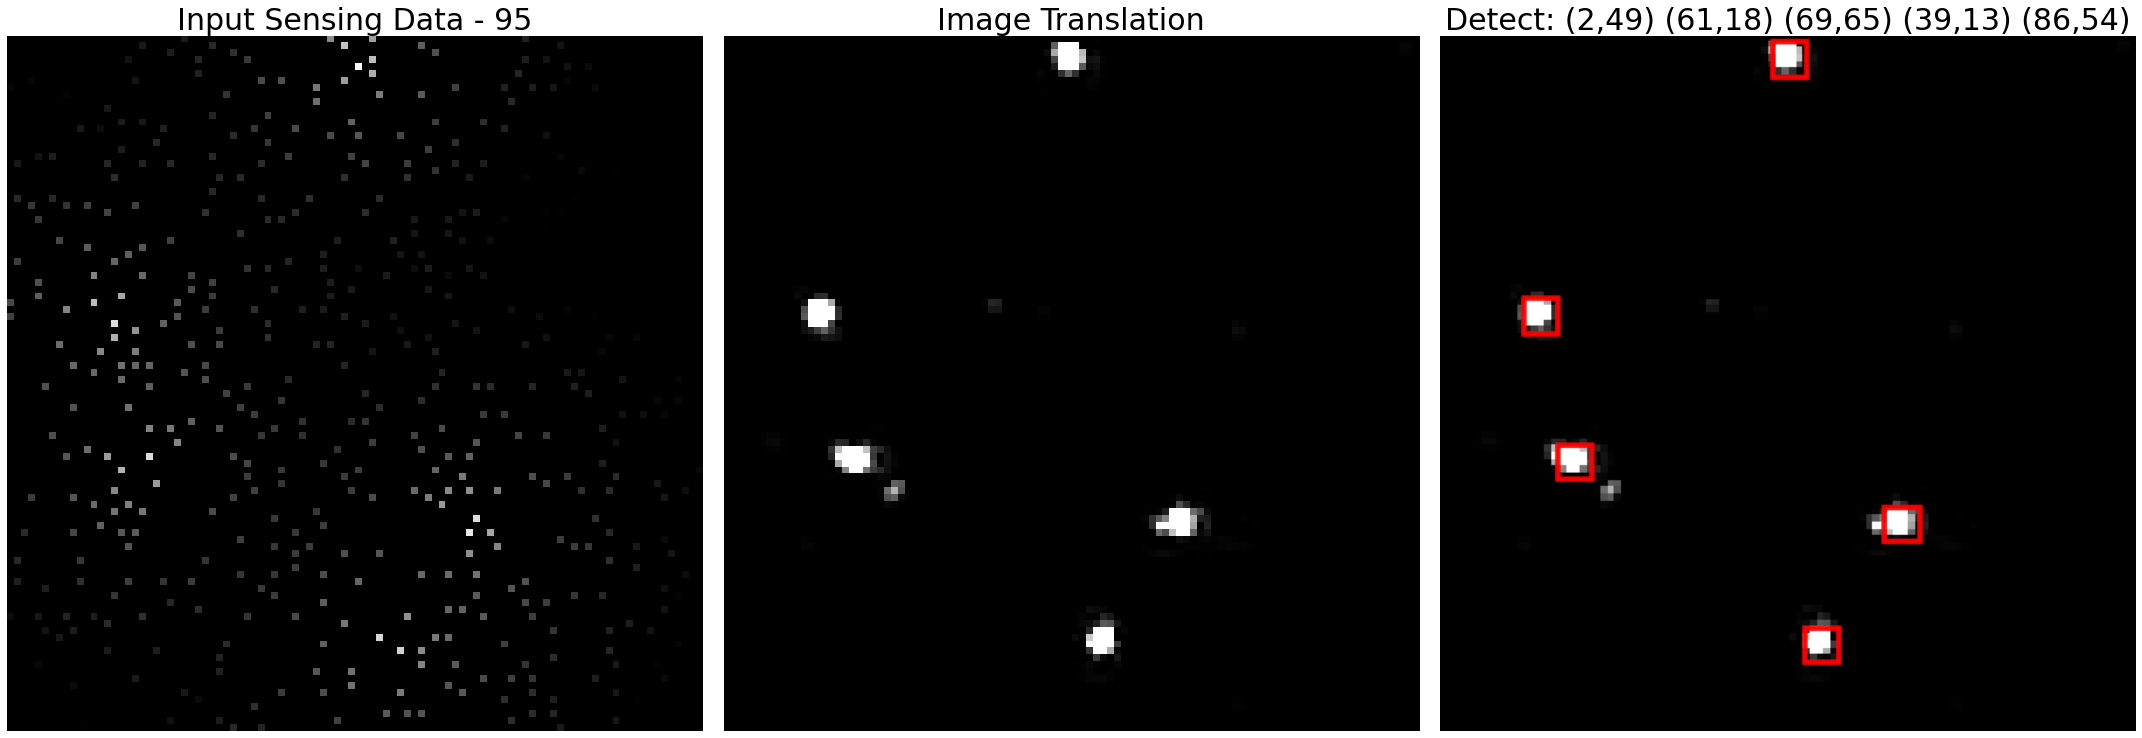

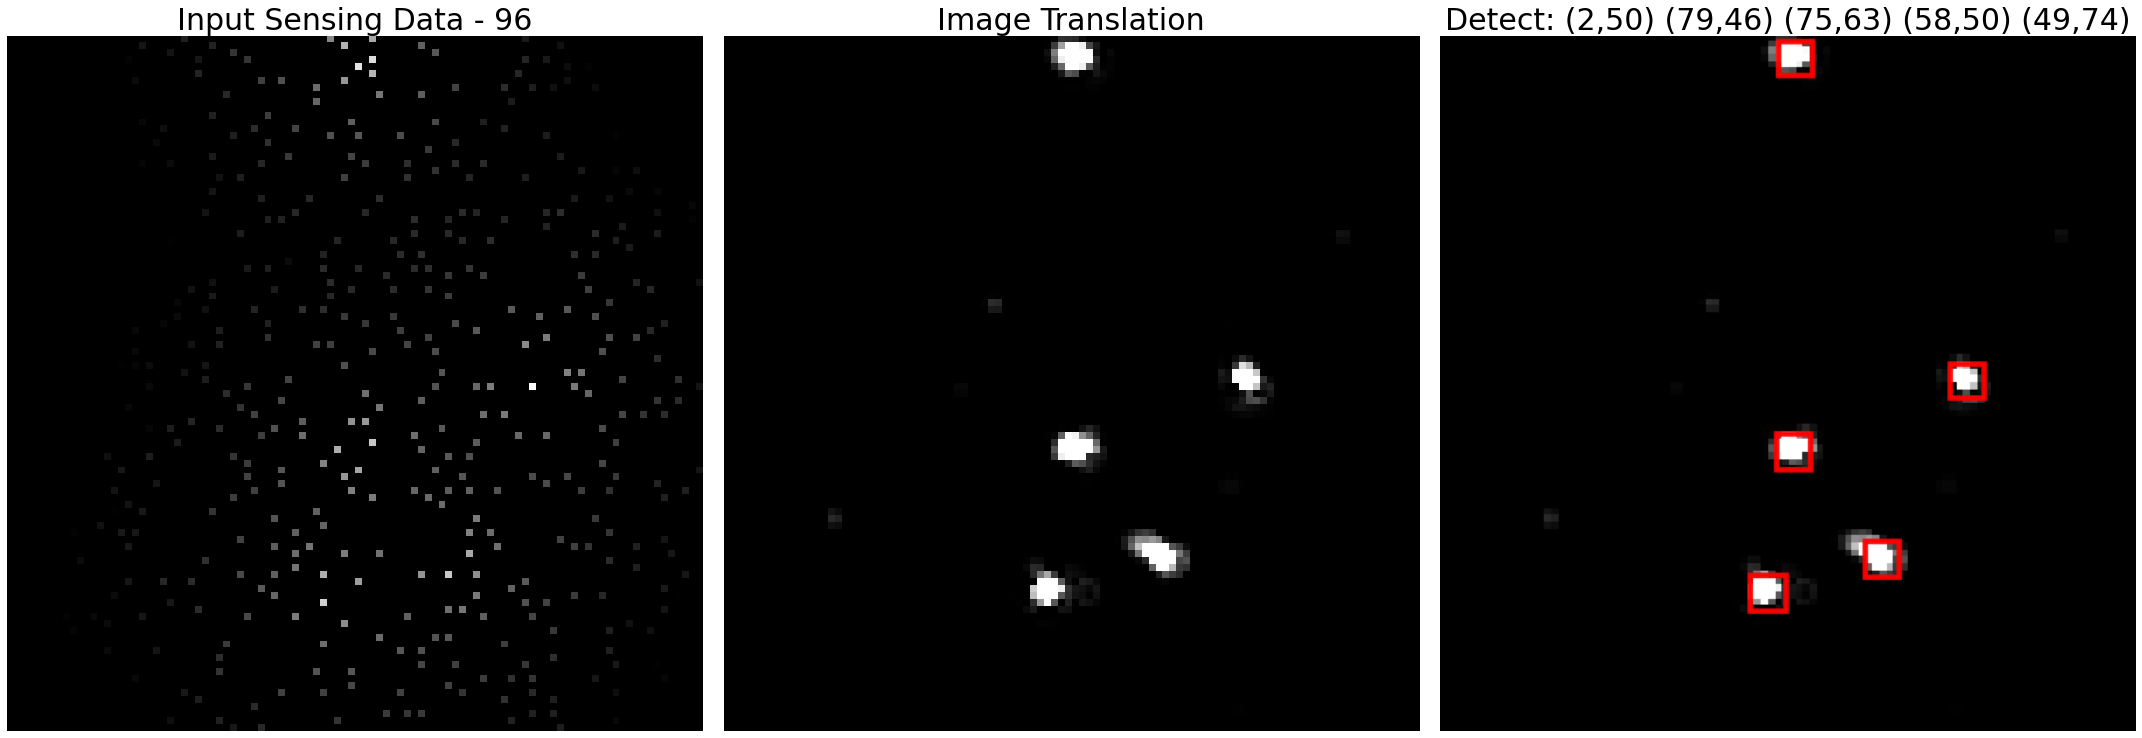

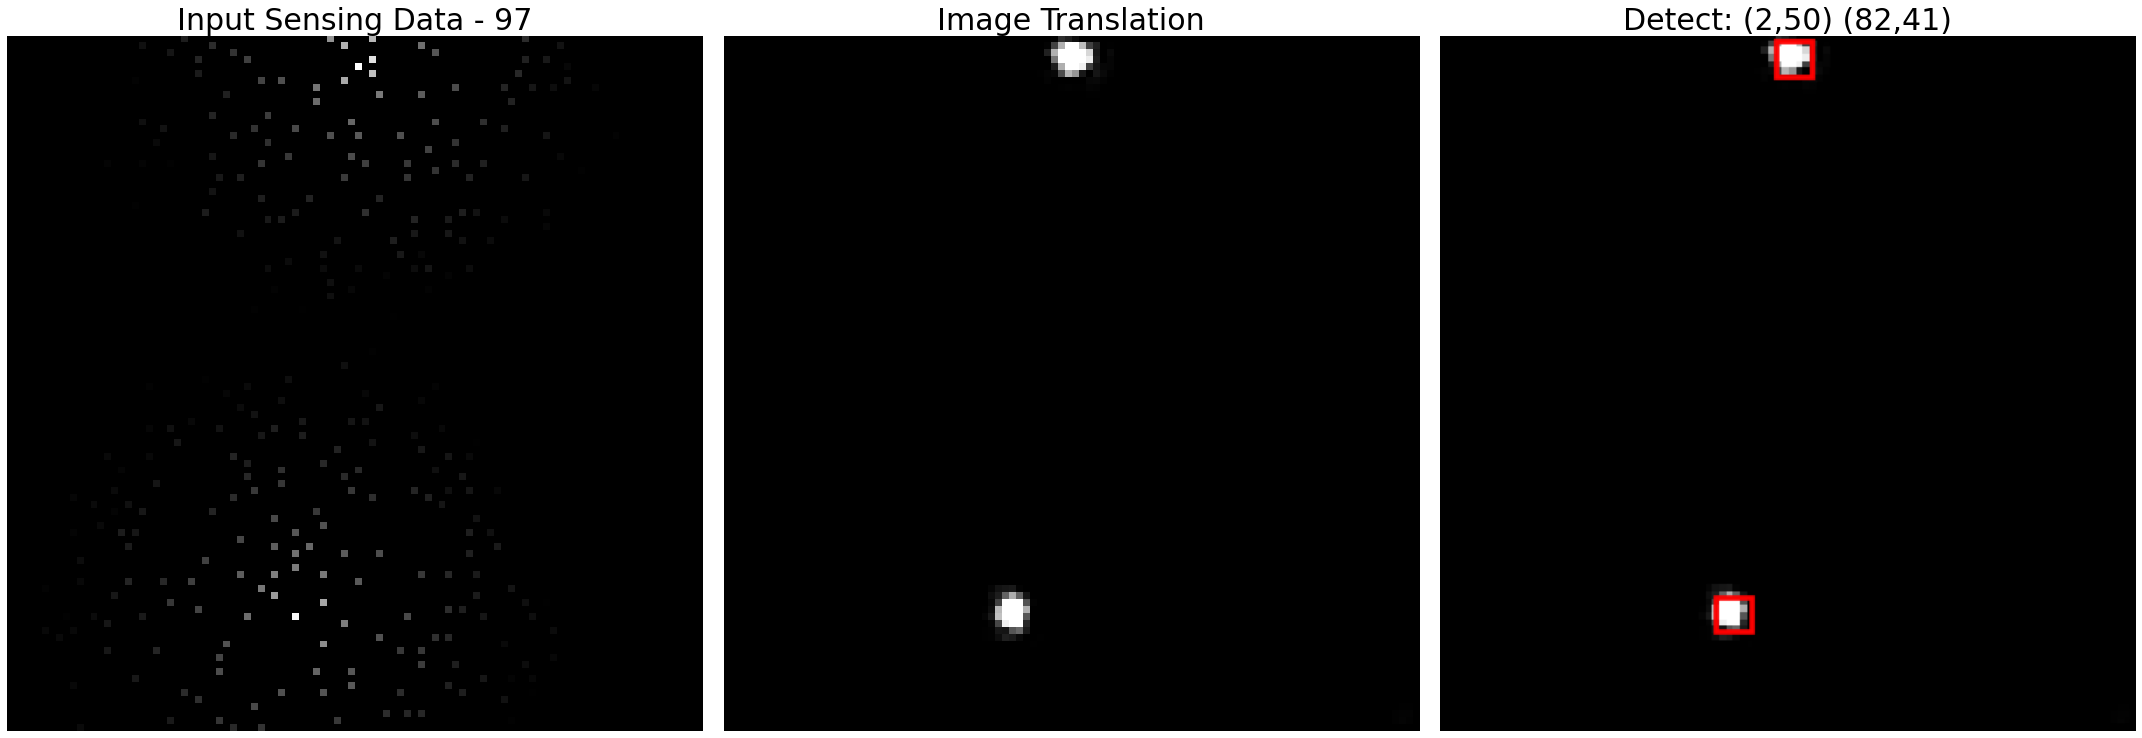

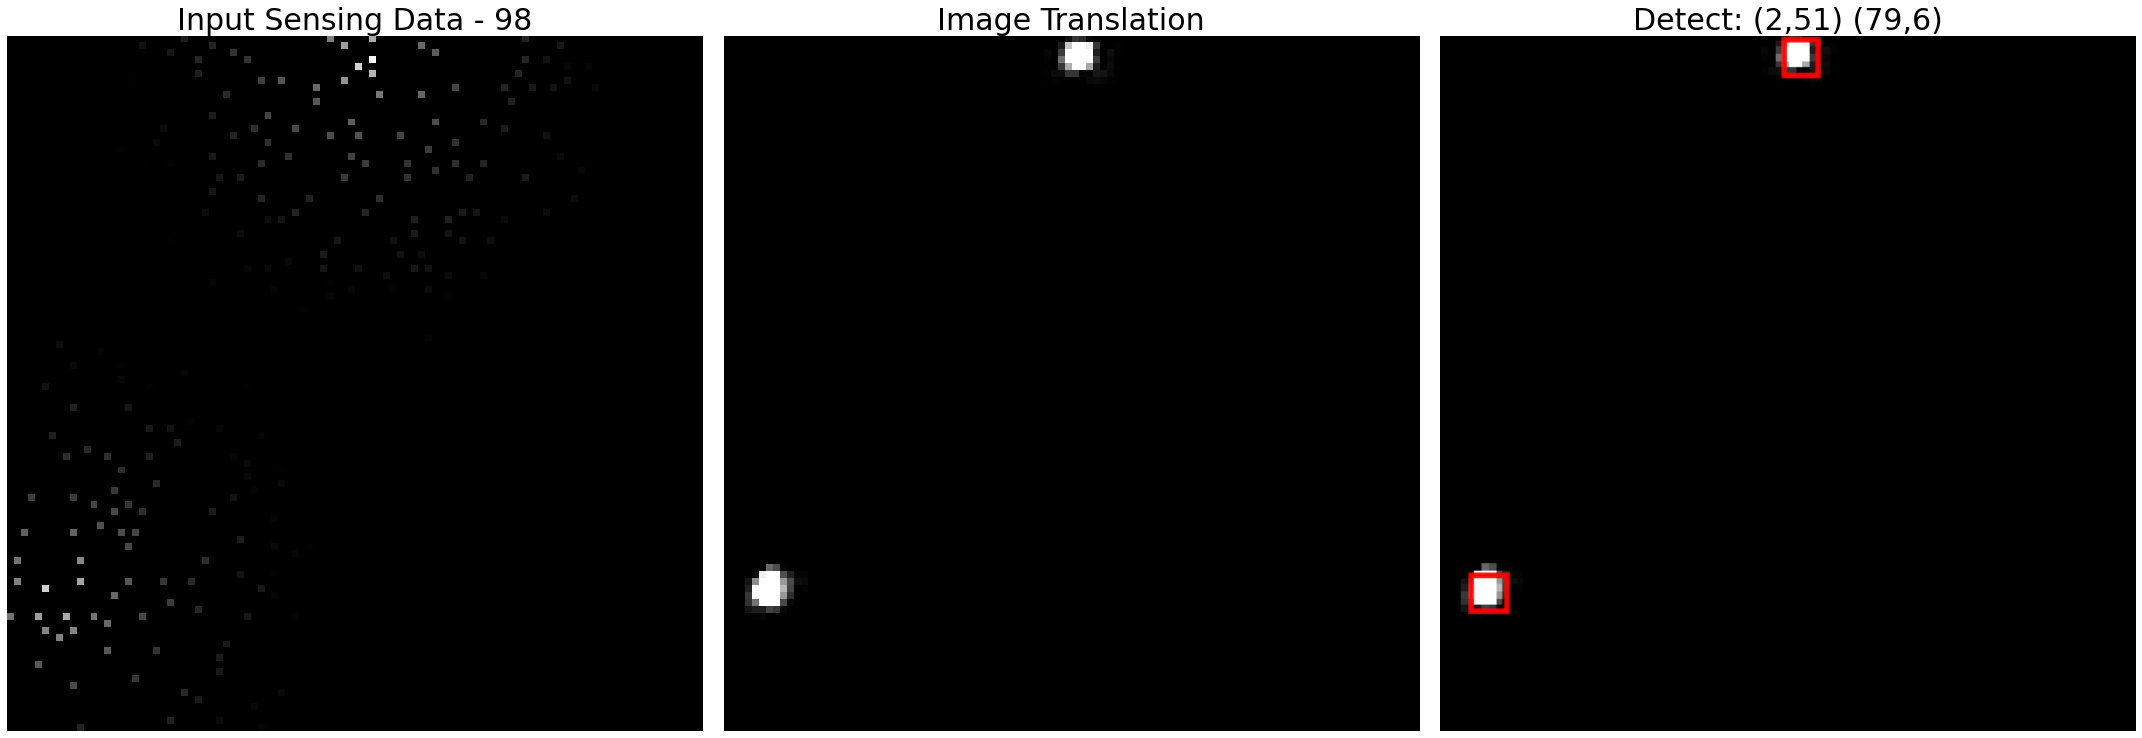

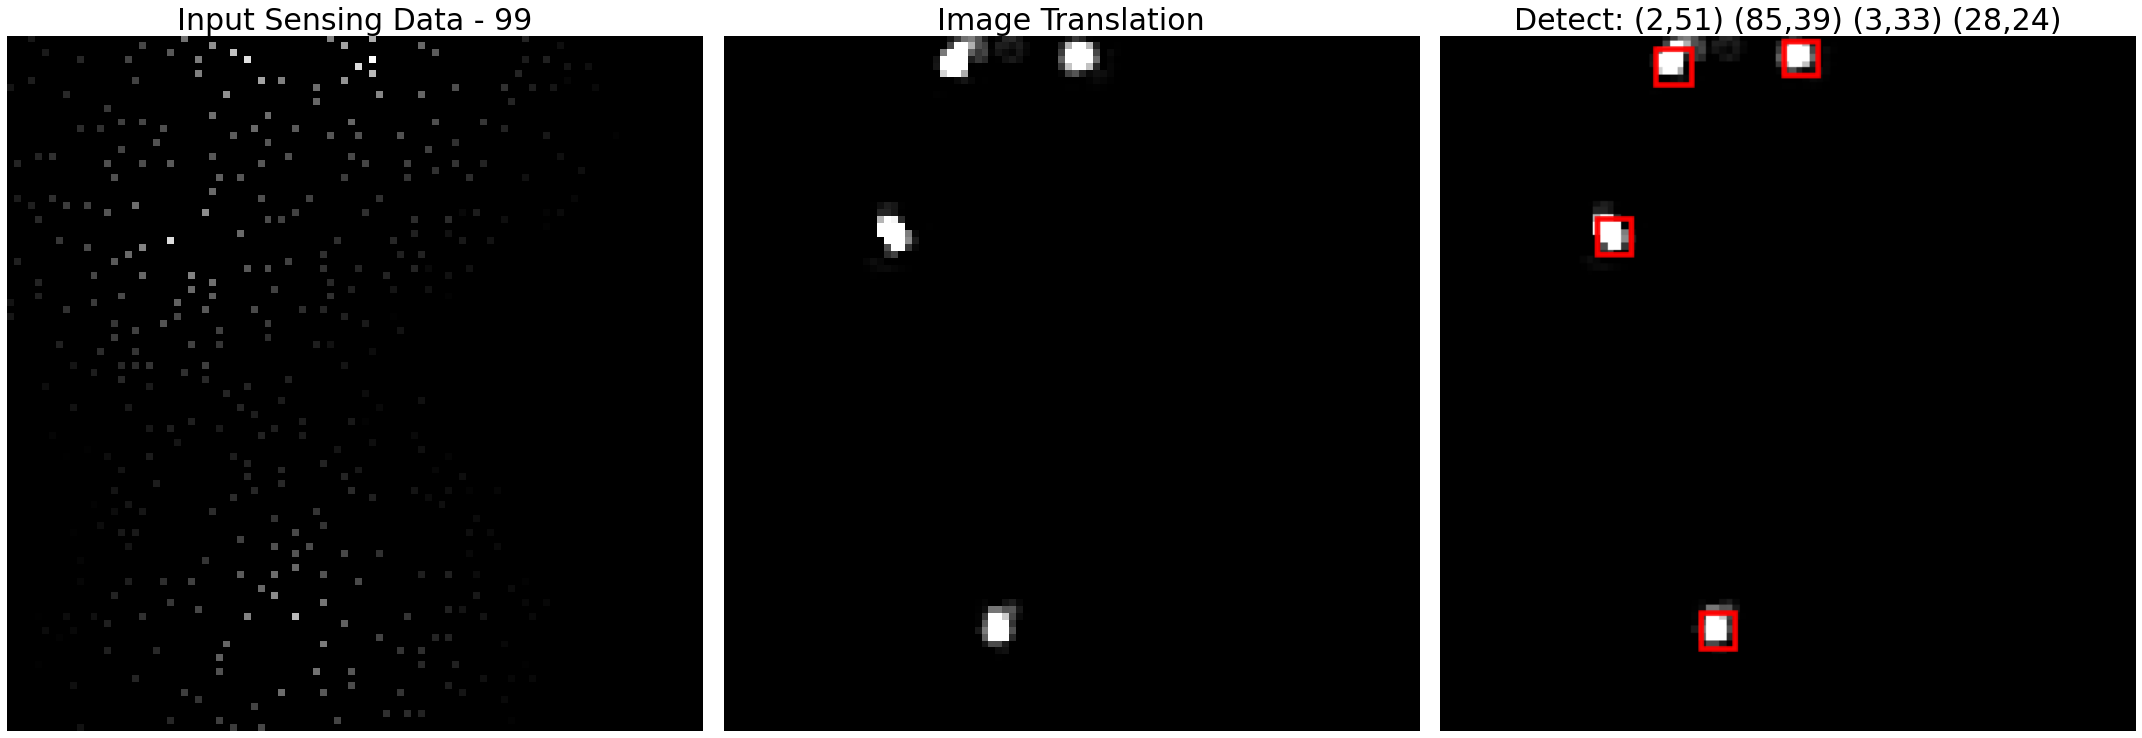

In [4]:
sample_per_label = 2
dataset = "61test"
sample_folder = 'samples4'
output_folder = 'output/sample4-customized-3samesquare'

index = list(range(100))
# index = index + [1008, 9179]
# index = [23, 24, 26, 85, 89, 92, 9179]


for i in index:
    show(i)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


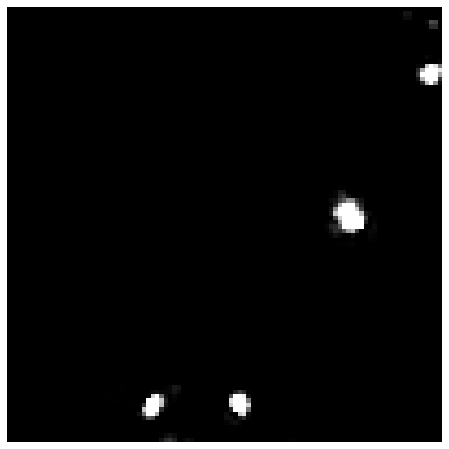

In [5]:
idx = 9179
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.axis('off')
idx = format(idx, '06d')
img = np.load(f'{sample_folder}/{idx}.npy')
# ax.set_title('Image Translation', fontsize=30)
# ax.imshow(img[:, :, 0], cmap='gray')
ax.imshow(img)
fig.savefig('yolov3.png')

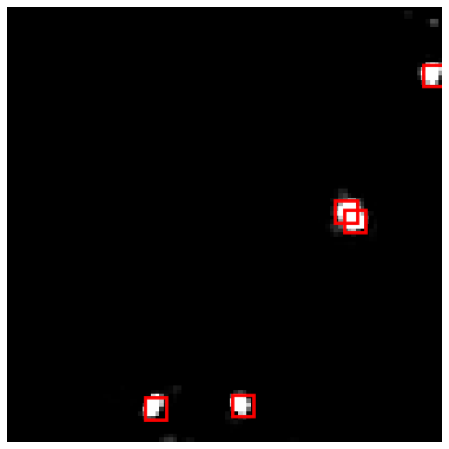

In [6]:
idx = 9179
output_folder = 'output'
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
ax.axis('off')
idx = format(idx, '06d')
# img = np.load(f'{sample_folder}/{idx}.npy')
# ax.set_title('Image Translation', fontsize=30)
# ax.imshow(img[:, :, 0], cmap='gray')
img = mpimg.imread(f'../{output_folder}/{idx}.png')
ax.imshow(img)
fig.savefig('yolov3-detect.png')

<AxesSubplot:>

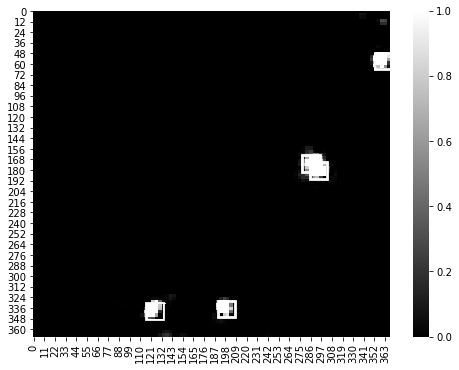

In [9]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(img[:, :, 0], cmap='gray')